# 1.1 Linux

Our current experience with the Linux operating system is based upon the usage of the Windows 10 Linux emulator. This emulator allows for bash usage inside the Windows environment.

The experience is that the use of a UNIX command line system within the Windows environment really enriches the experience of programming, as it is much faster write simple code instead of navigating the file explorer and reading or altering text files. Also it is easy to create your own function aliases, use SSH to access your computer at home or experience the rich diversity of libraries offered via the commandline.

# Vibrating Strings


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def vibrate_1d():
    L = 1.
    N = 10
    c = 1

    dx = L/N
    dt = 0.001
    t_max = 1000
    C = (c*dt/dx)

    u = np.zeros((3,N))
    
    for i in range(0, N):
        u[2,i] = np.sin(2*np.pi*(i*dx))
            
    for j in range(0,N-2):
        for i in range(1, N-1):
            u[0,:] = u[1,:]
            u[1,:] = u[2,:]
            
            u[2,i] = u[1,i] - 0.5*C**2*(u[1,i+1] - 2* u[1,i] + u[1,i-1]) - u[0,i]
            
            #Enforce boundary conditions
            u[2,0] = 0
            u[2,N-1] = 0
        print(u[2])
        
        
vibrate_1d()



[ 0.00000000e+00  5.87796478e-01  1.81630019e-05  6.57154809e-05
  5.87752395e-05  2.93863239e-05 -1.12271687e-05 -4.75522645e-05
 -9.51032740e-05  0.00000000e+00]
[ 0.00000000e+00  5.87787396e-05 -4.40841083e-09  3.63300653e-09
  4.40802610e-09  3.49977042e-09  1.25472136e-09 -1.25480884e-13
 -9.51032740e-09  0.00000000e+00]
[ 0.00000000e+00  5.87809439e-09 -9.16396129e-13  1.42945168e-13
  2.65806942e-13  2.87227684e-13  1.25464049e-13  4.75497548e-13
 -9.51056514e-13  0.00000000e+00]
[ 0.00000000e+00  5.87855258e-13 -1.28179634e-16  1.01057869e-18
  1.22192595e-17  2.24489550e-17 -1.12295950e-17  9.51031420e-17
 -9.51104066e-17  0.00000000e+00]
[ 0.00000000e+00  5.87919348e-17 -1.58080891e-20 -5.09114701e-22
  9.95036563e-23  2.80637027e-21 -5.87825692e-21  1.42661284e-20
 -9.51175397e-21  0.00000000e+00]
[ 0.00000000e+00  5.87998389e-21 -1.84935237e-24 -5.57941852e-26
 -1.30365358e-25  5.74556391e-25 -1.30116084e-24  1.90226560e-24
 -9.51270510e-25  0.00000000e+00]
[ 0.00000000e+00

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# plt.style.use('dark_background')

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)

#Wave speed
c = 1

#x axis
x0 = np.linspace(-pi,pi,10000)

#Initial time
t0 = 0

#Time increment
dt = 0.05

#Wave equation solution
def u(x,t):
    return 0.5*(np.sin(x+c*t) + np.sin(x-c*t))

a = []

for i in range(500):
    value = u(x0,t0)
    t0 = t0 + dt
    a.append(value)

k = 0
def animate(i):
    global k
    x = a[k]
    k += 1
    ax1.clear()
    plt.plot(x0,x,color='cyan')
    plt.grid(True)
    plt.ylim([-2,2])
    plt.xlim([-pi,pi])

anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)

#plt.show()
from IPython.display import HTML
HTML(anim.to_jshtml())

AttributeError: 'FuncAnimation' object has no attribute 'to_jshtml'

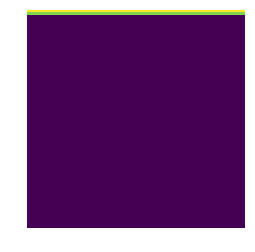

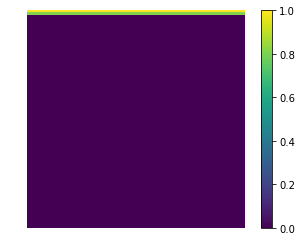

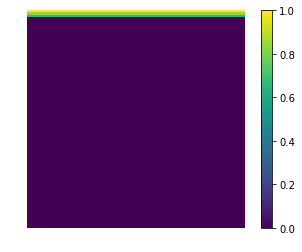

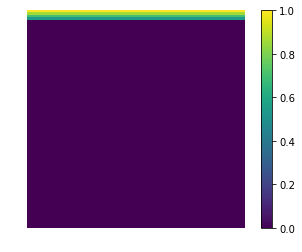

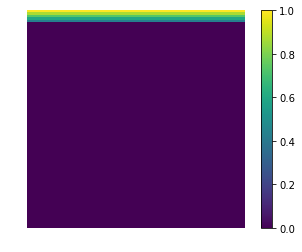

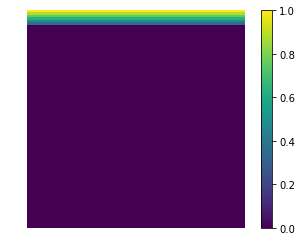

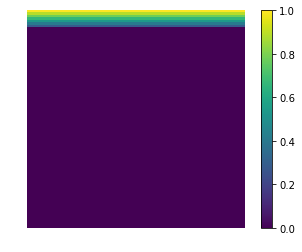

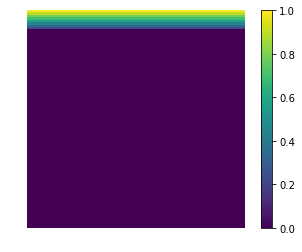

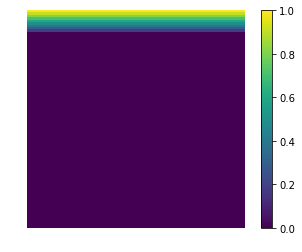

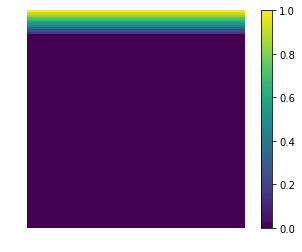

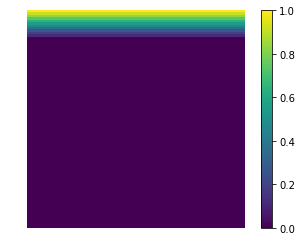

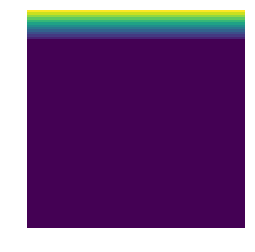

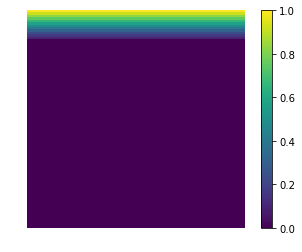

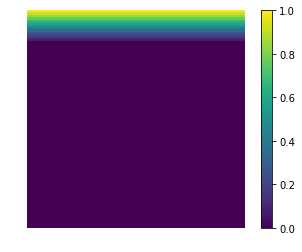

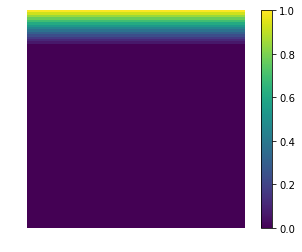

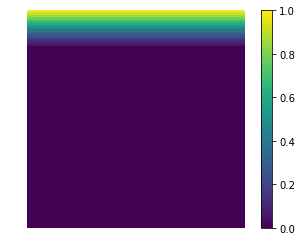

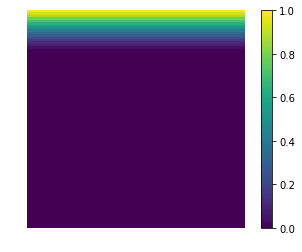

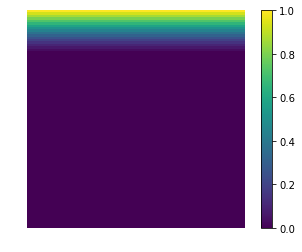

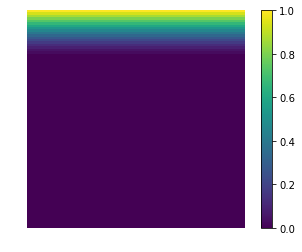

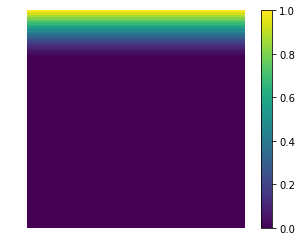

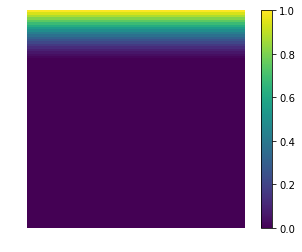

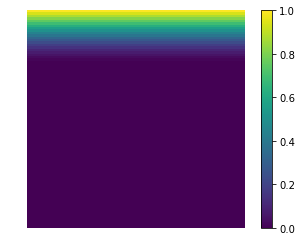

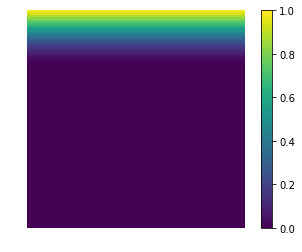

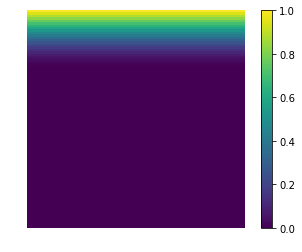

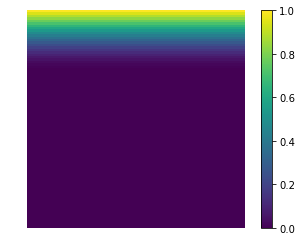

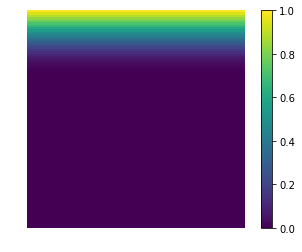

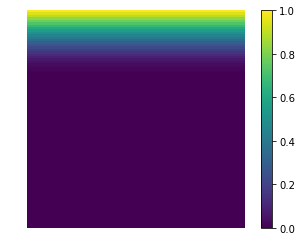

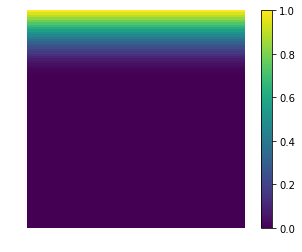

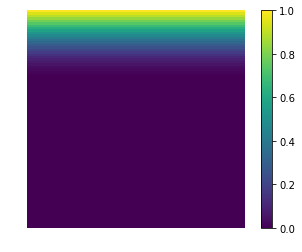

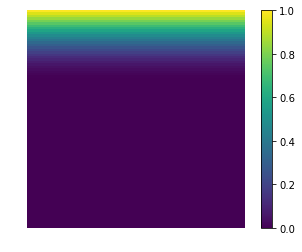

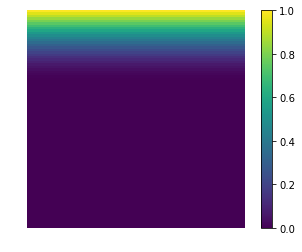

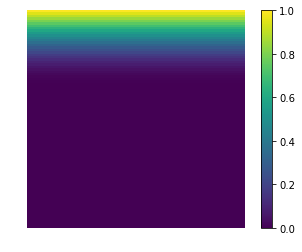

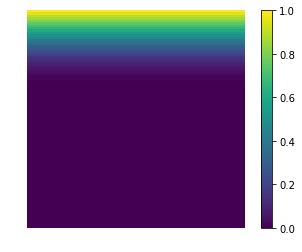

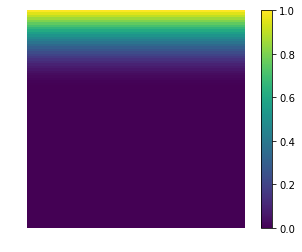

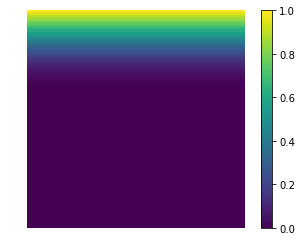

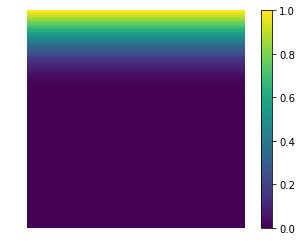

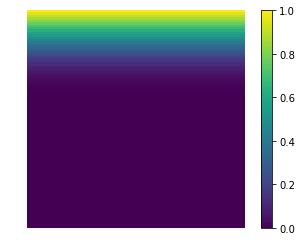

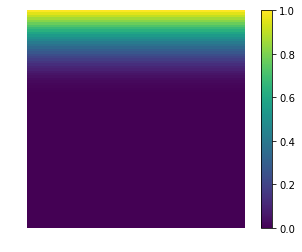

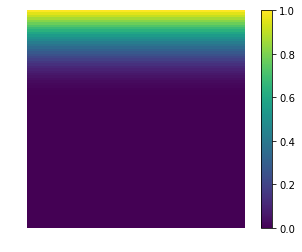

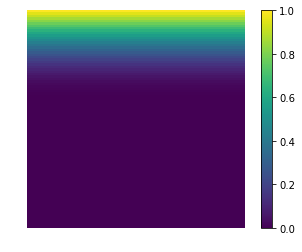

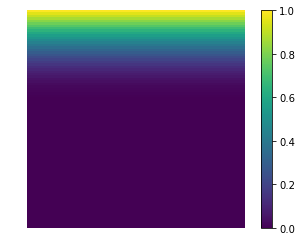

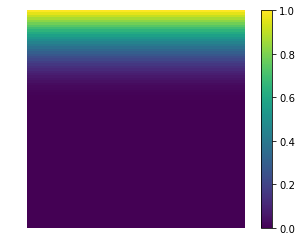

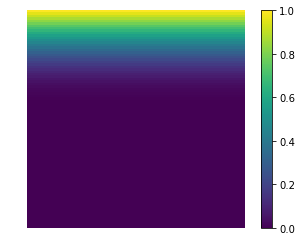

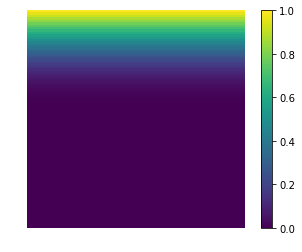

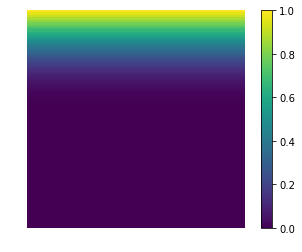

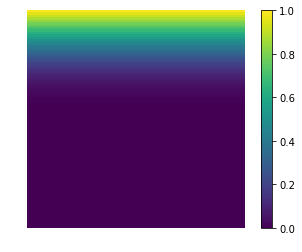

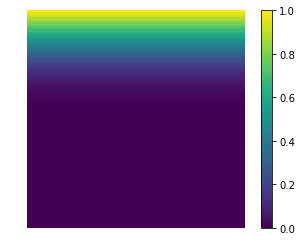

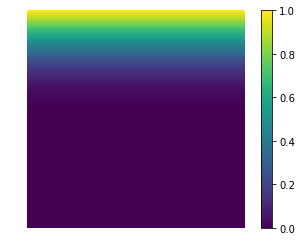

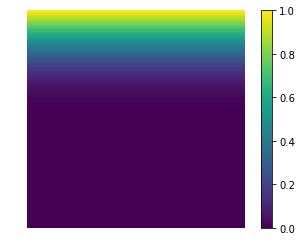

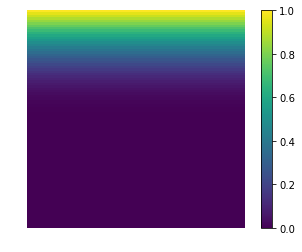

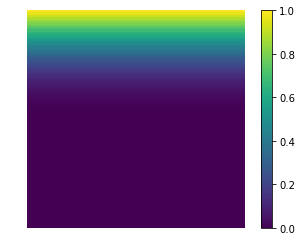

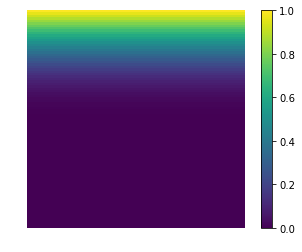

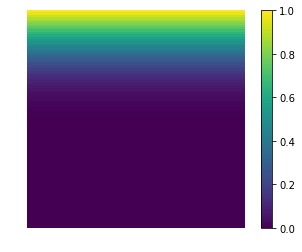

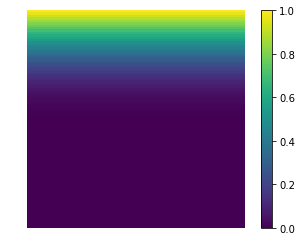

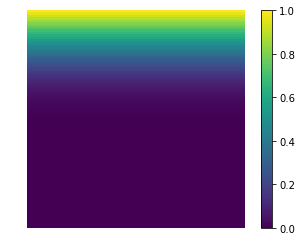

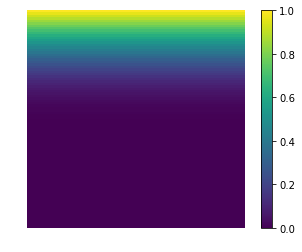

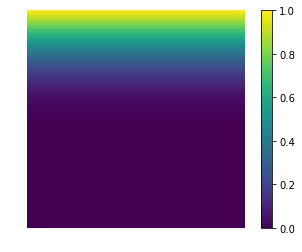

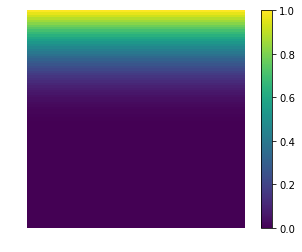

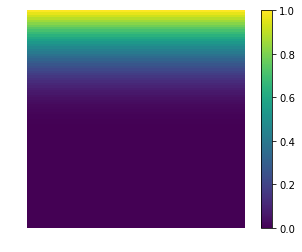

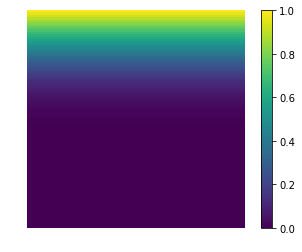

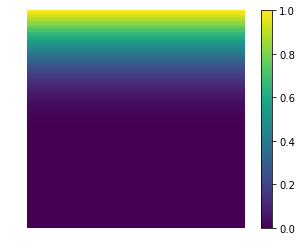

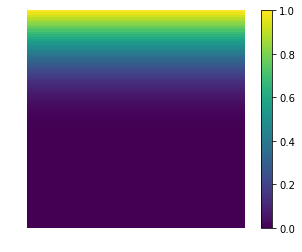

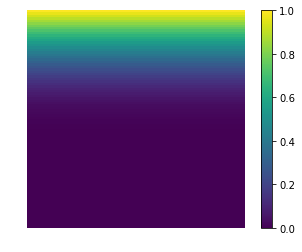

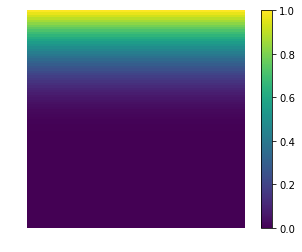

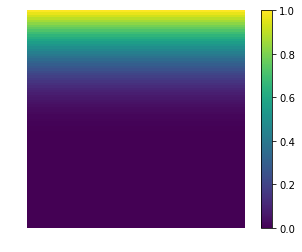

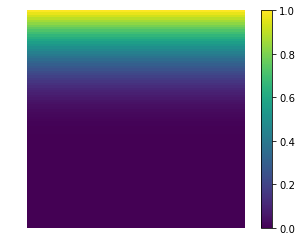

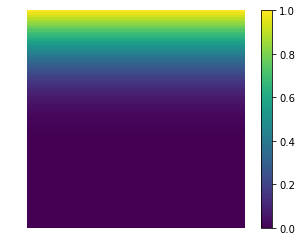

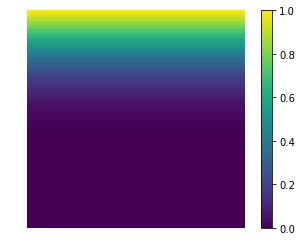

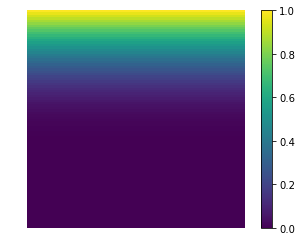

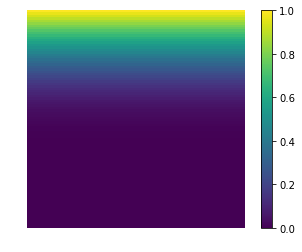

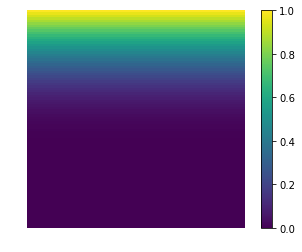

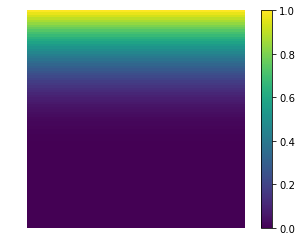

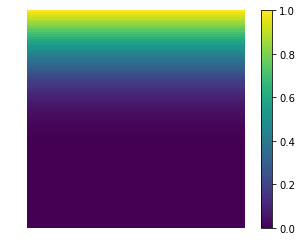

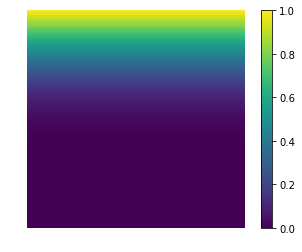

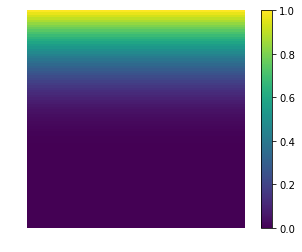

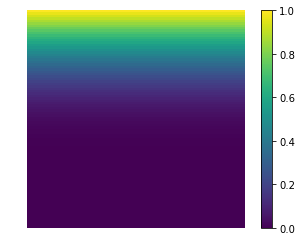

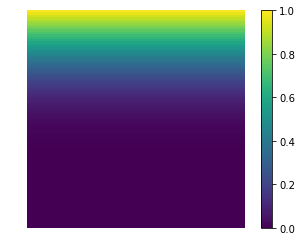

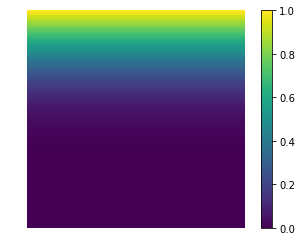

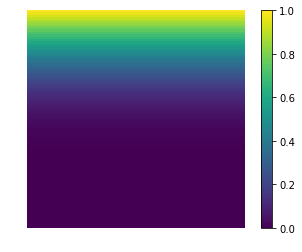

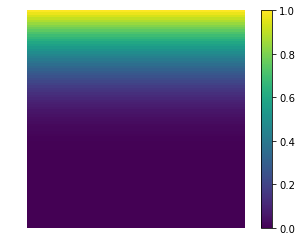

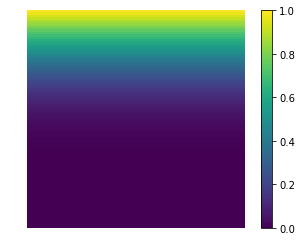

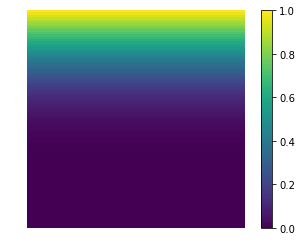

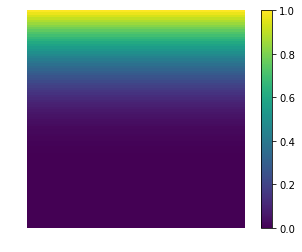

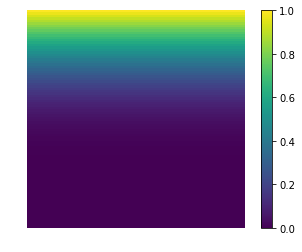

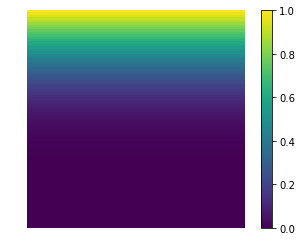

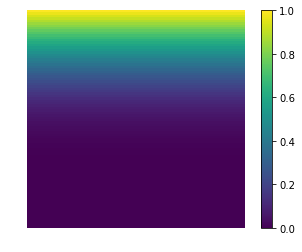

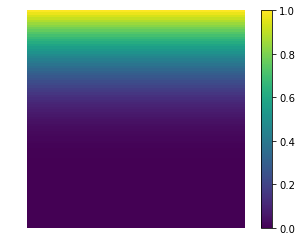

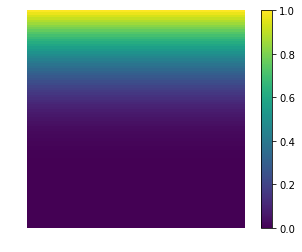

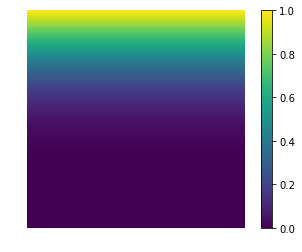

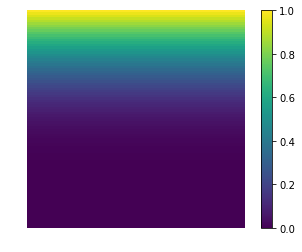

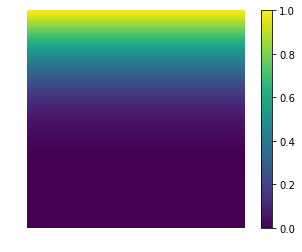

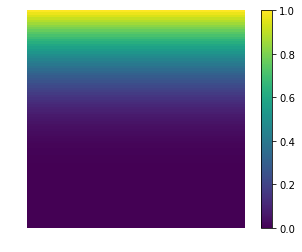

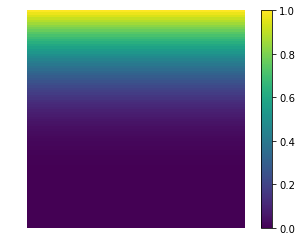

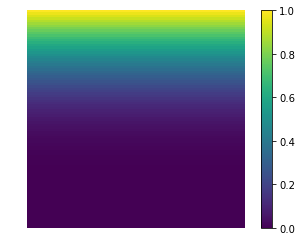

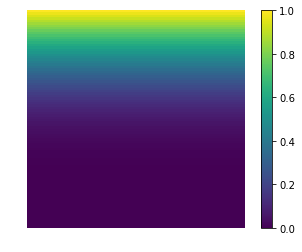

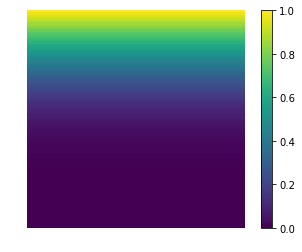

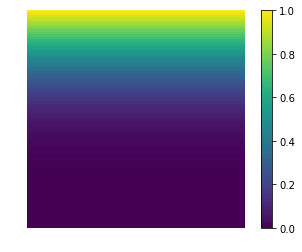

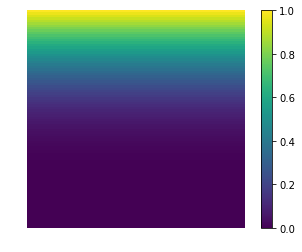

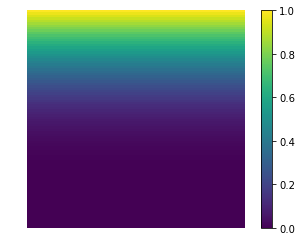

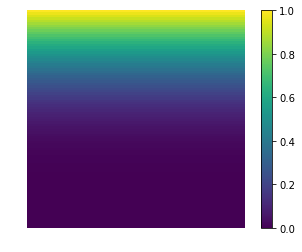

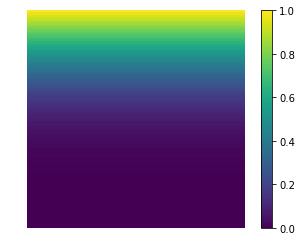

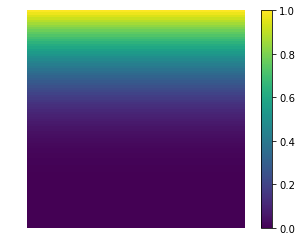

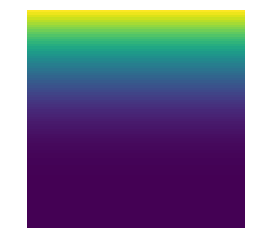

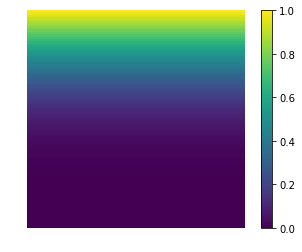

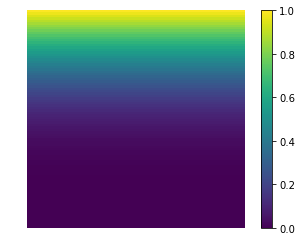

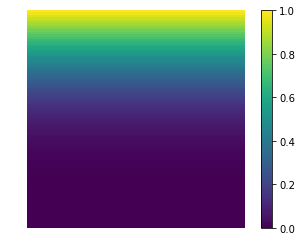

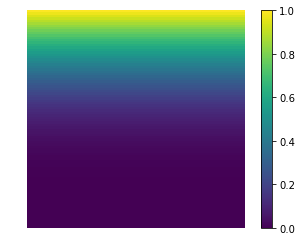

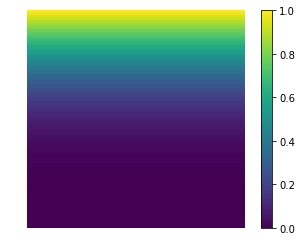

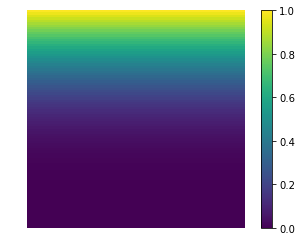

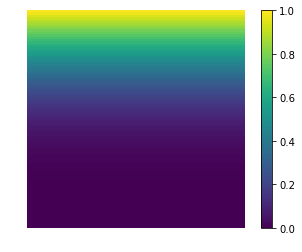

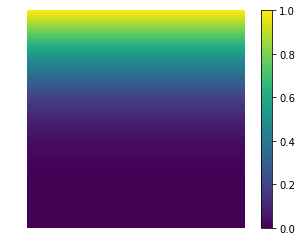

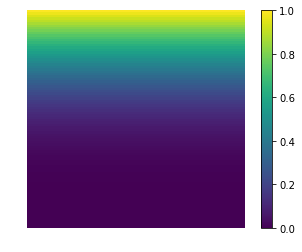

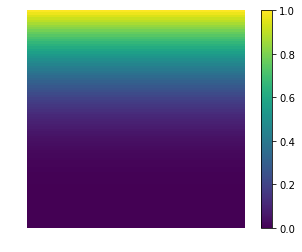

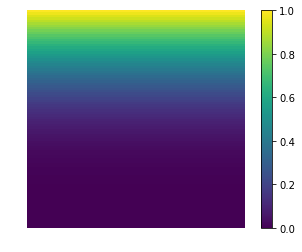

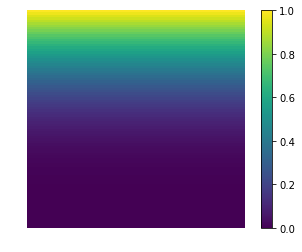

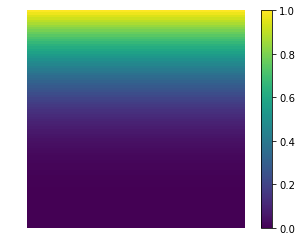

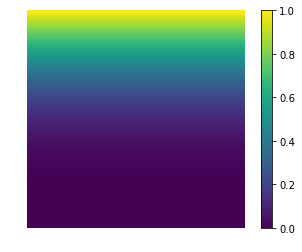

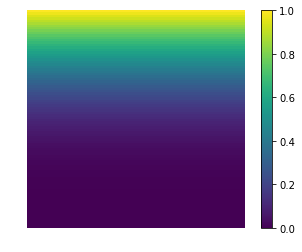

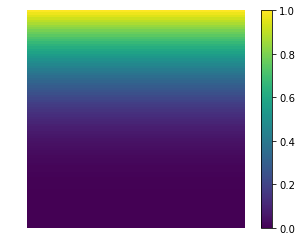

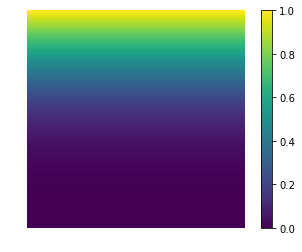

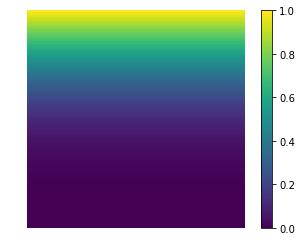

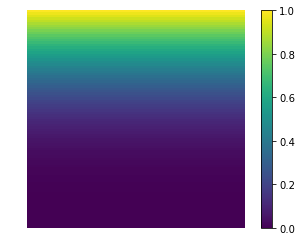

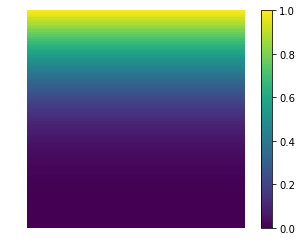

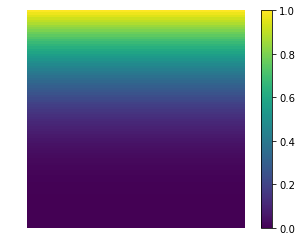

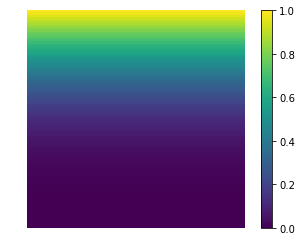

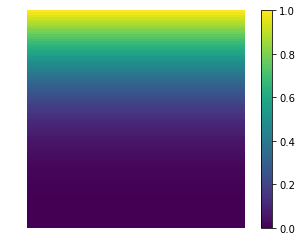

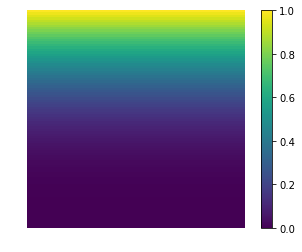

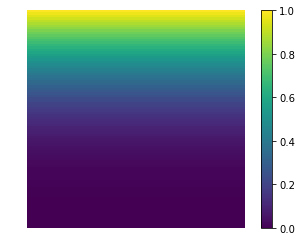

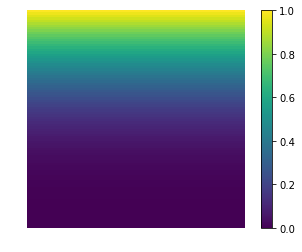

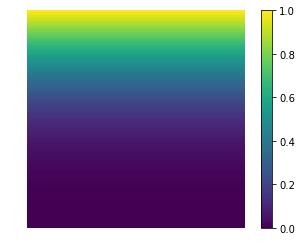

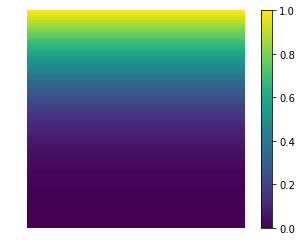

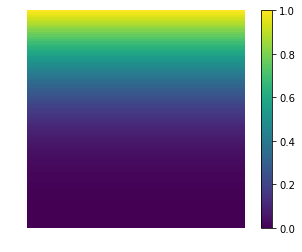

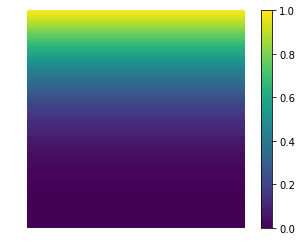

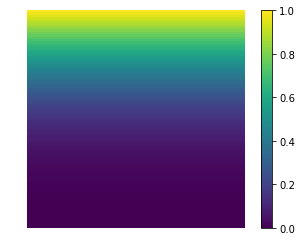

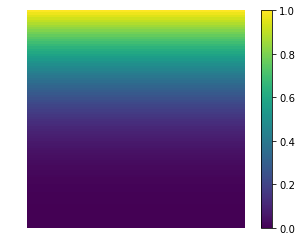

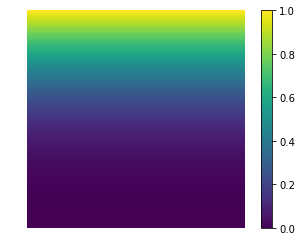

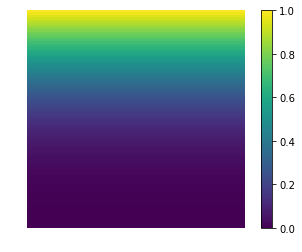

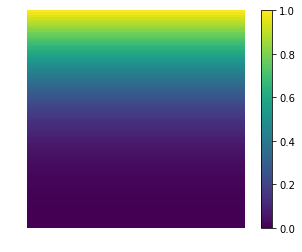

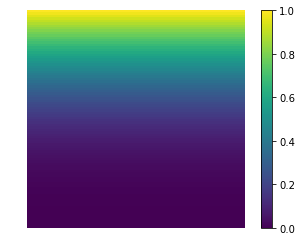

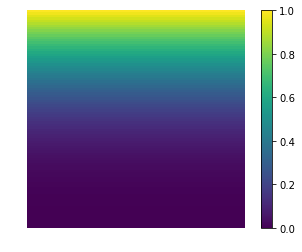

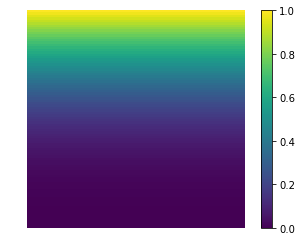

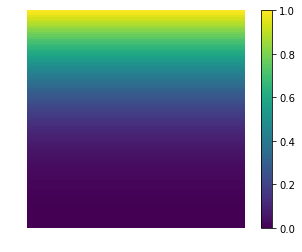

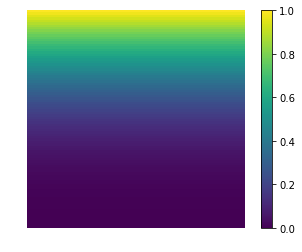

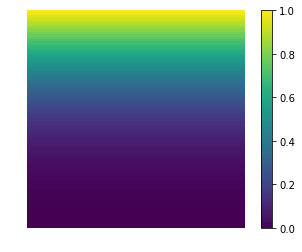

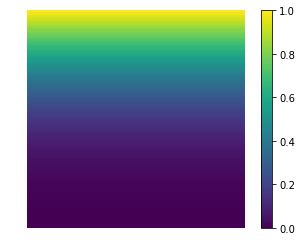

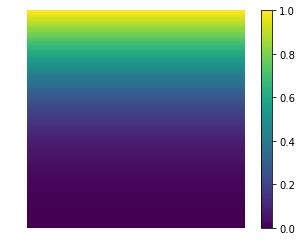

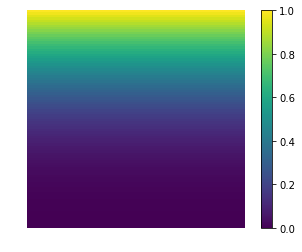

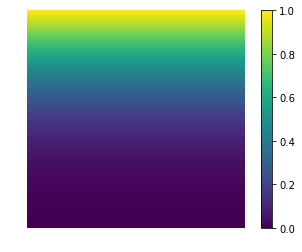

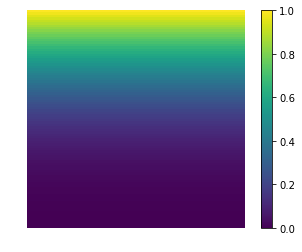

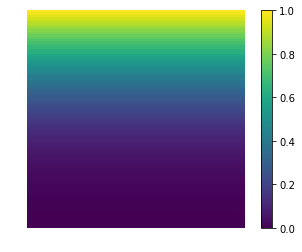

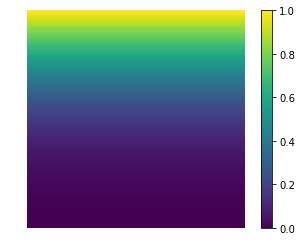

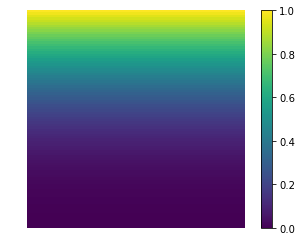

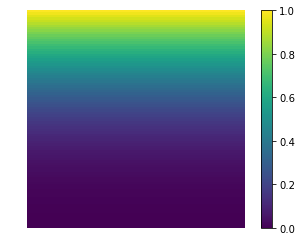

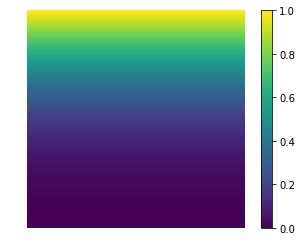

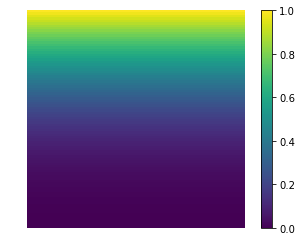

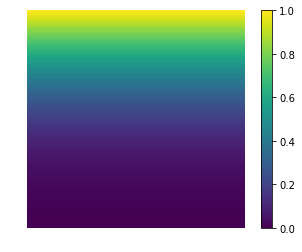

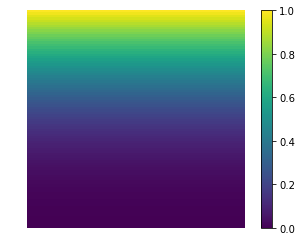

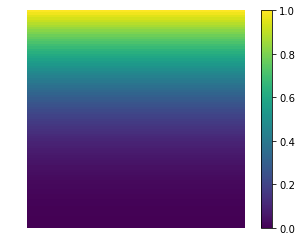

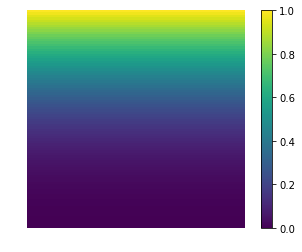

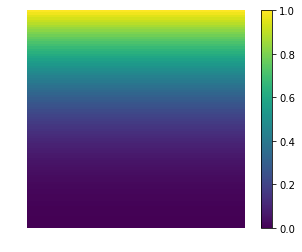

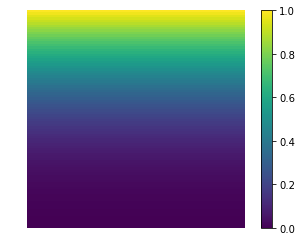

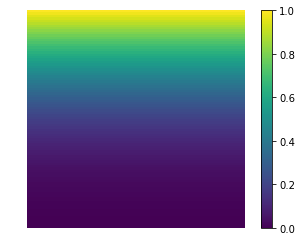

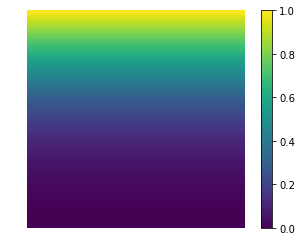

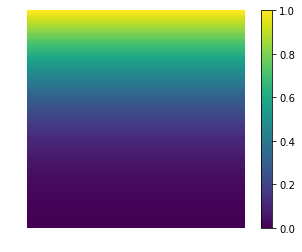

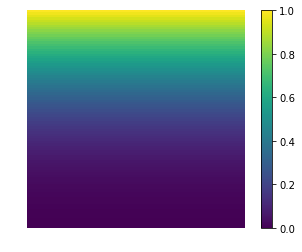

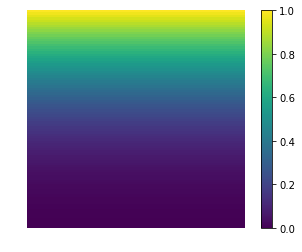

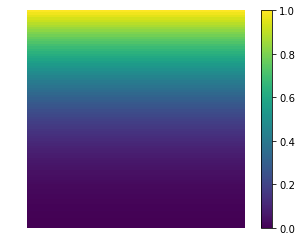

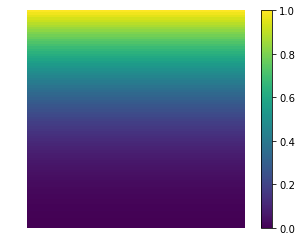

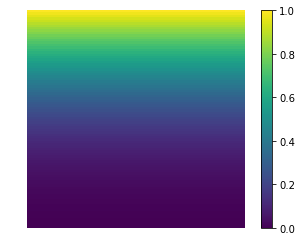

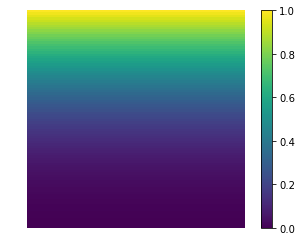

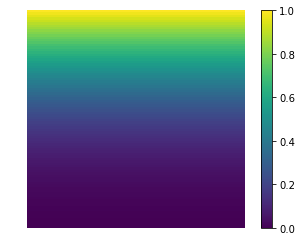

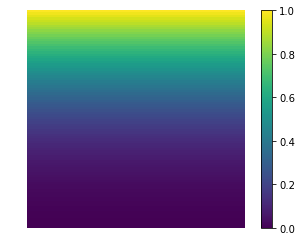

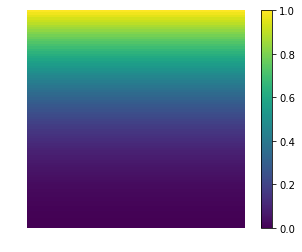

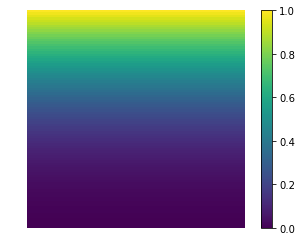

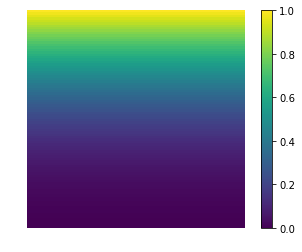

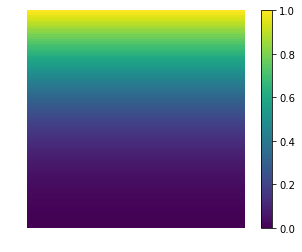

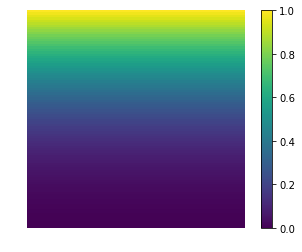

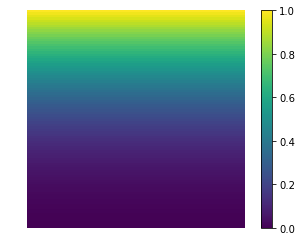

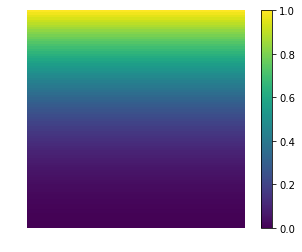

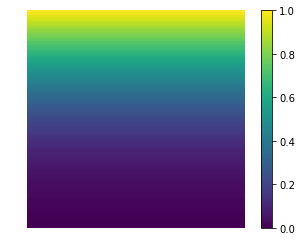

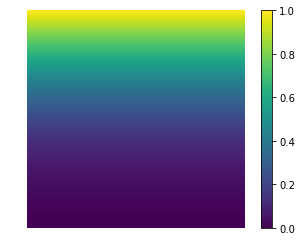

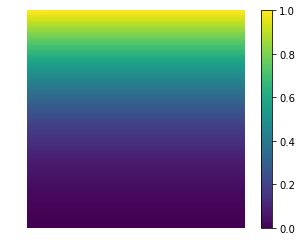

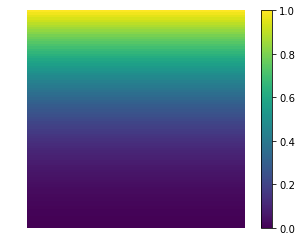

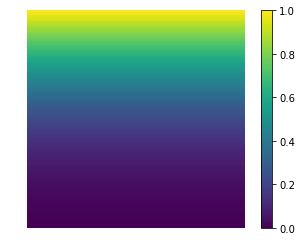

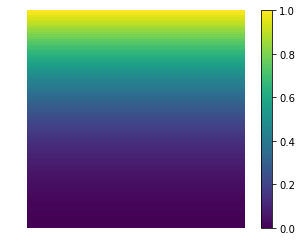

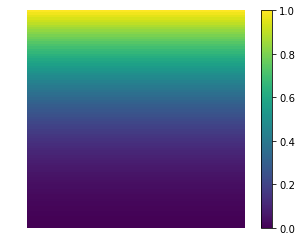

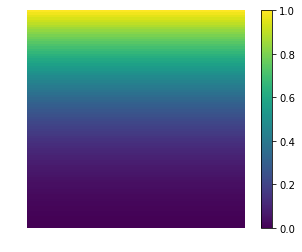

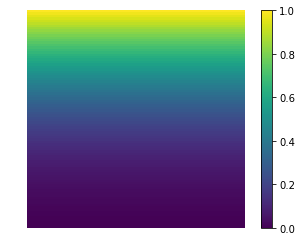

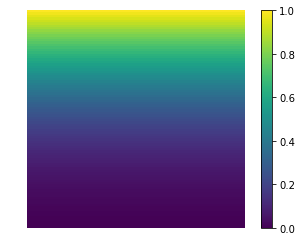

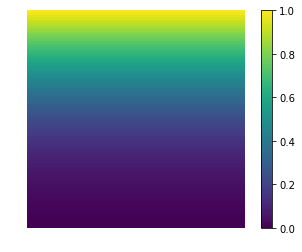

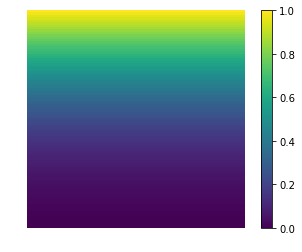

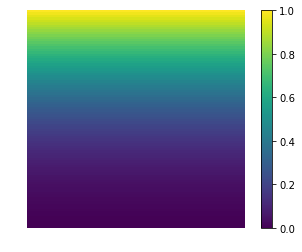

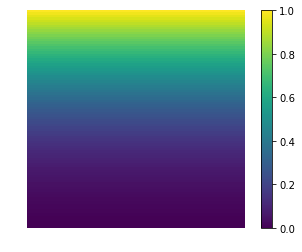

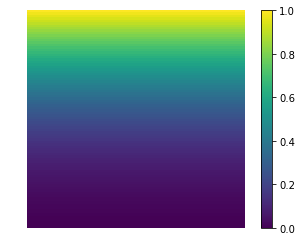

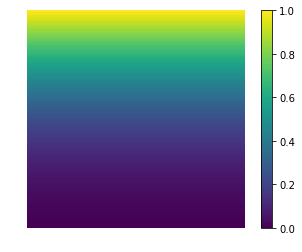

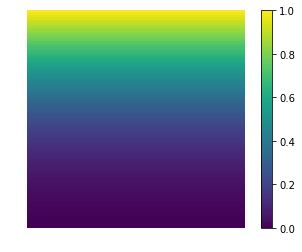

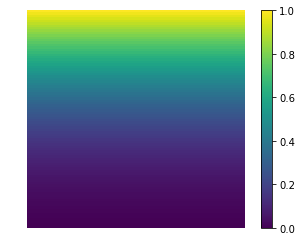

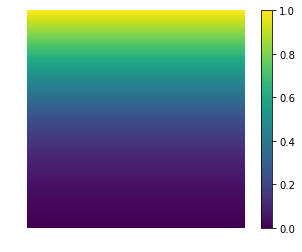

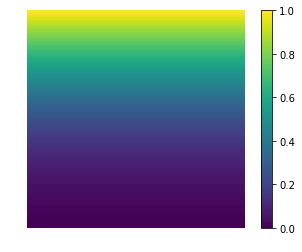

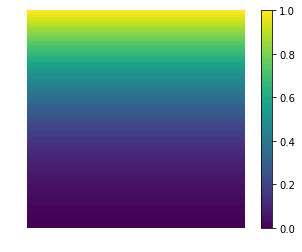

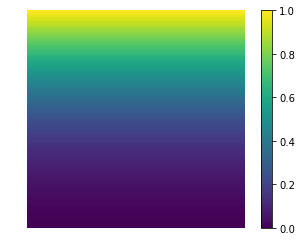

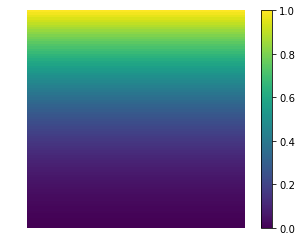

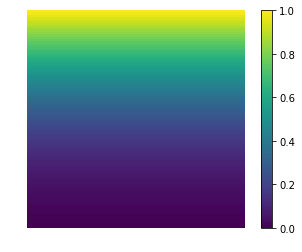

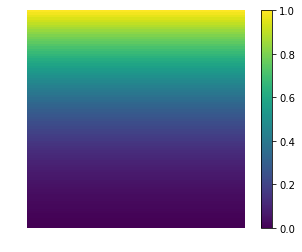

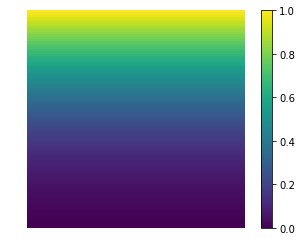

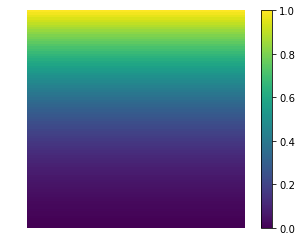

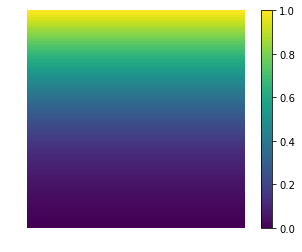

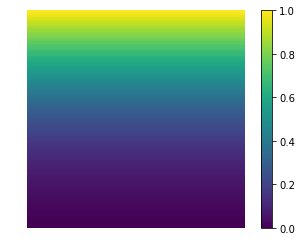

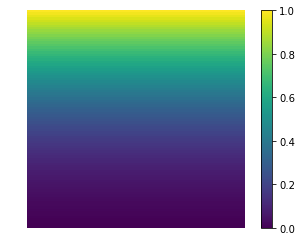

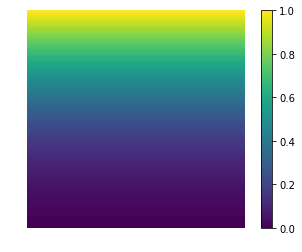

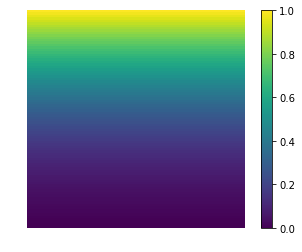

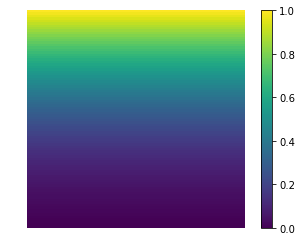

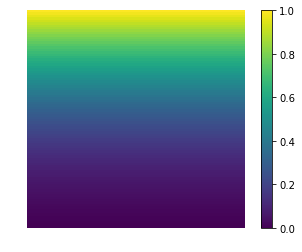

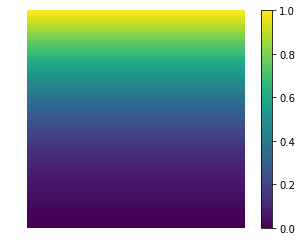

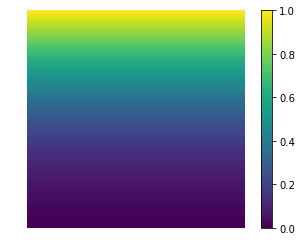

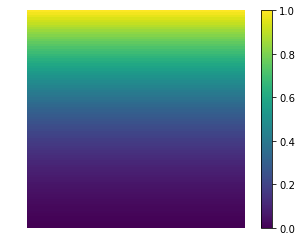

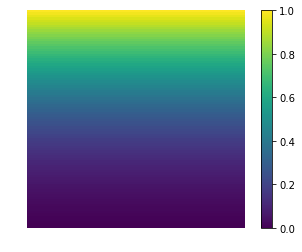

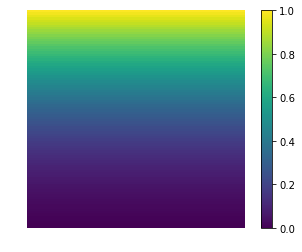

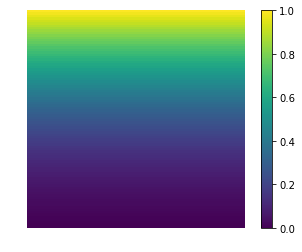

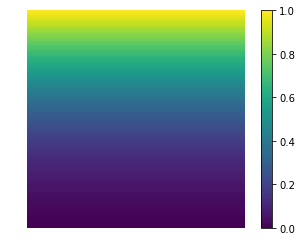

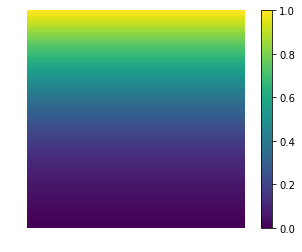

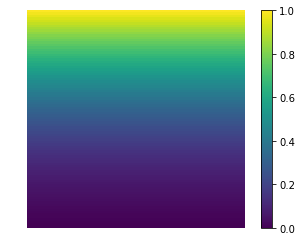

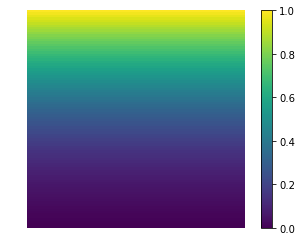

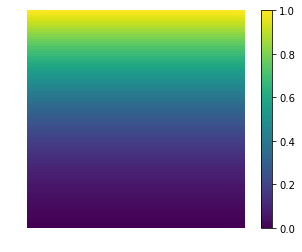

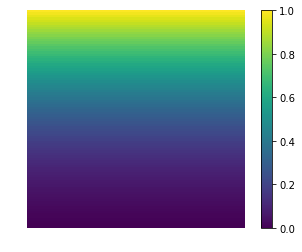

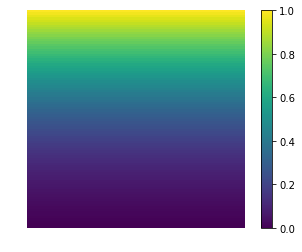

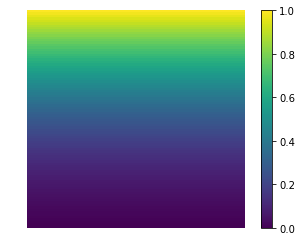

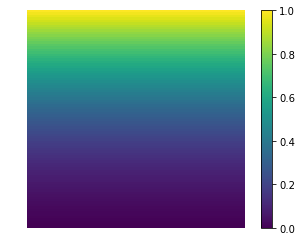

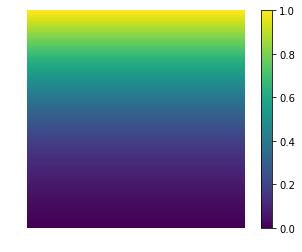

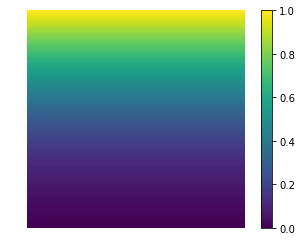

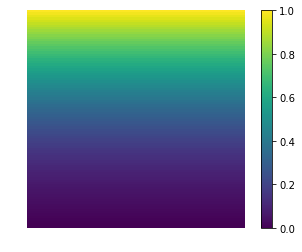

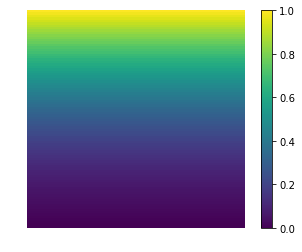

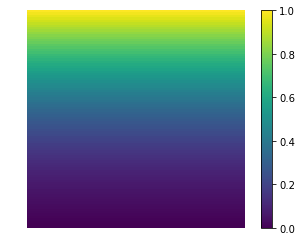

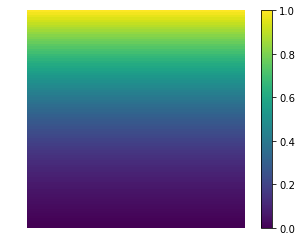

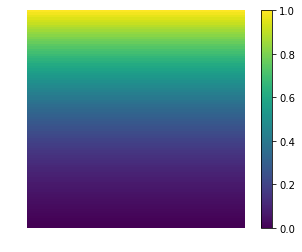

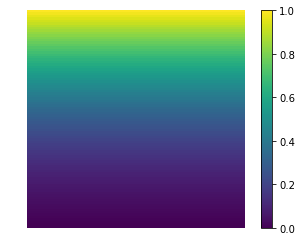

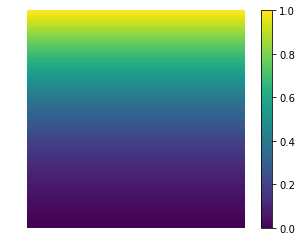

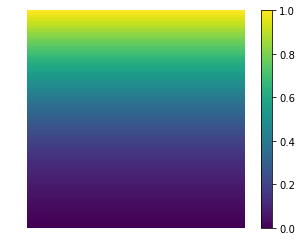

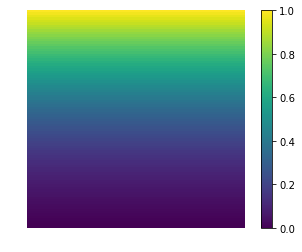

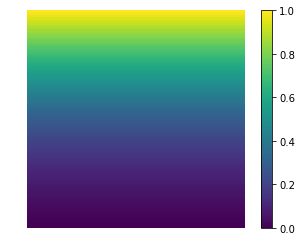

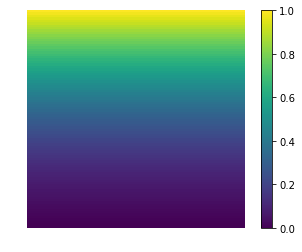

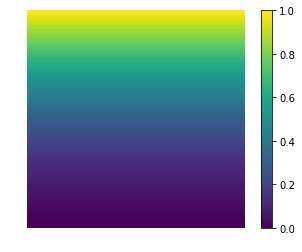

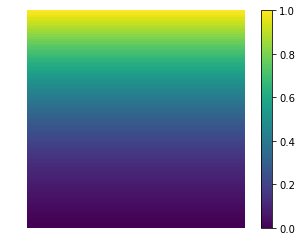

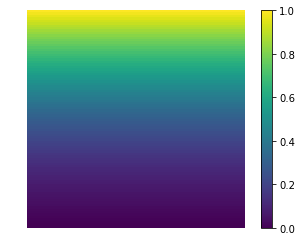

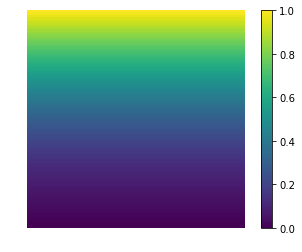

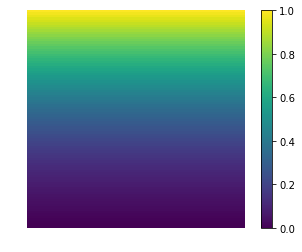

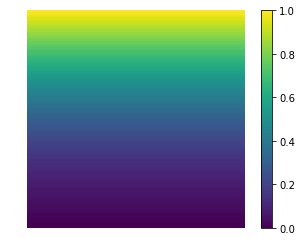

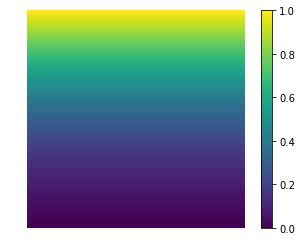

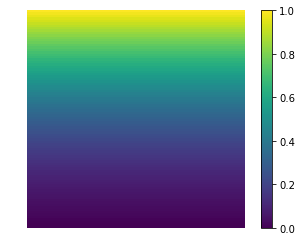

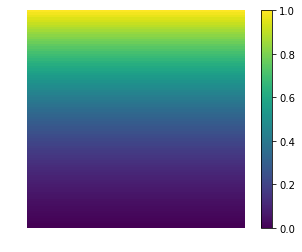

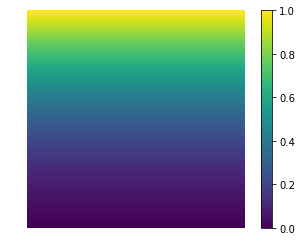

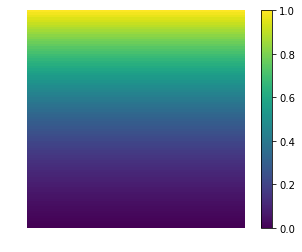

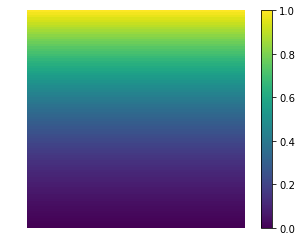

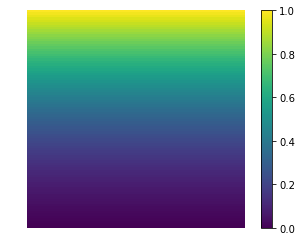

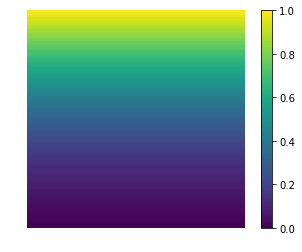

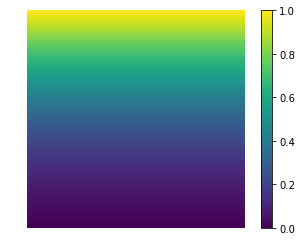

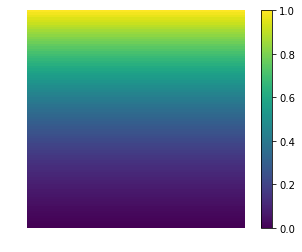

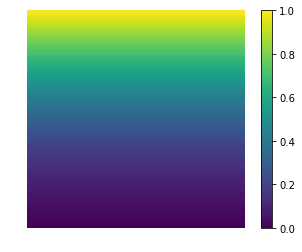

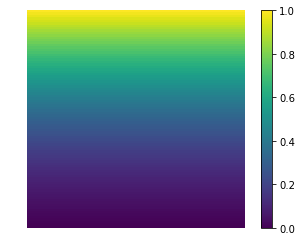

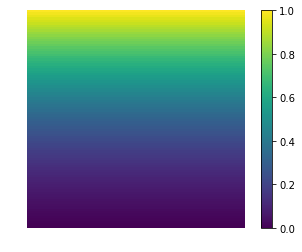

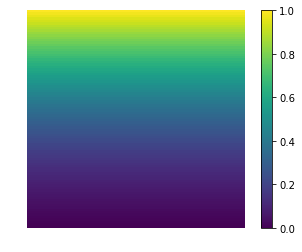

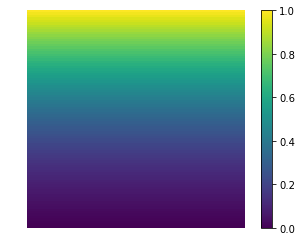

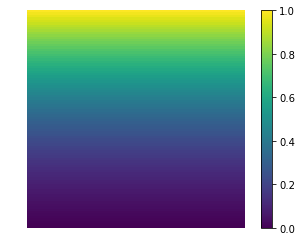

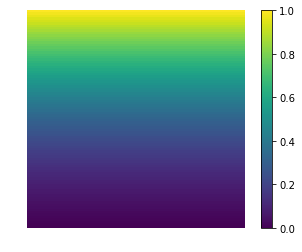

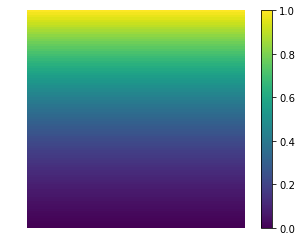

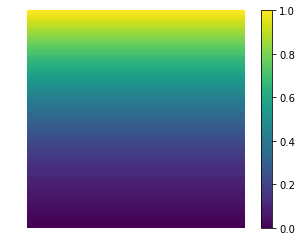

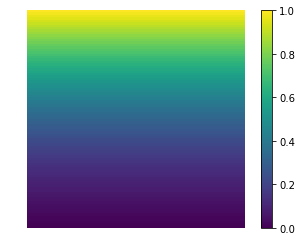

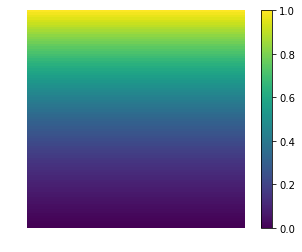

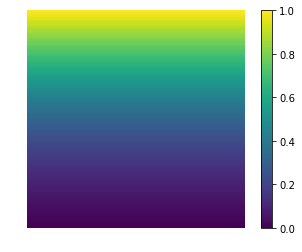

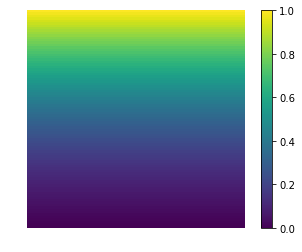

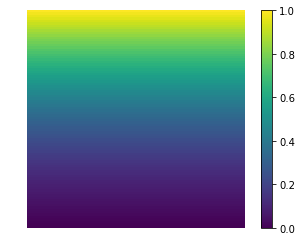

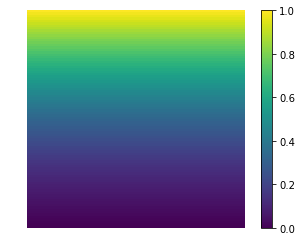

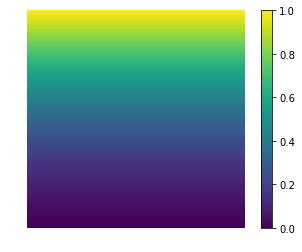

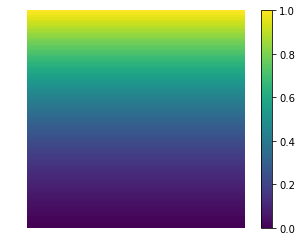

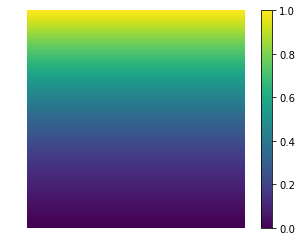

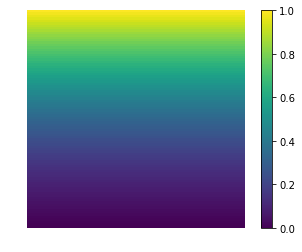

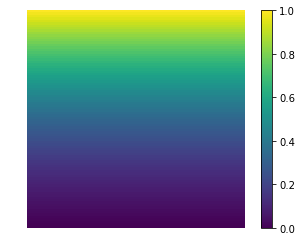

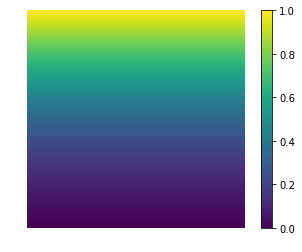

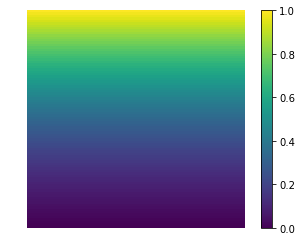

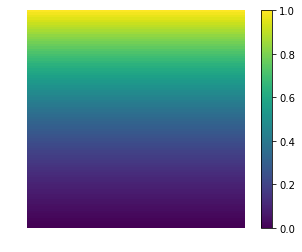

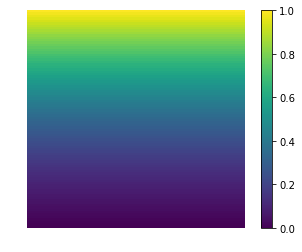

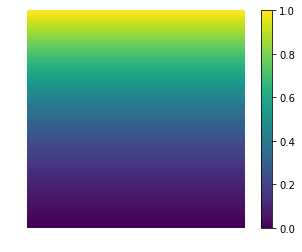

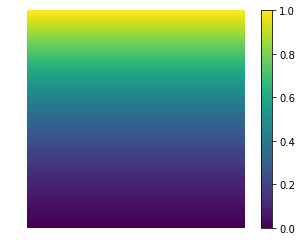

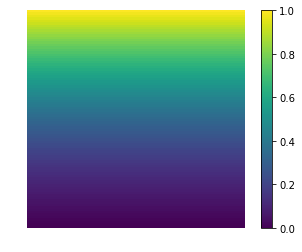

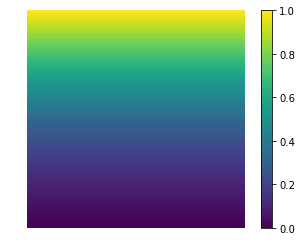

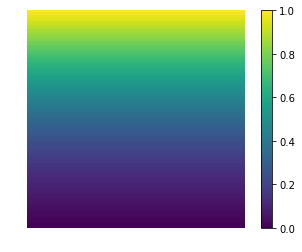

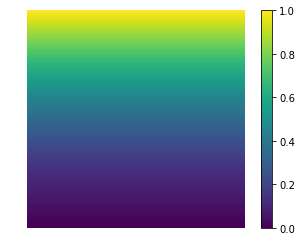

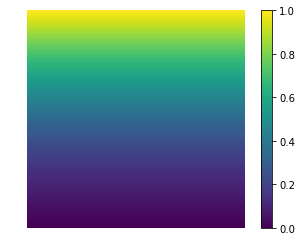

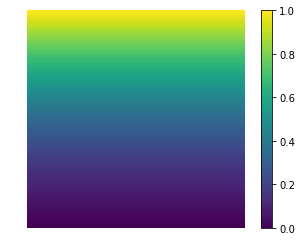

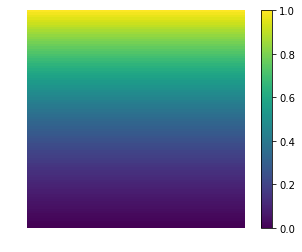

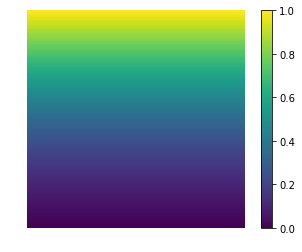

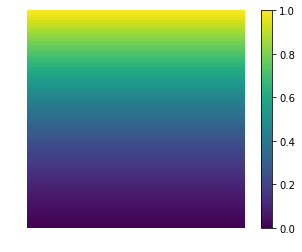

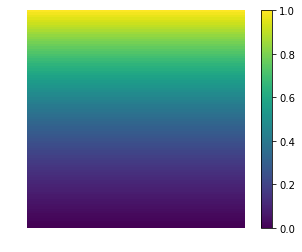

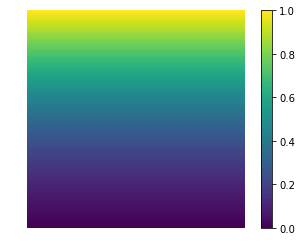

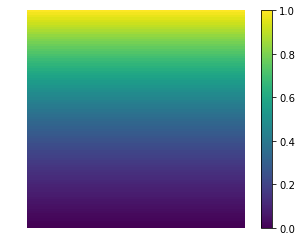

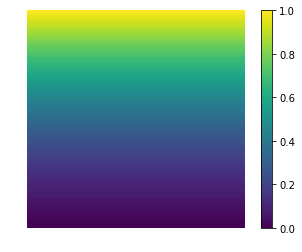

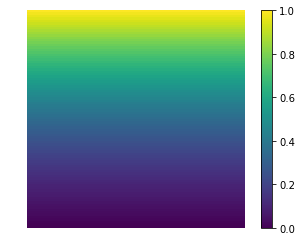

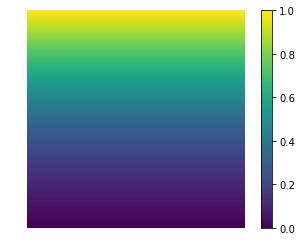

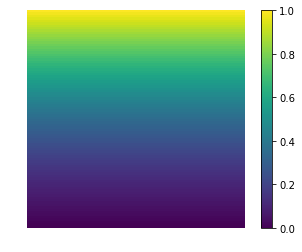

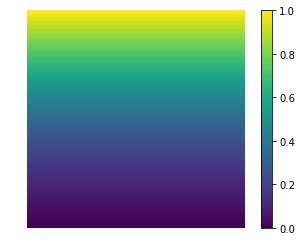

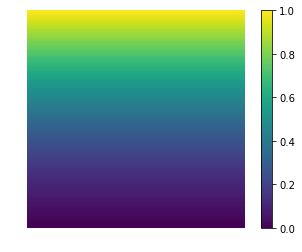

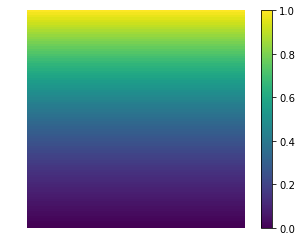

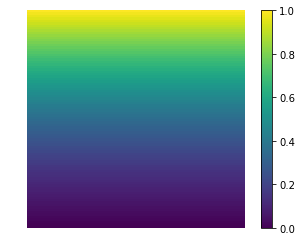

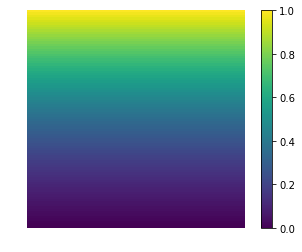

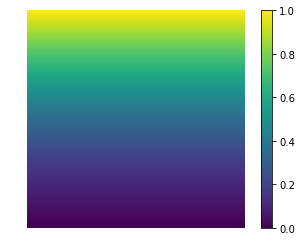

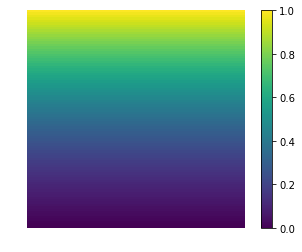

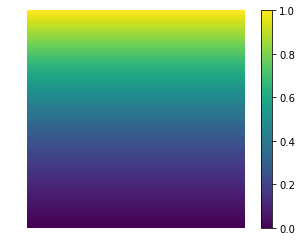

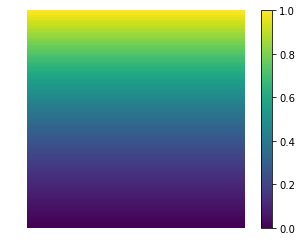

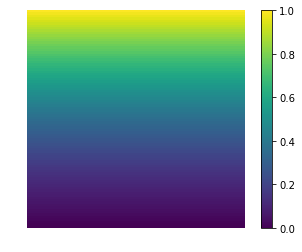

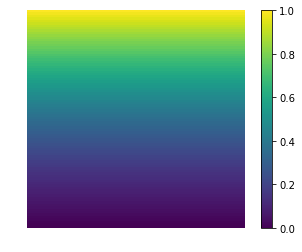

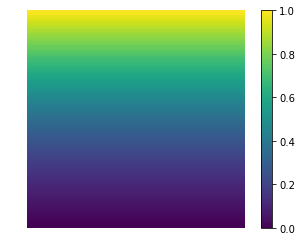

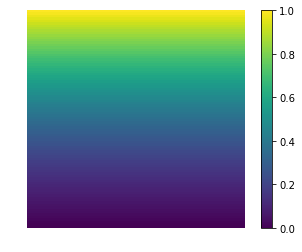

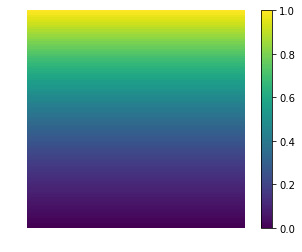

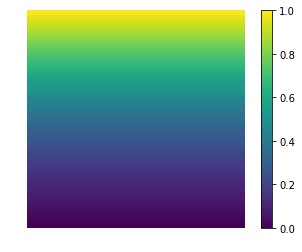

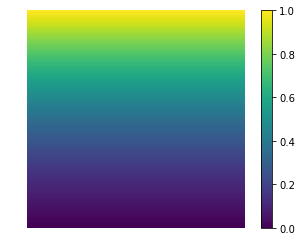

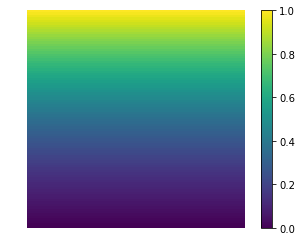

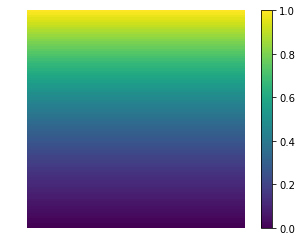

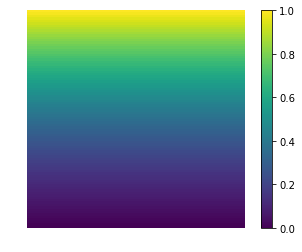

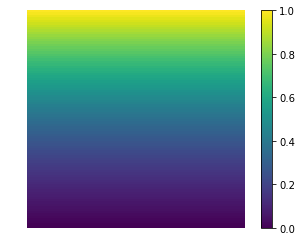

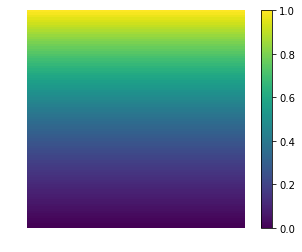

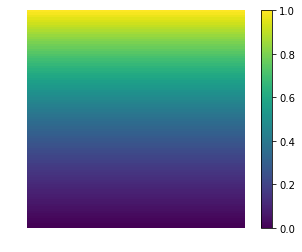

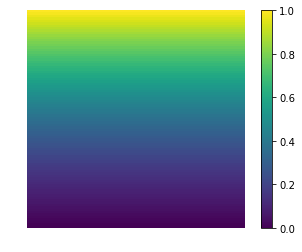

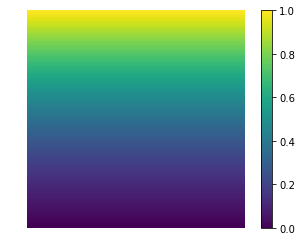

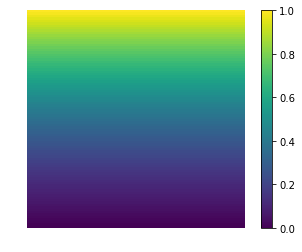

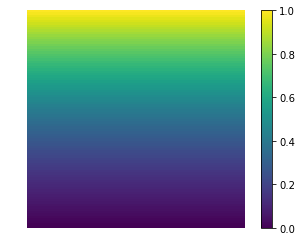

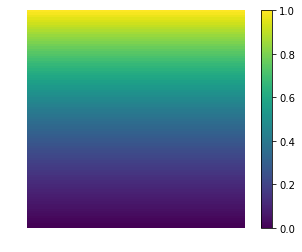

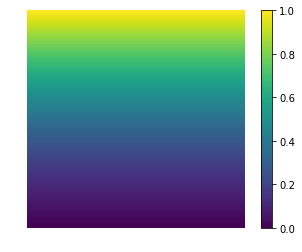

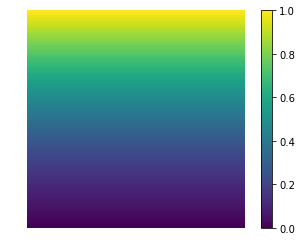

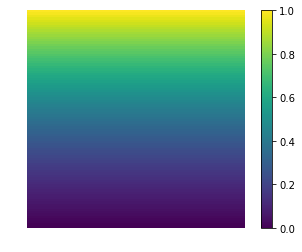

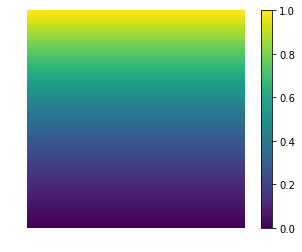

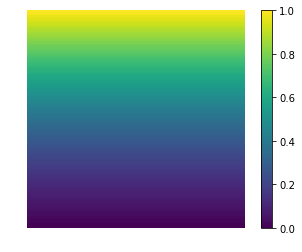

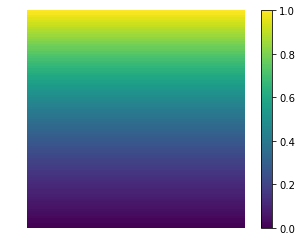

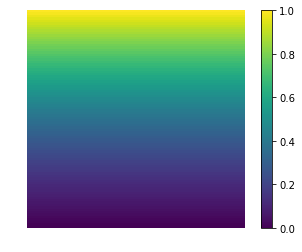

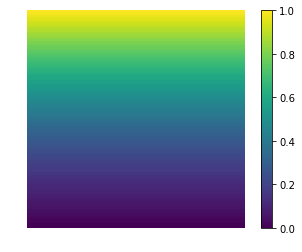

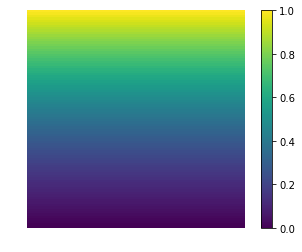

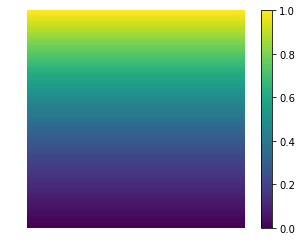

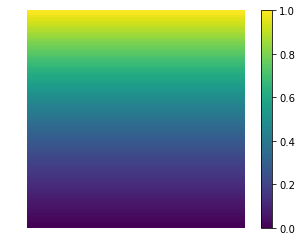

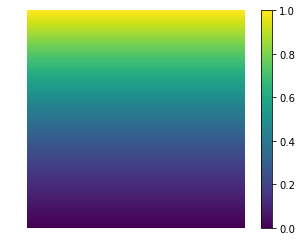

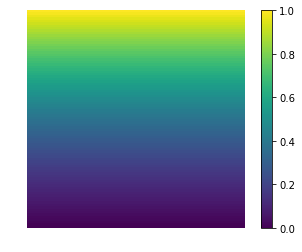

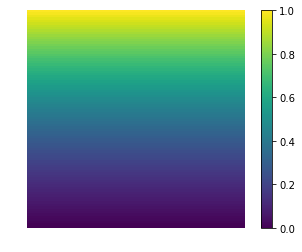

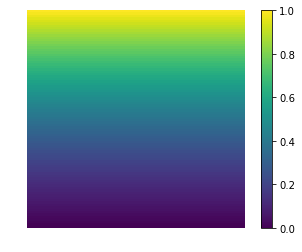

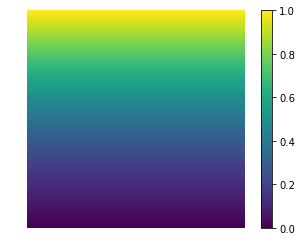

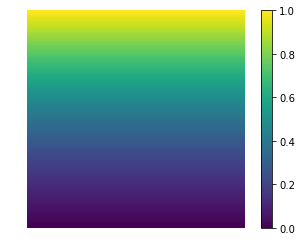

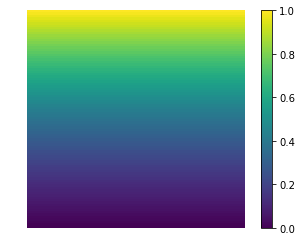

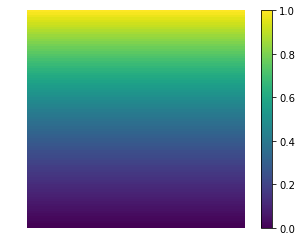

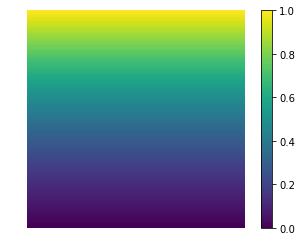

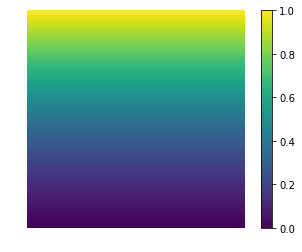

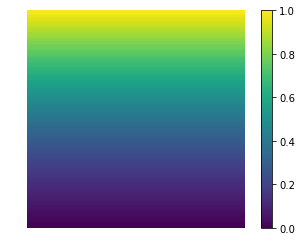

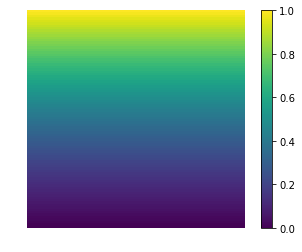

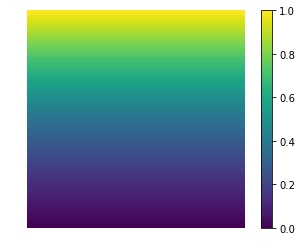

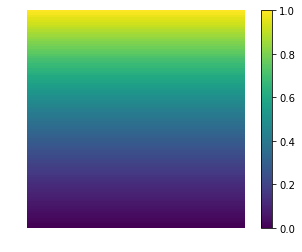

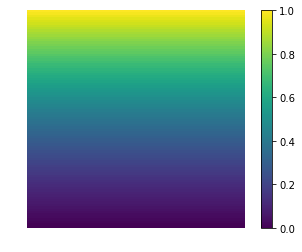

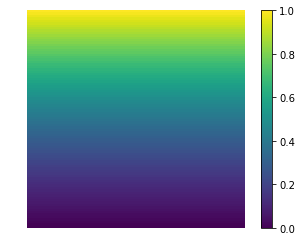

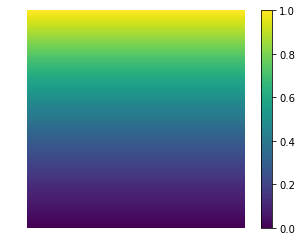

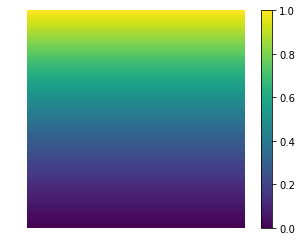

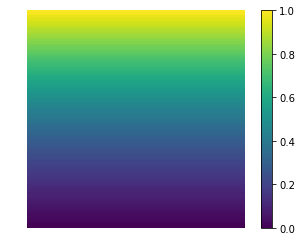

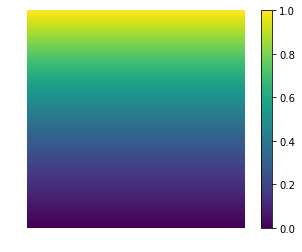

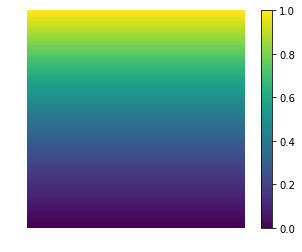

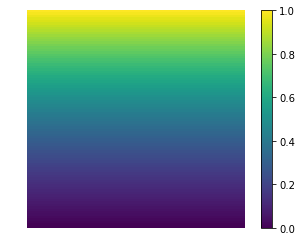

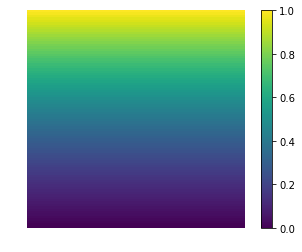

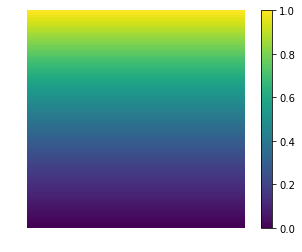

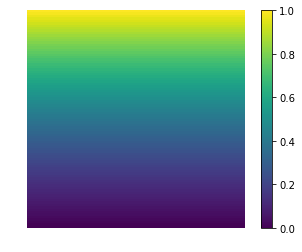

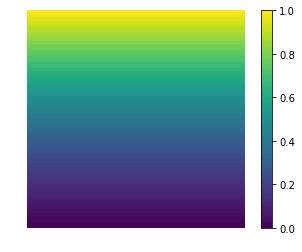

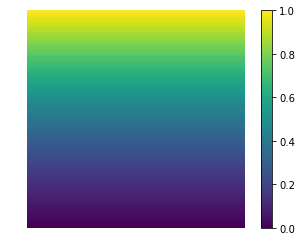

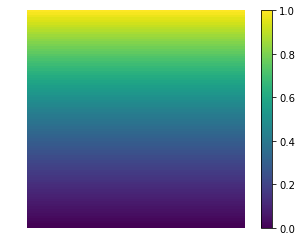

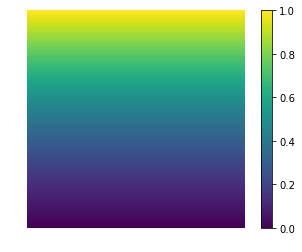

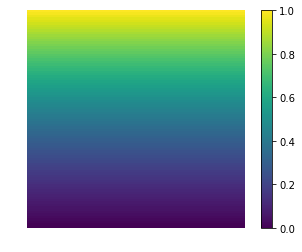

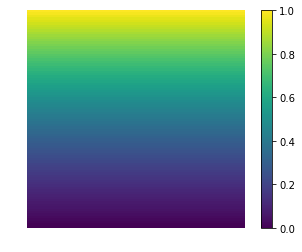

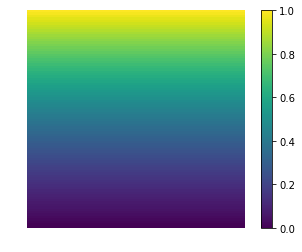

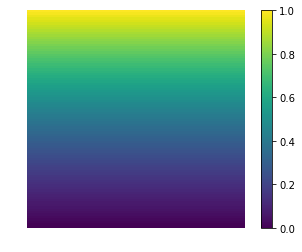

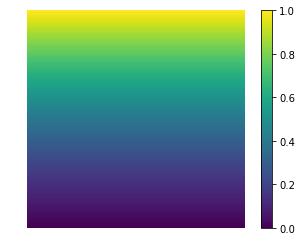

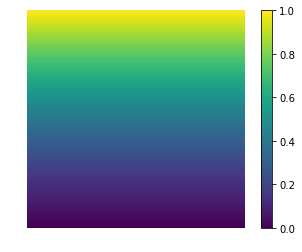

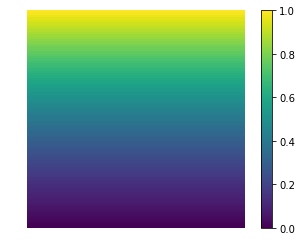

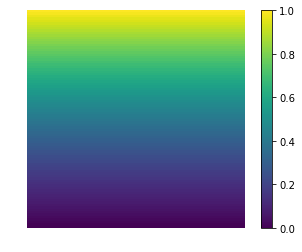

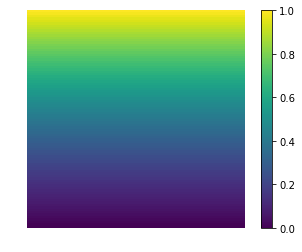

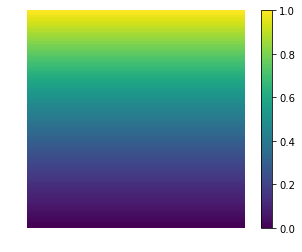

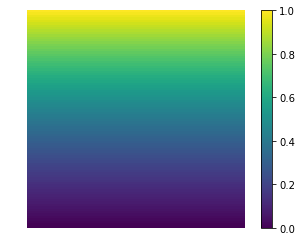

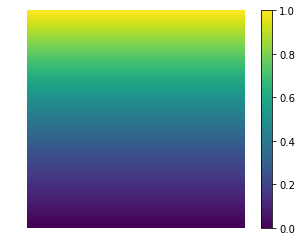

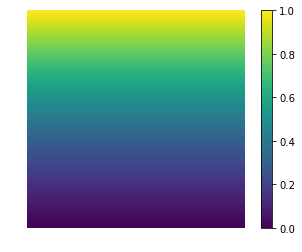

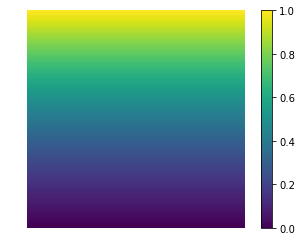

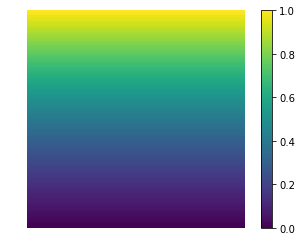

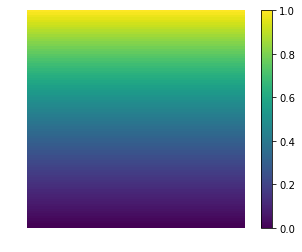

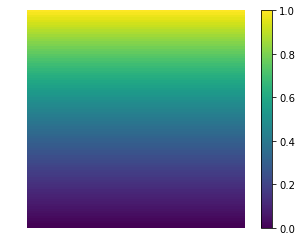

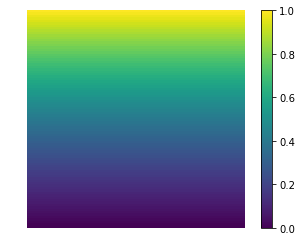

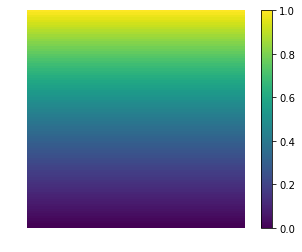

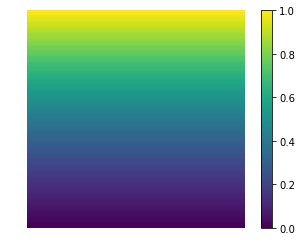

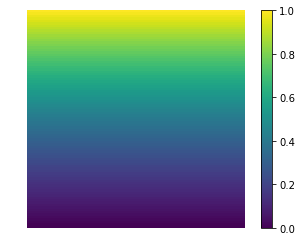

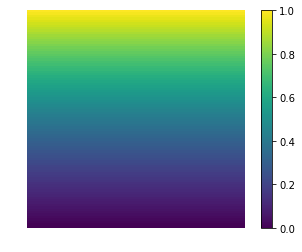

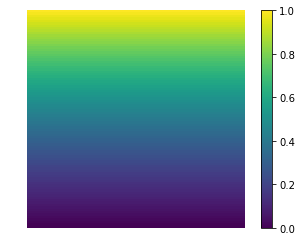

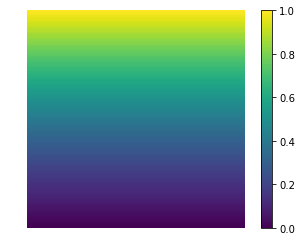

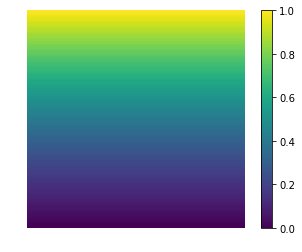

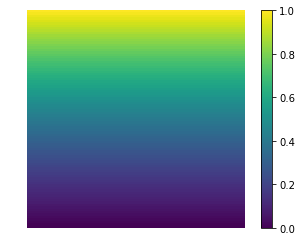

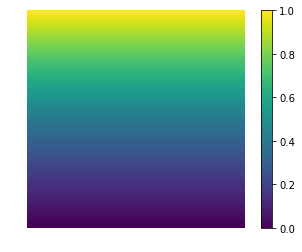

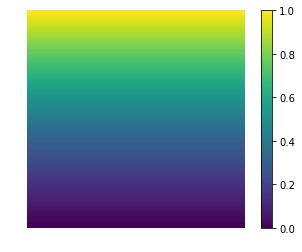

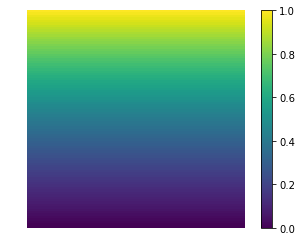

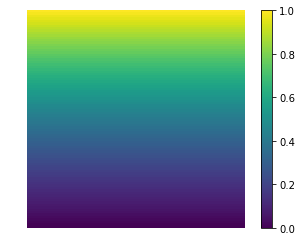

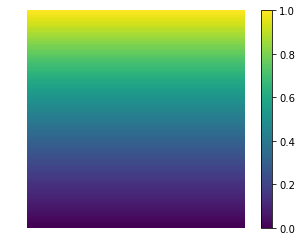

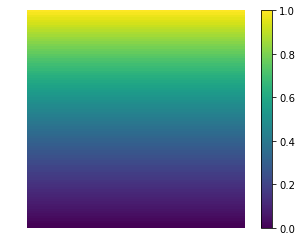

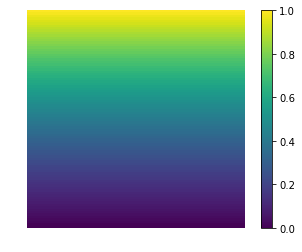

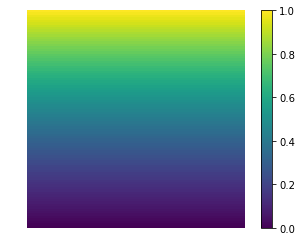

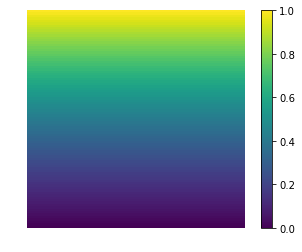

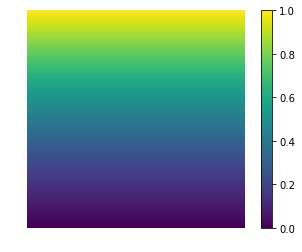

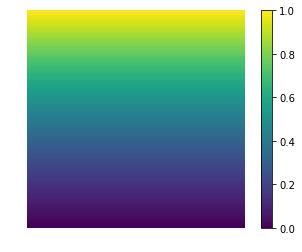

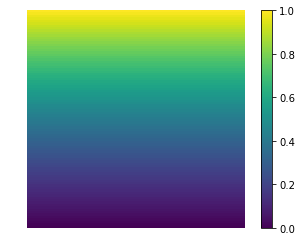

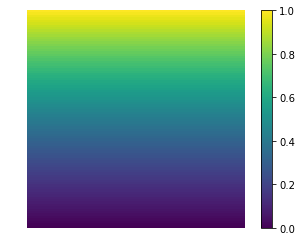

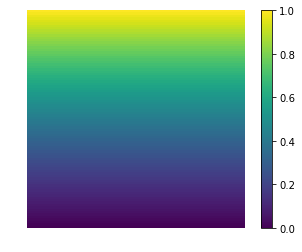

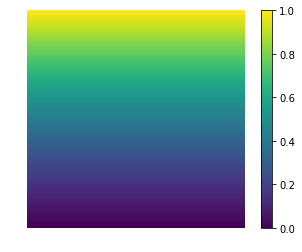

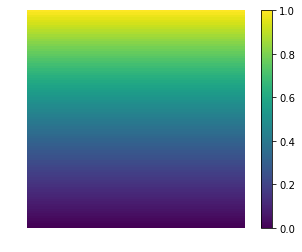

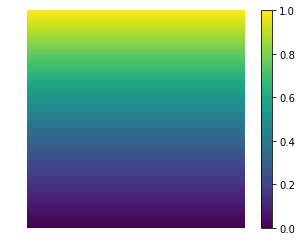

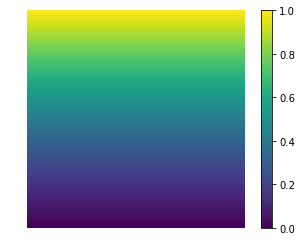

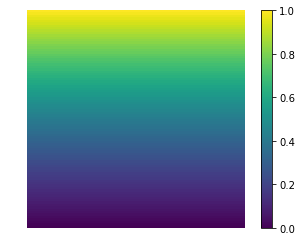

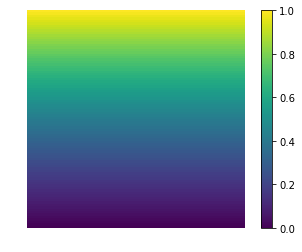

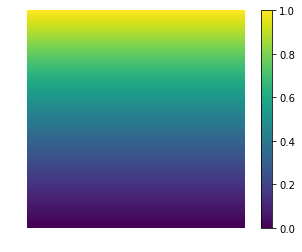

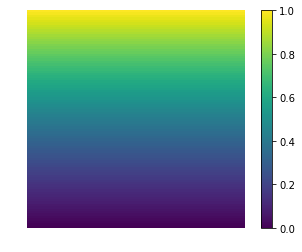

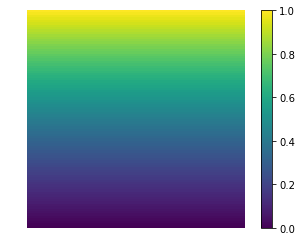

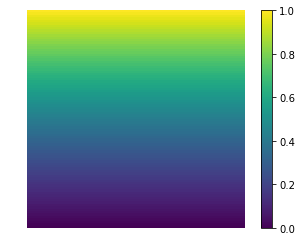

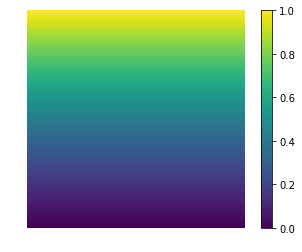

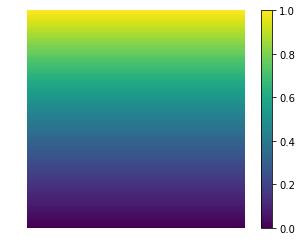

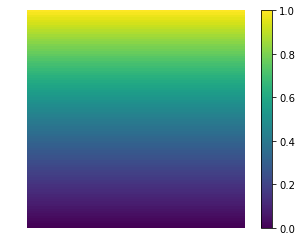

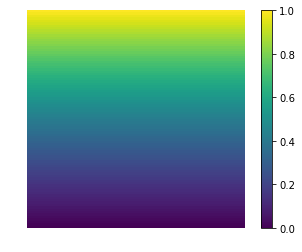

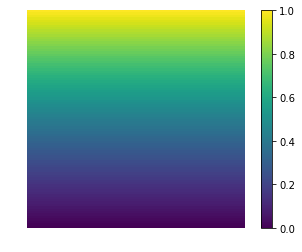

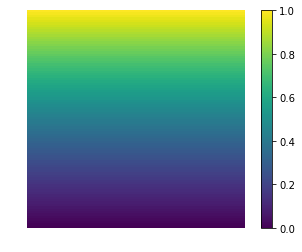

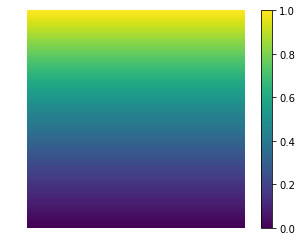

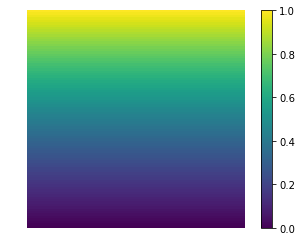

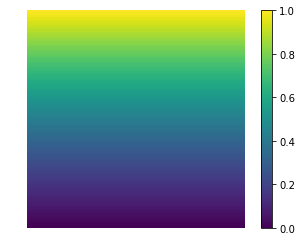

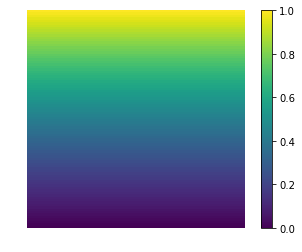

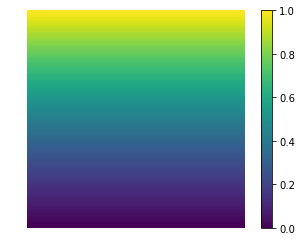

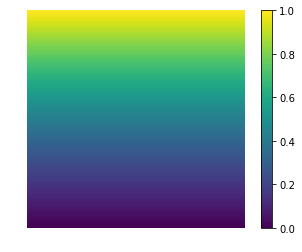

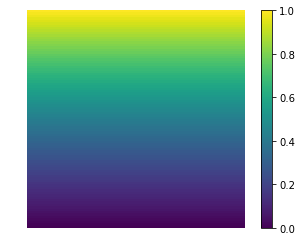

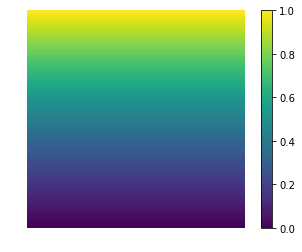

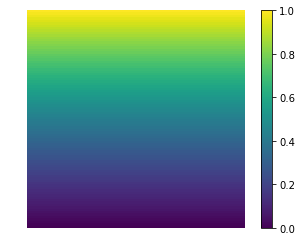

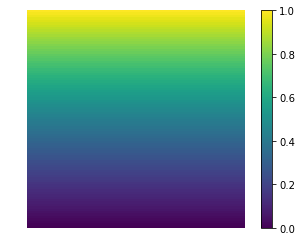

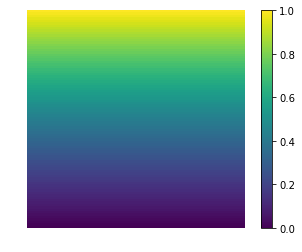

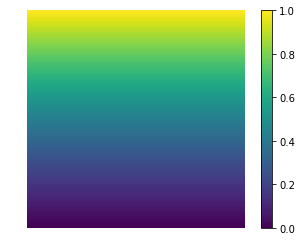

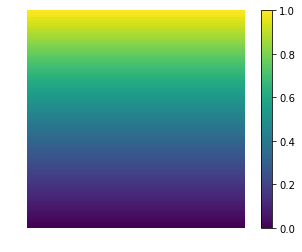

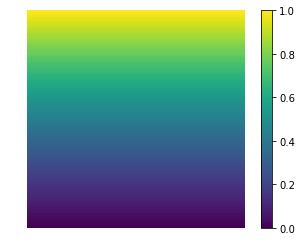

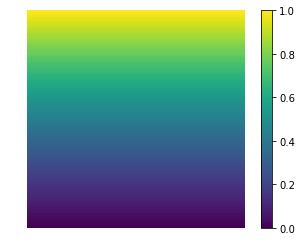

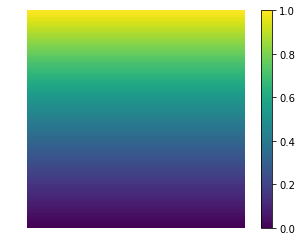

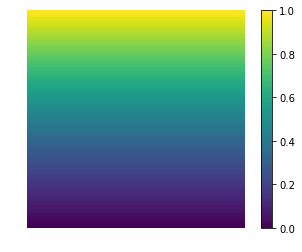

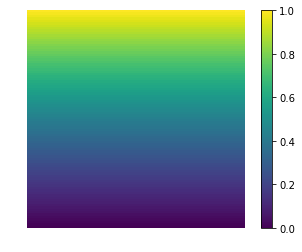

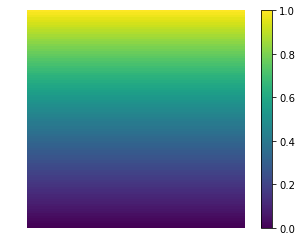

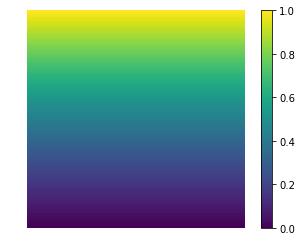

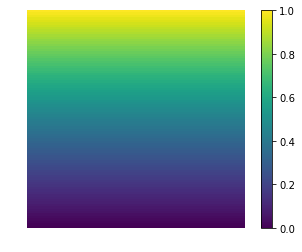

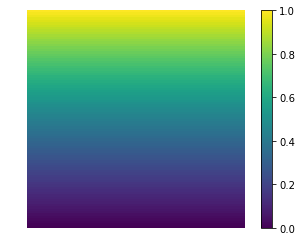

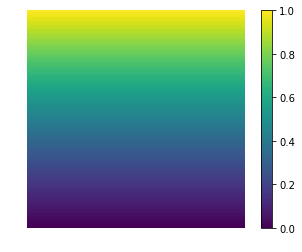

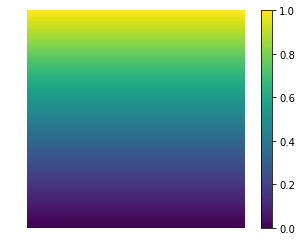

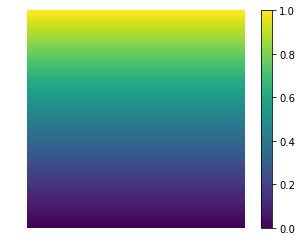

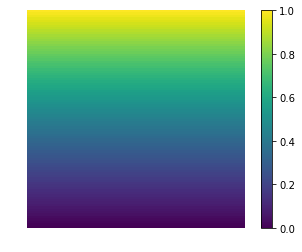

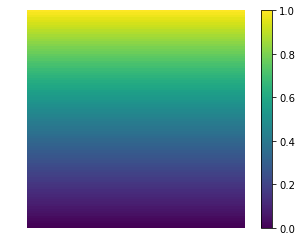

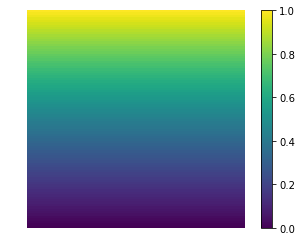

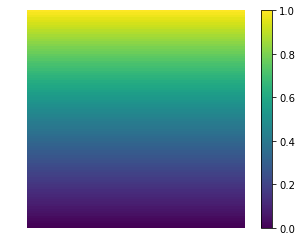

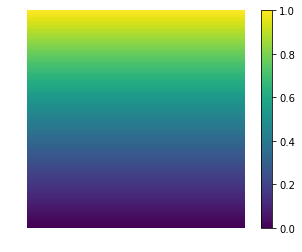

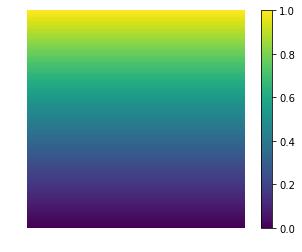

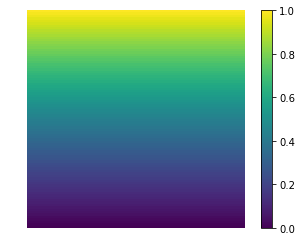

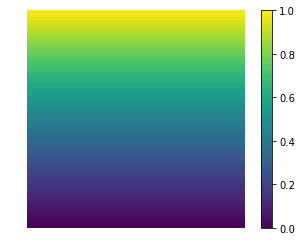

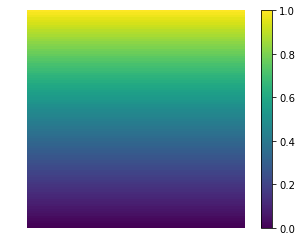

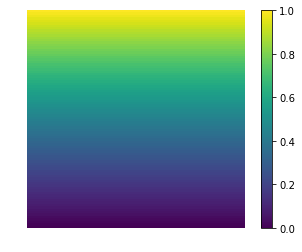

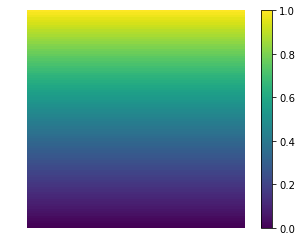

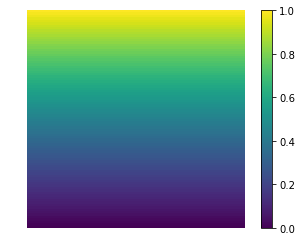

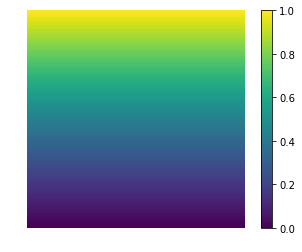

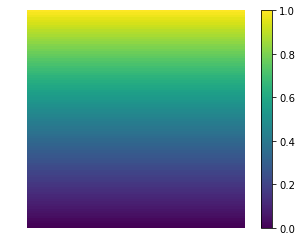

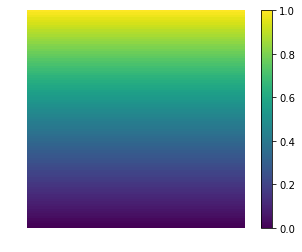

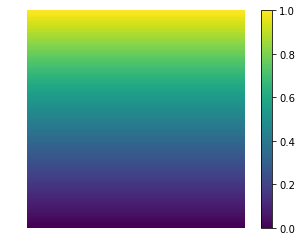

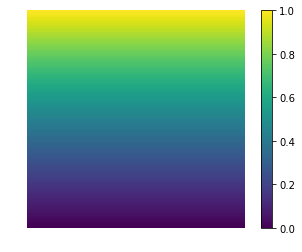

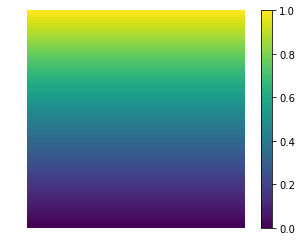

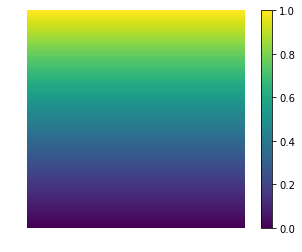

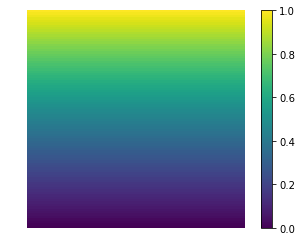

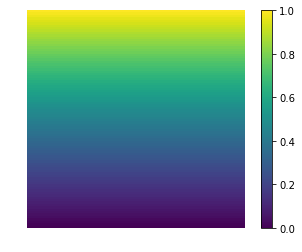

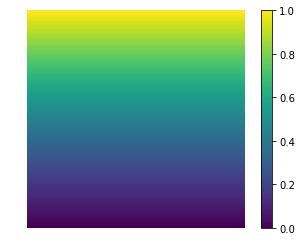

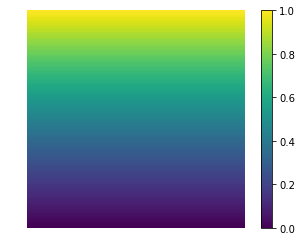

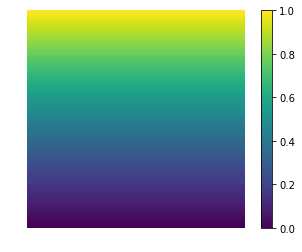

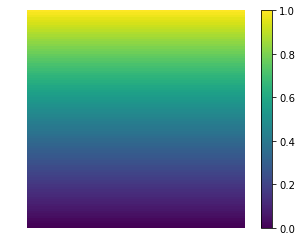

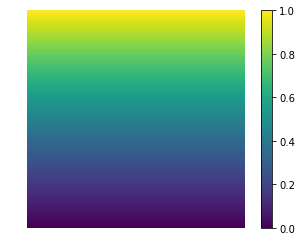

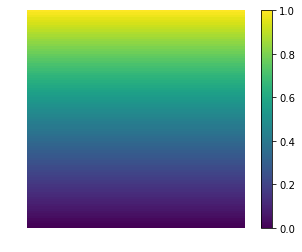

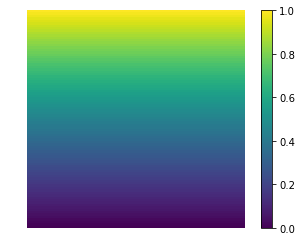

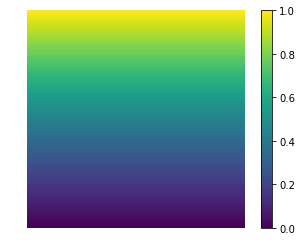

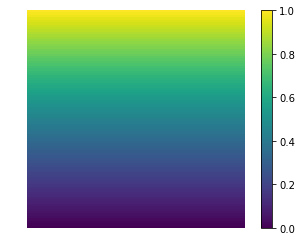

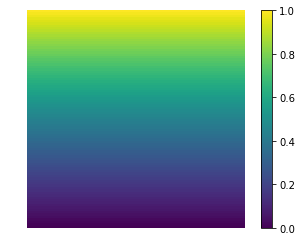

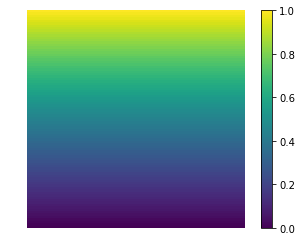

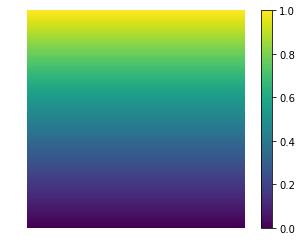

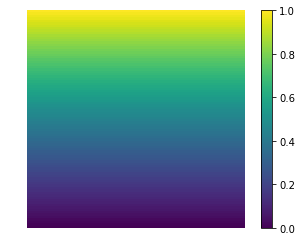

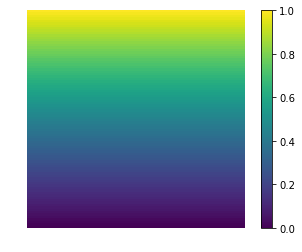

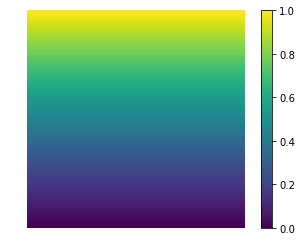

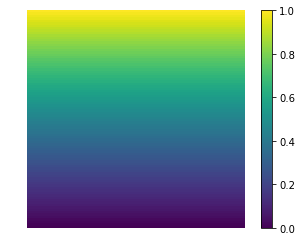

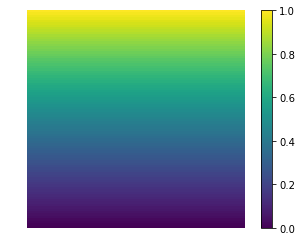

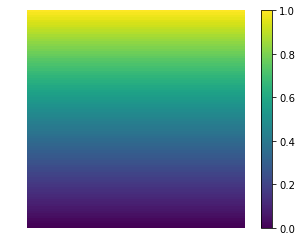

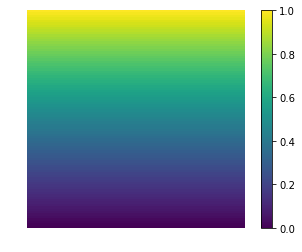

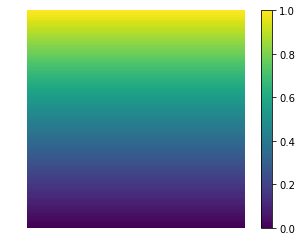

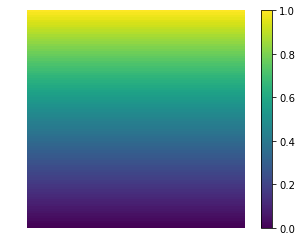

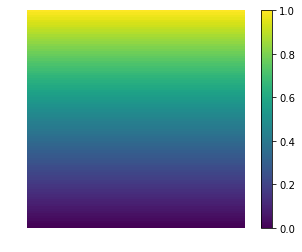

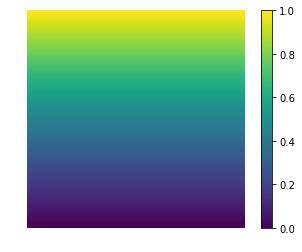

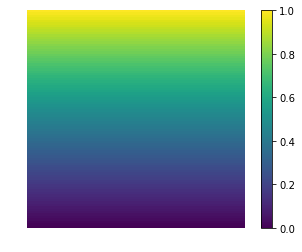

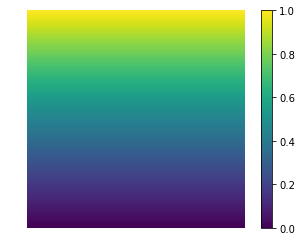

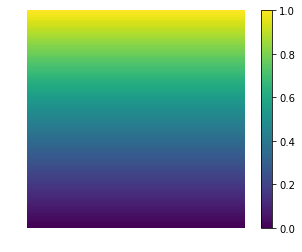

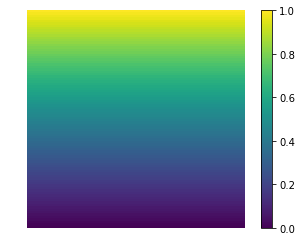

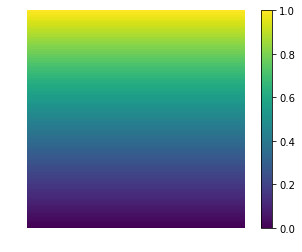

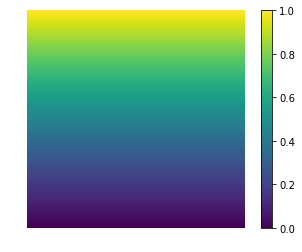

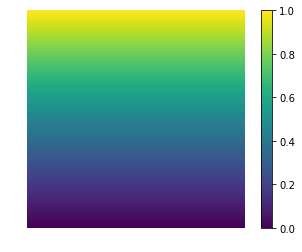

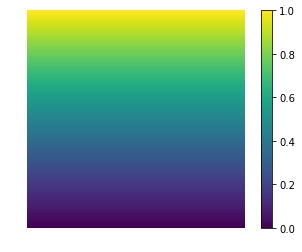

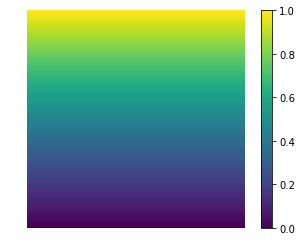

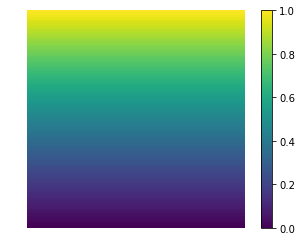

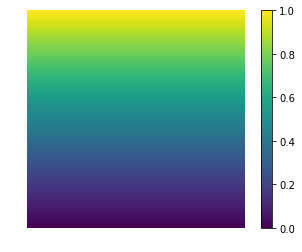

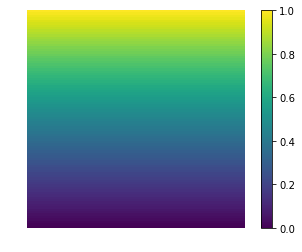

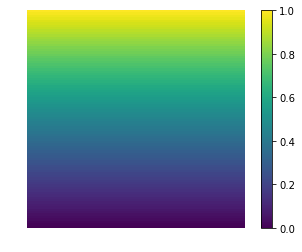

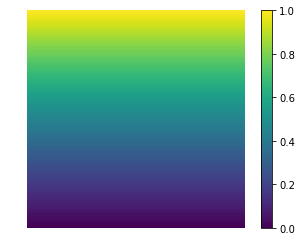

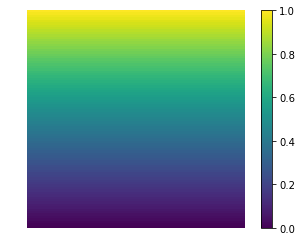

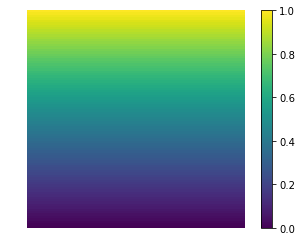

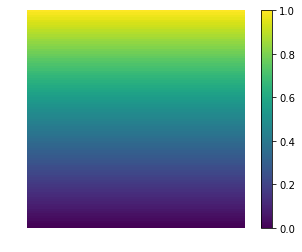

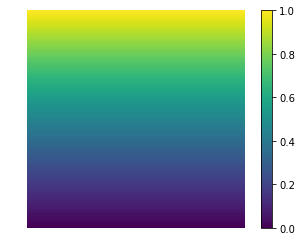

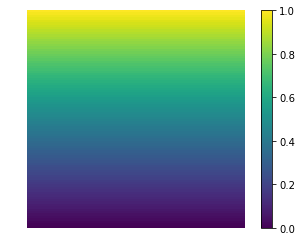

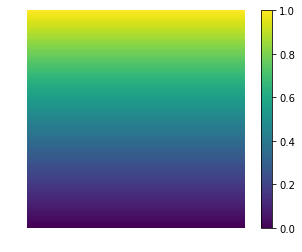

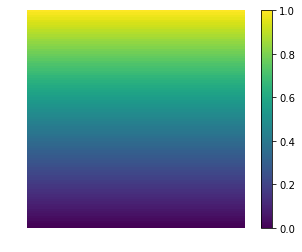

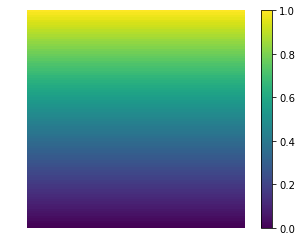

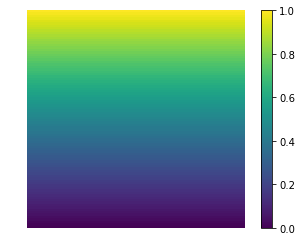

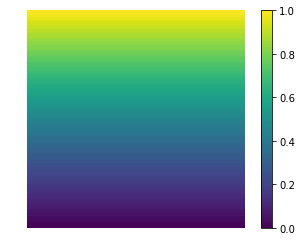

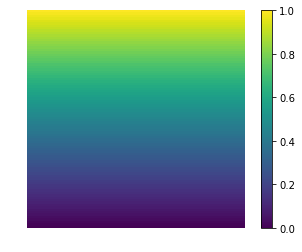

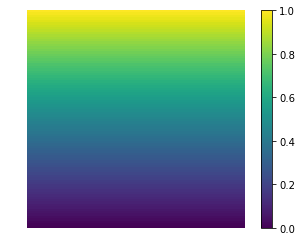

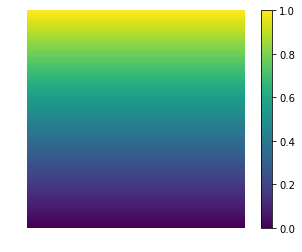

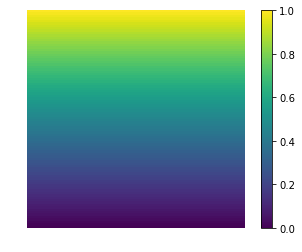

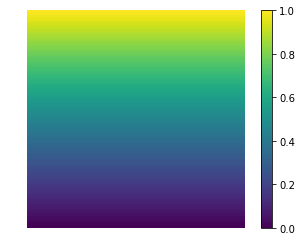

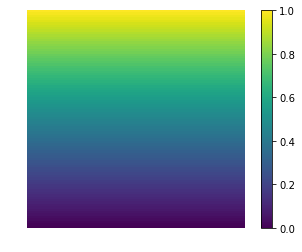

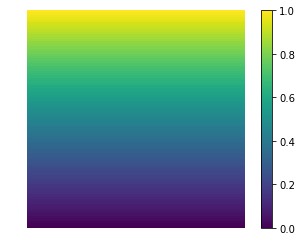

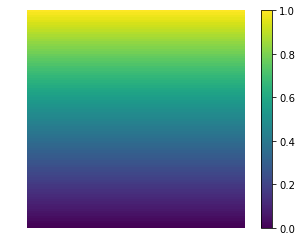

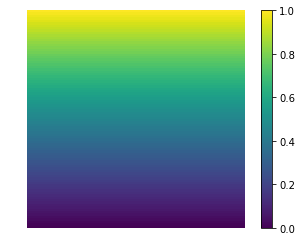

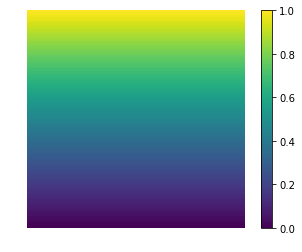

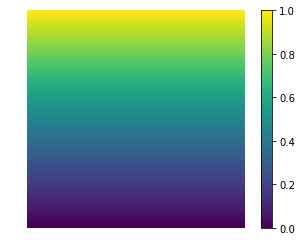

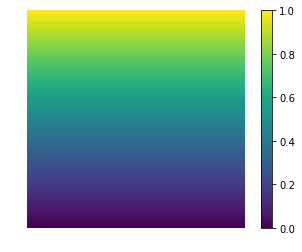

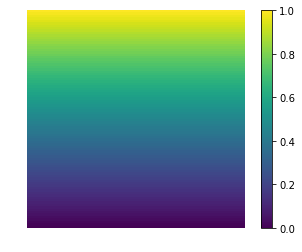

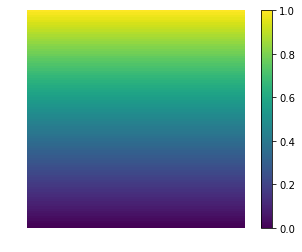

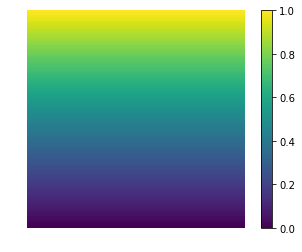

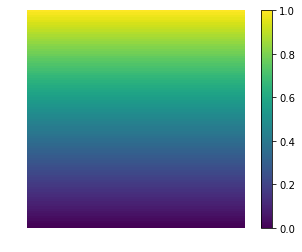

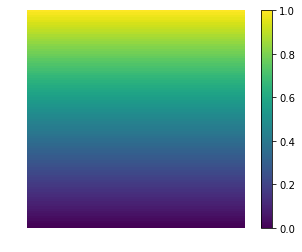

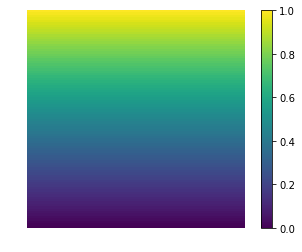

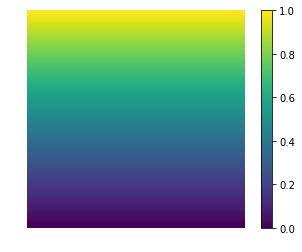

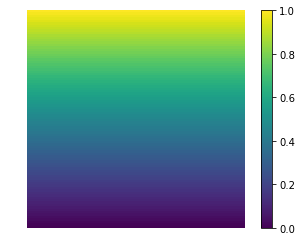

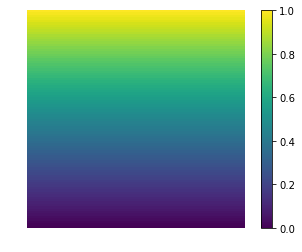

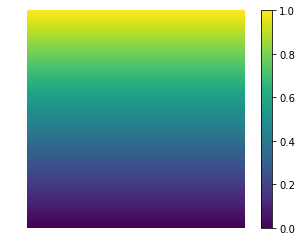

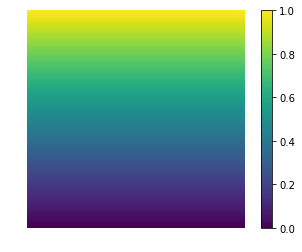

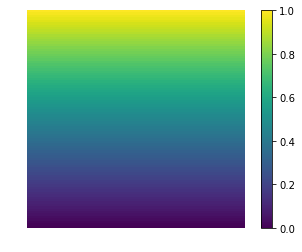

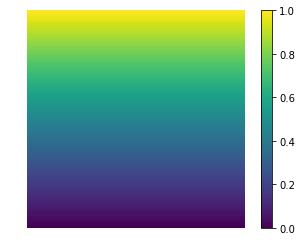

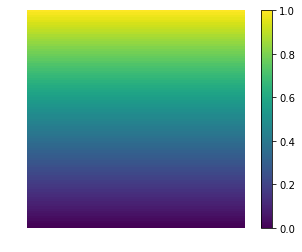

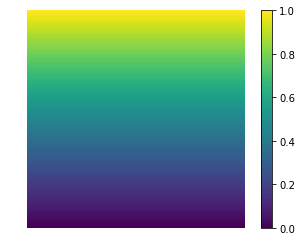

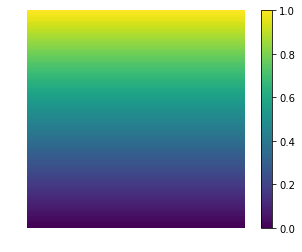

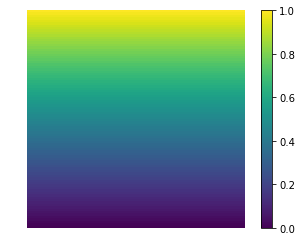

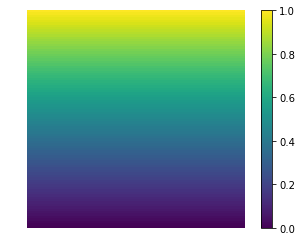

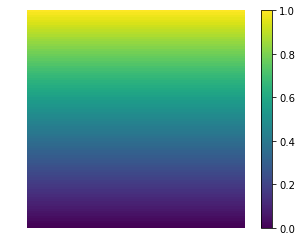

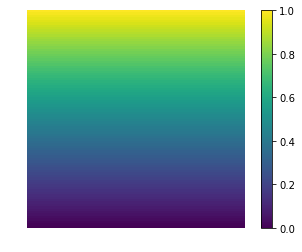

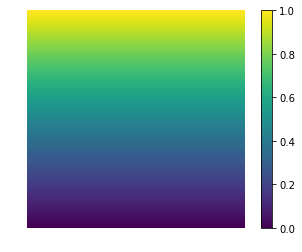

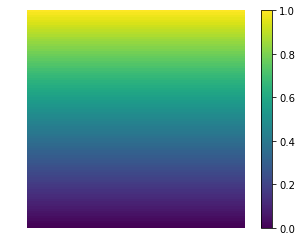

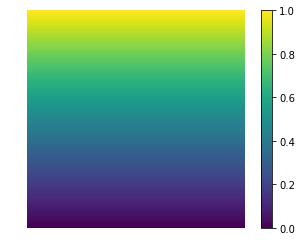

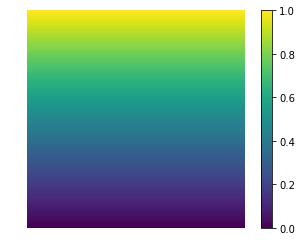

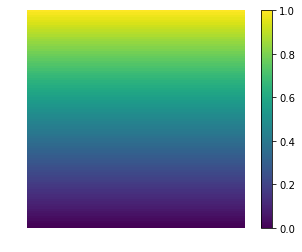

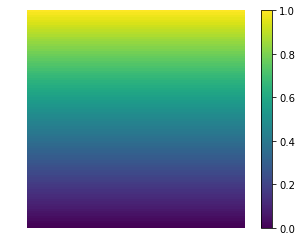

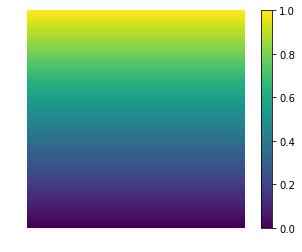

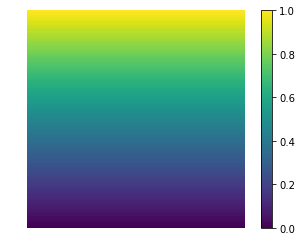

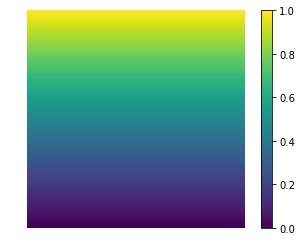

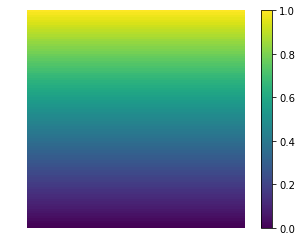

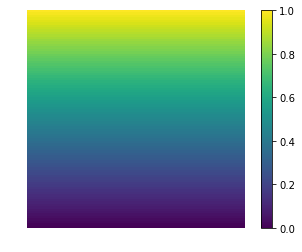

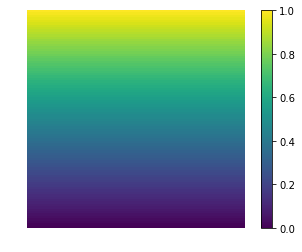

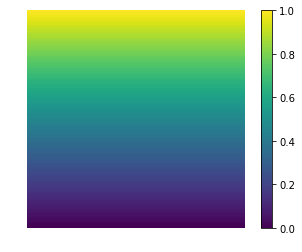

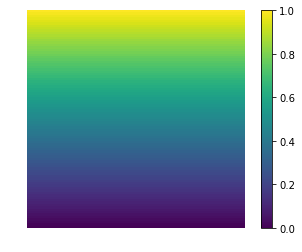

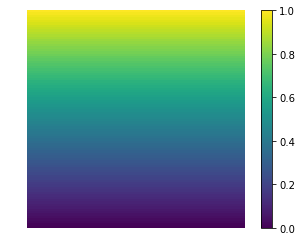

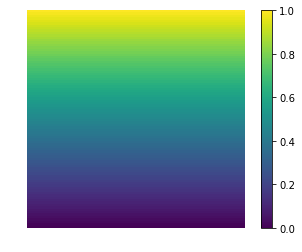

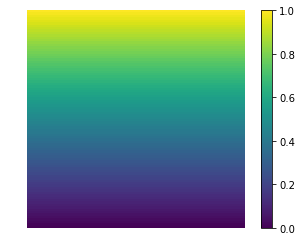

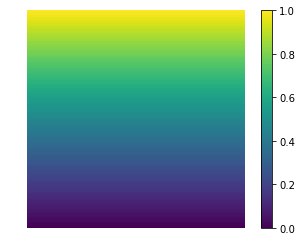

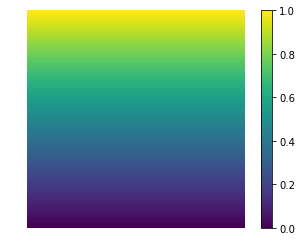

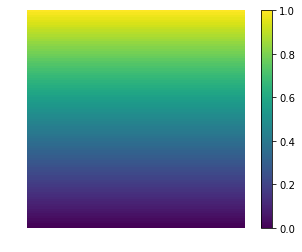

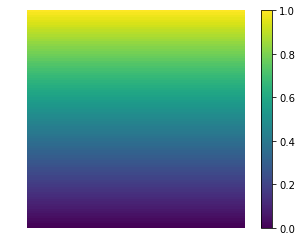

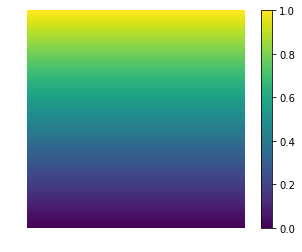

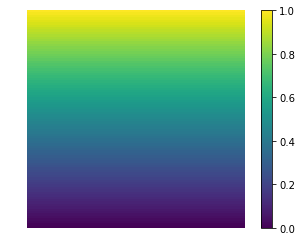

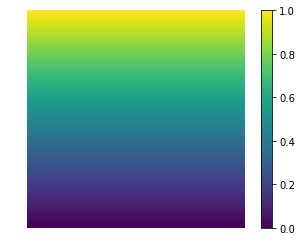

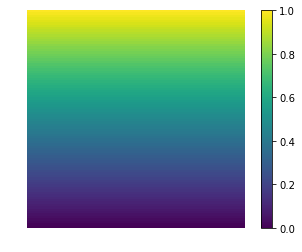

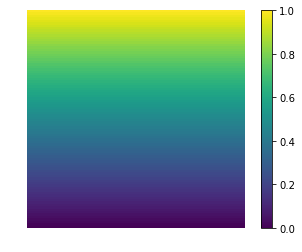

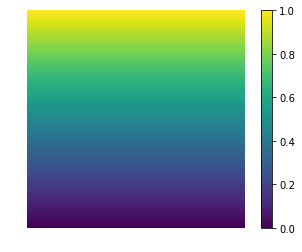

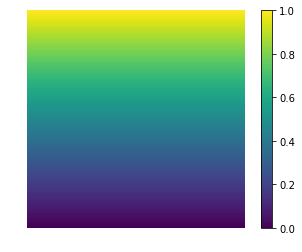

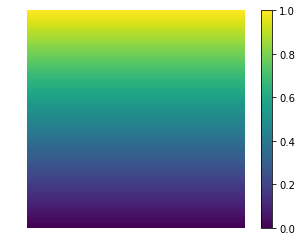

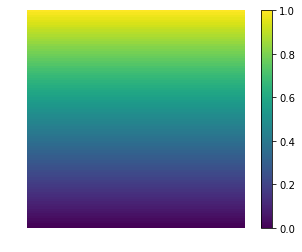

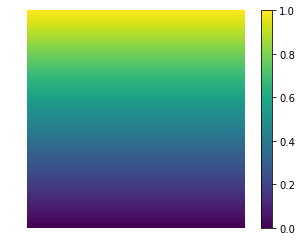

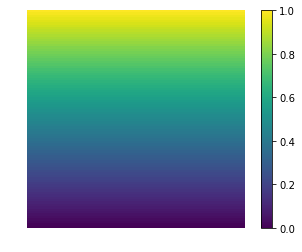

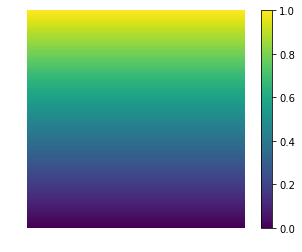

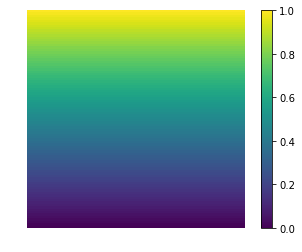

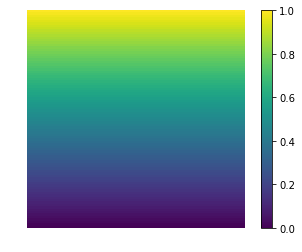

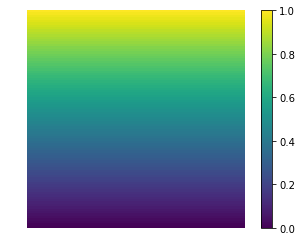

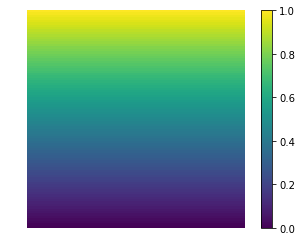

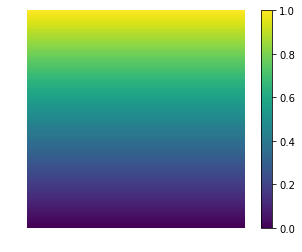

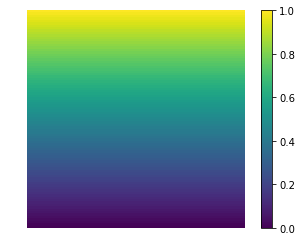

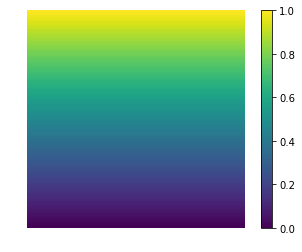

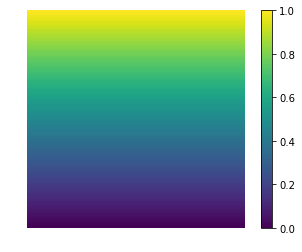

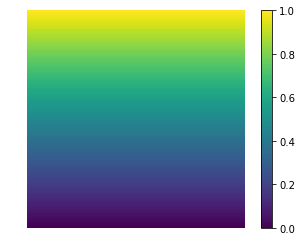

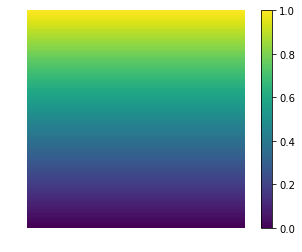

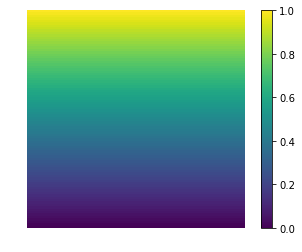

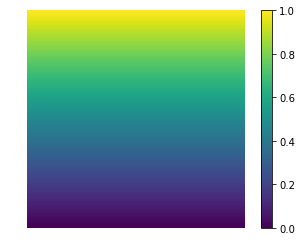

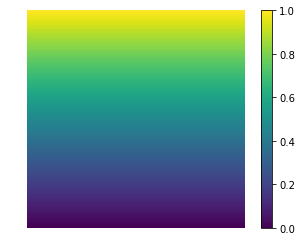

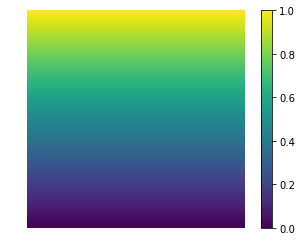

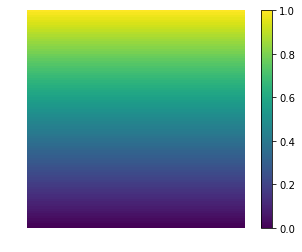

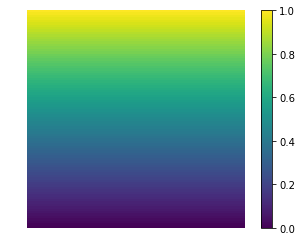

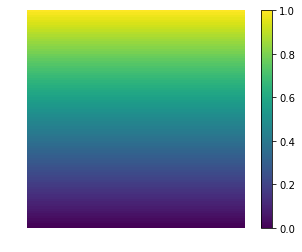

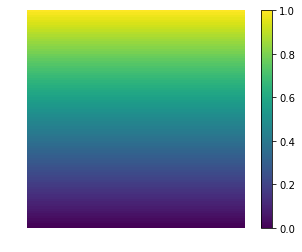

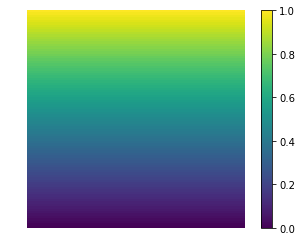

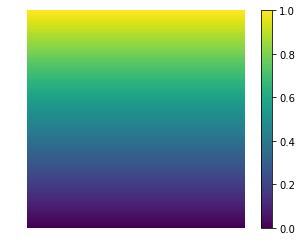

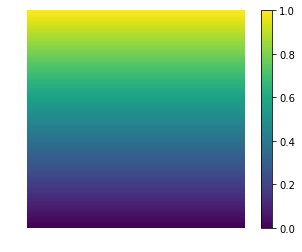

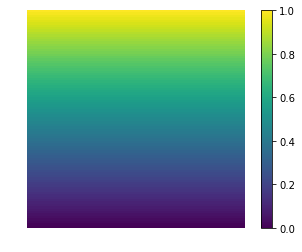

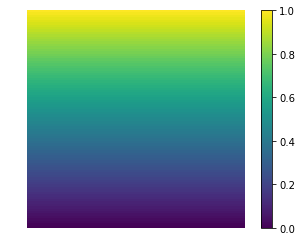

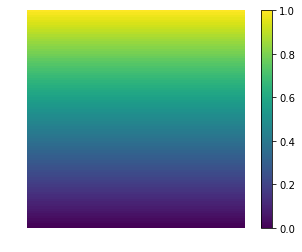

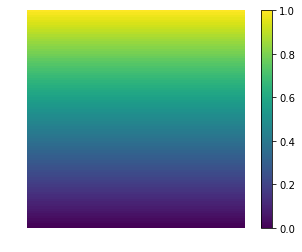

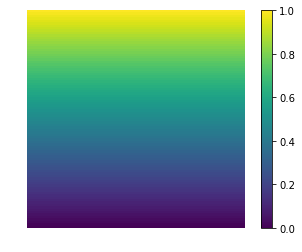

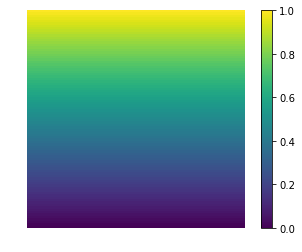

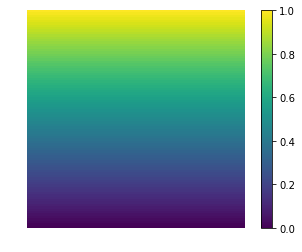

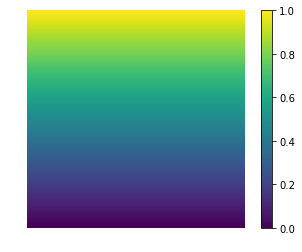

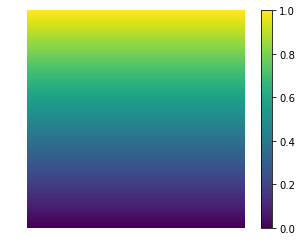

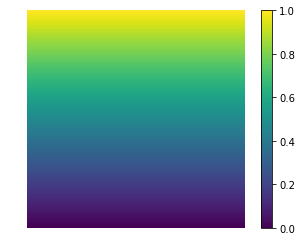

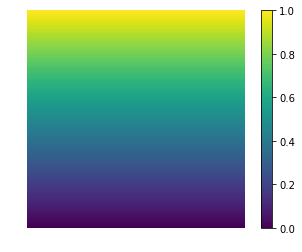

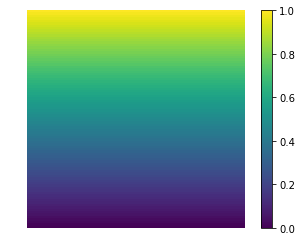

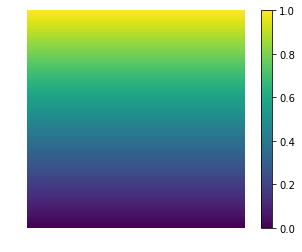

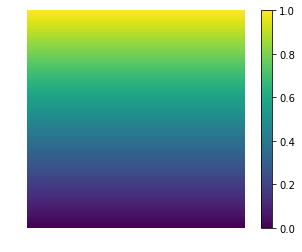

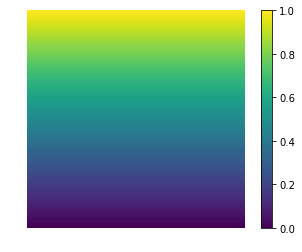

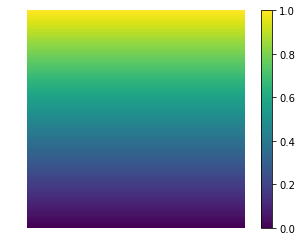

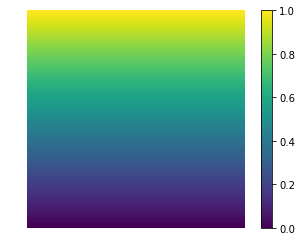

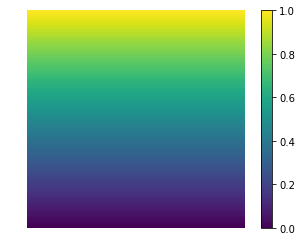

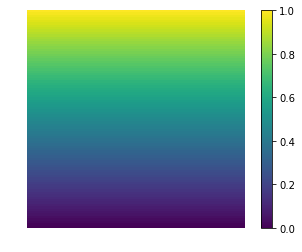

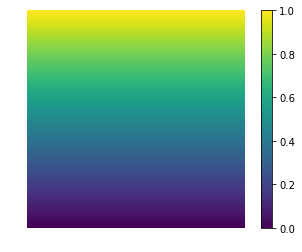

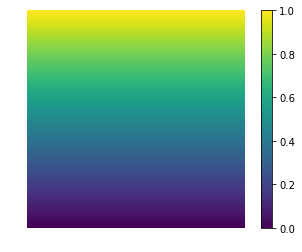

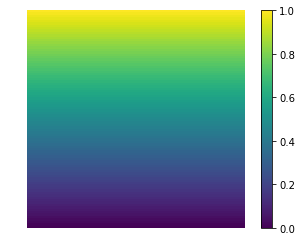

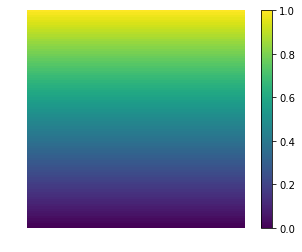

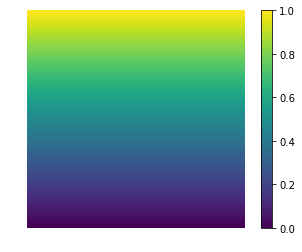

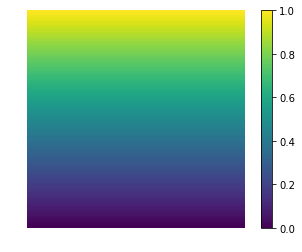

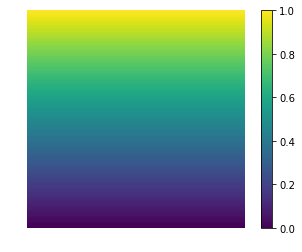

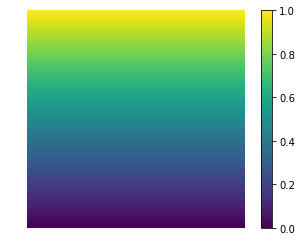

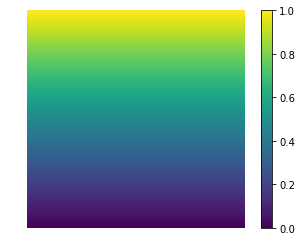

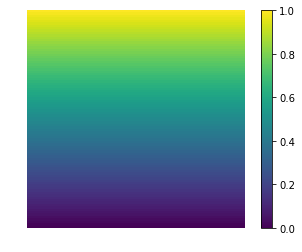

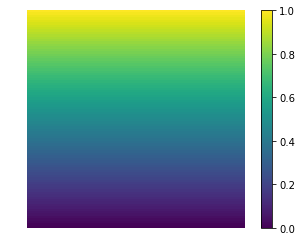

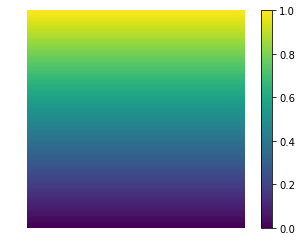

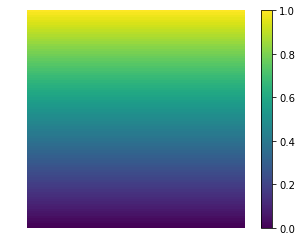

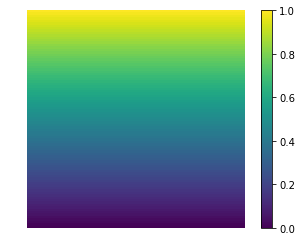

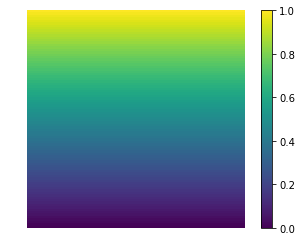

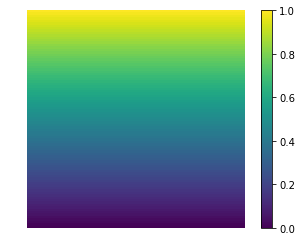

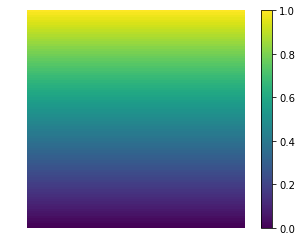

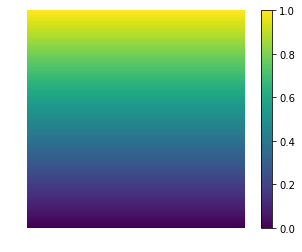

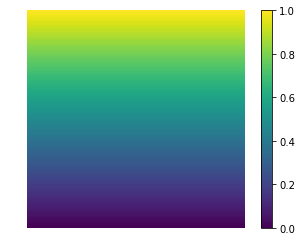

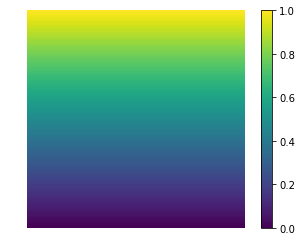

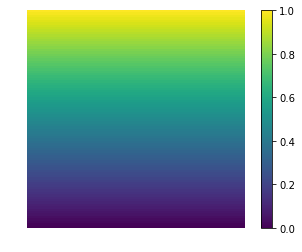

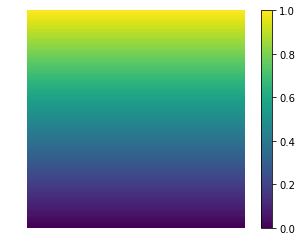

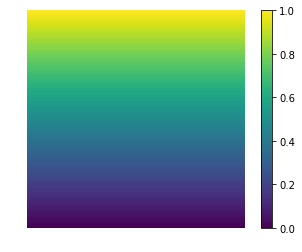

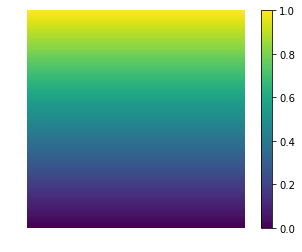

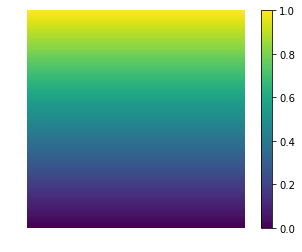

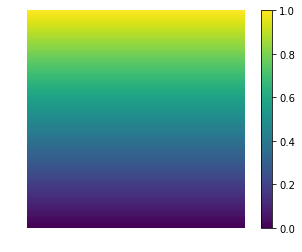

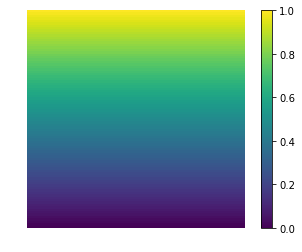

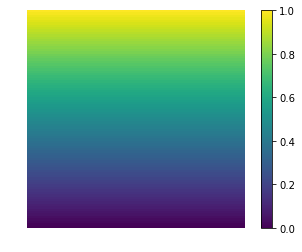

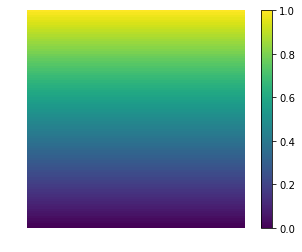

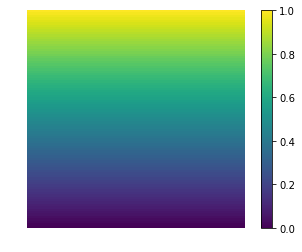

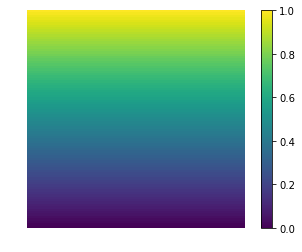

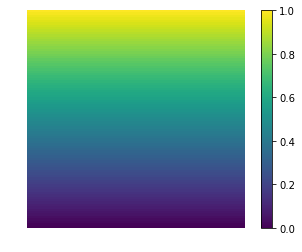

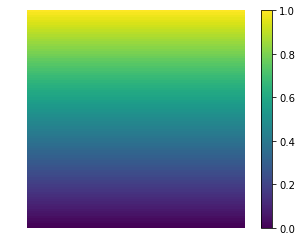

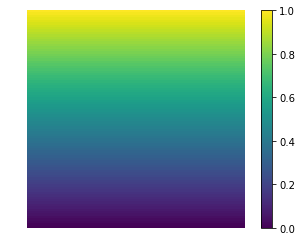

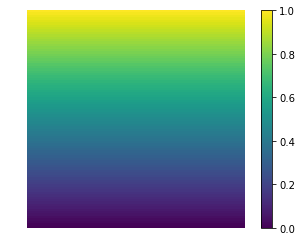

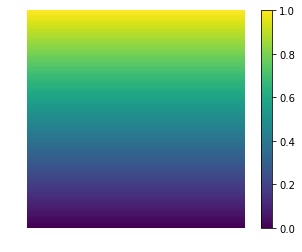

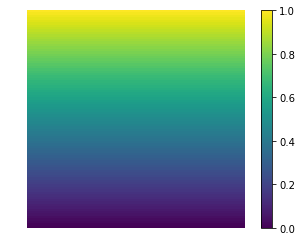

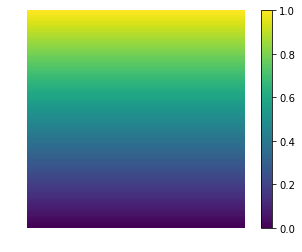

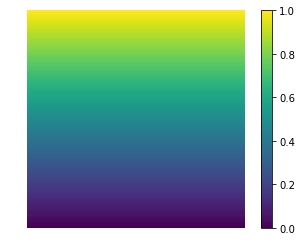

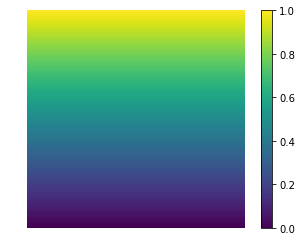

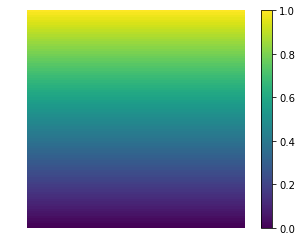

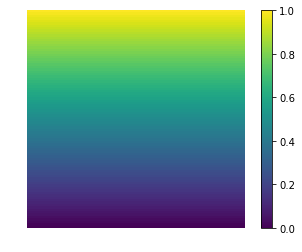

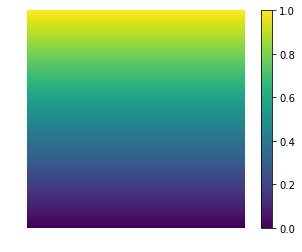

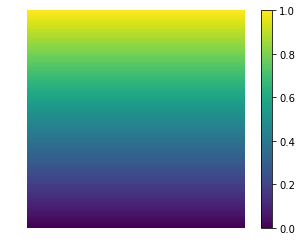

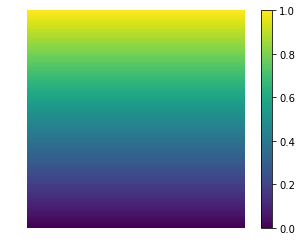

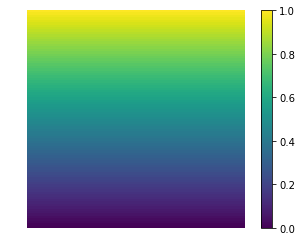

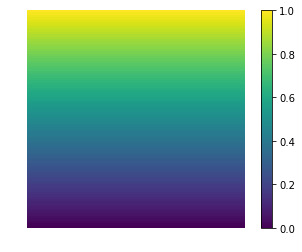

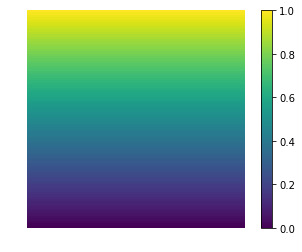

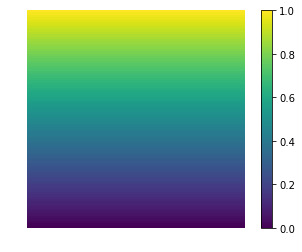

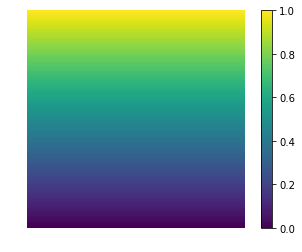

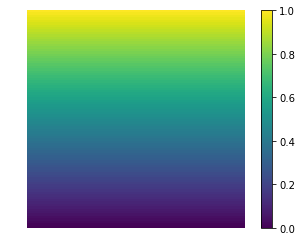

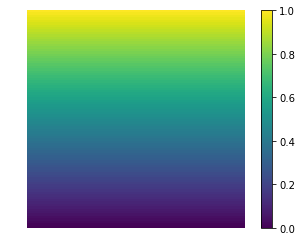

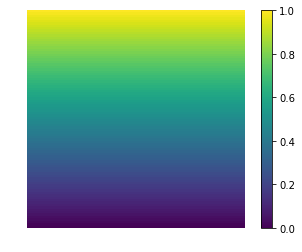

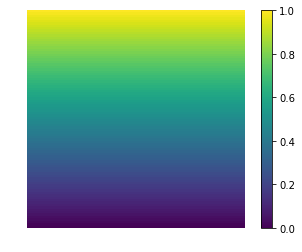

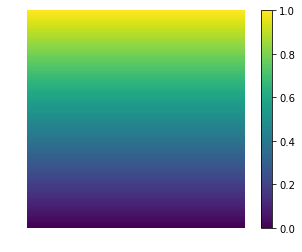

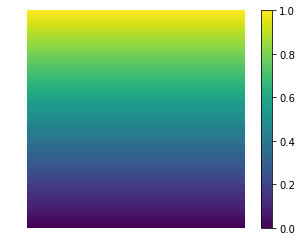

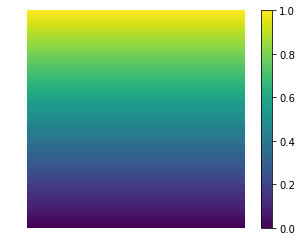

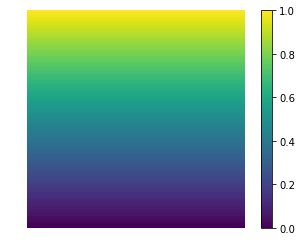

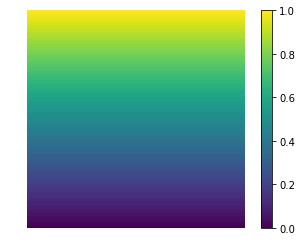

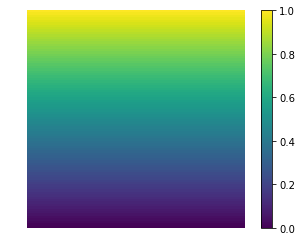

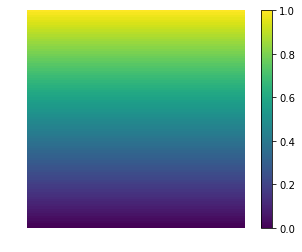

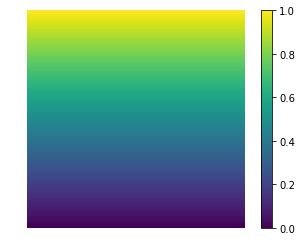

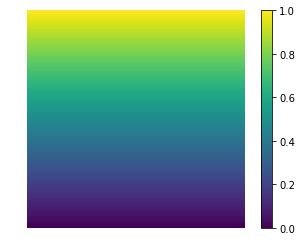

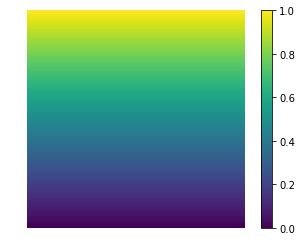

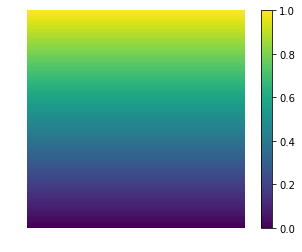

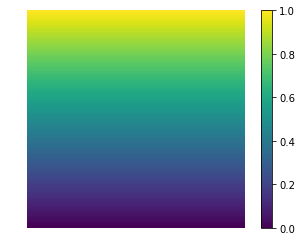

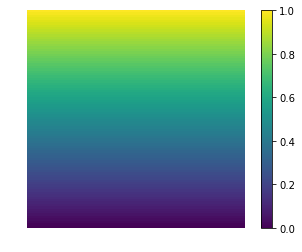

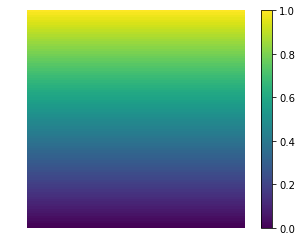

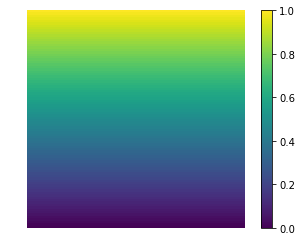

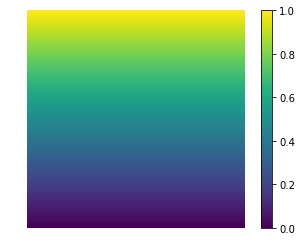

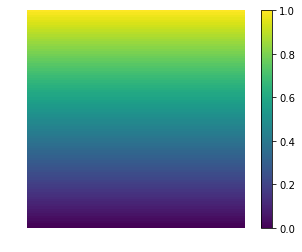

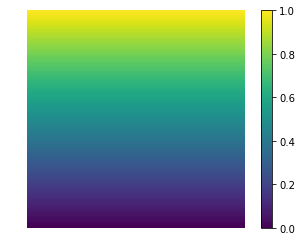

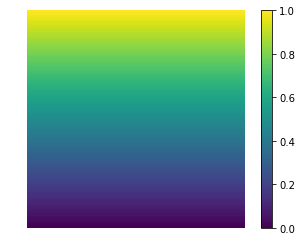

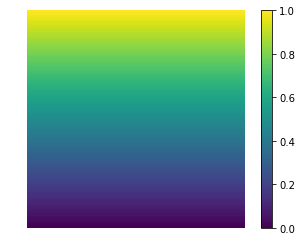

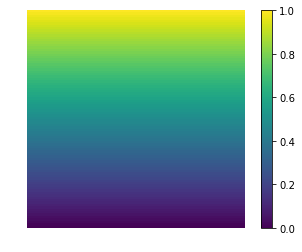

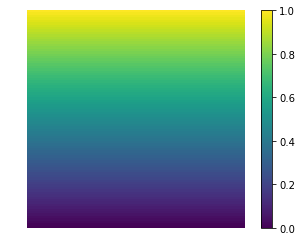

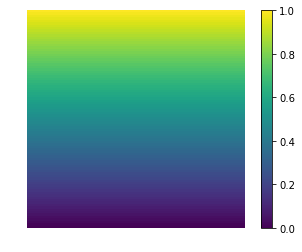

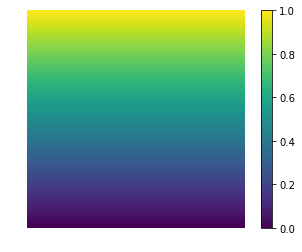

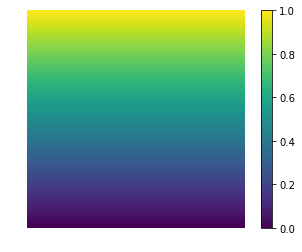

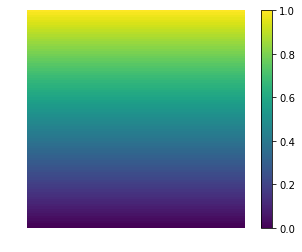

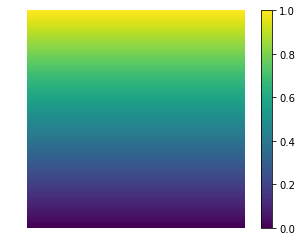

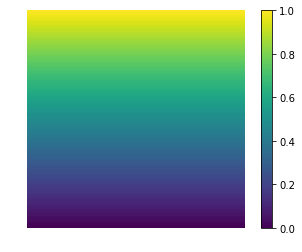

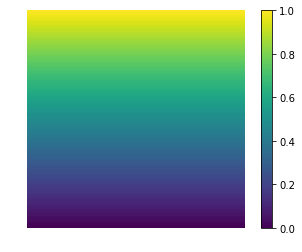

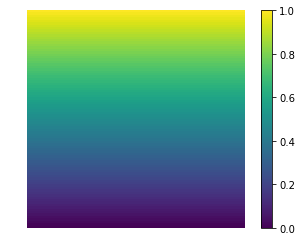

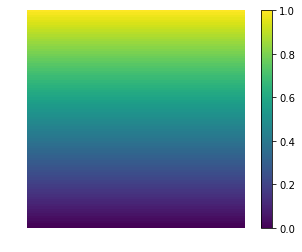

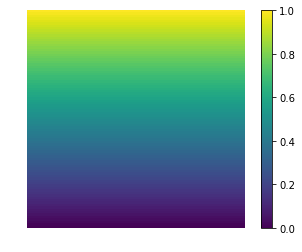

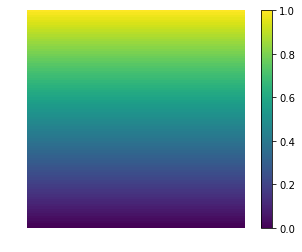

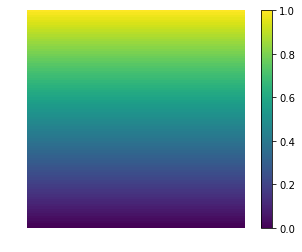

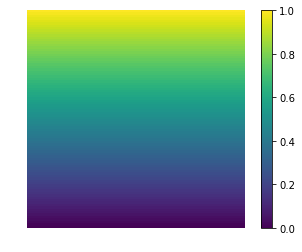

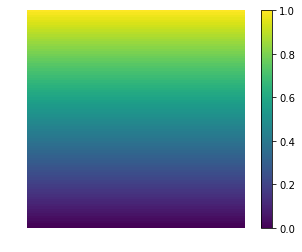

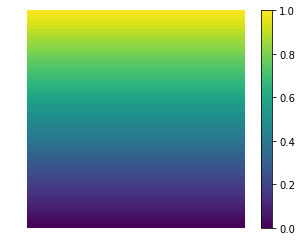

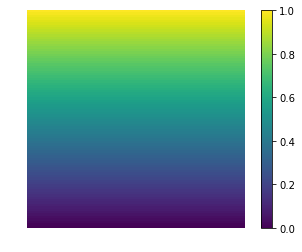

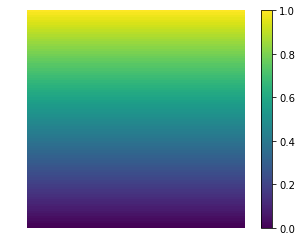

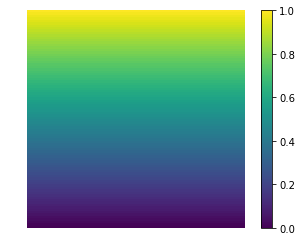

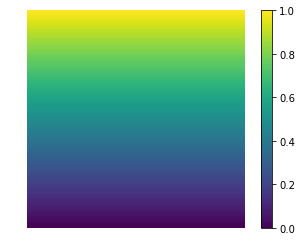

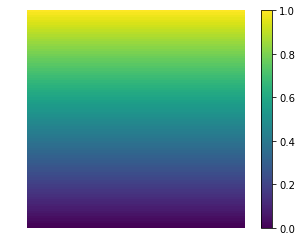

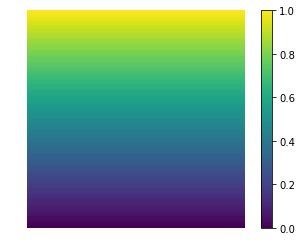

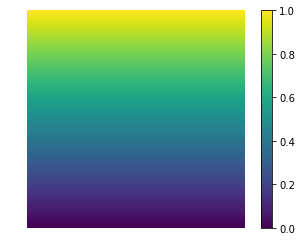

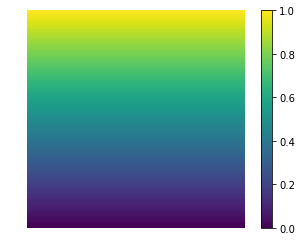

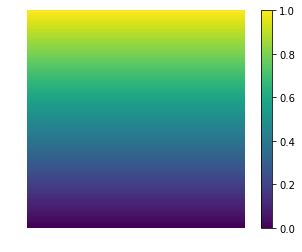

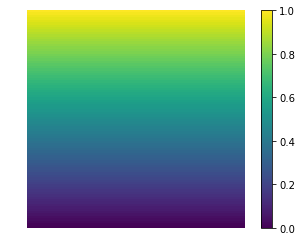

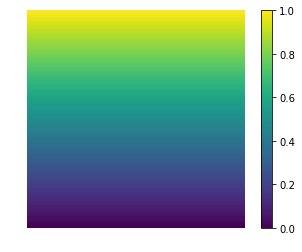

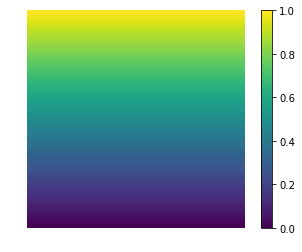

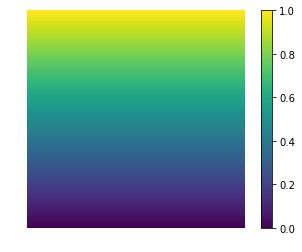

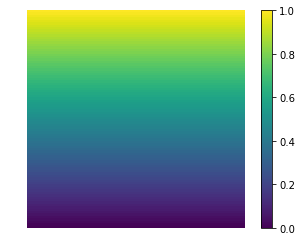

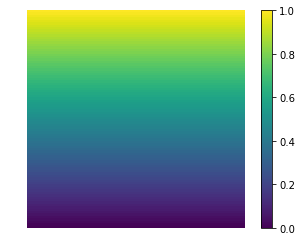

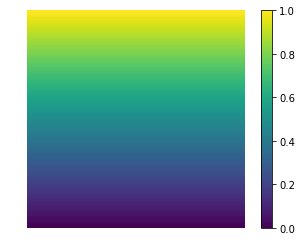

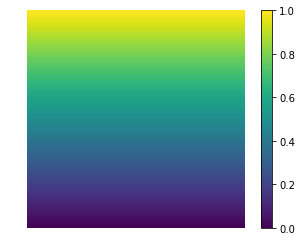

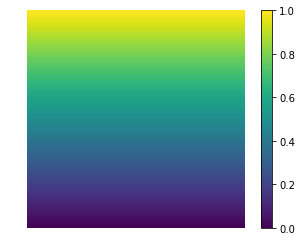

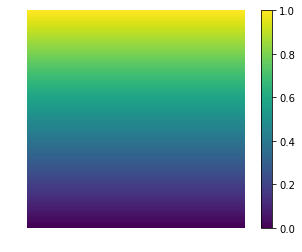

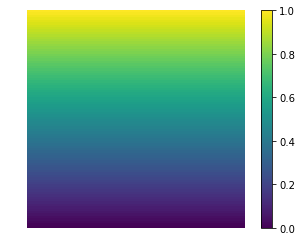

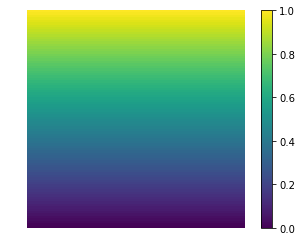

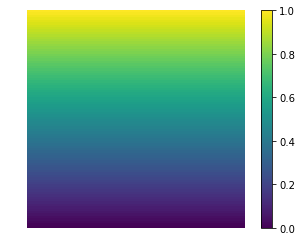

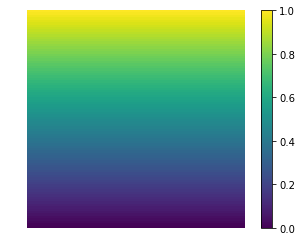

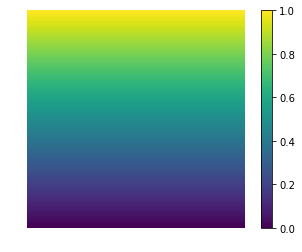

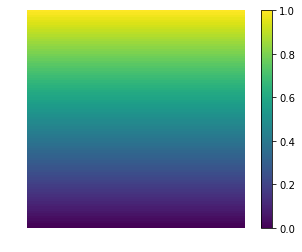

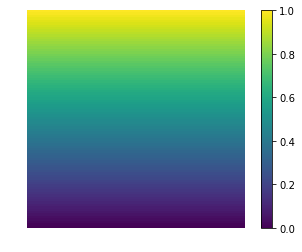

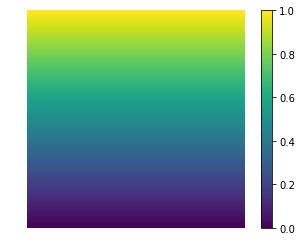

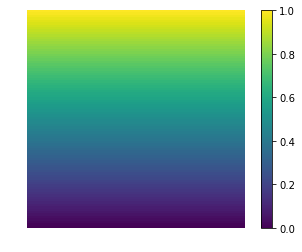

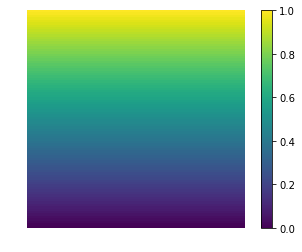

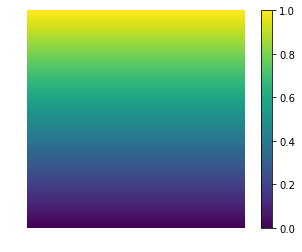

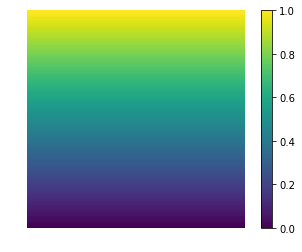

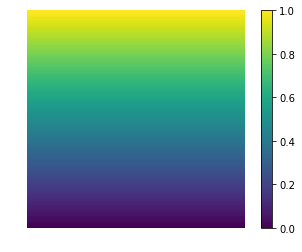

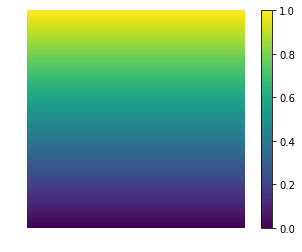

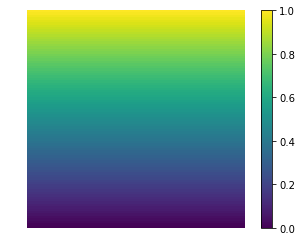

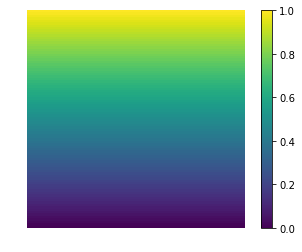

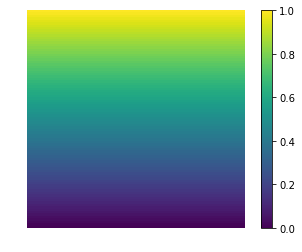

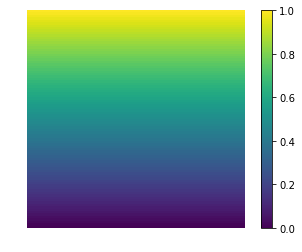

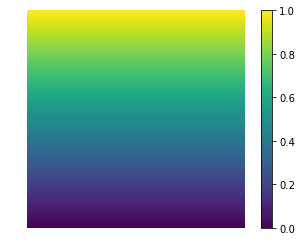

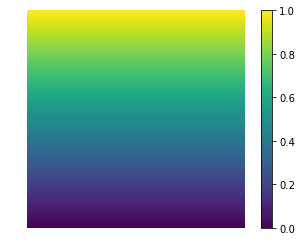

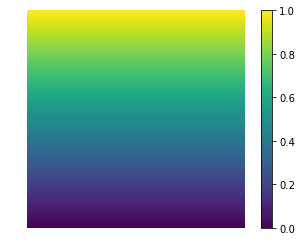

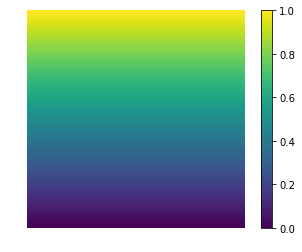

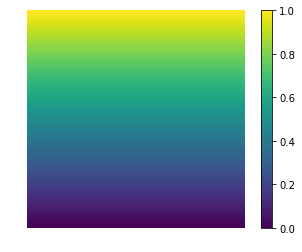

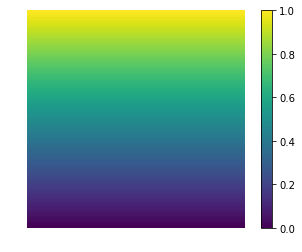

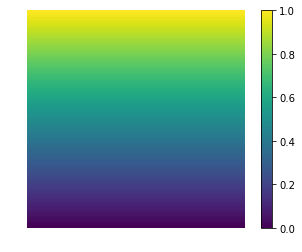

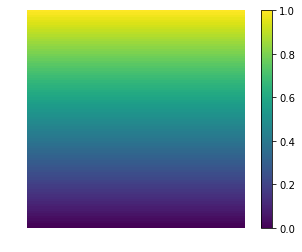

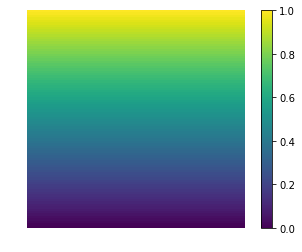

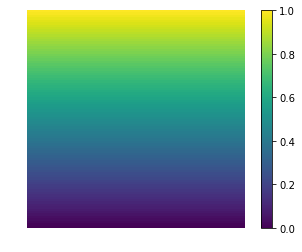

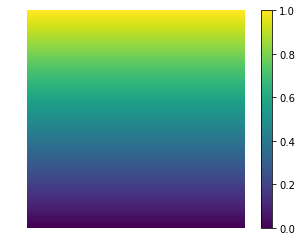

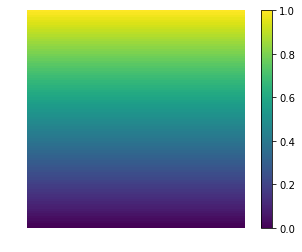

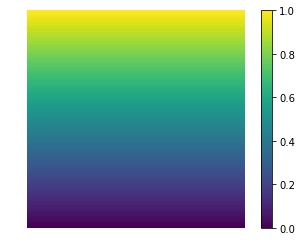

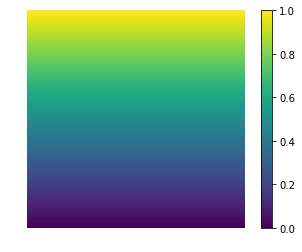

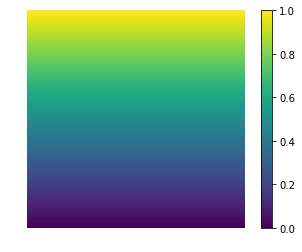

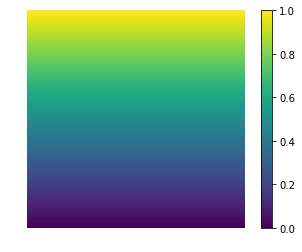

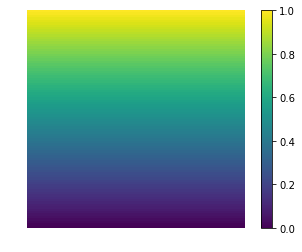

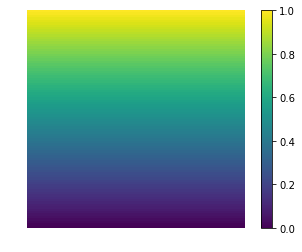

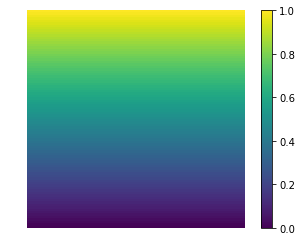

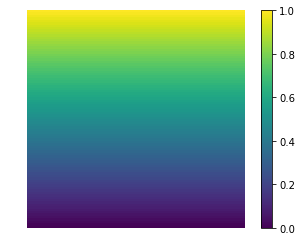

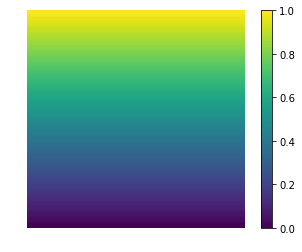

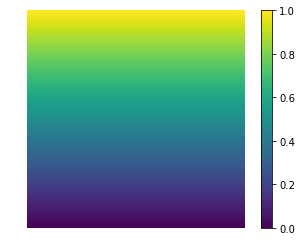

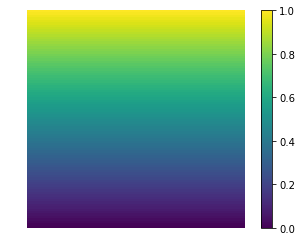

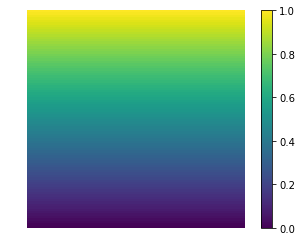

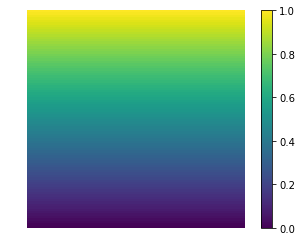

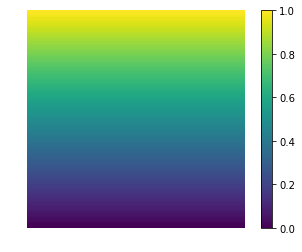

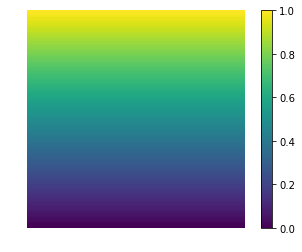

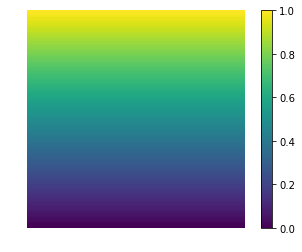

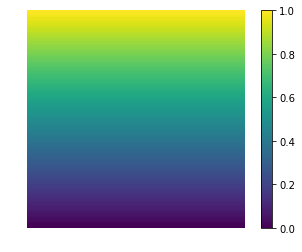

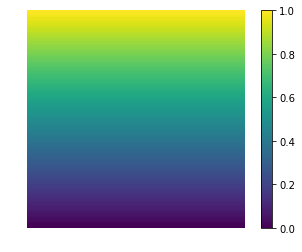

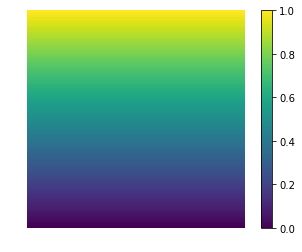

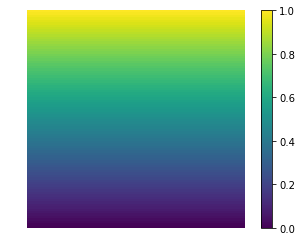

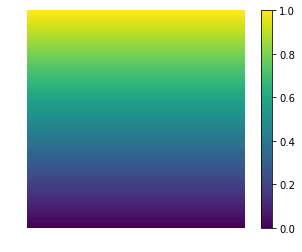

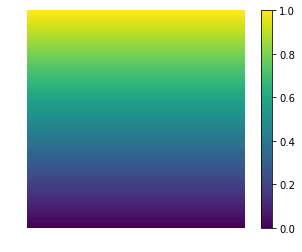

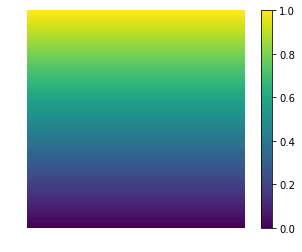

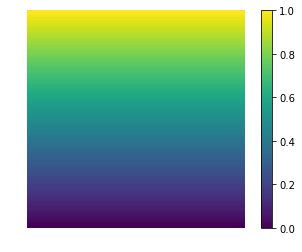

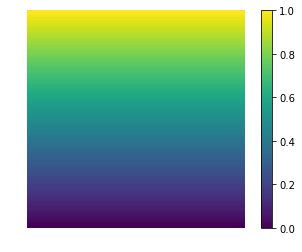

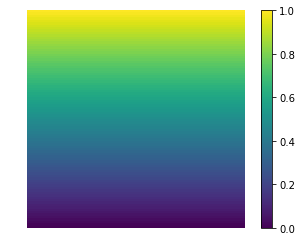

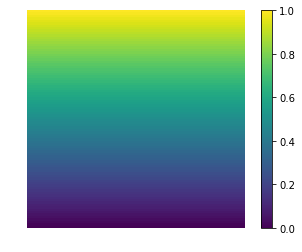

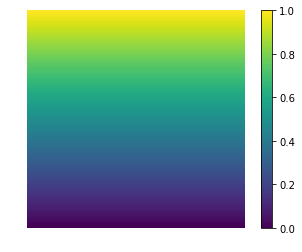

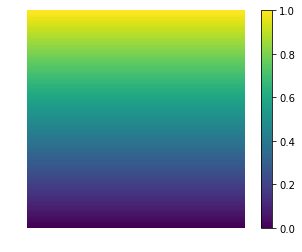

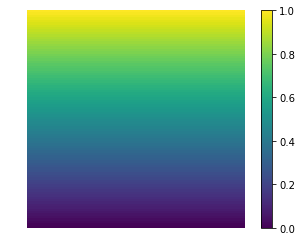

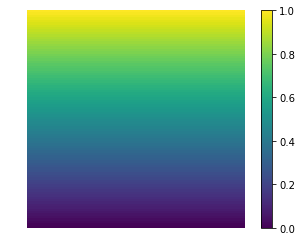

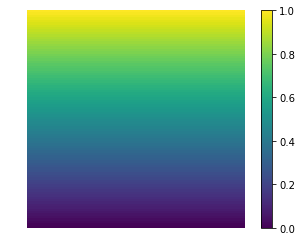

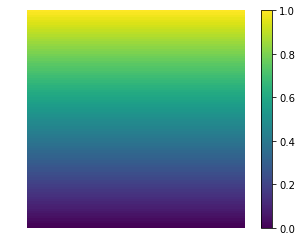

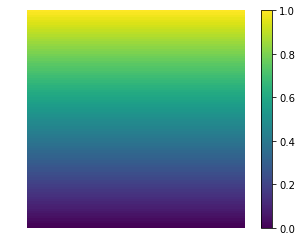

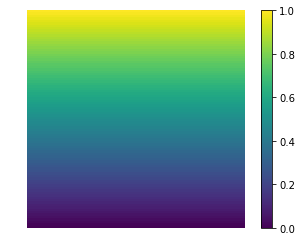

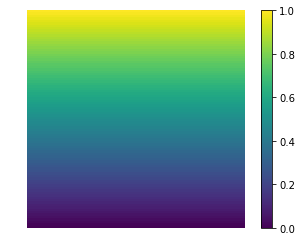

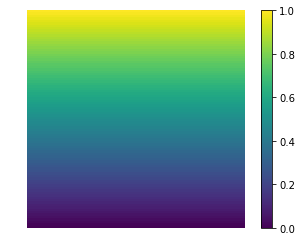

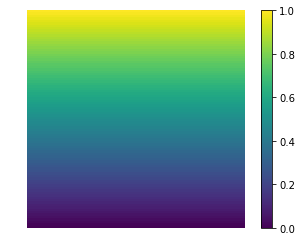

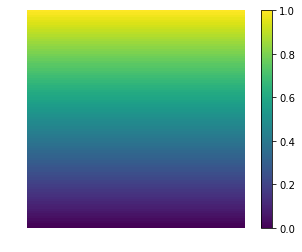

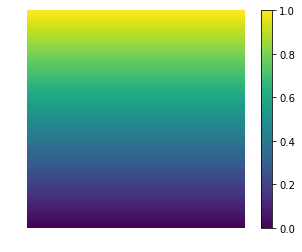

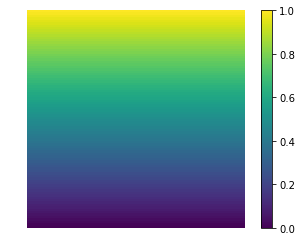

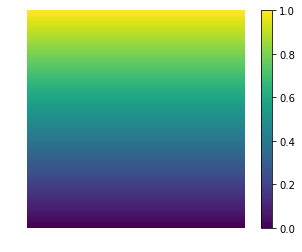

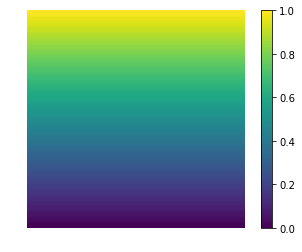

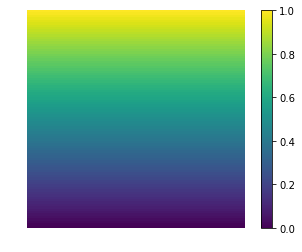

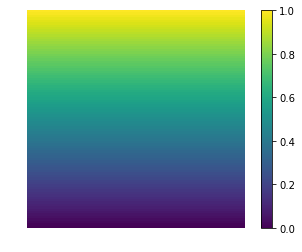

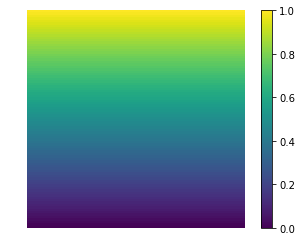

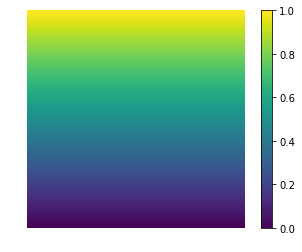

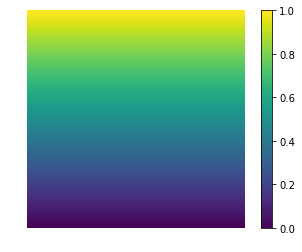

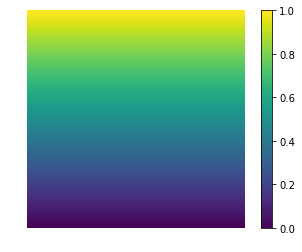

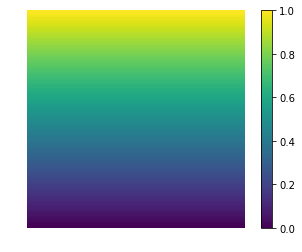

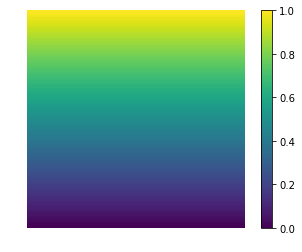

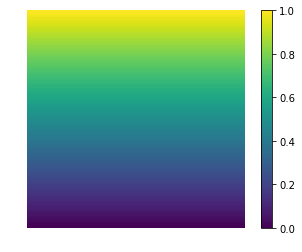

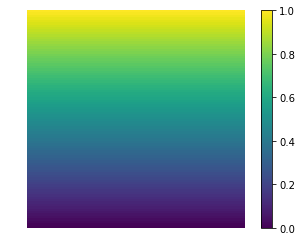

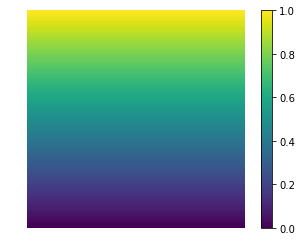

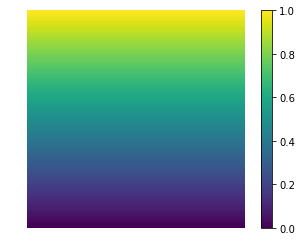

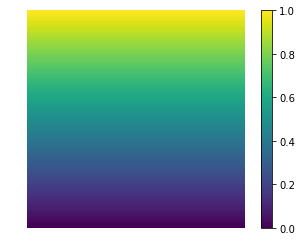

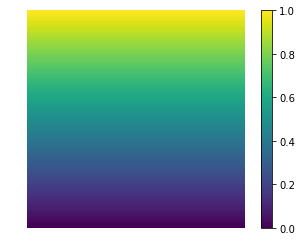

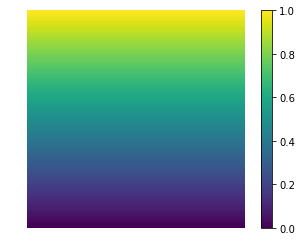

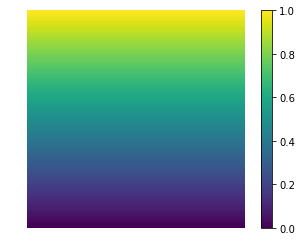

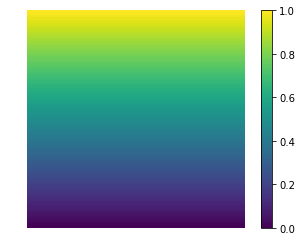

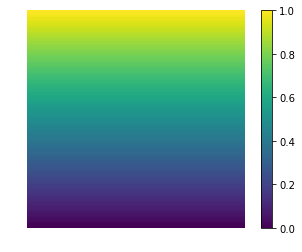

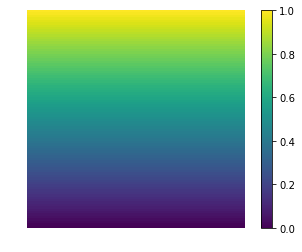

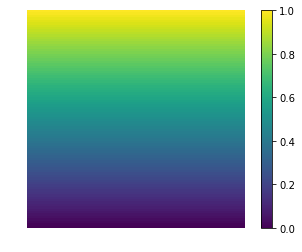

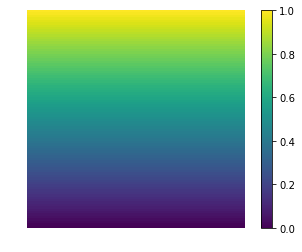

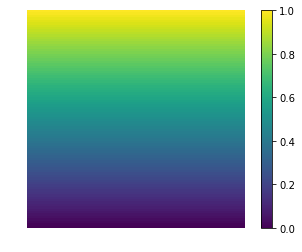

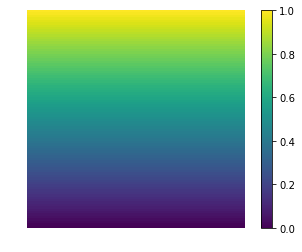

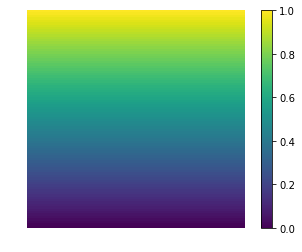

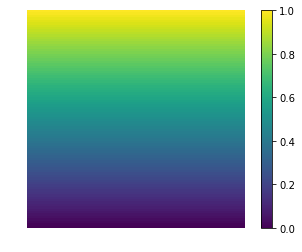

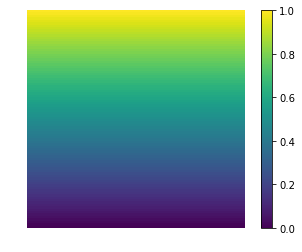

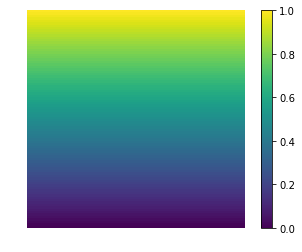

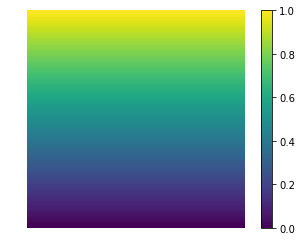

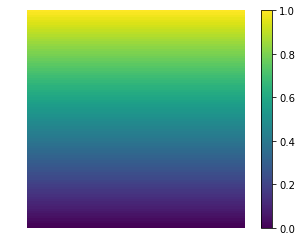

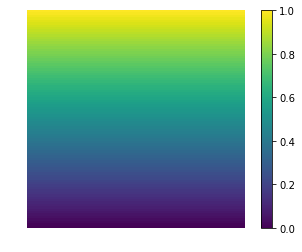

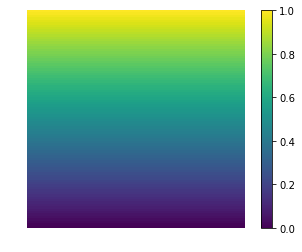

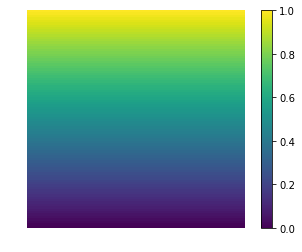

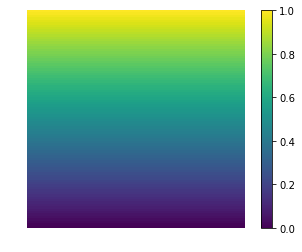

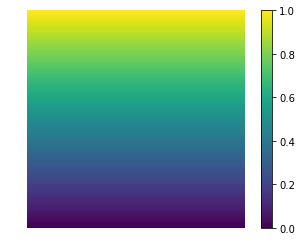

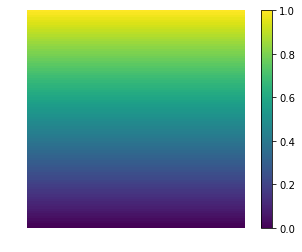

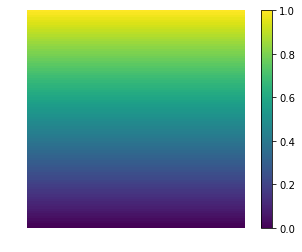

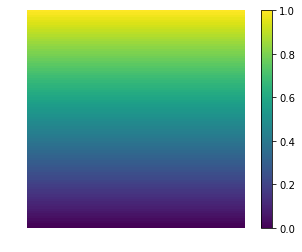

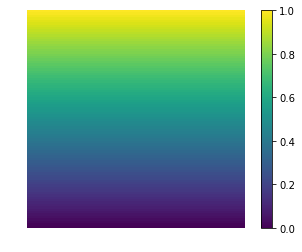

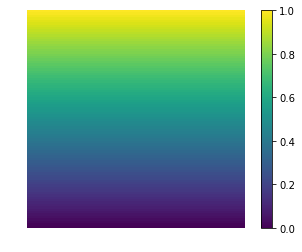

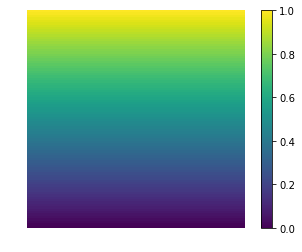

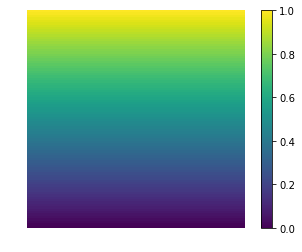

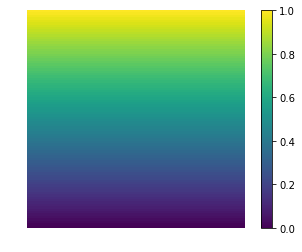

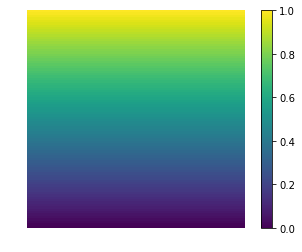

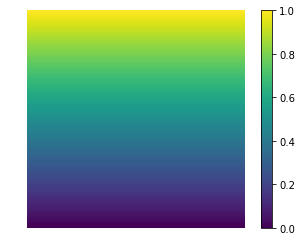

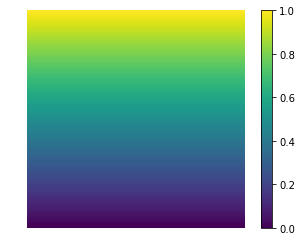

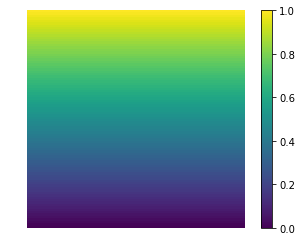

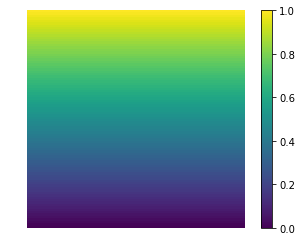

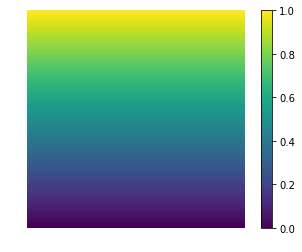

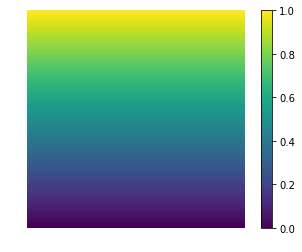

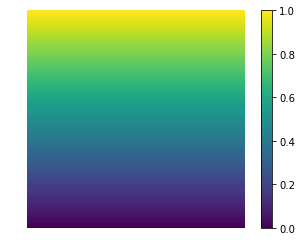

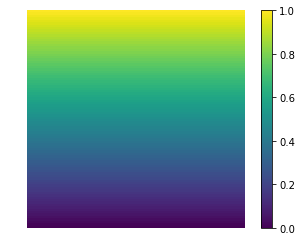

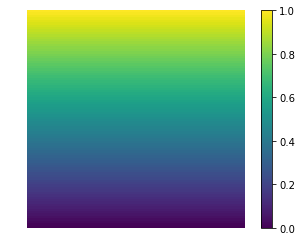

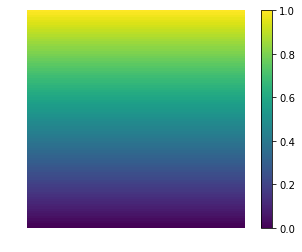

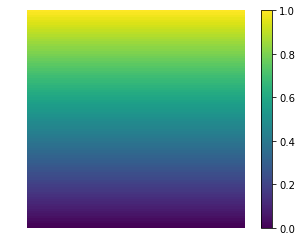

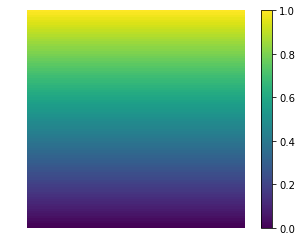

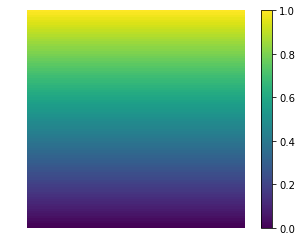

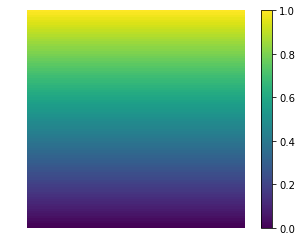

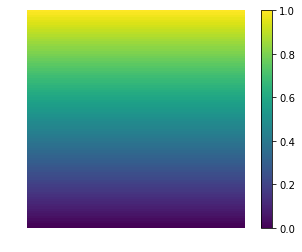

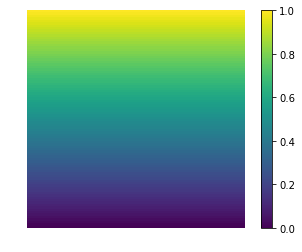

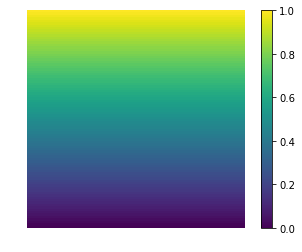

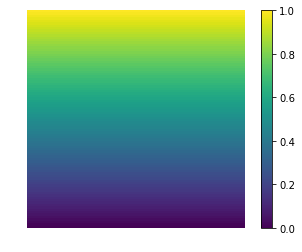

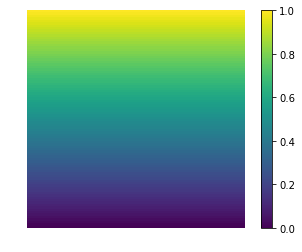

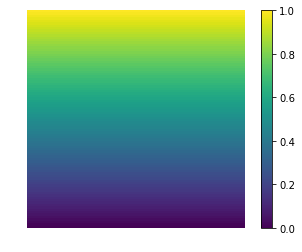

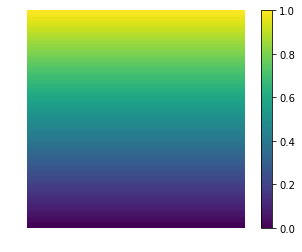

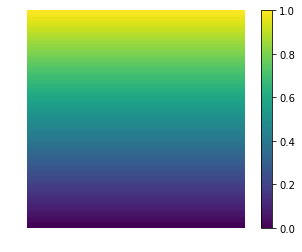

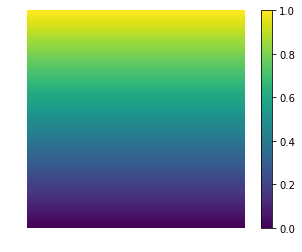

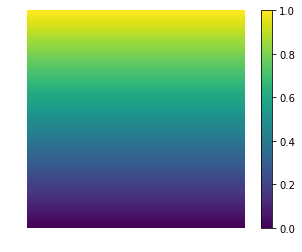

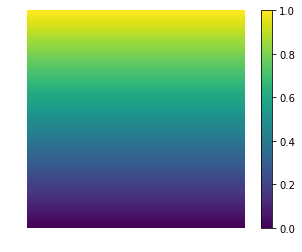

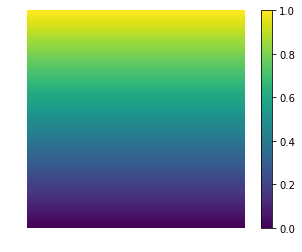

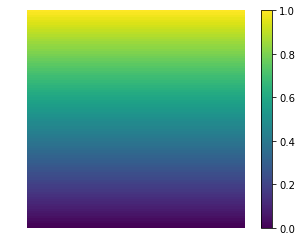

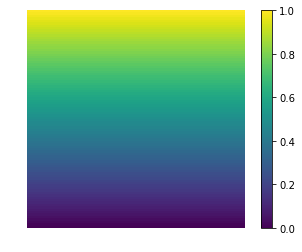

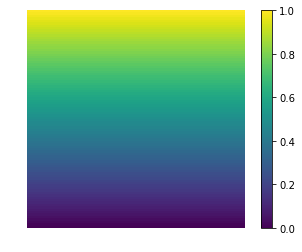

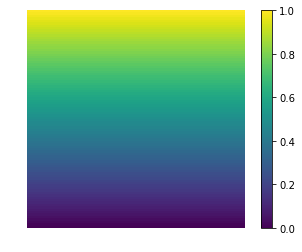

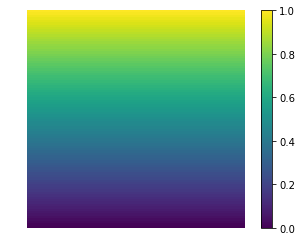

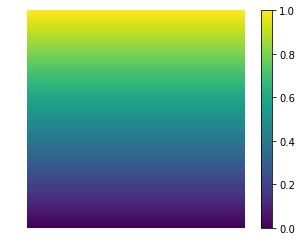

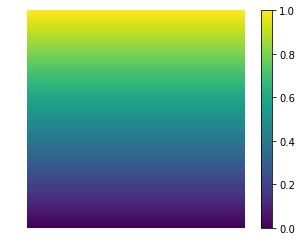

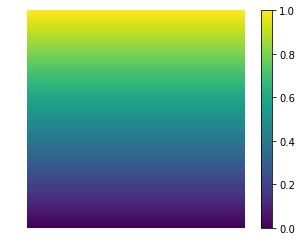

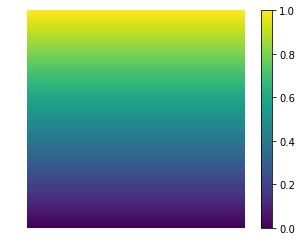

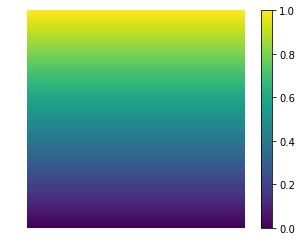

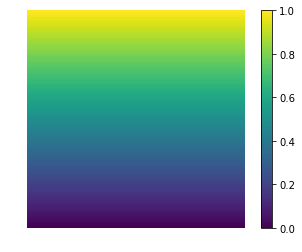

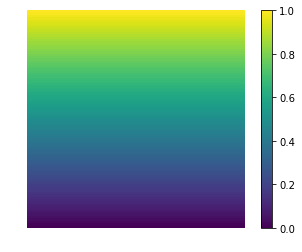

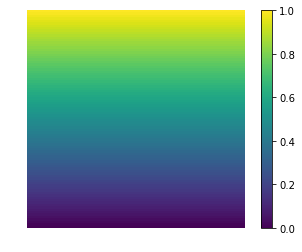

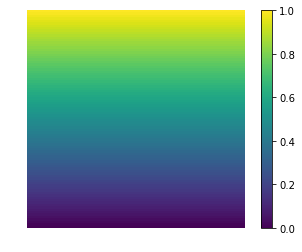

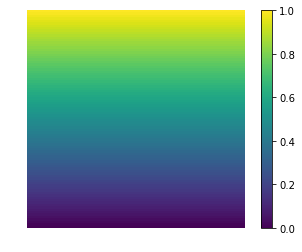

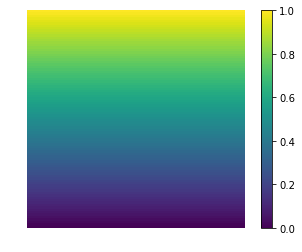

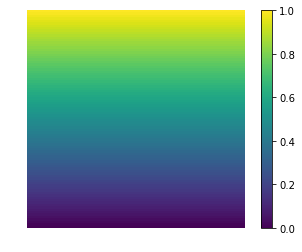

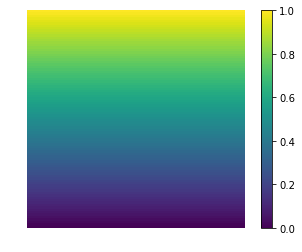

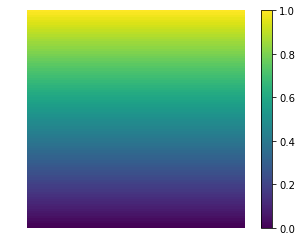

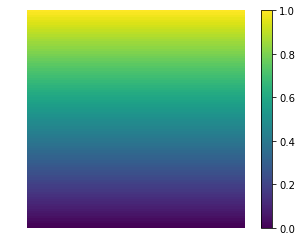

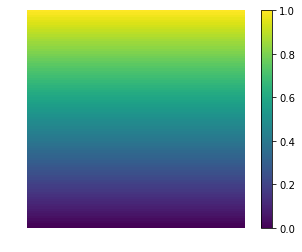

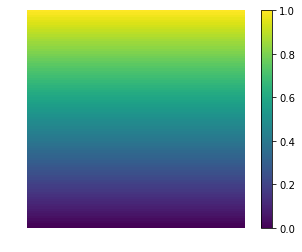

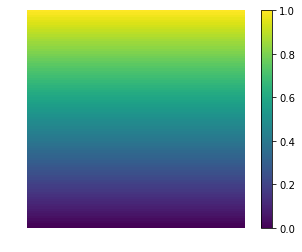

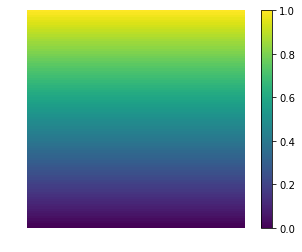

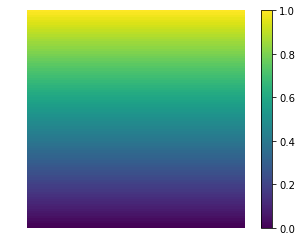

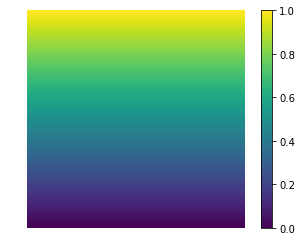

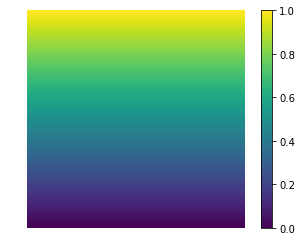

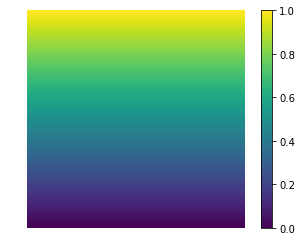

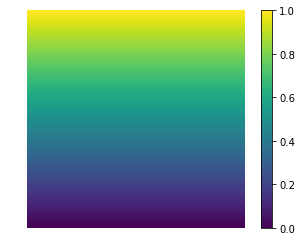

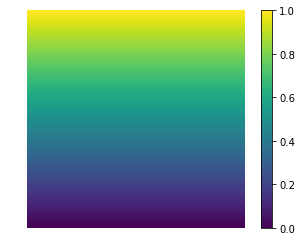

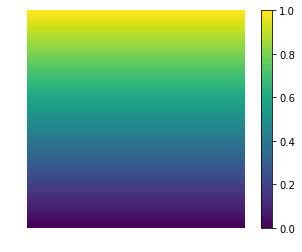

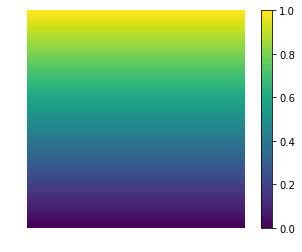

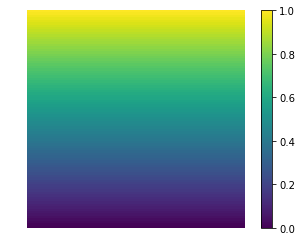

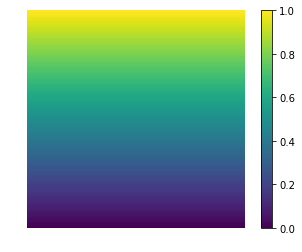

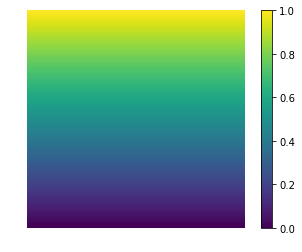

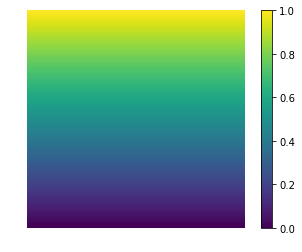

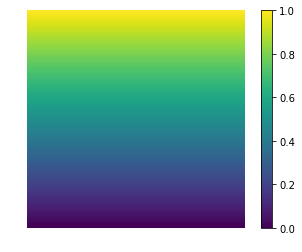

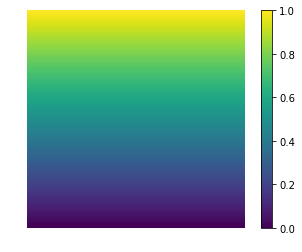

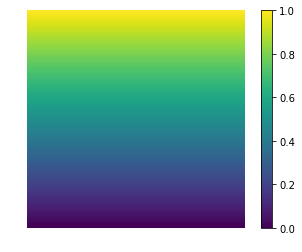

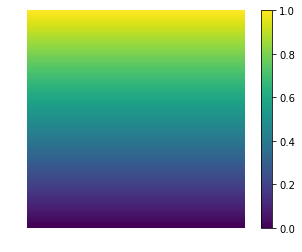

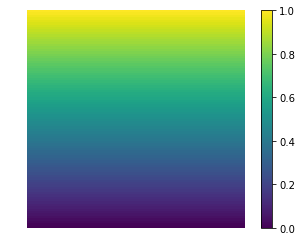

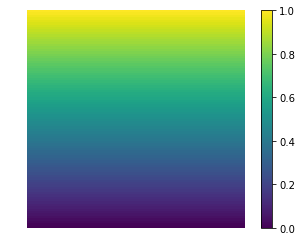

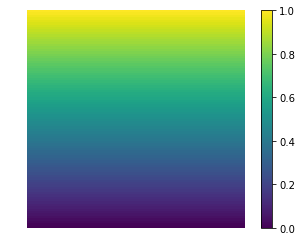

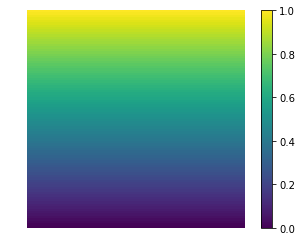

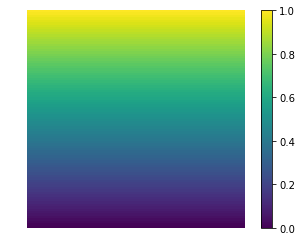

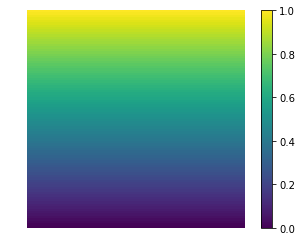

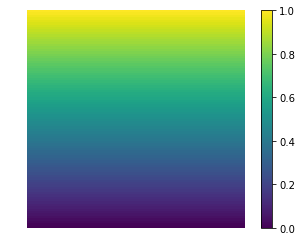

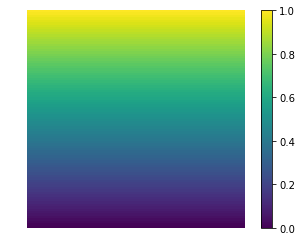

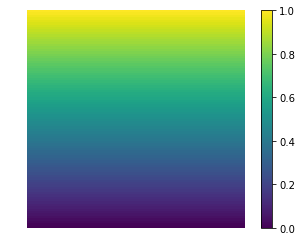

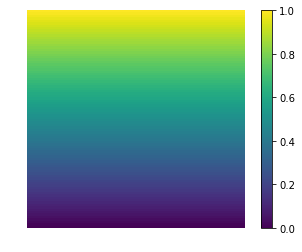

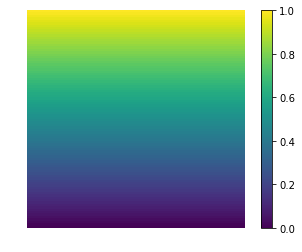

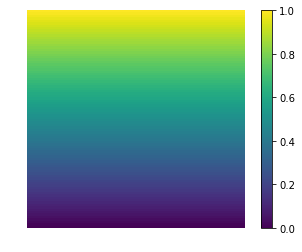

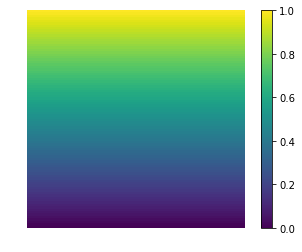

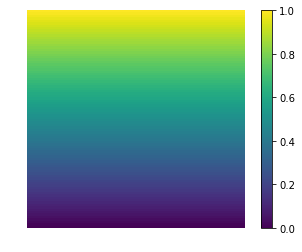

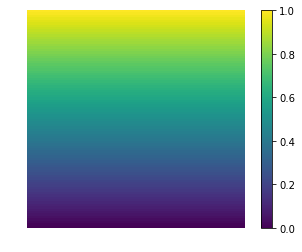

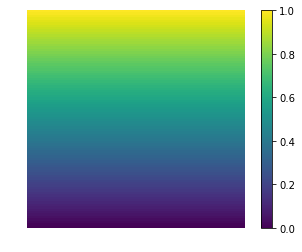

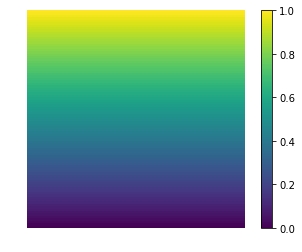

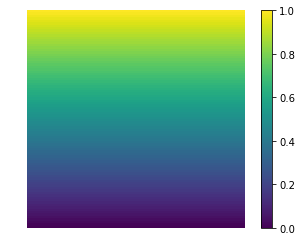

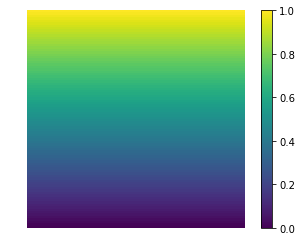

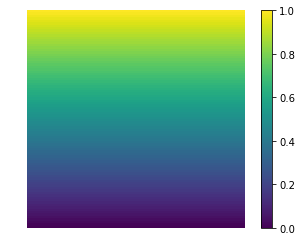

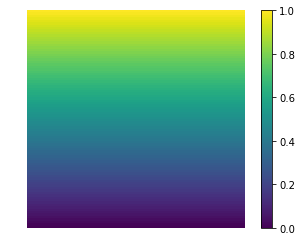

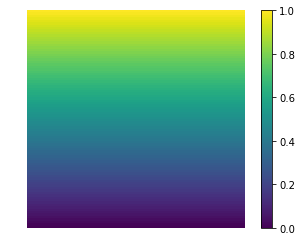

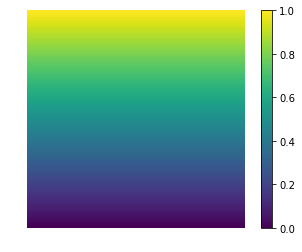

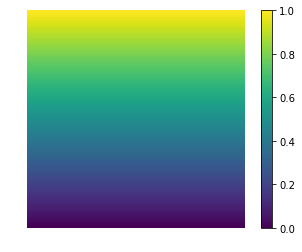

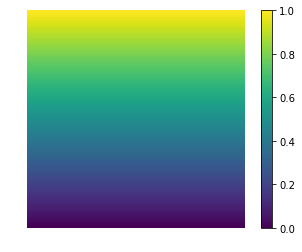

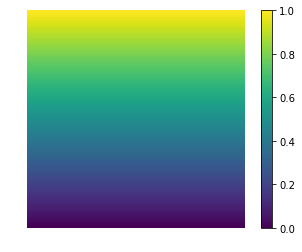

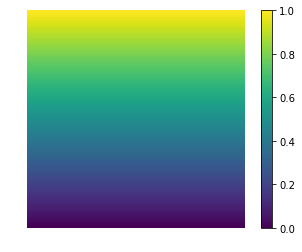

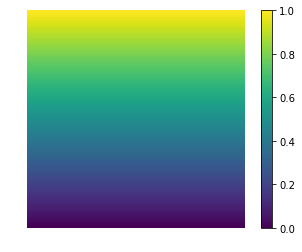

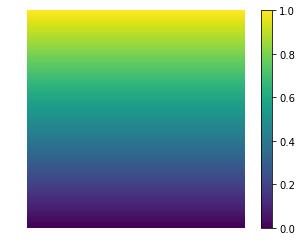

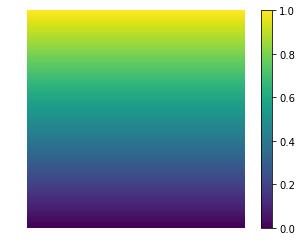

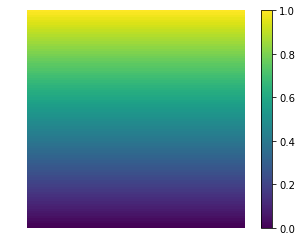

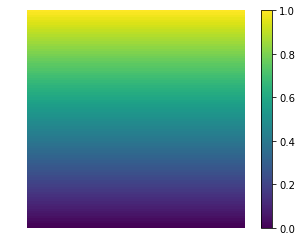

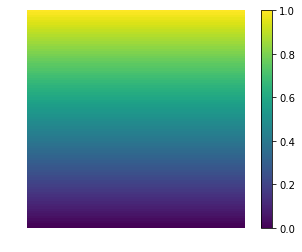

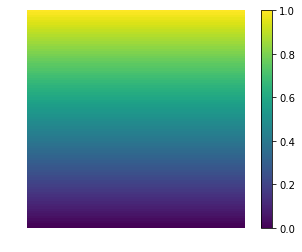

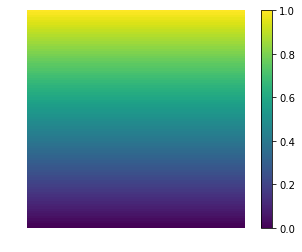

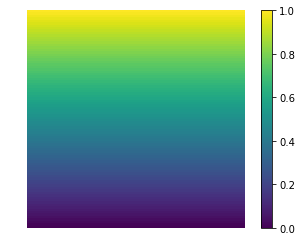

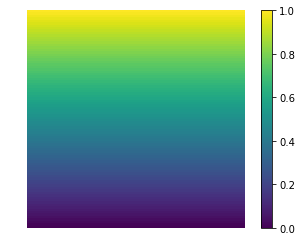

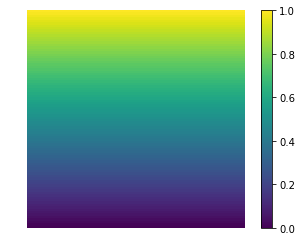

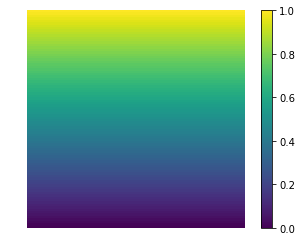

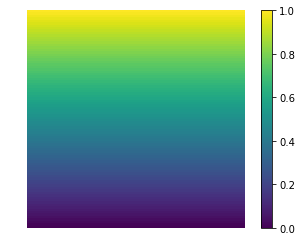

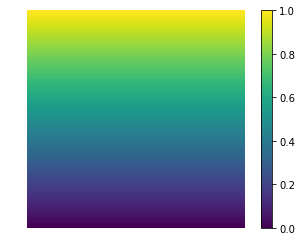

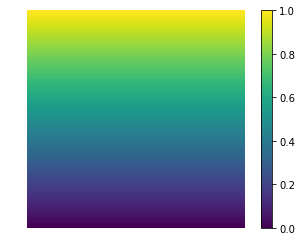

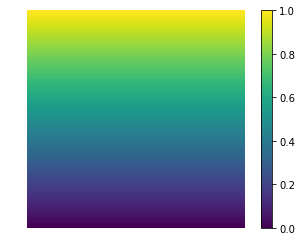

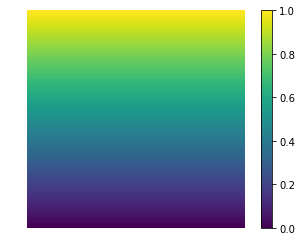

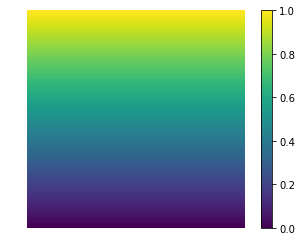

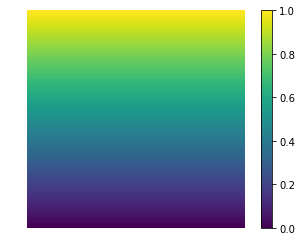

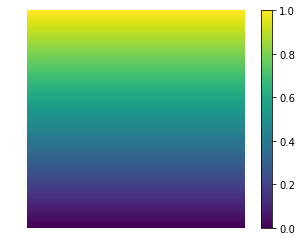

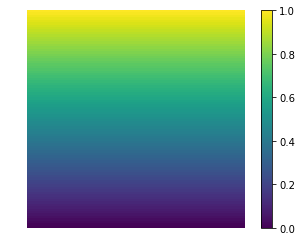

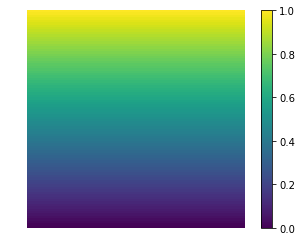

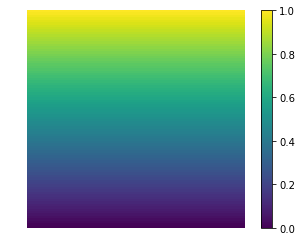

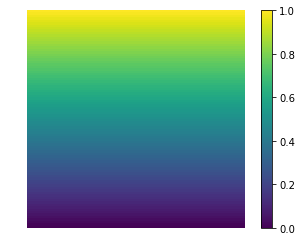

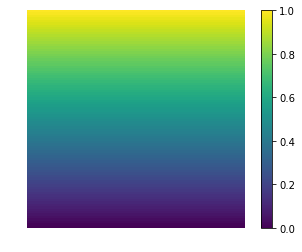

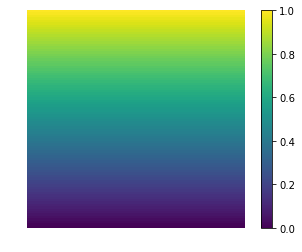

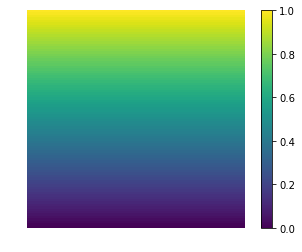

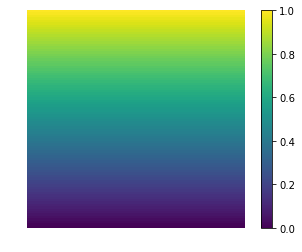

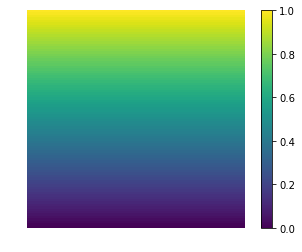

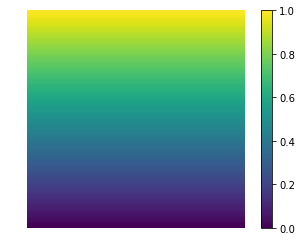

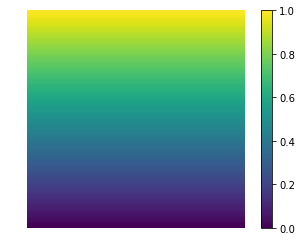

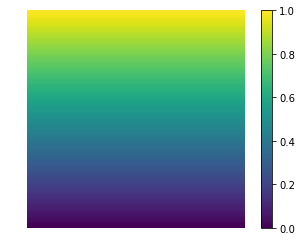

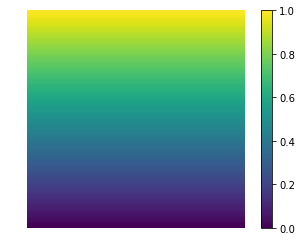

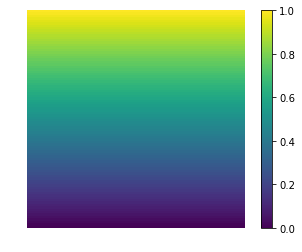

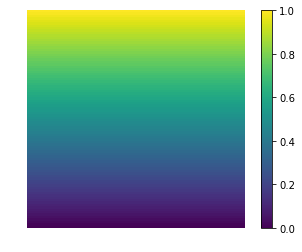

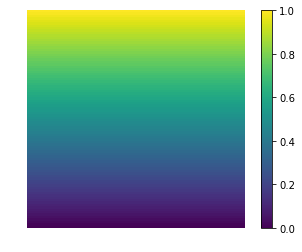

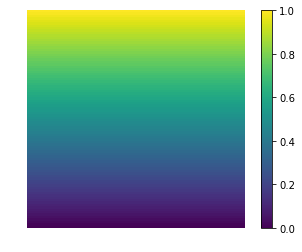

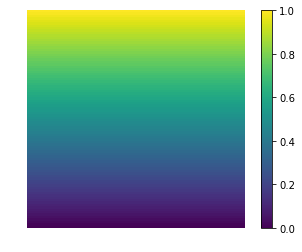

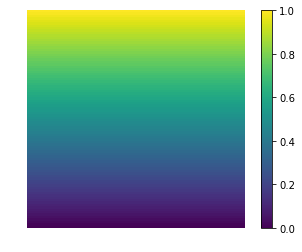

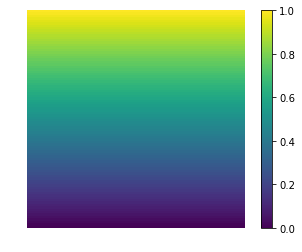

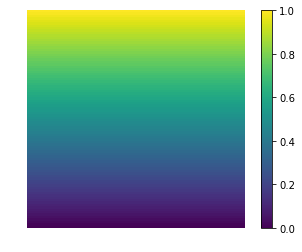

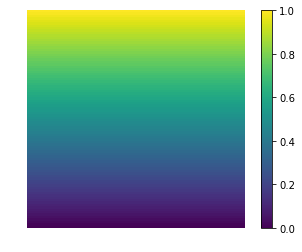

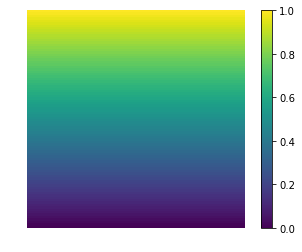

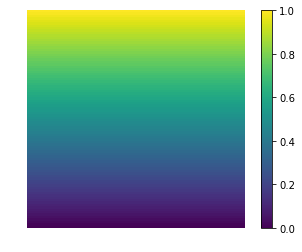

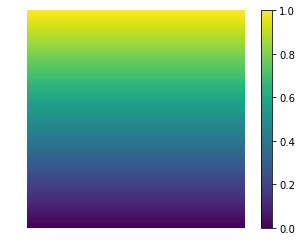

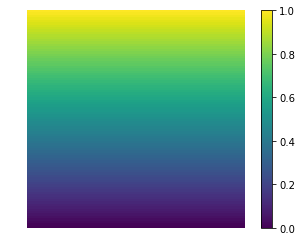

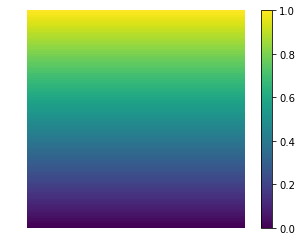

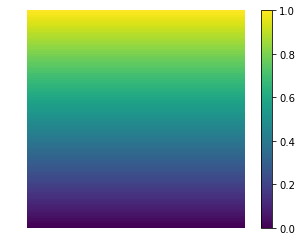

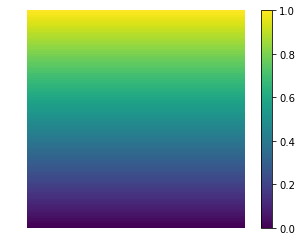

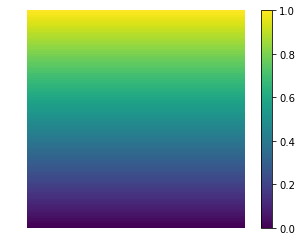

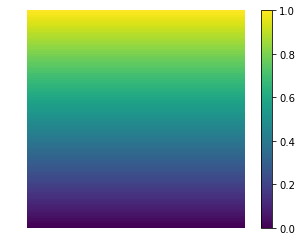

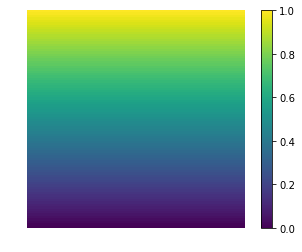

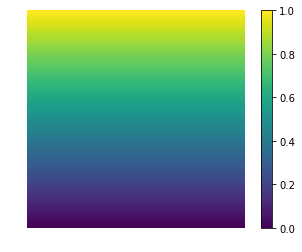

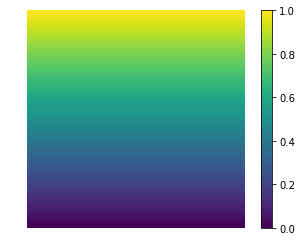

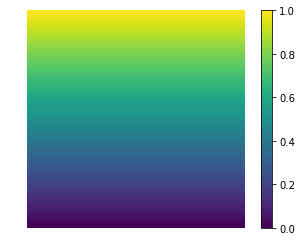

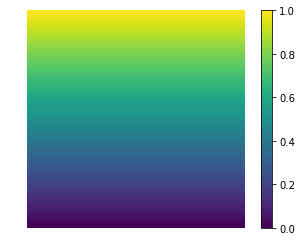

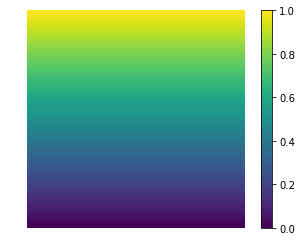

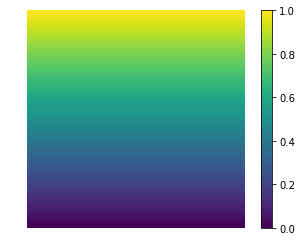

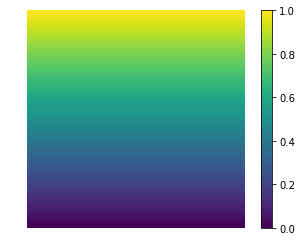

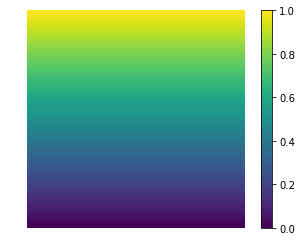

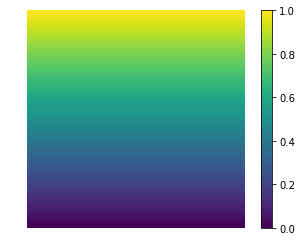

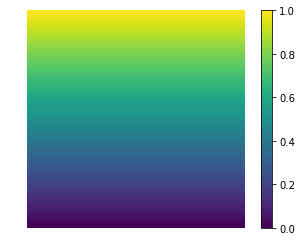

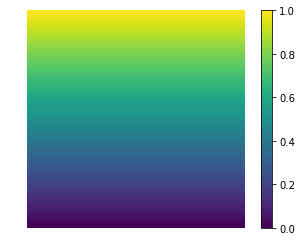

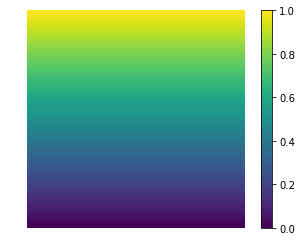

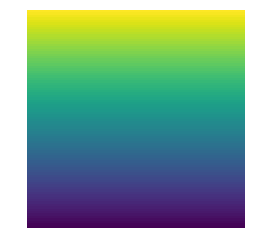

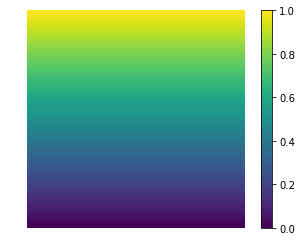

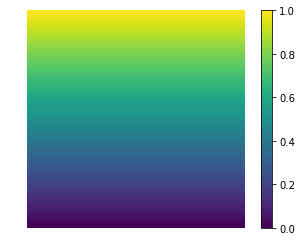

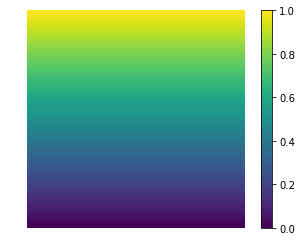

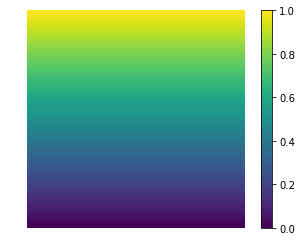

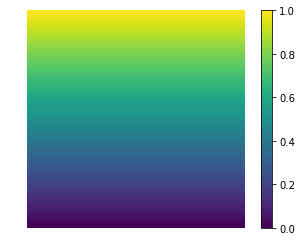

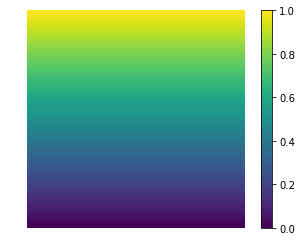

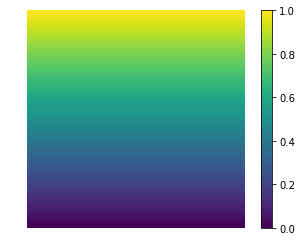

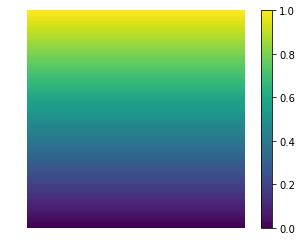

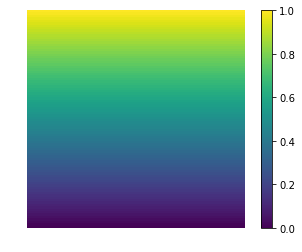

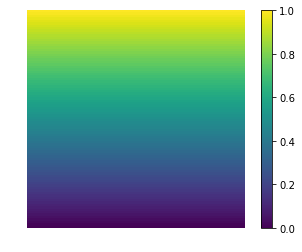

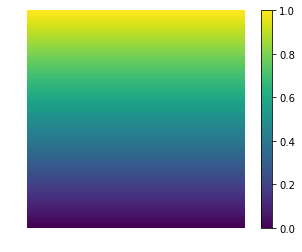

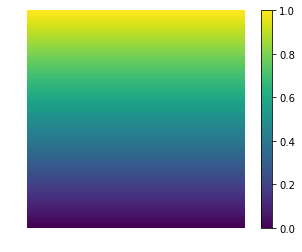

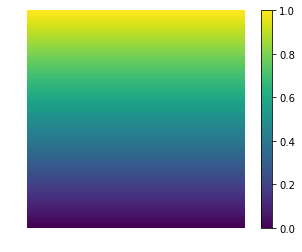

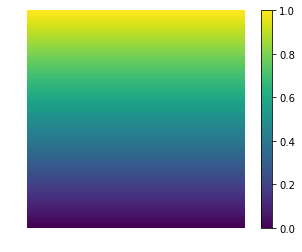

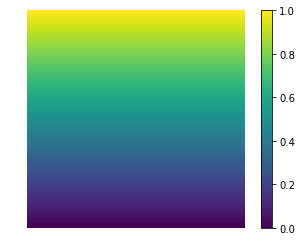

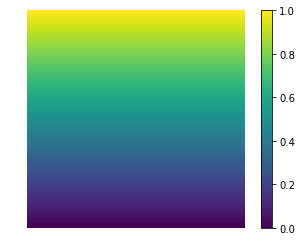

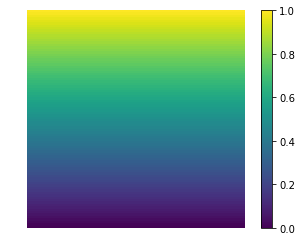

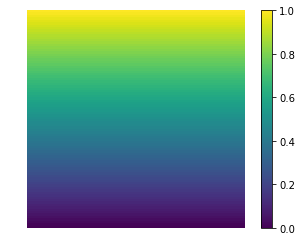

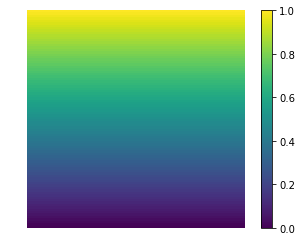

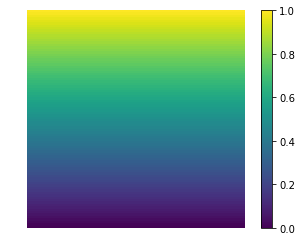

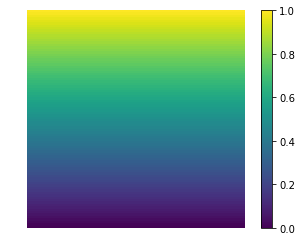

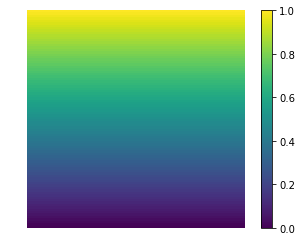

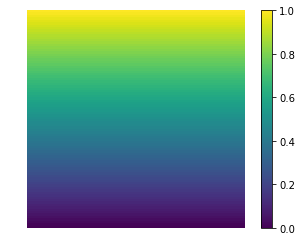

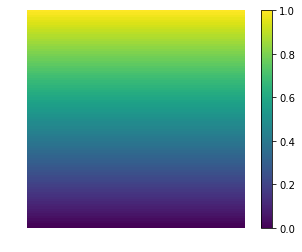

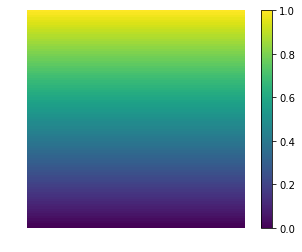

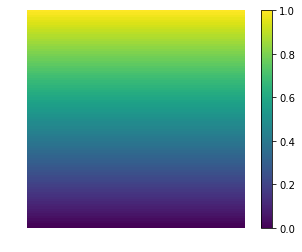

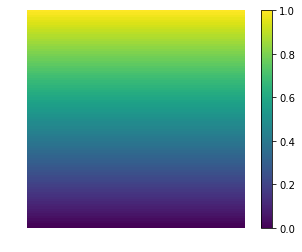

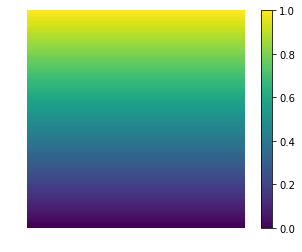

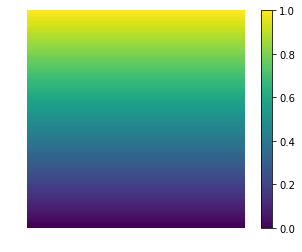

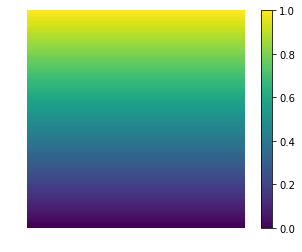

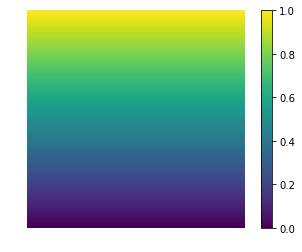

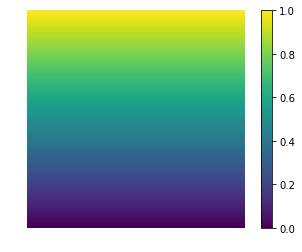

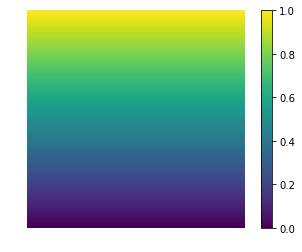

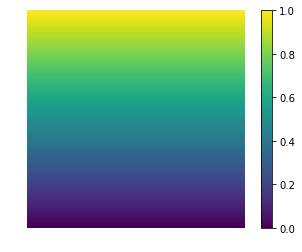

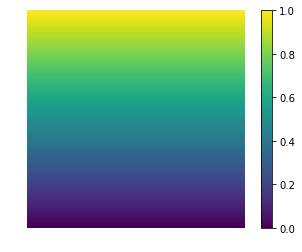

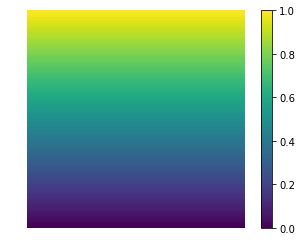

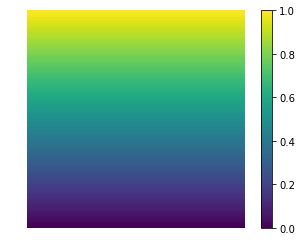

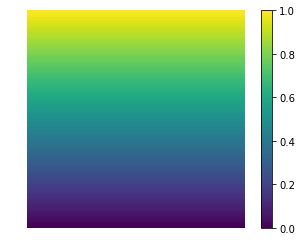

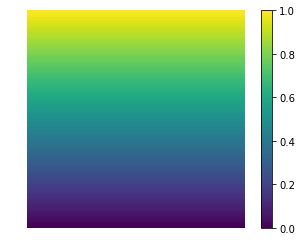

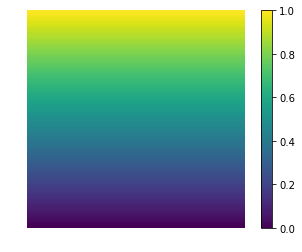

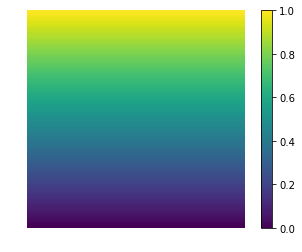

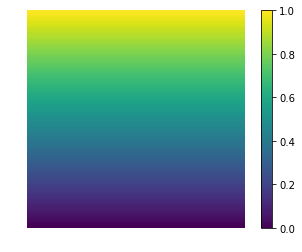

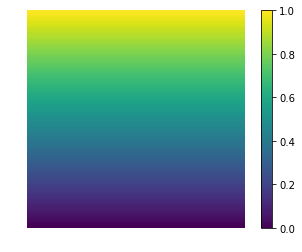

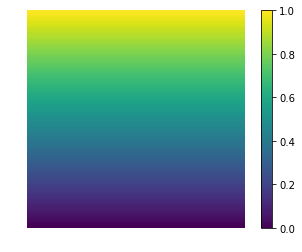

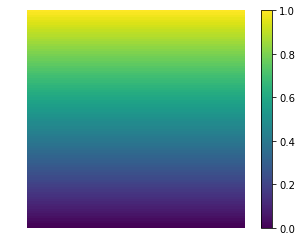

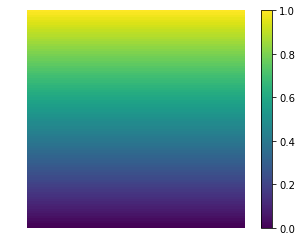

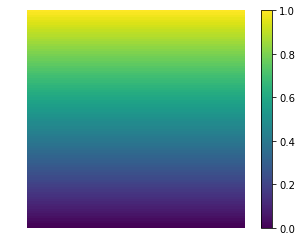

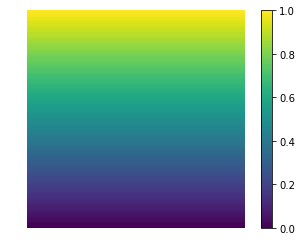

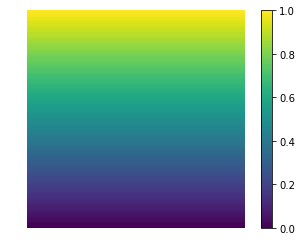

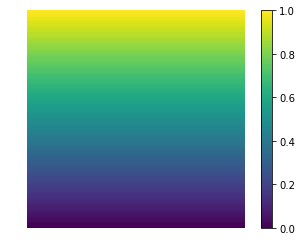

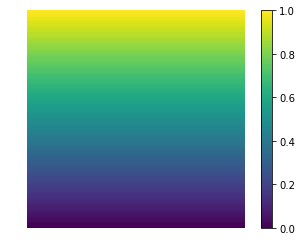

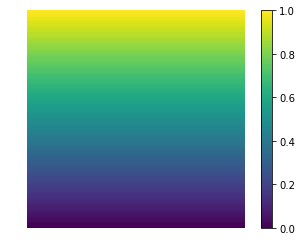

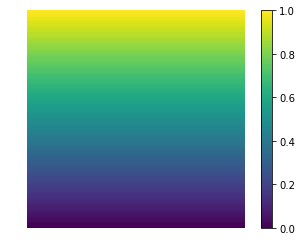

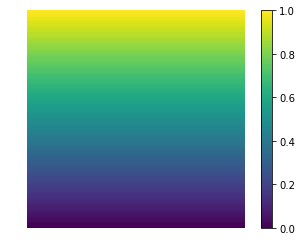

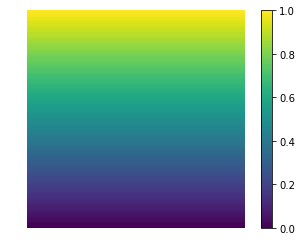

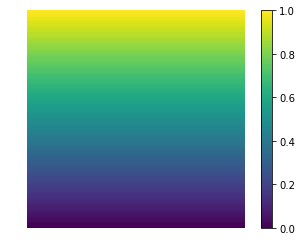

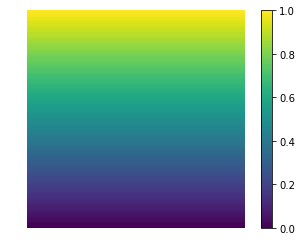

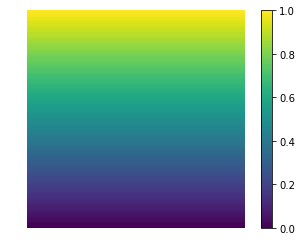

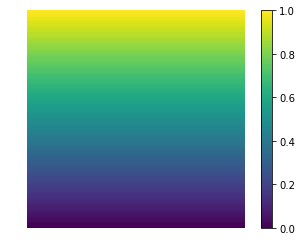

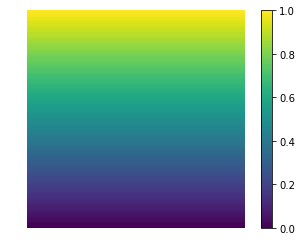

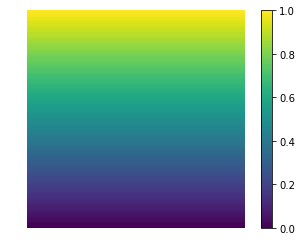

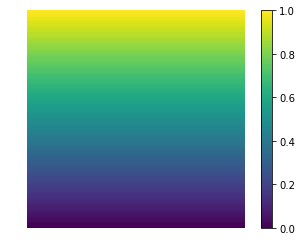

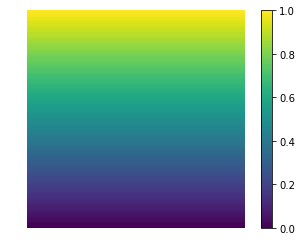

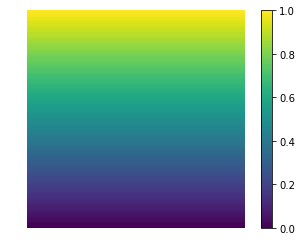

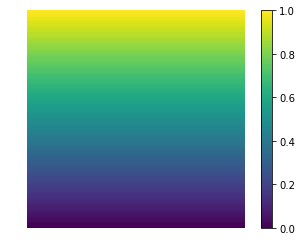

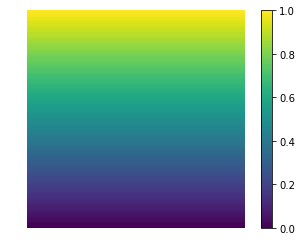

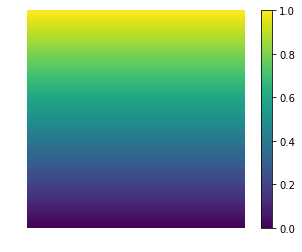

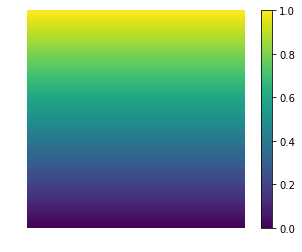

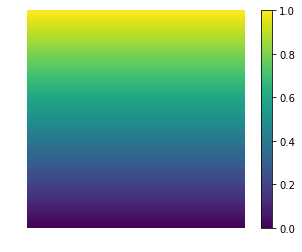

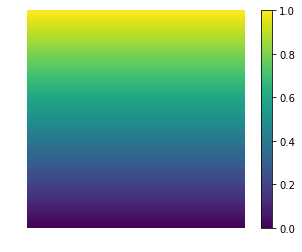

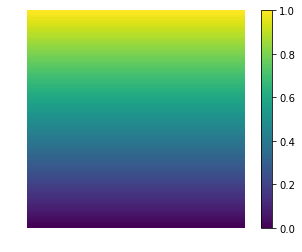

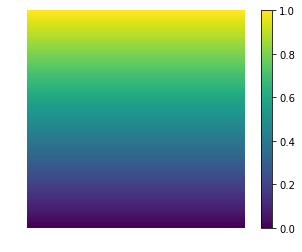

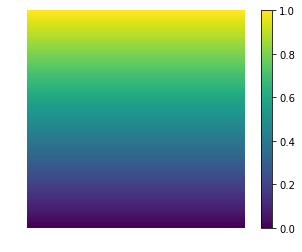

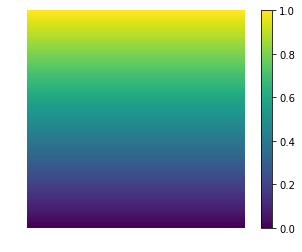

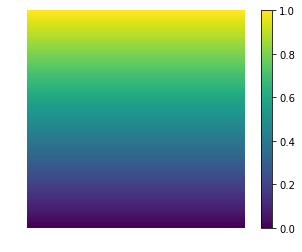

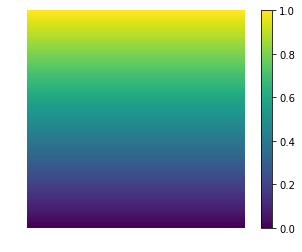

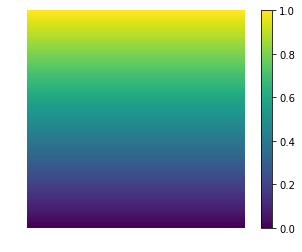

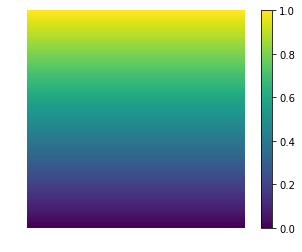

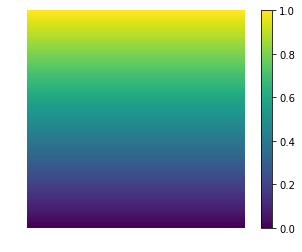

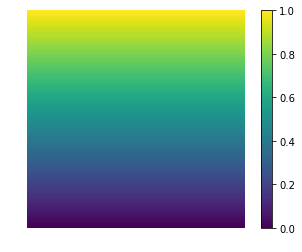

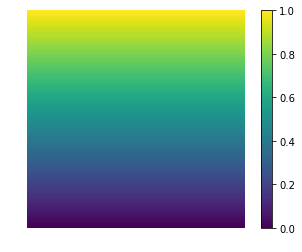

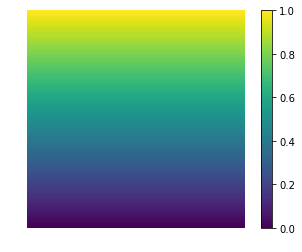

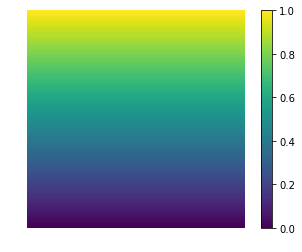

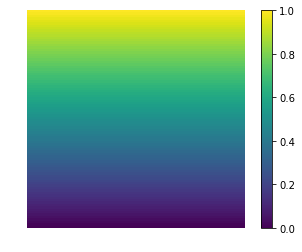

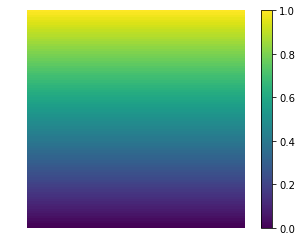

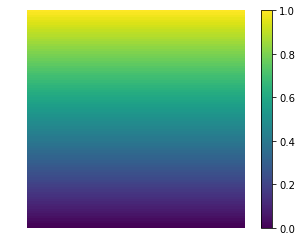

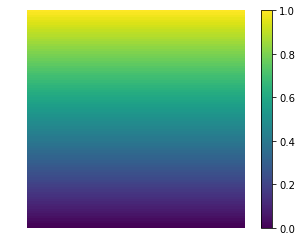

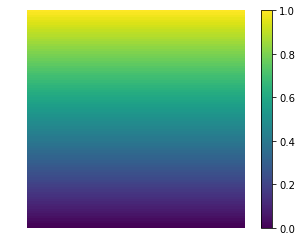

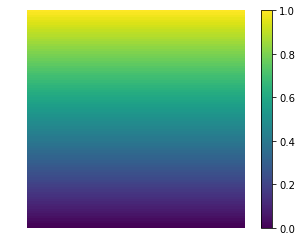

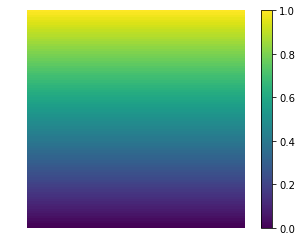

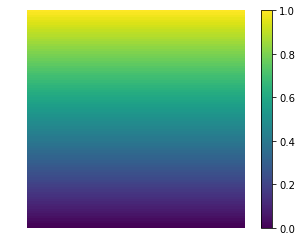

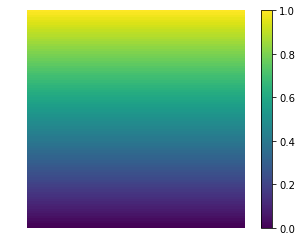

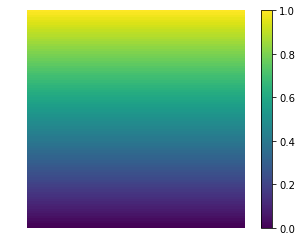

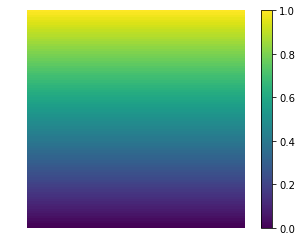

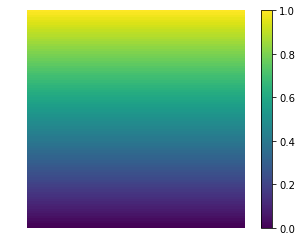

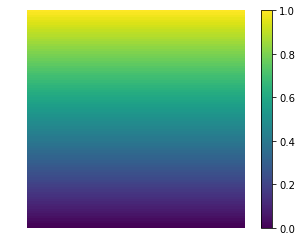

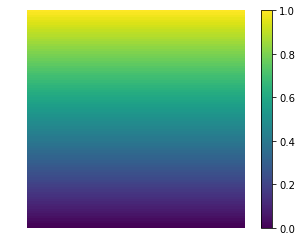

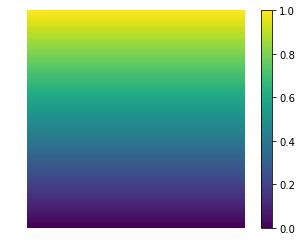

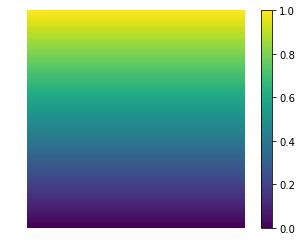

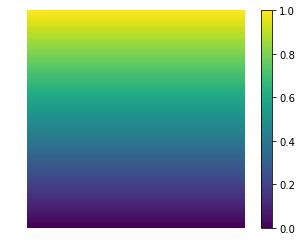

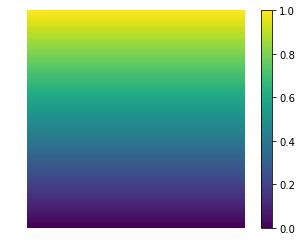

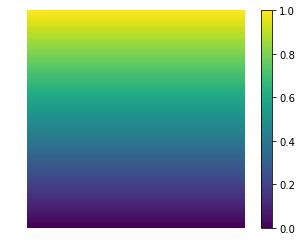

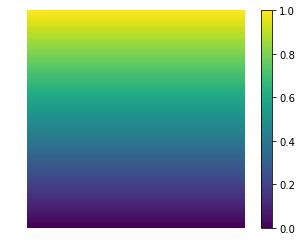

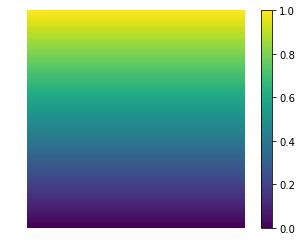

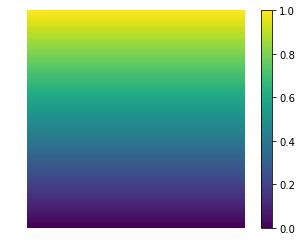

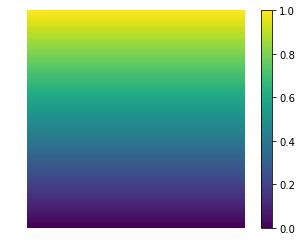

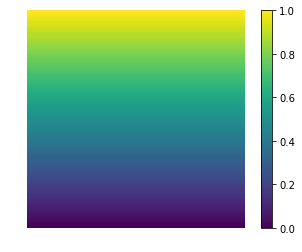

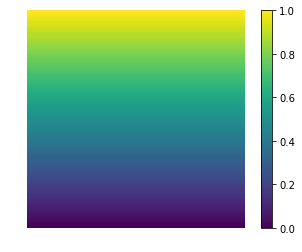

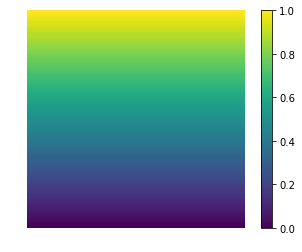

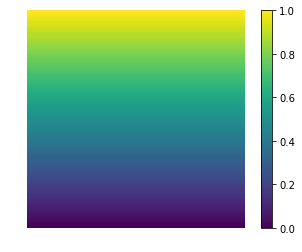

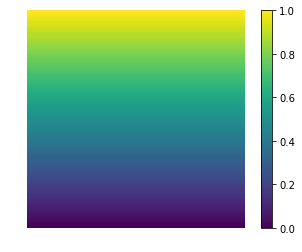

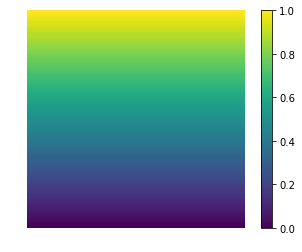

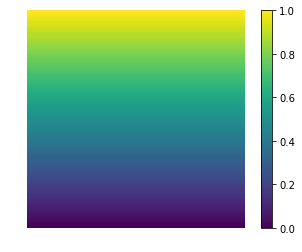

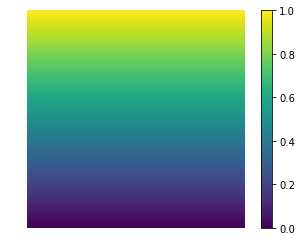

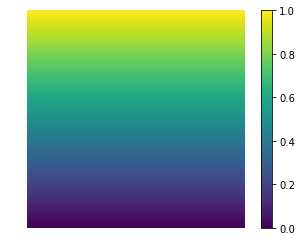

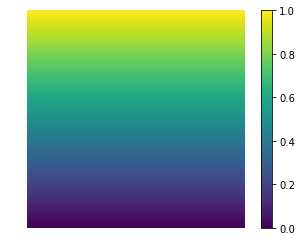

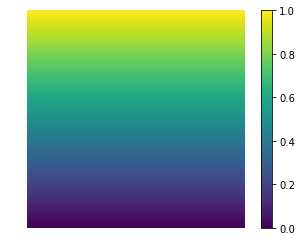

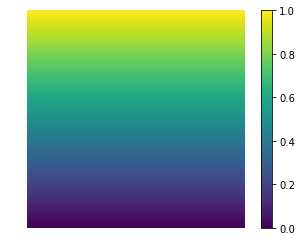

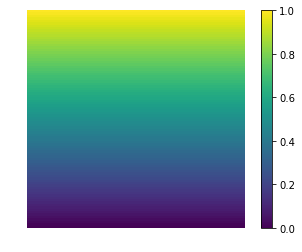

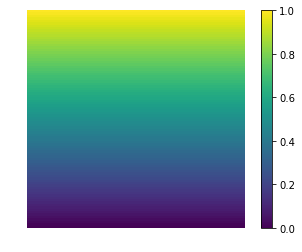

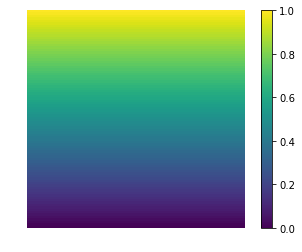

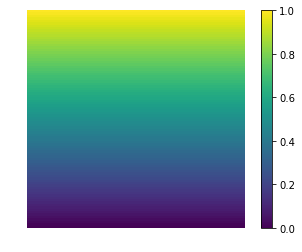

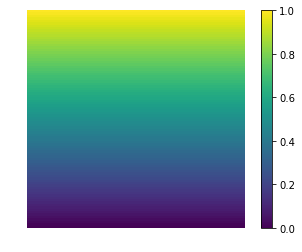

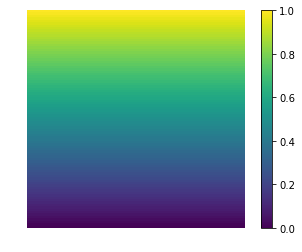

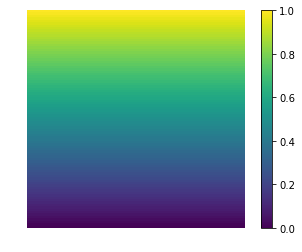

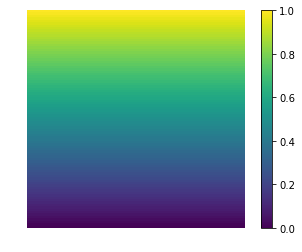

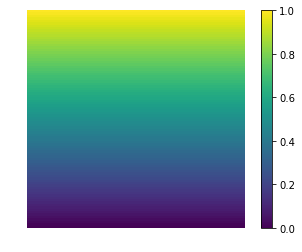

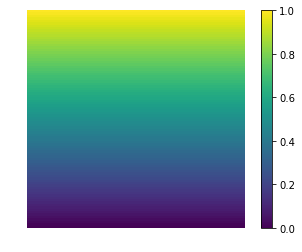

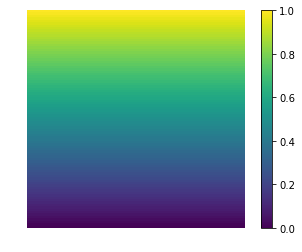

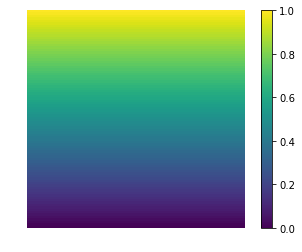

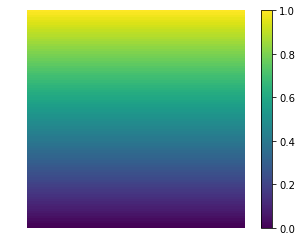

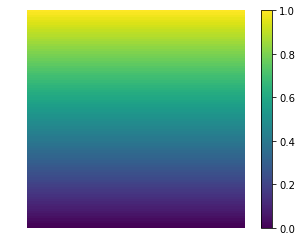

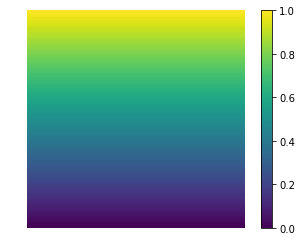

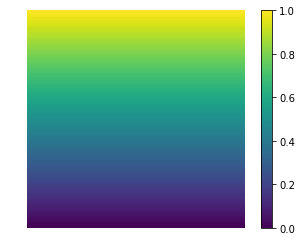

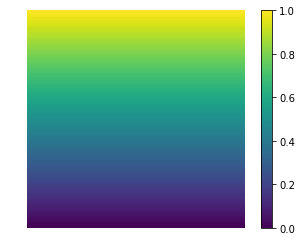

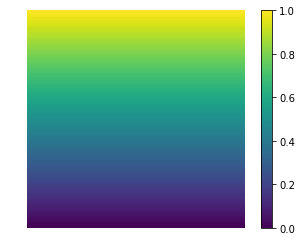

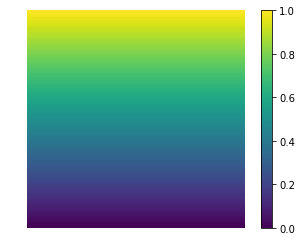

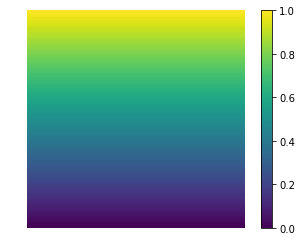

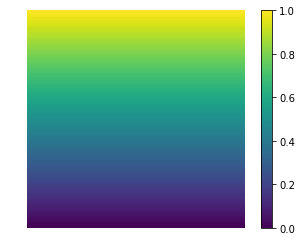

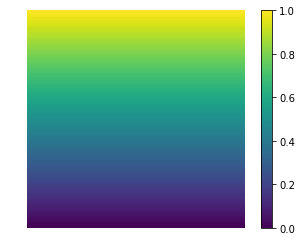

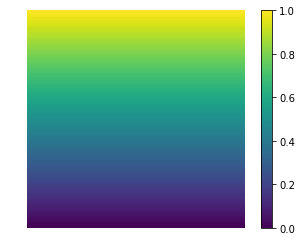

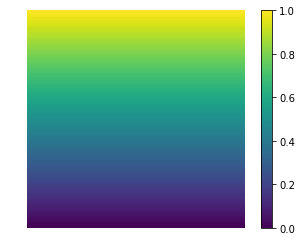

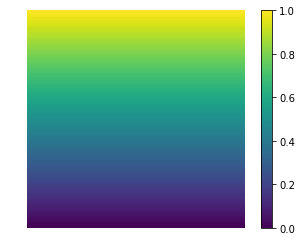

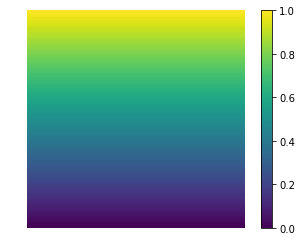

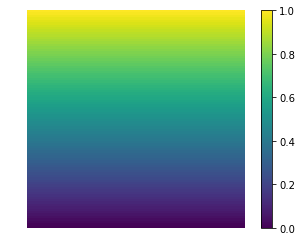

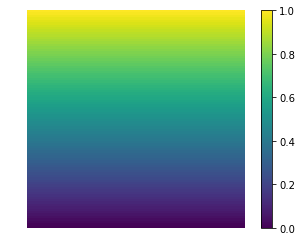

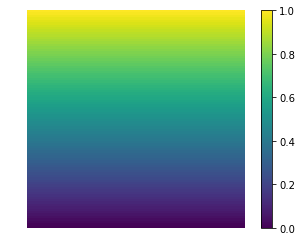

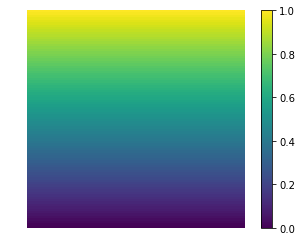

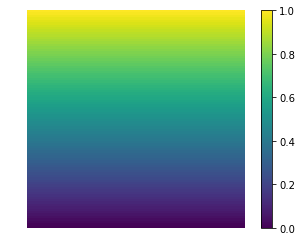

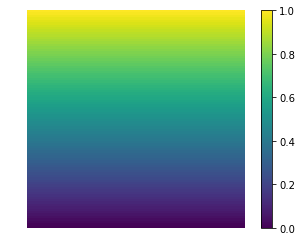

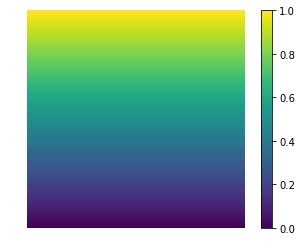

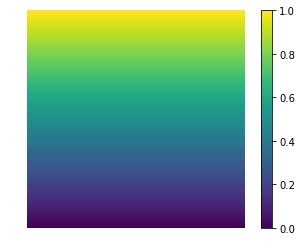

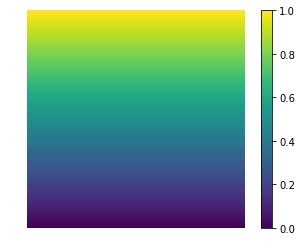

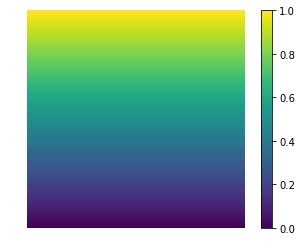

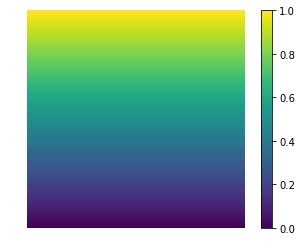

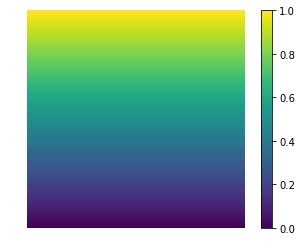

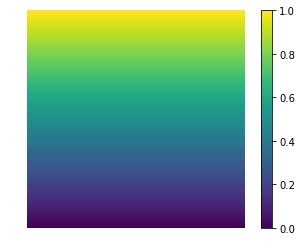

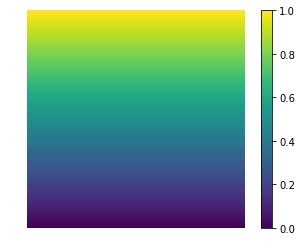

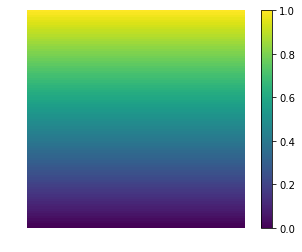

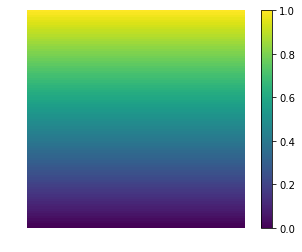

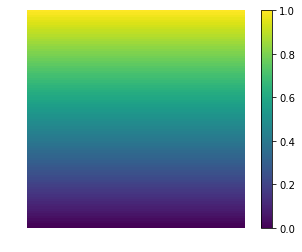

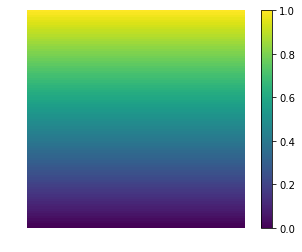

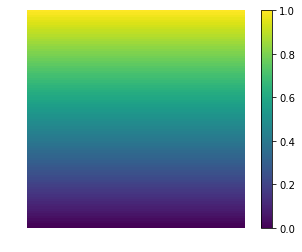

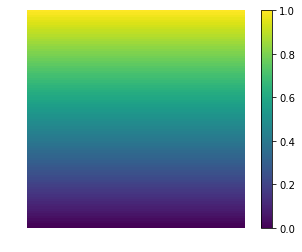

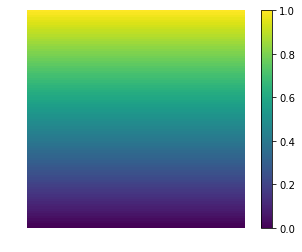

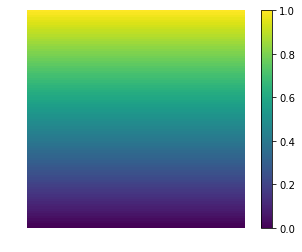

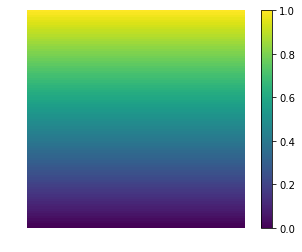

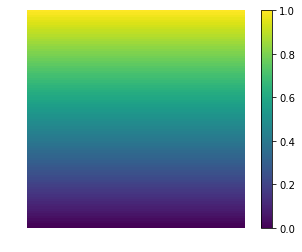

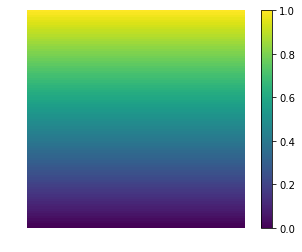

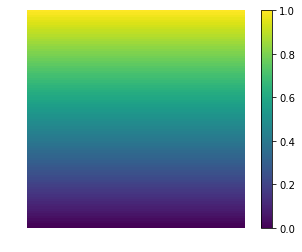

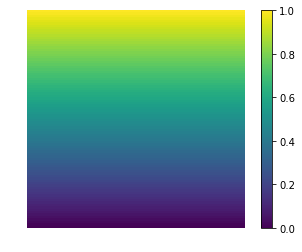

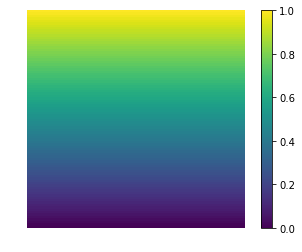

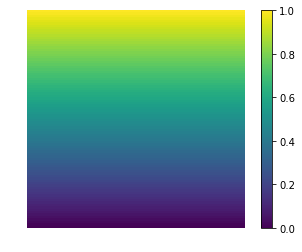

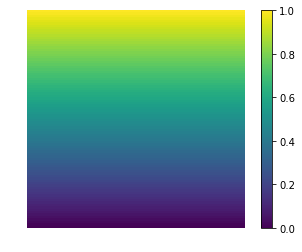

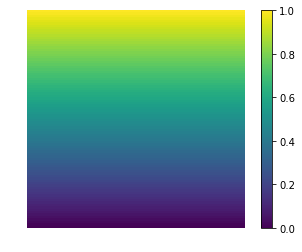

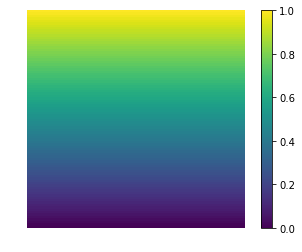

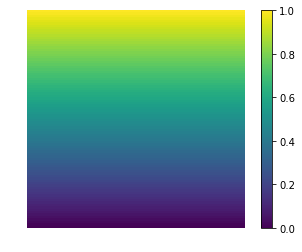

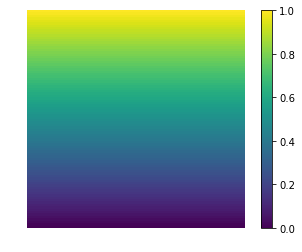

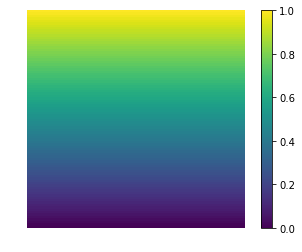

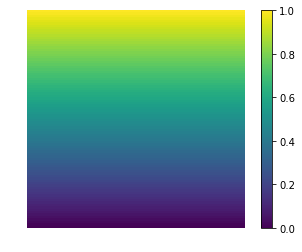

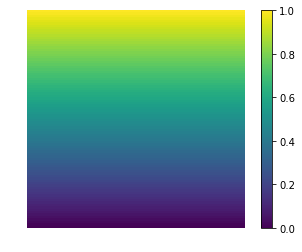

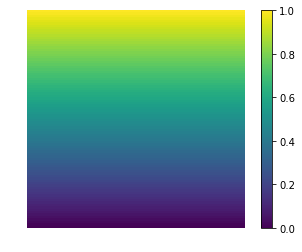

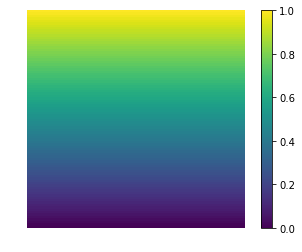

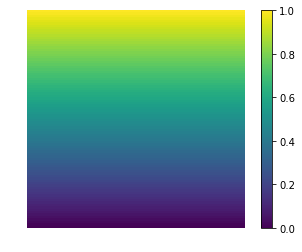

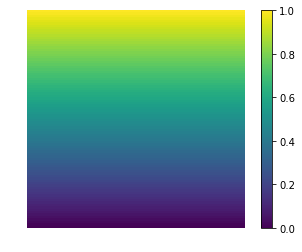

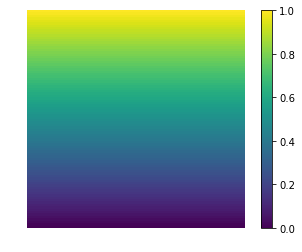

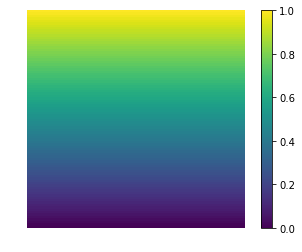

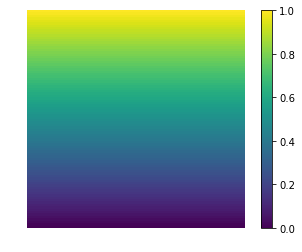

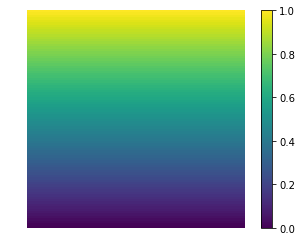

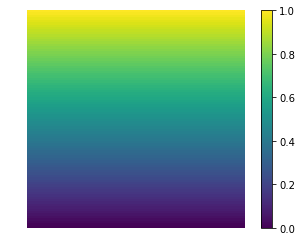

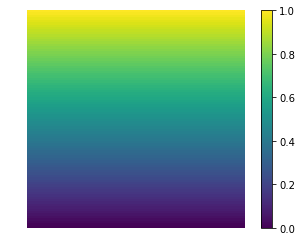

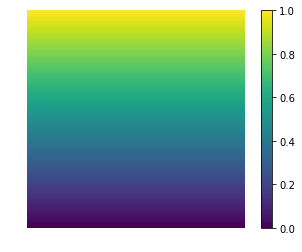

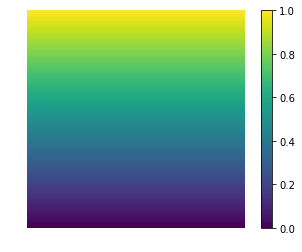

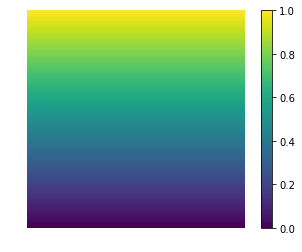

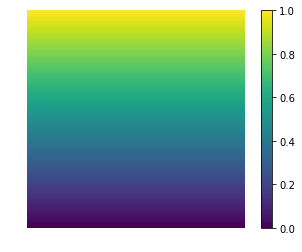

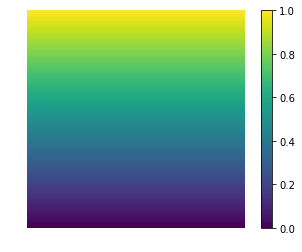

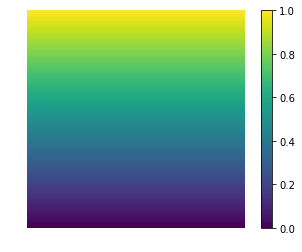

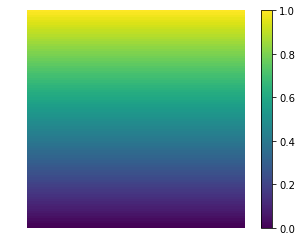

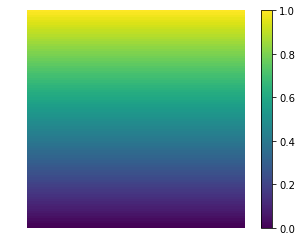

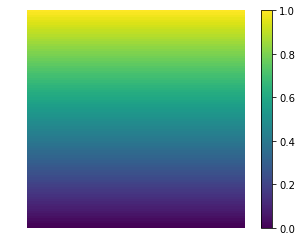

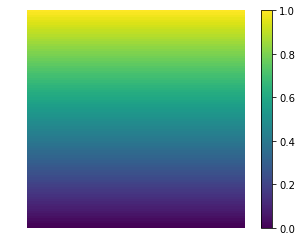

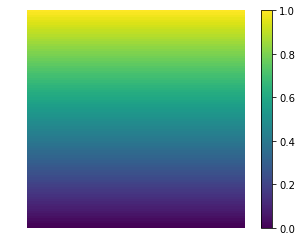

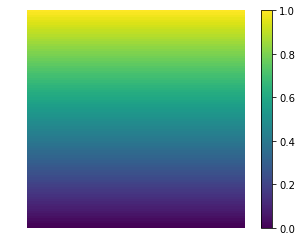

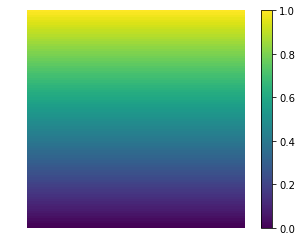

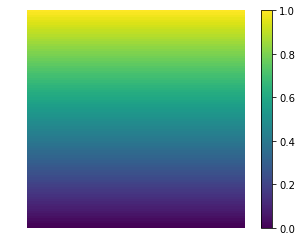

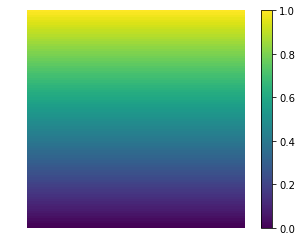

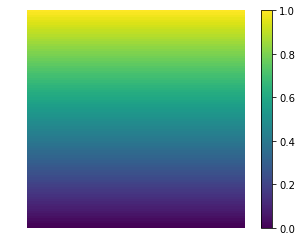

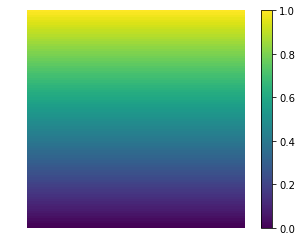

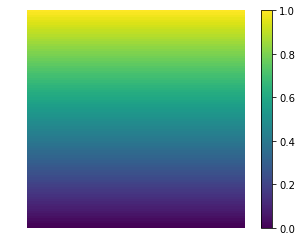

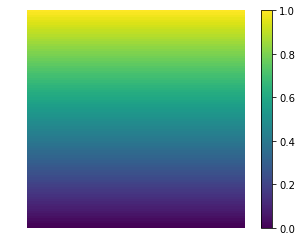

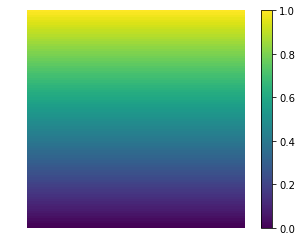

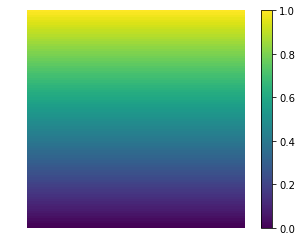

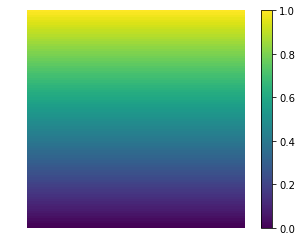

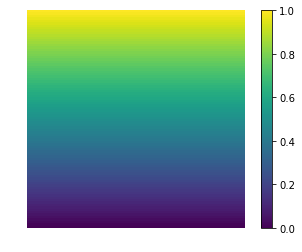

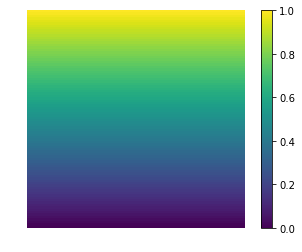

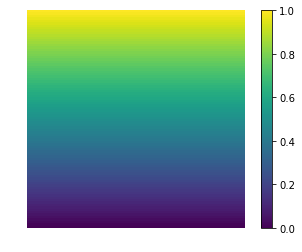

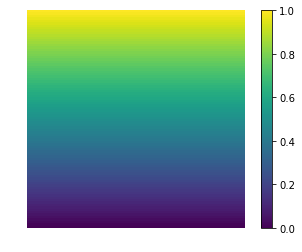

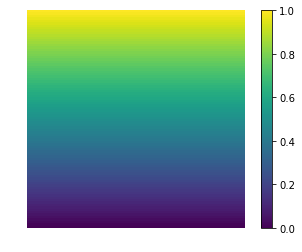

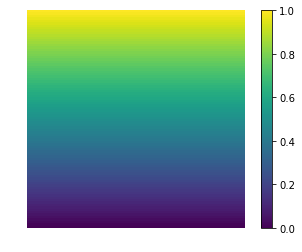

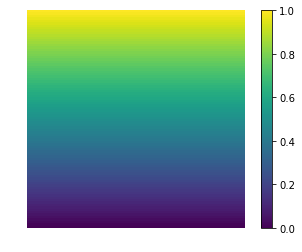

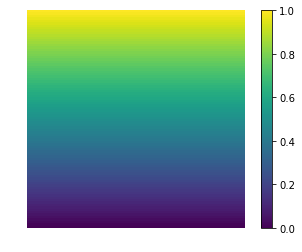

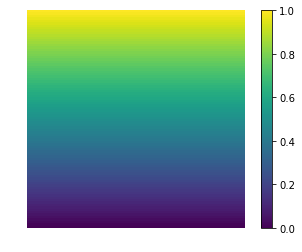

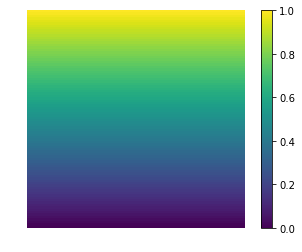

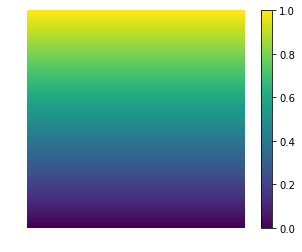

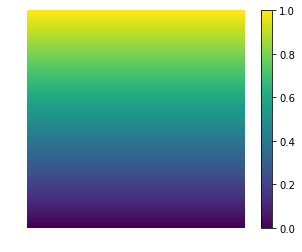

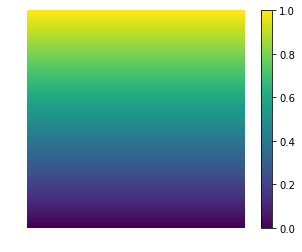

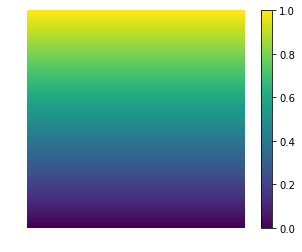

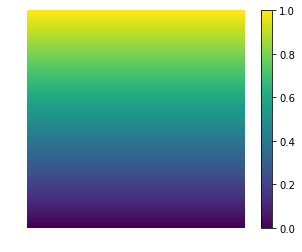

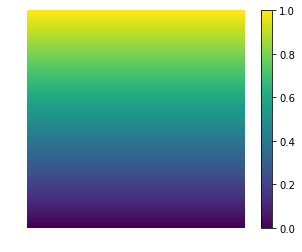

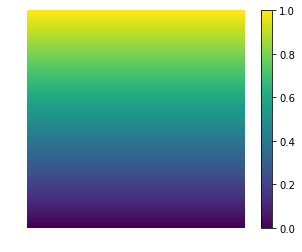

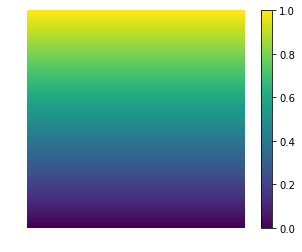

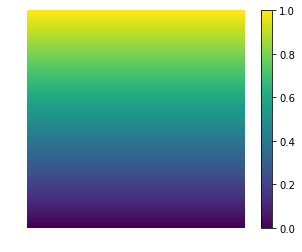

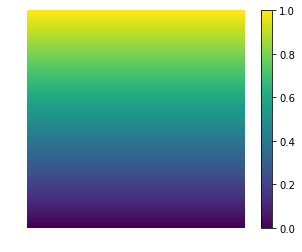

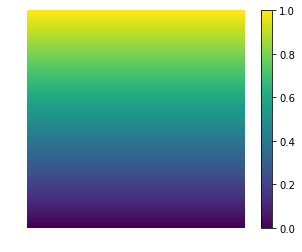

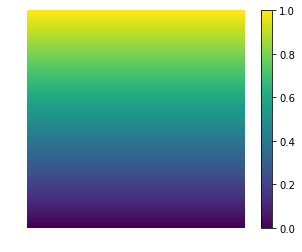

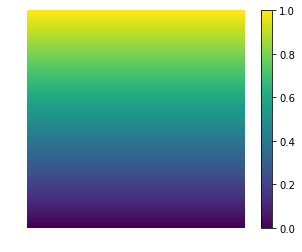

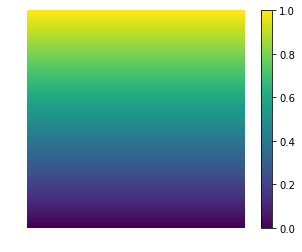

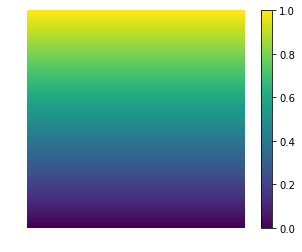

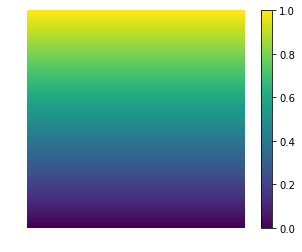

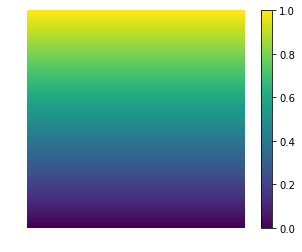

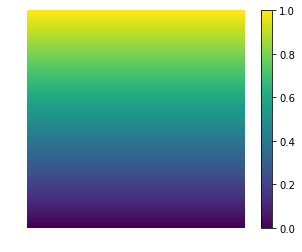

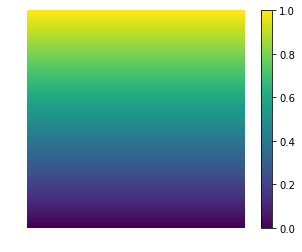

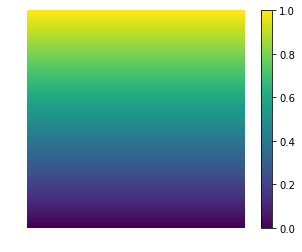

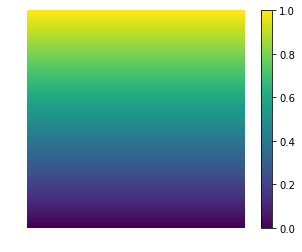

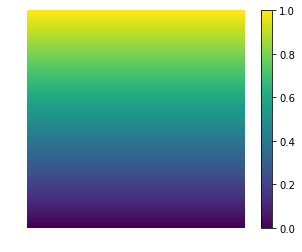

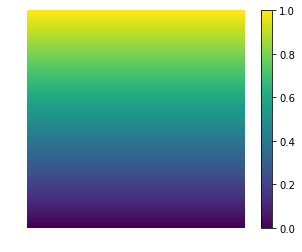

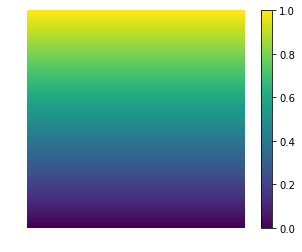

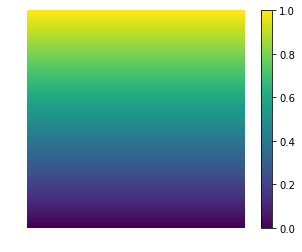

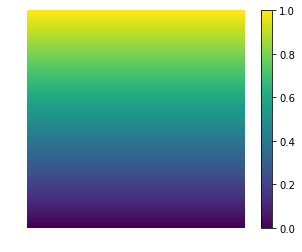

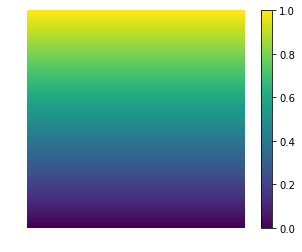

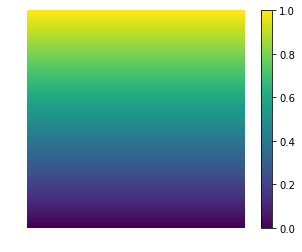

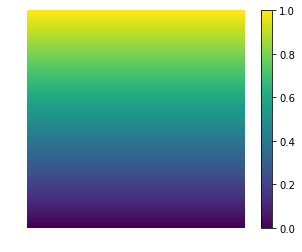

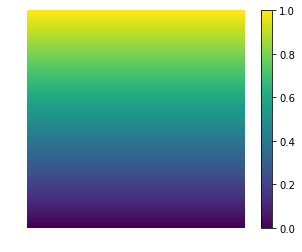

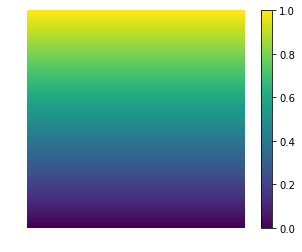

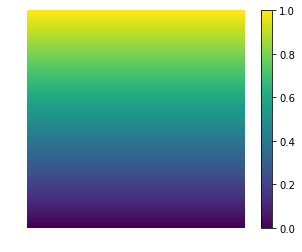

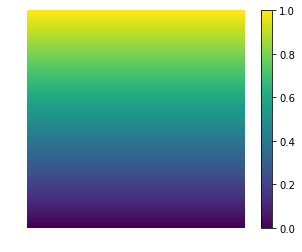

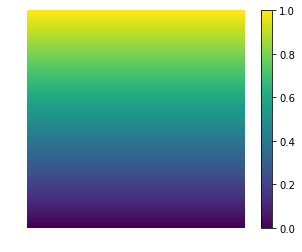

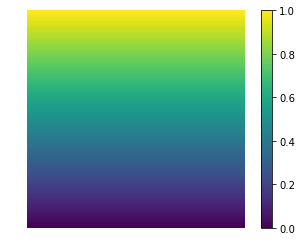

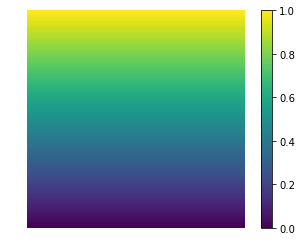

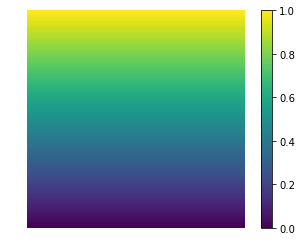

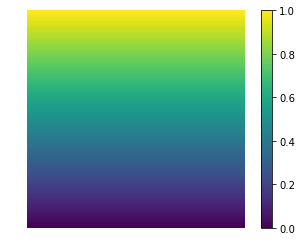

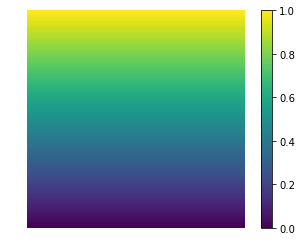

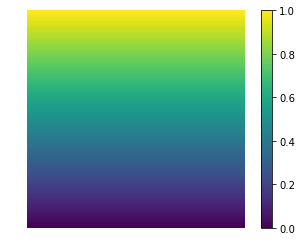

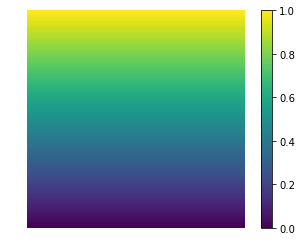

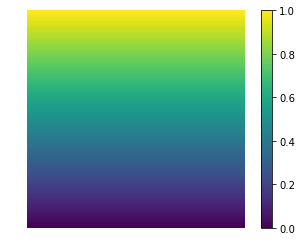

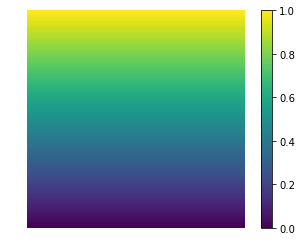

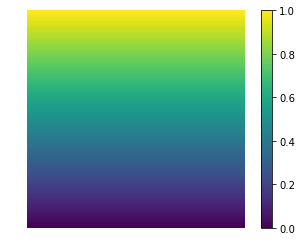

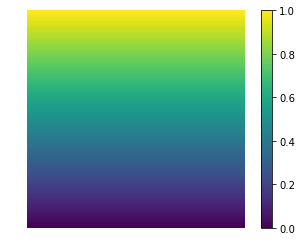

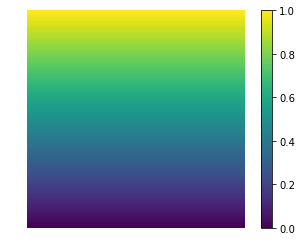

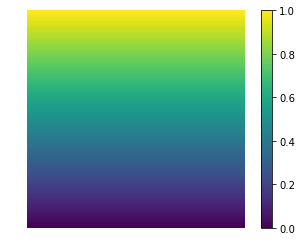

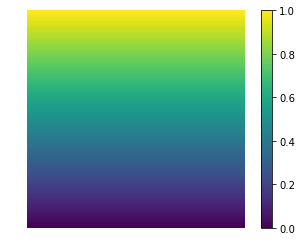

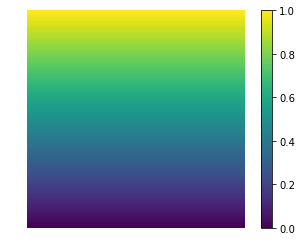

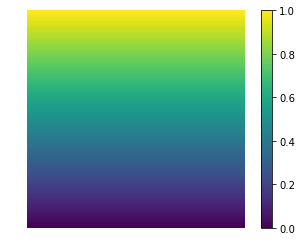

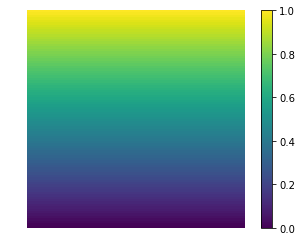

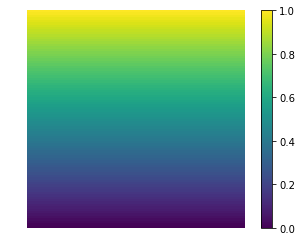

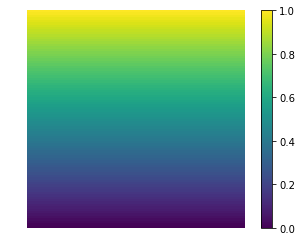

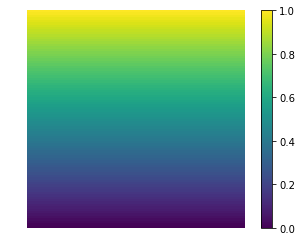

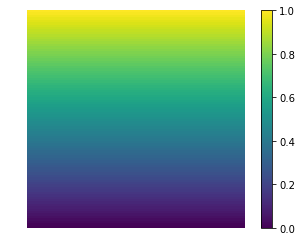

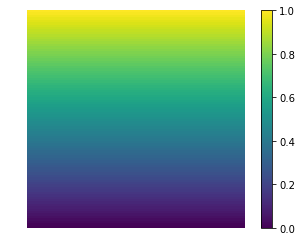

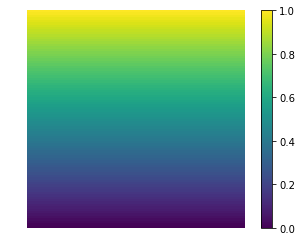

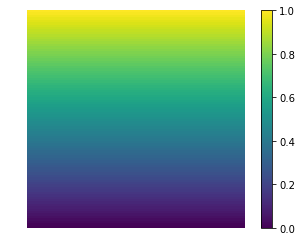

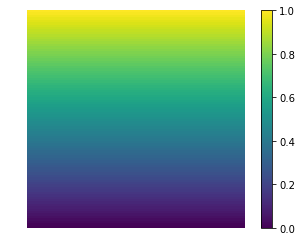

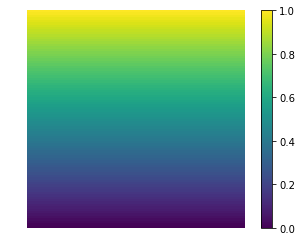

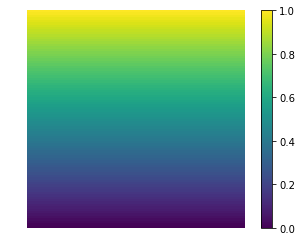

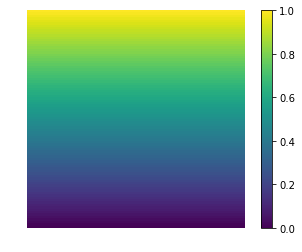

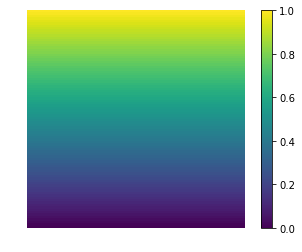

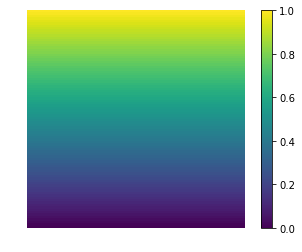

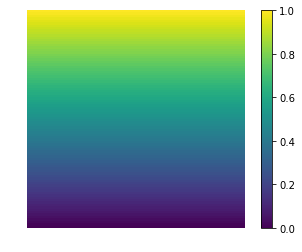

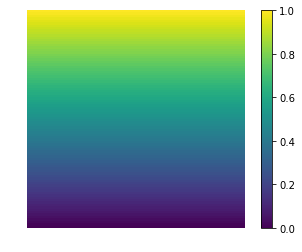

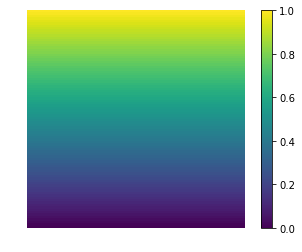

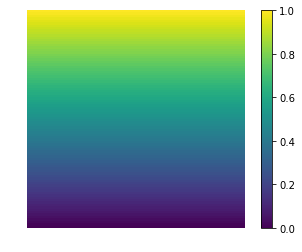

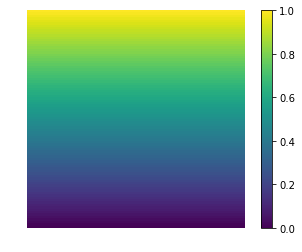

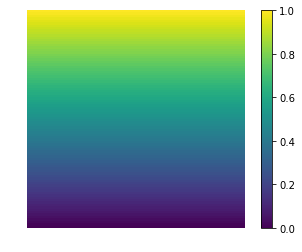

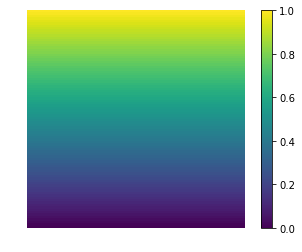

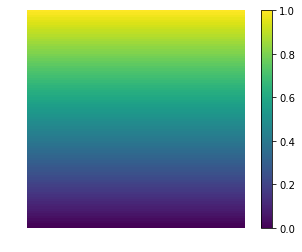

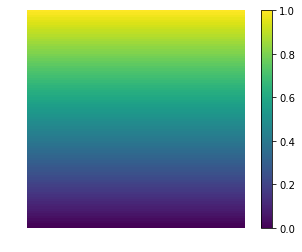

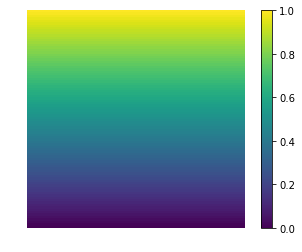

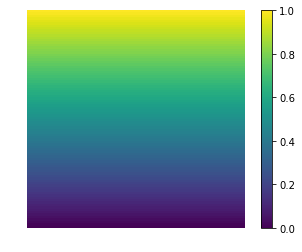

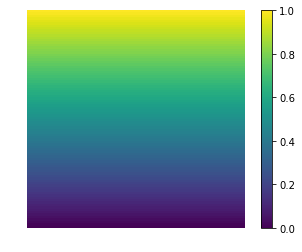

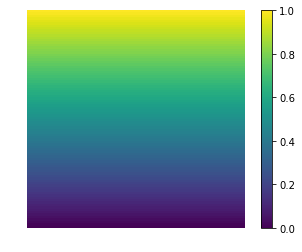

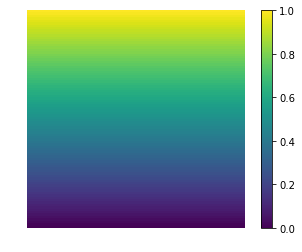

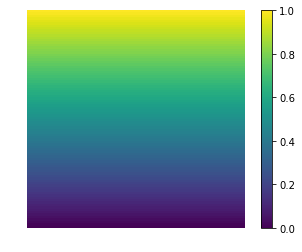

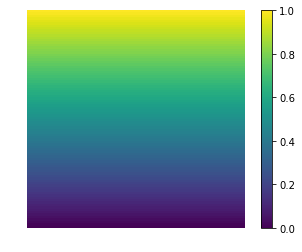

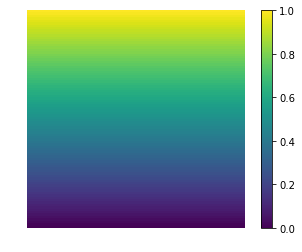

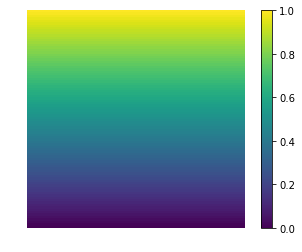

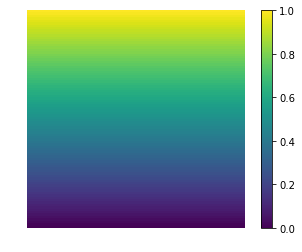

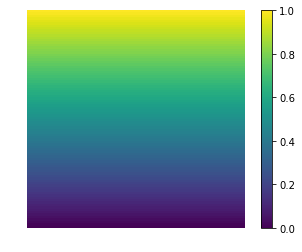

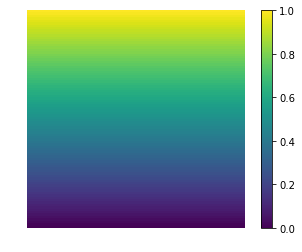

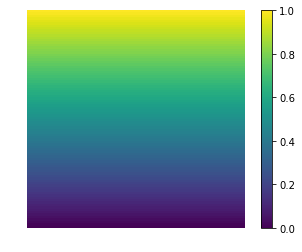

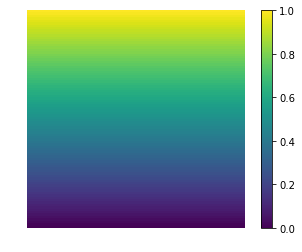

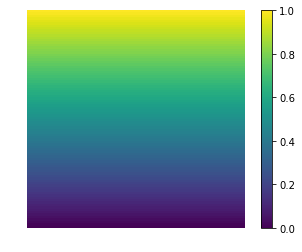

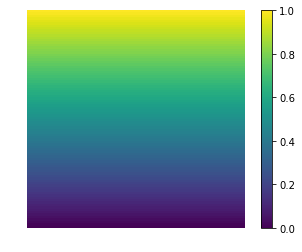

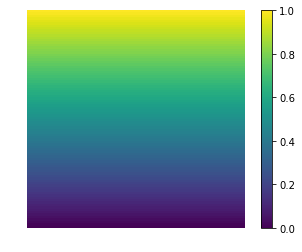

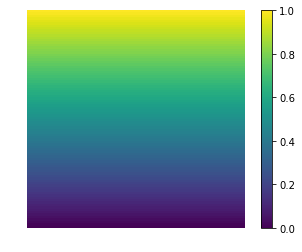

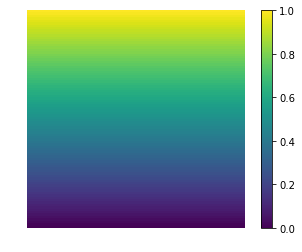

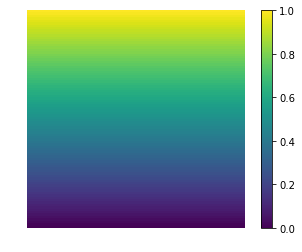

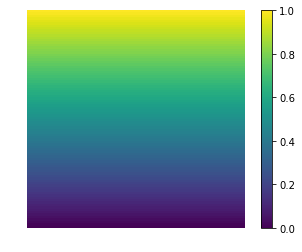

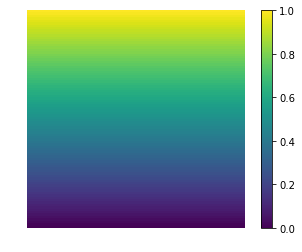

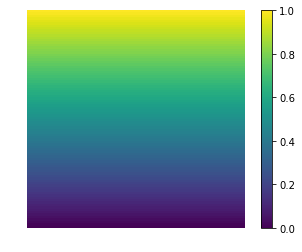

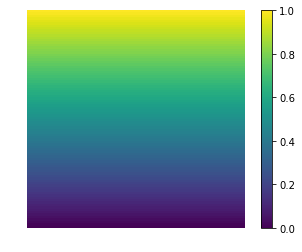

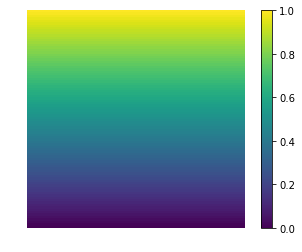

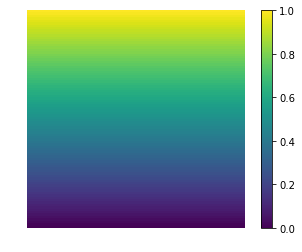

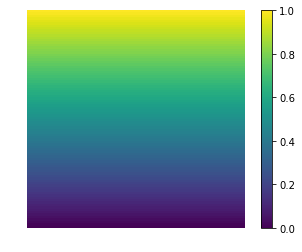

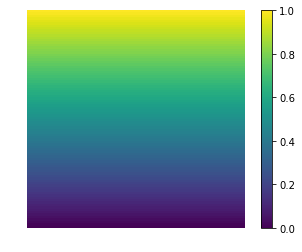

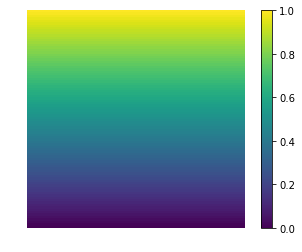

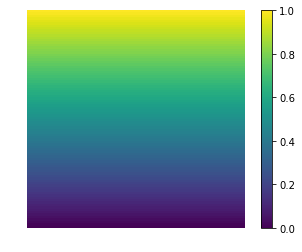

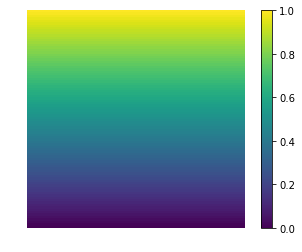

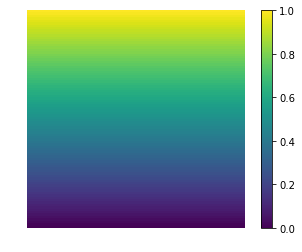

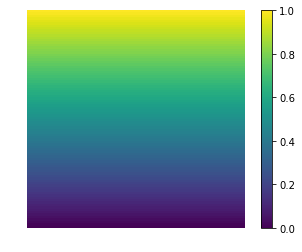

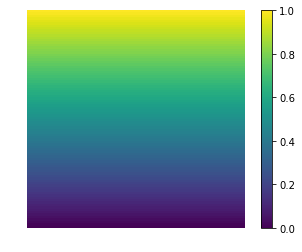

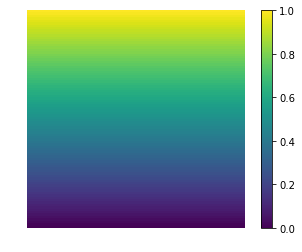

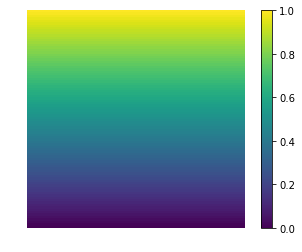

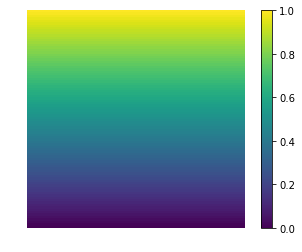

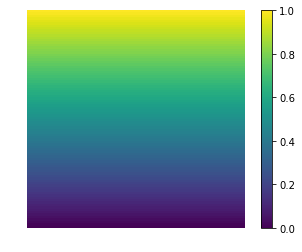

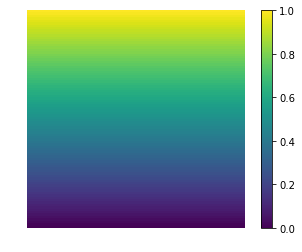

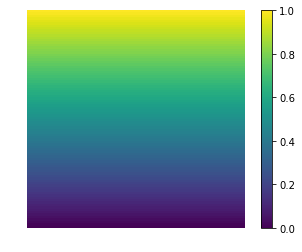

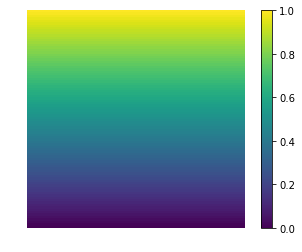

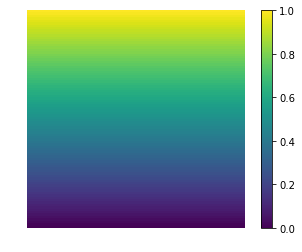

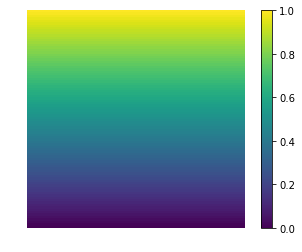

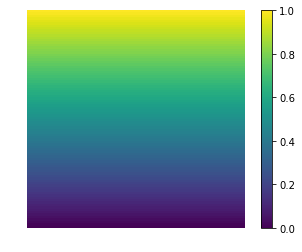

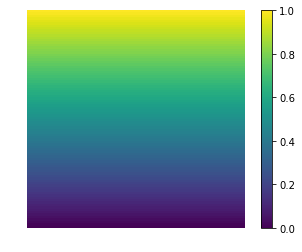

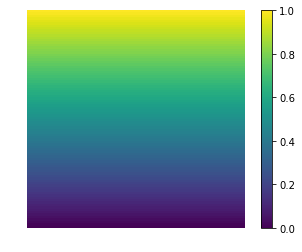

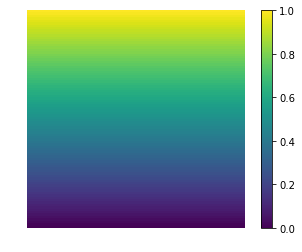

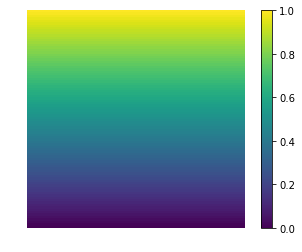

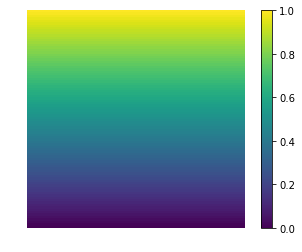

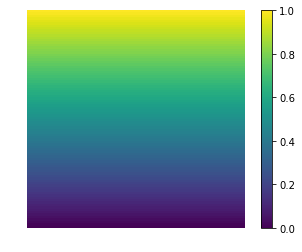

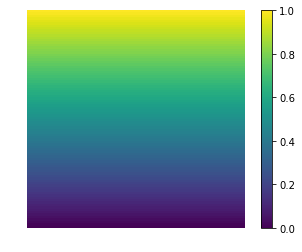

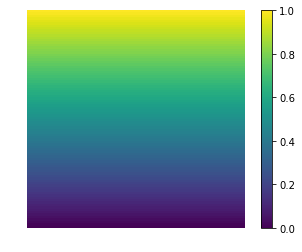

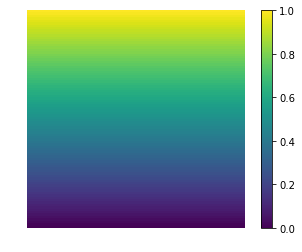

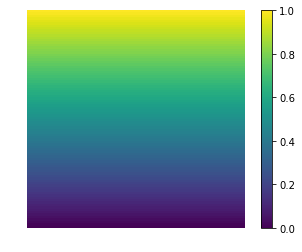

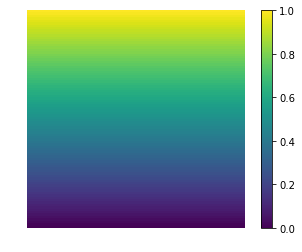

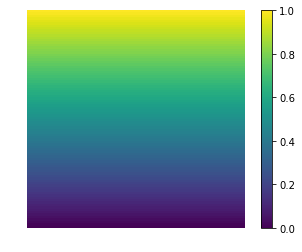

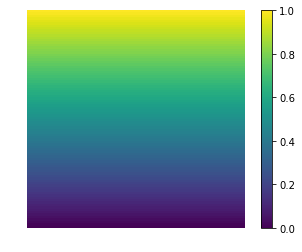

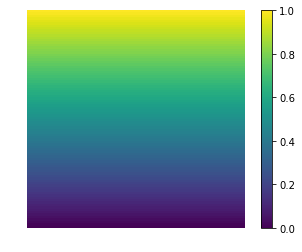

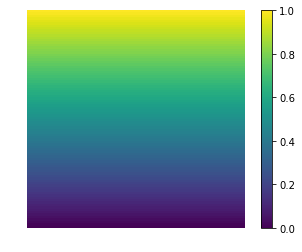

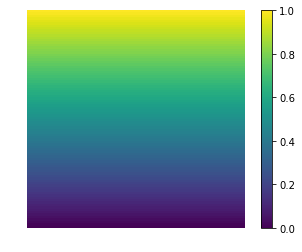

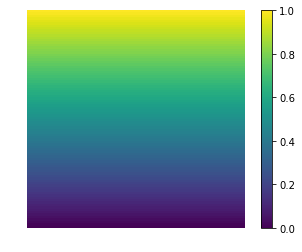

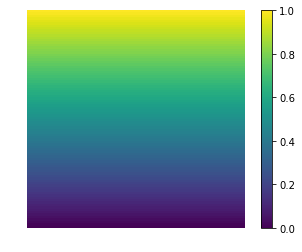

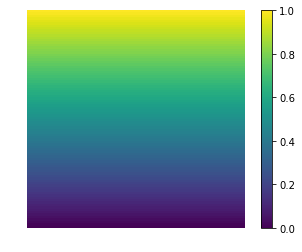

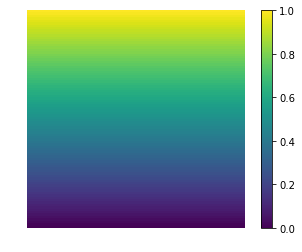

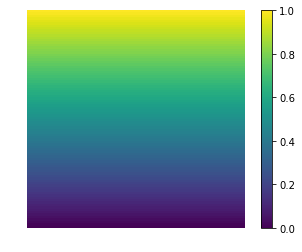

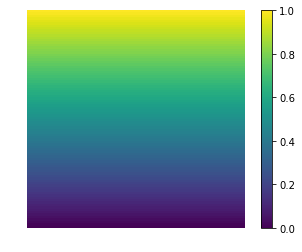

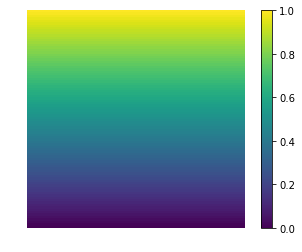

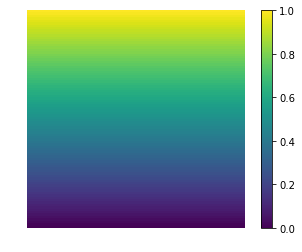

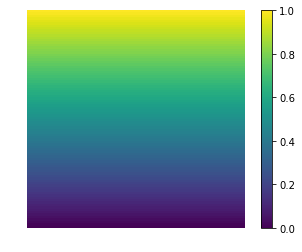

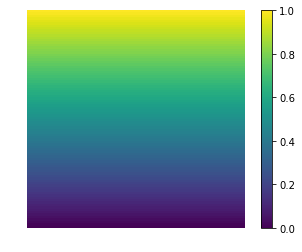

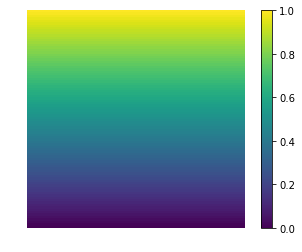

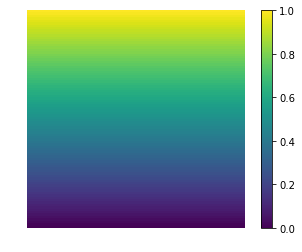

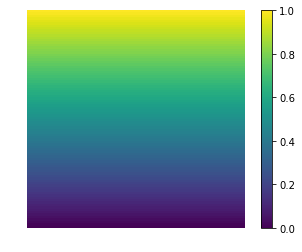

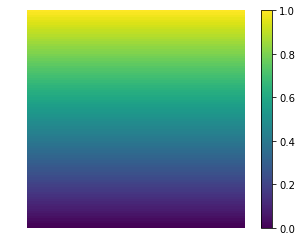

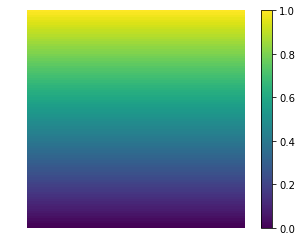

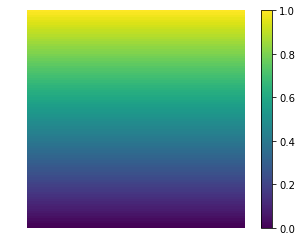

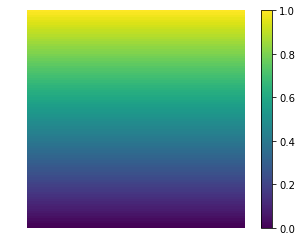

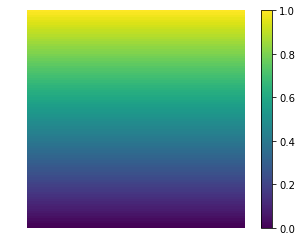

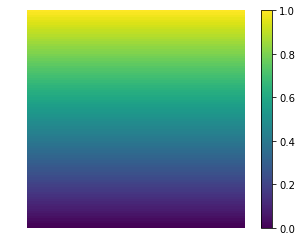

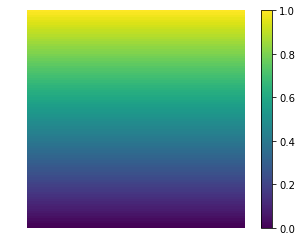

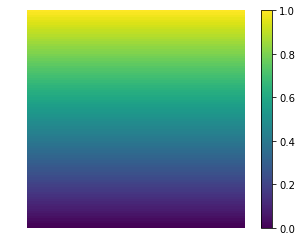

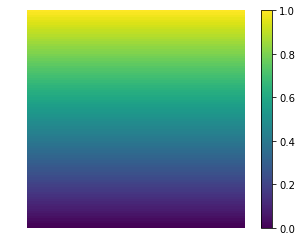

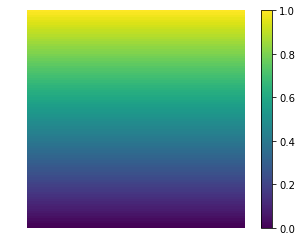

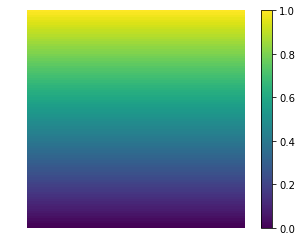

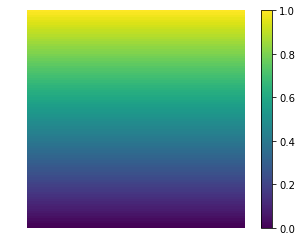

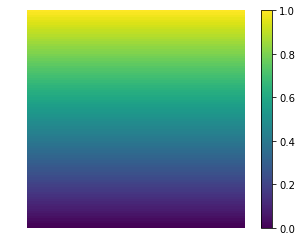

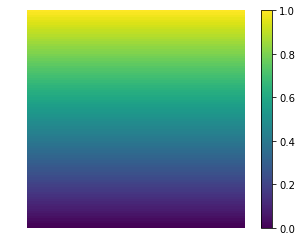

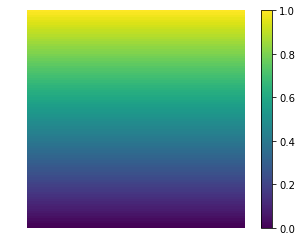

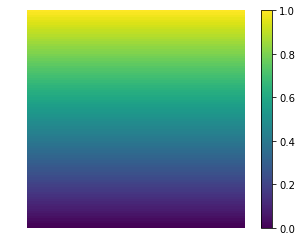

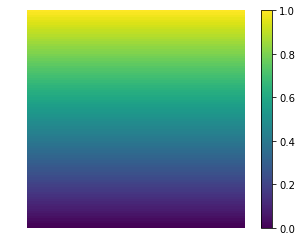

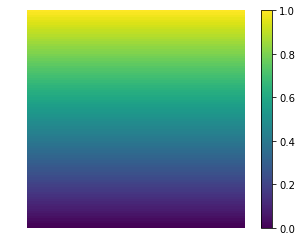

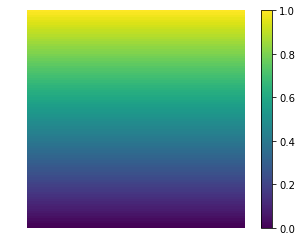

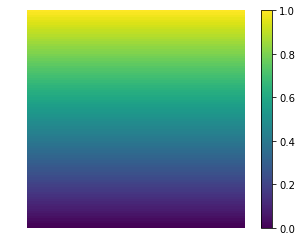

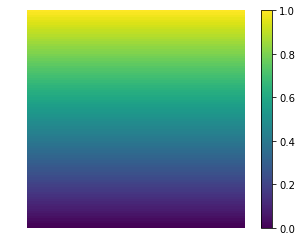

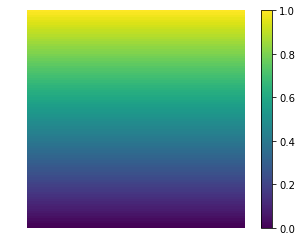

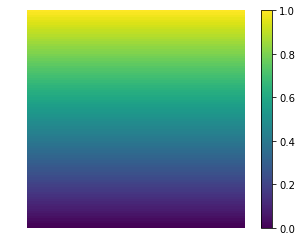

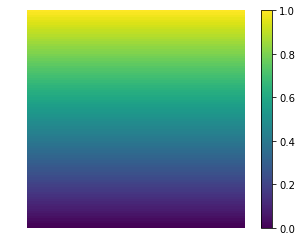

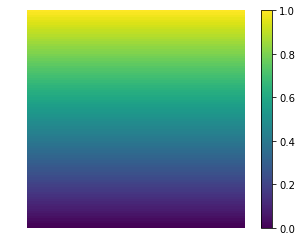

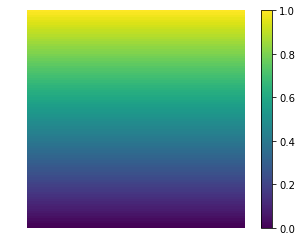

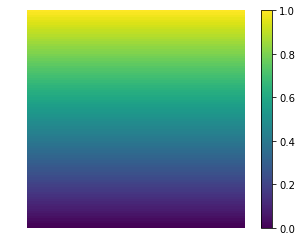

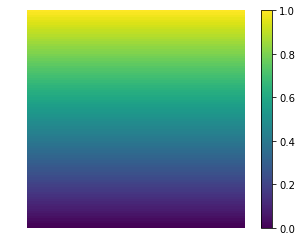

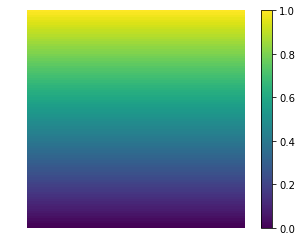

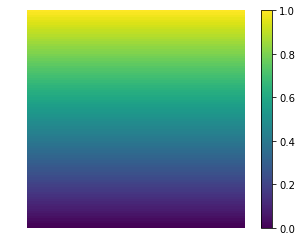

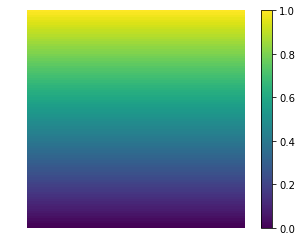

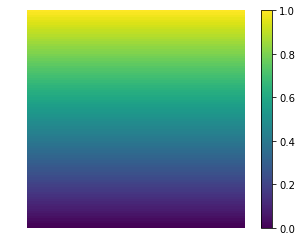

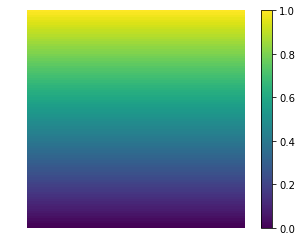

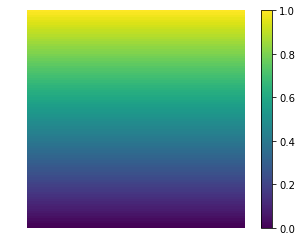

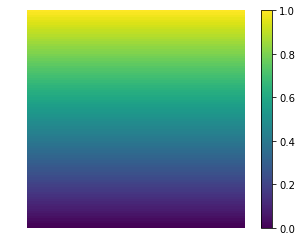

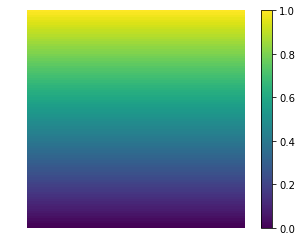

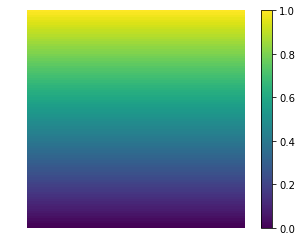

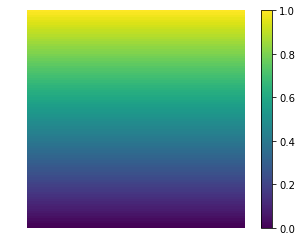

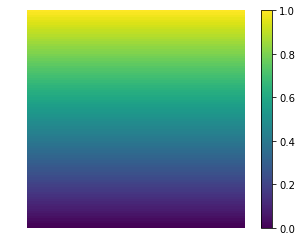

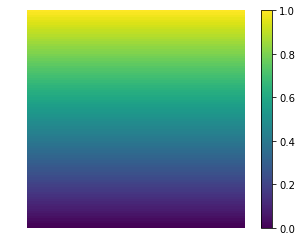

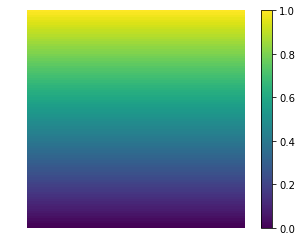

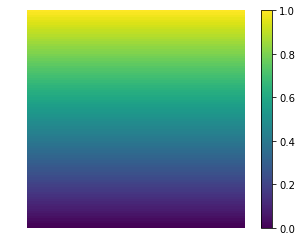

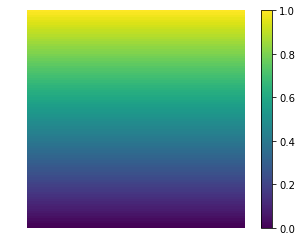

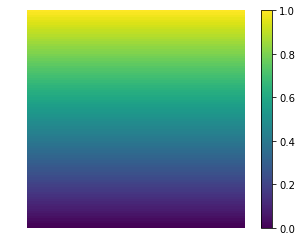

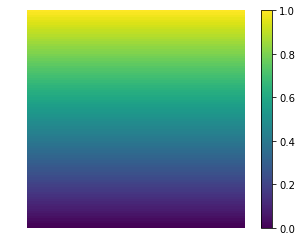

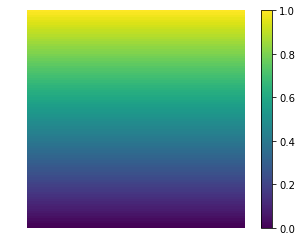

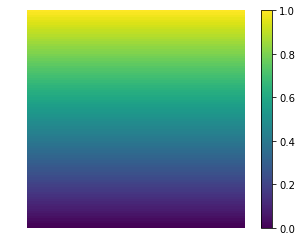

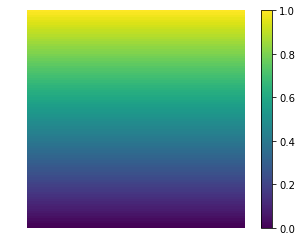

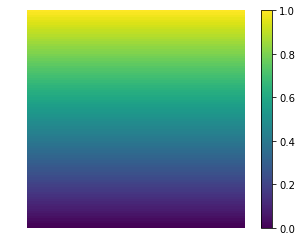

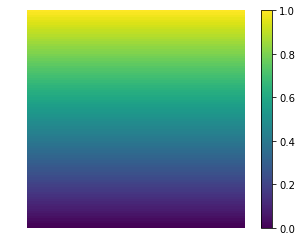

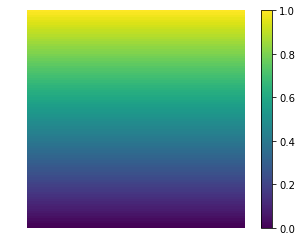

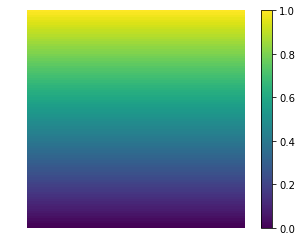

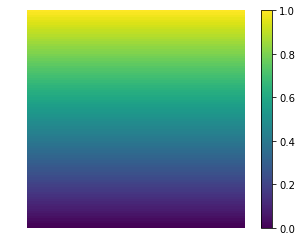

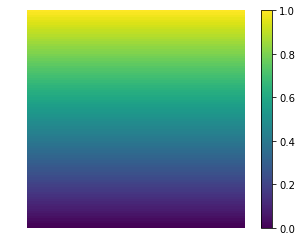

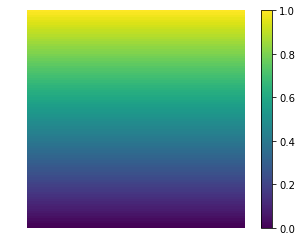

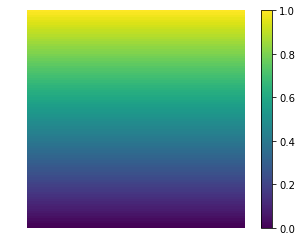

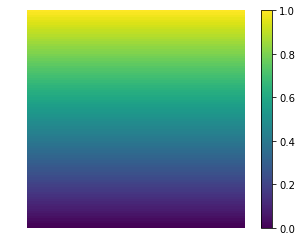

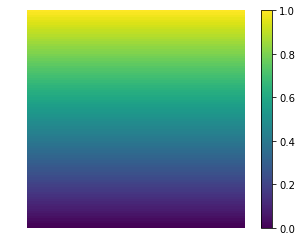

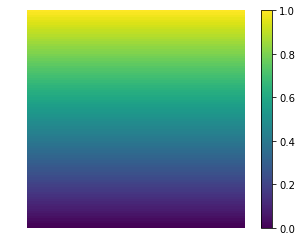

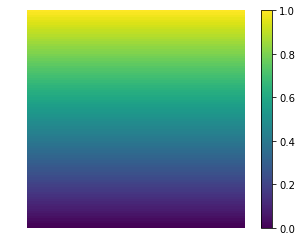

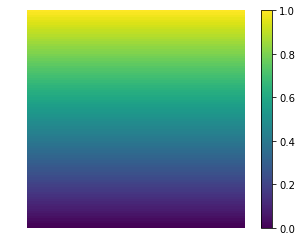

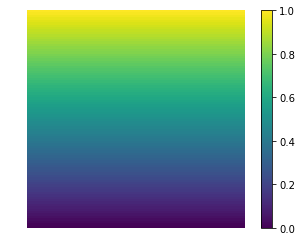

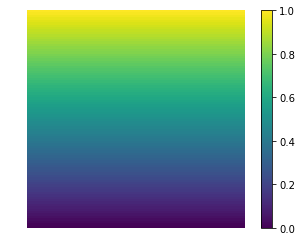

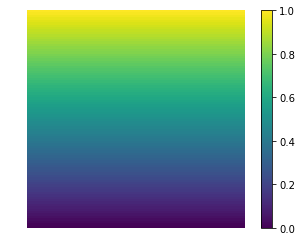

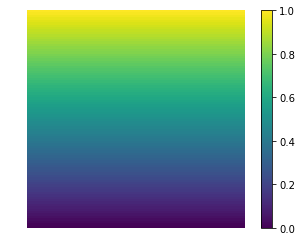

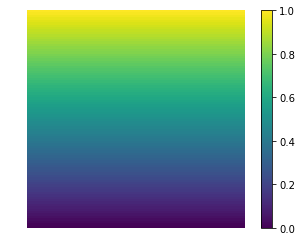

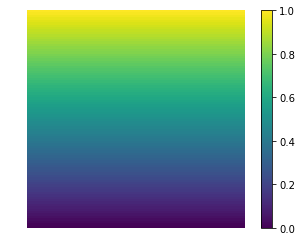

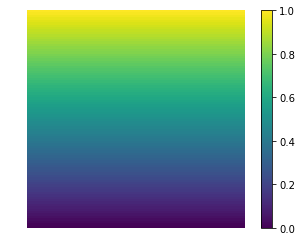

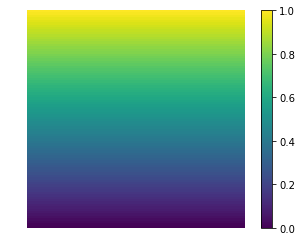

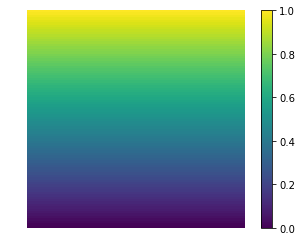

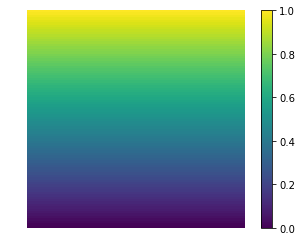

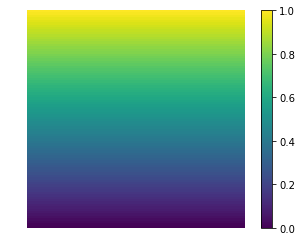

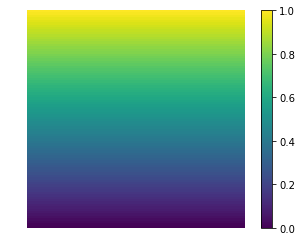

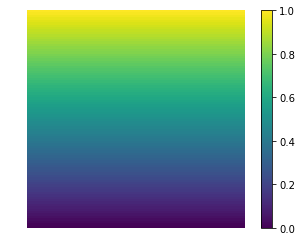

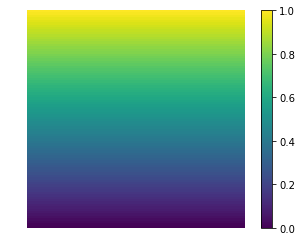

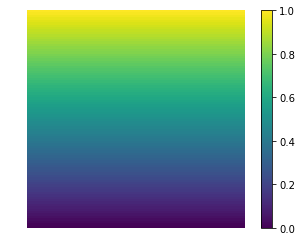

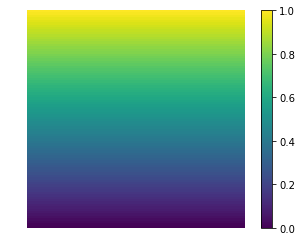

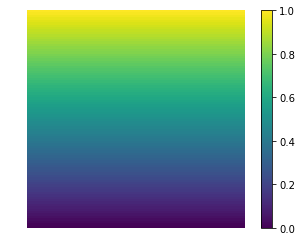

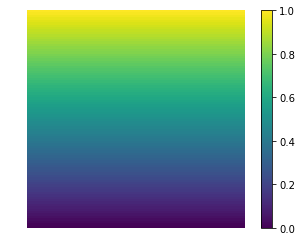

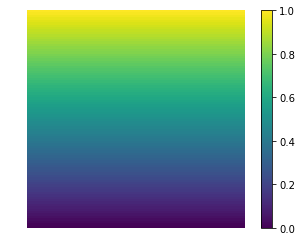

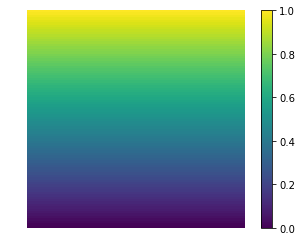

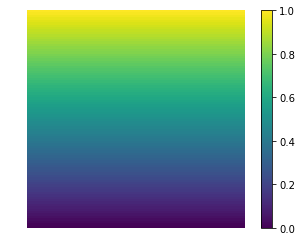

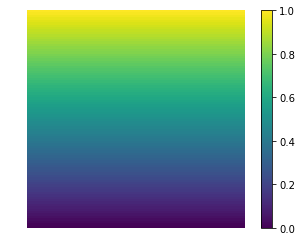

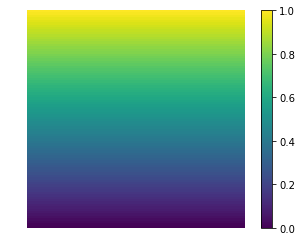

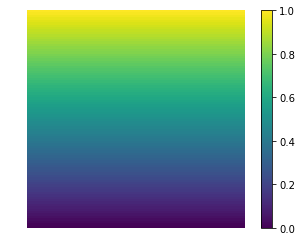

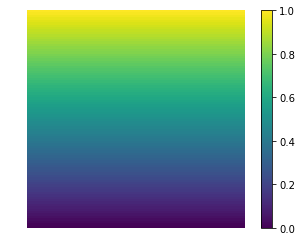

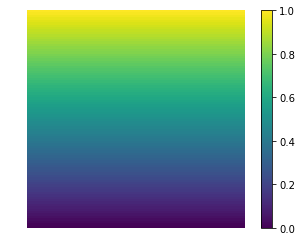

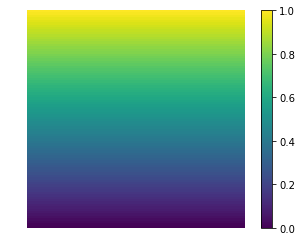

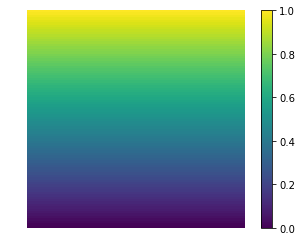

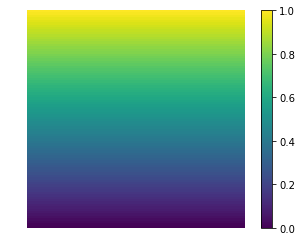

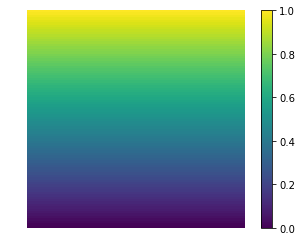

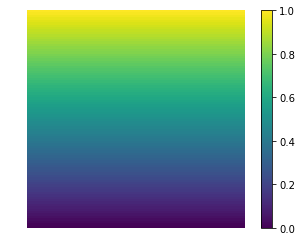

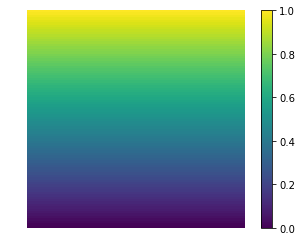

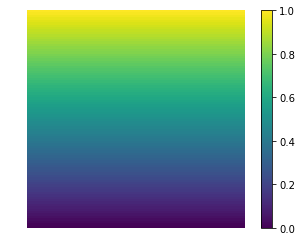

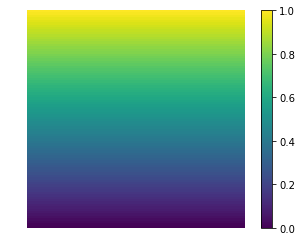

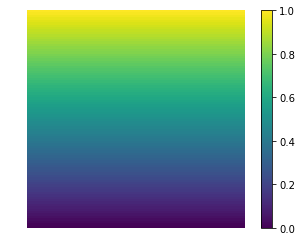

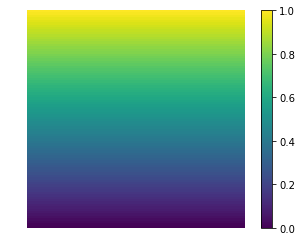

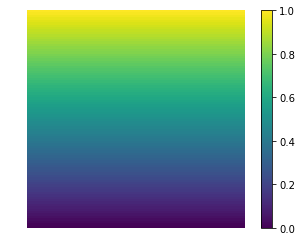

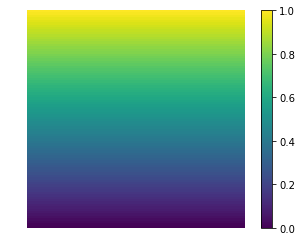

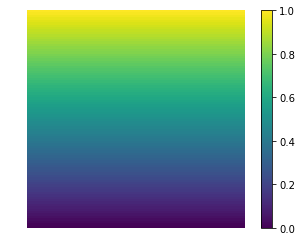

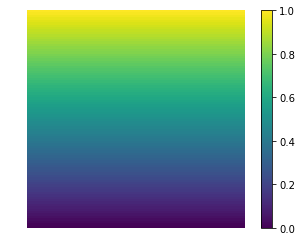

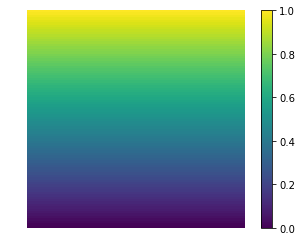

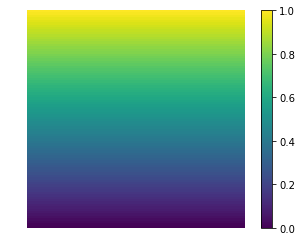

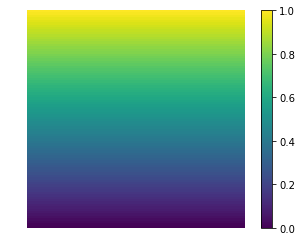

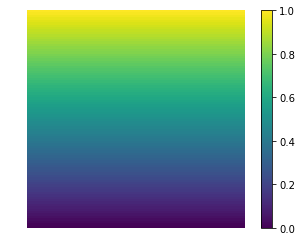

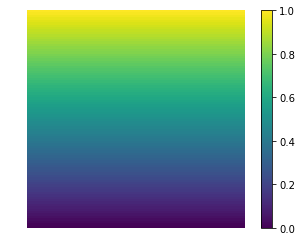

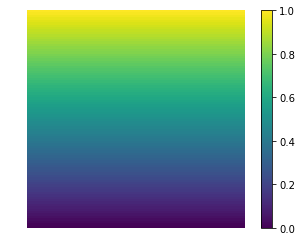

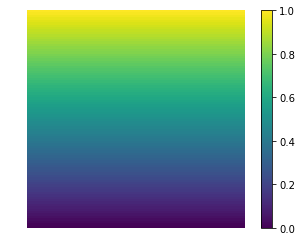

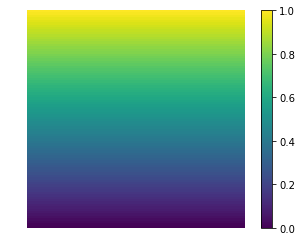

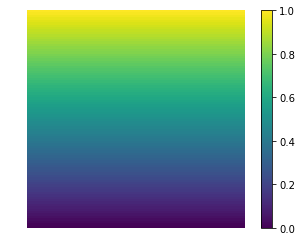

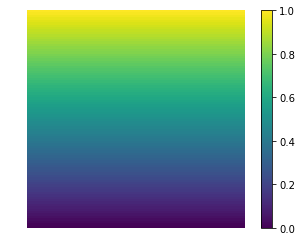

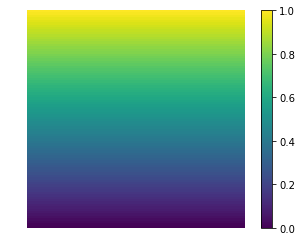

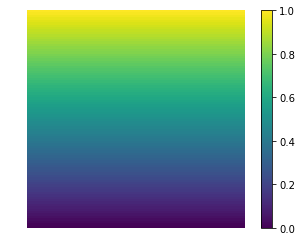

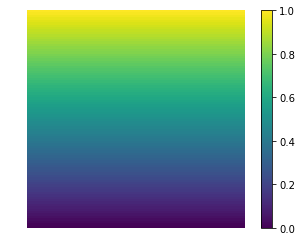

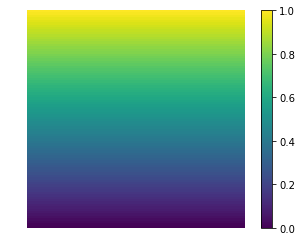

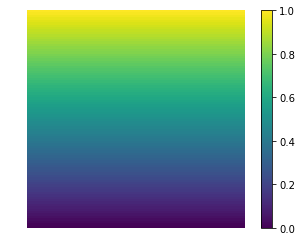

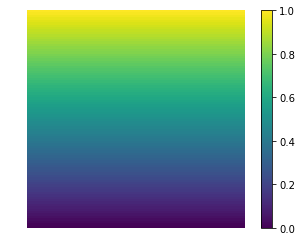

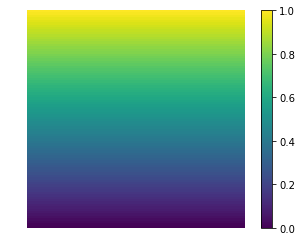

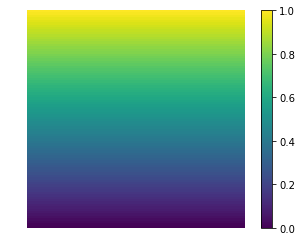

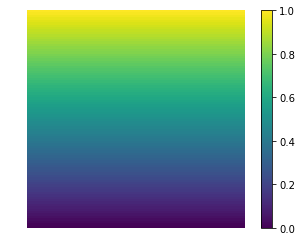

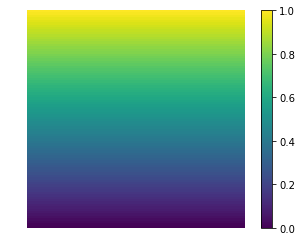

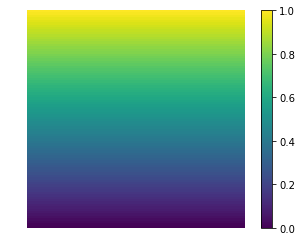

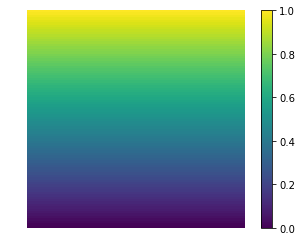

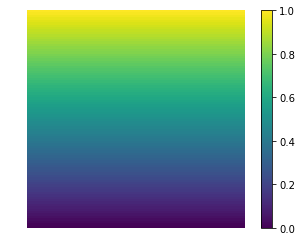

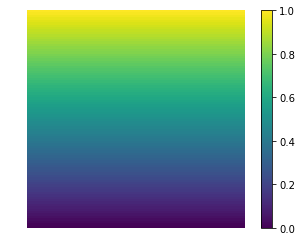

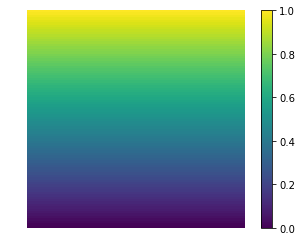

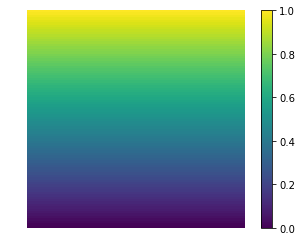

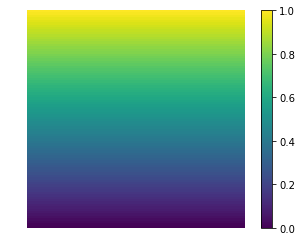

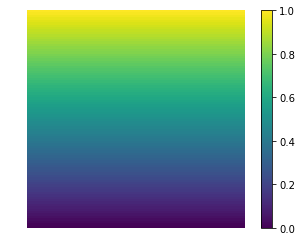

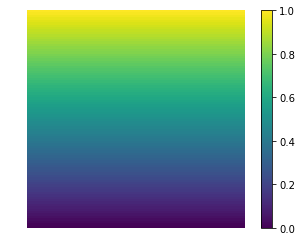

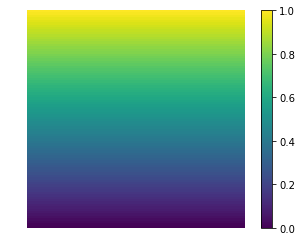

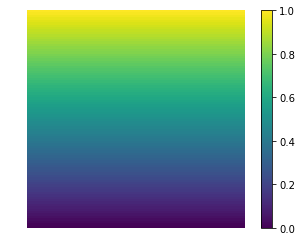

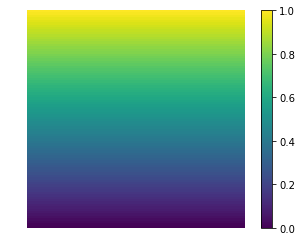

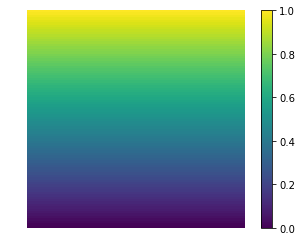

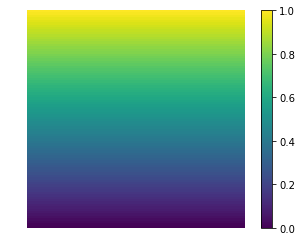

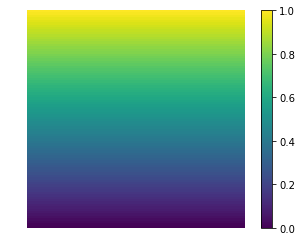

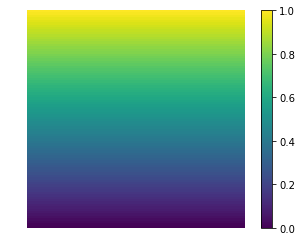

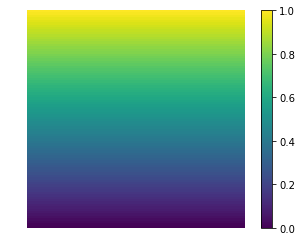

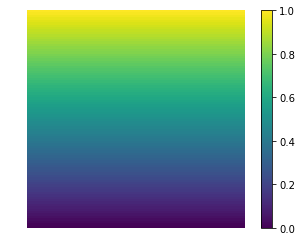

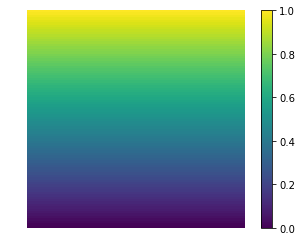

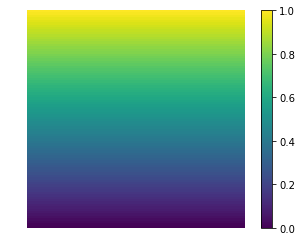

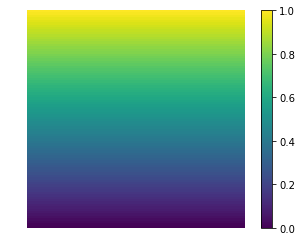

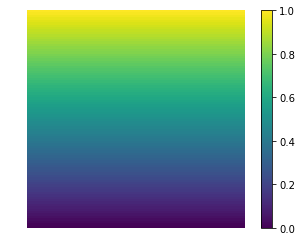

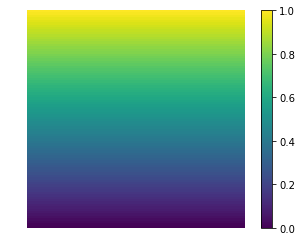

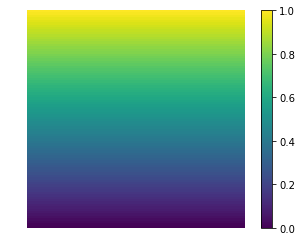

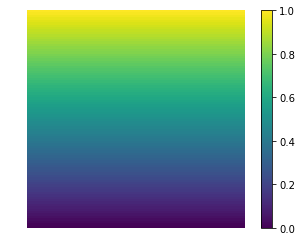

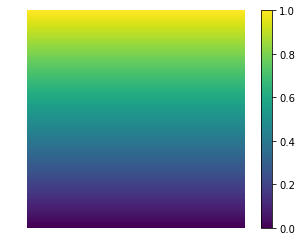

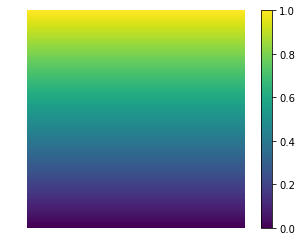

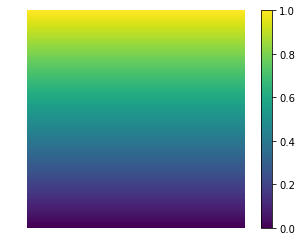

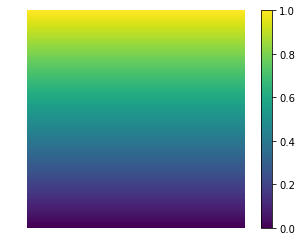

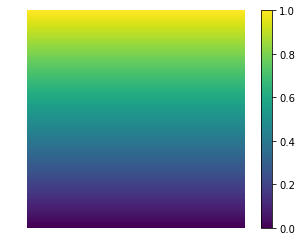

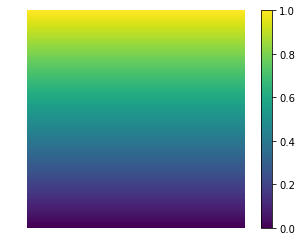

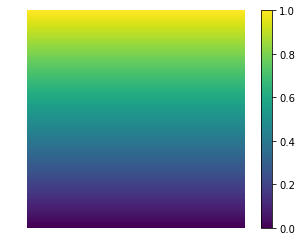

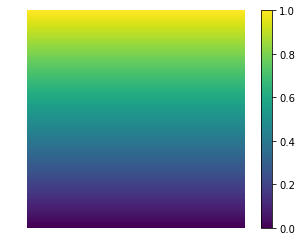

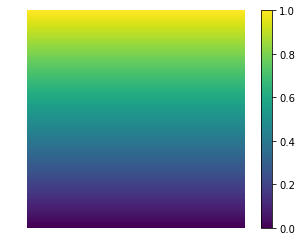

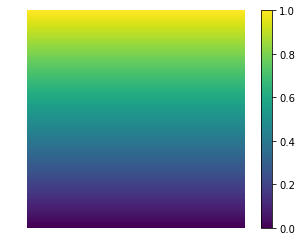

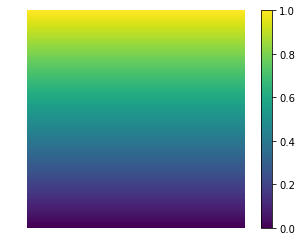

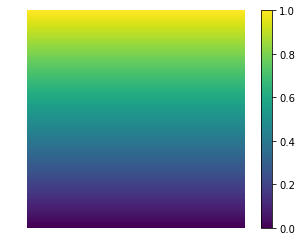

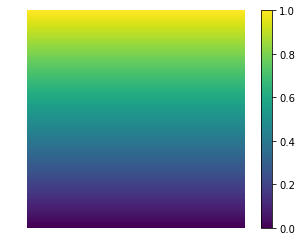

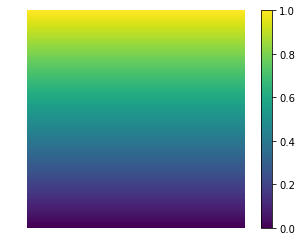

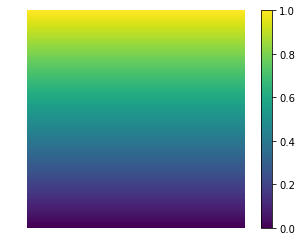

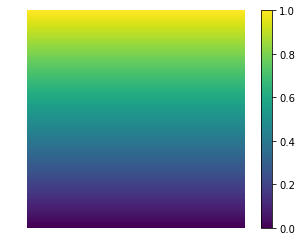

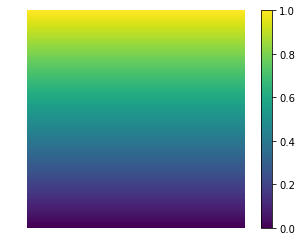

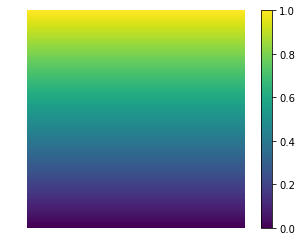

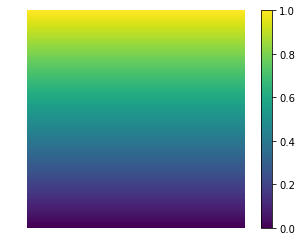

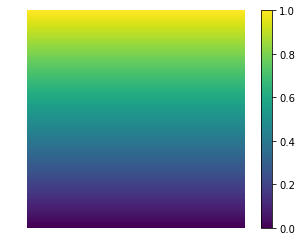

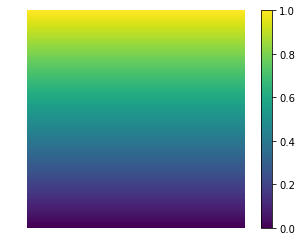

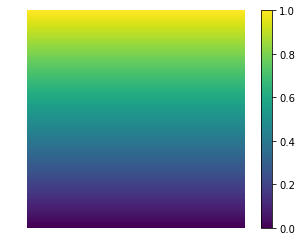

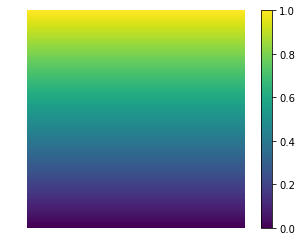

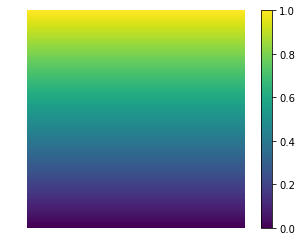

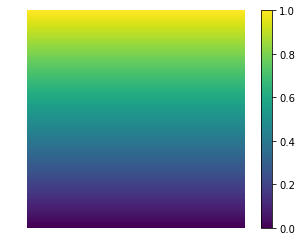

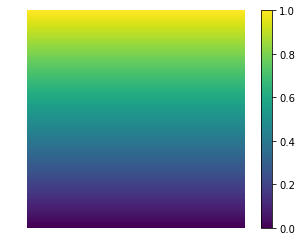

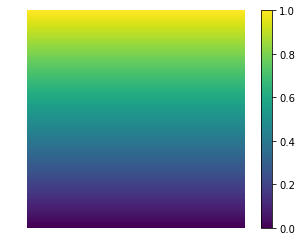

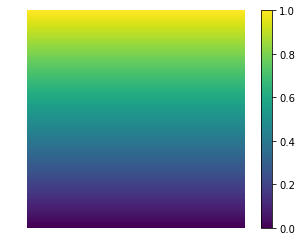

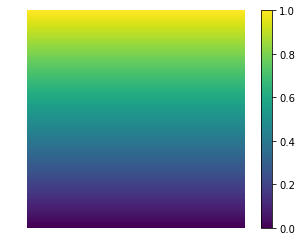

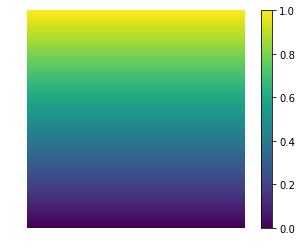

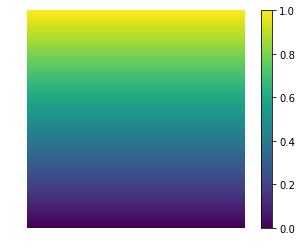

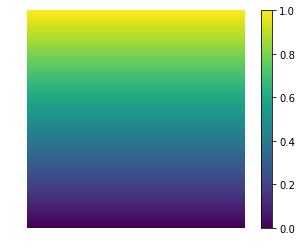

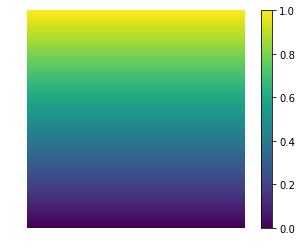

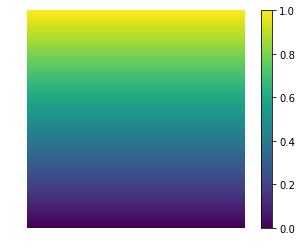

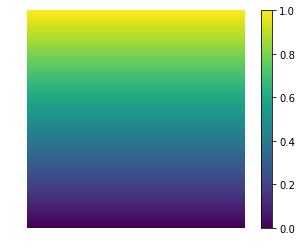

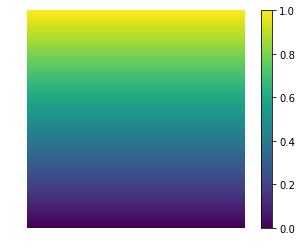

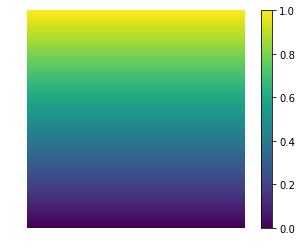

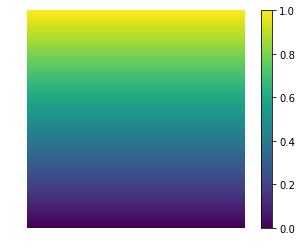

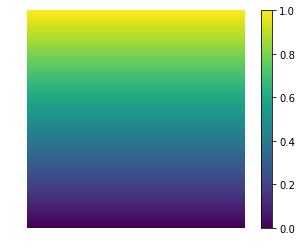

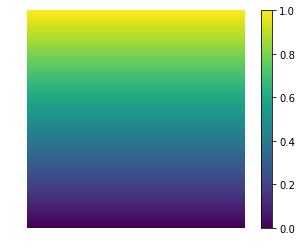

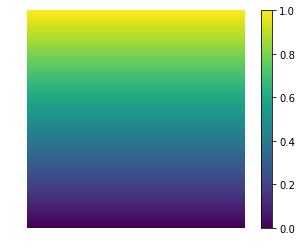

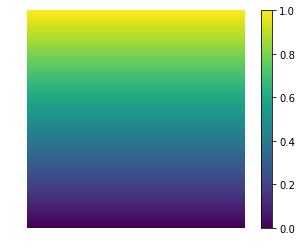

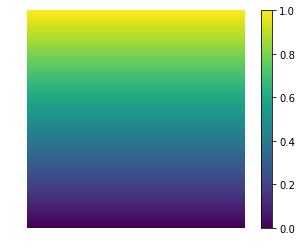

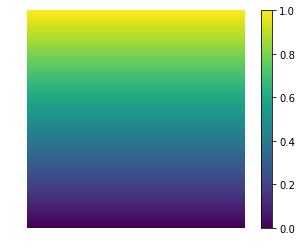

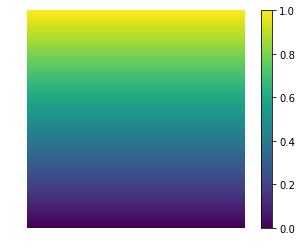

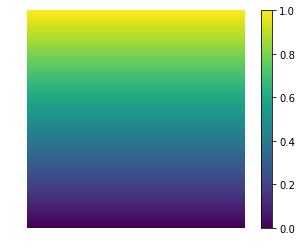

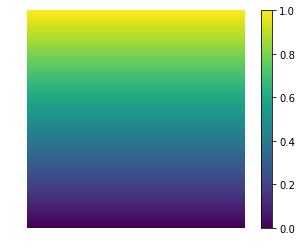

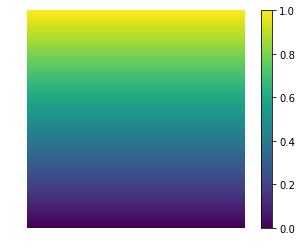

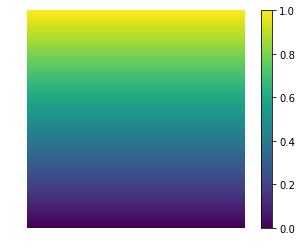

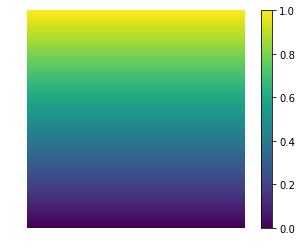

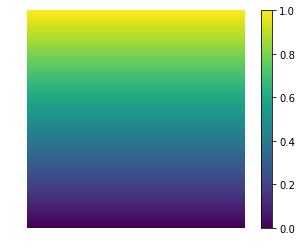

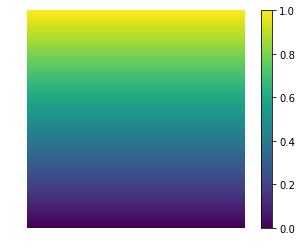

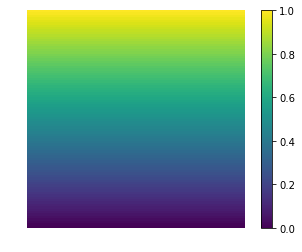

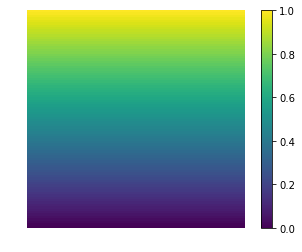

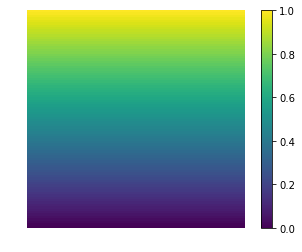

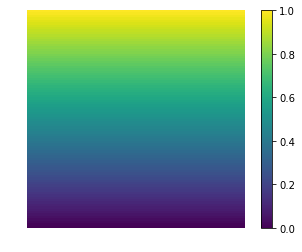

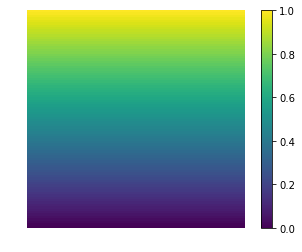

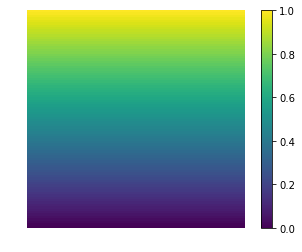

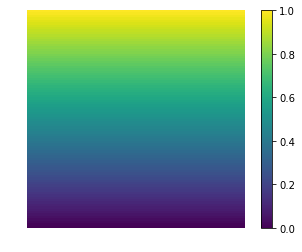

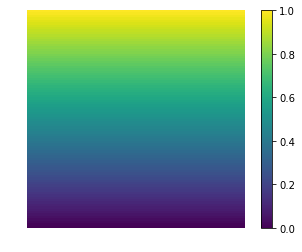

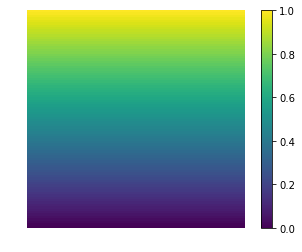

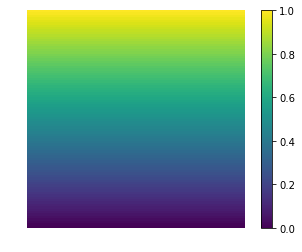

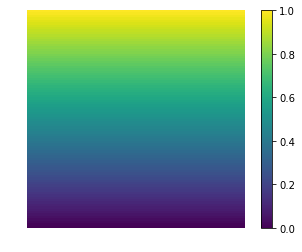

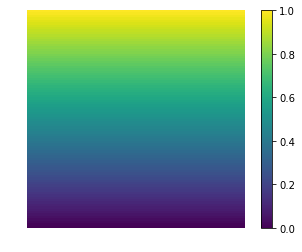

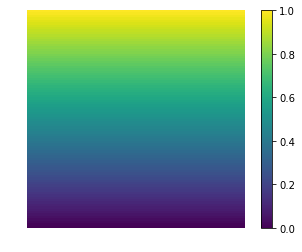

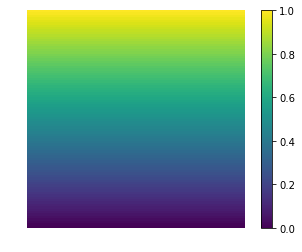

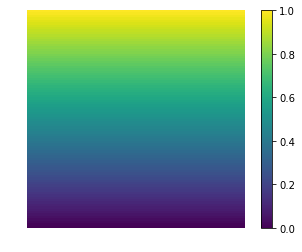

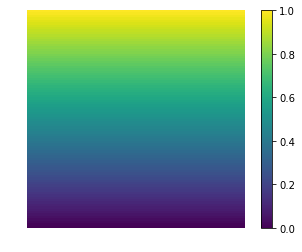

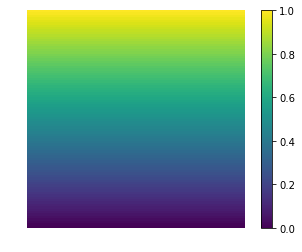

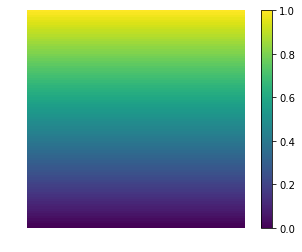

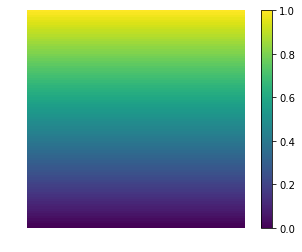

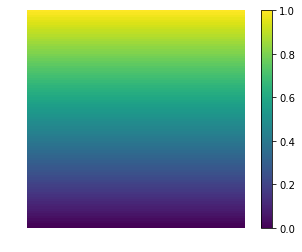

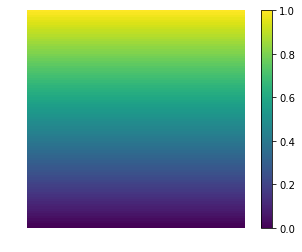

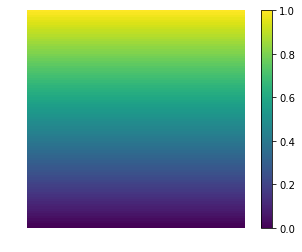

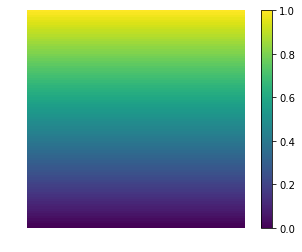

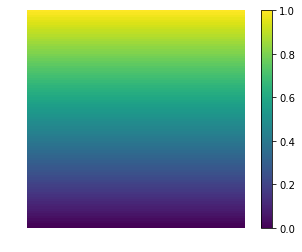

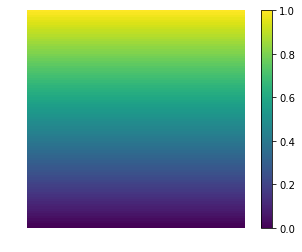

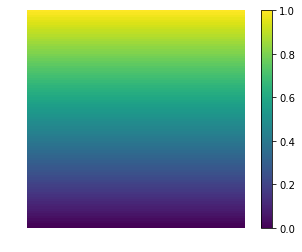

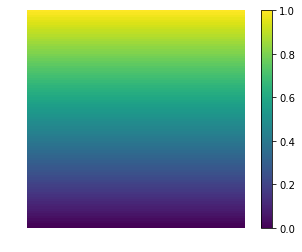

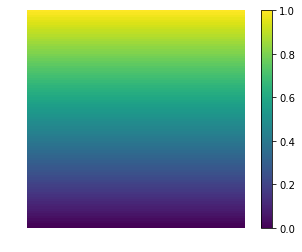

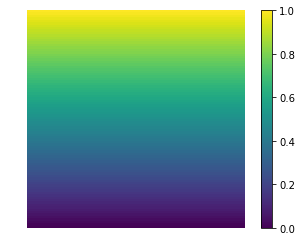

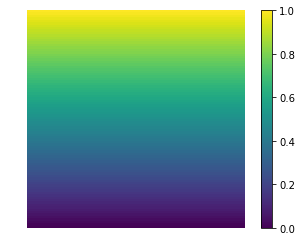

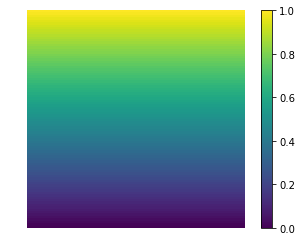

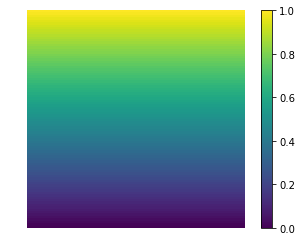

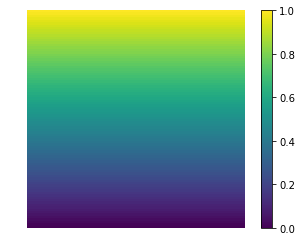

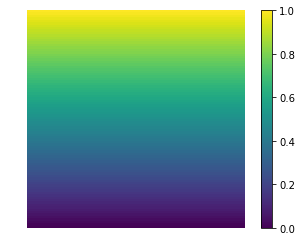

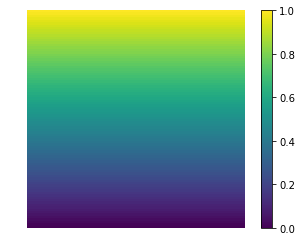

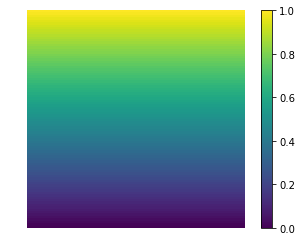

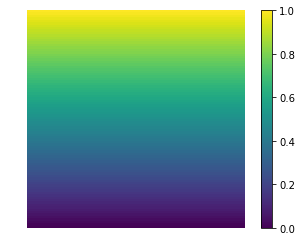

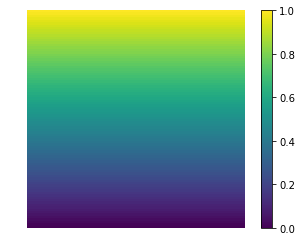

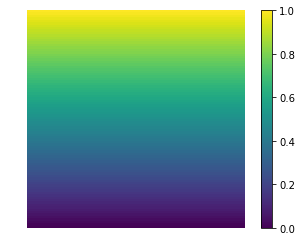

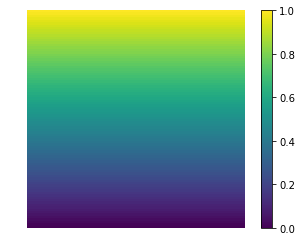

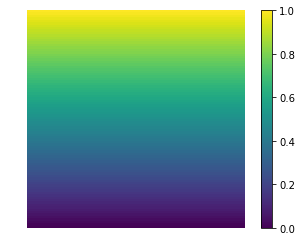

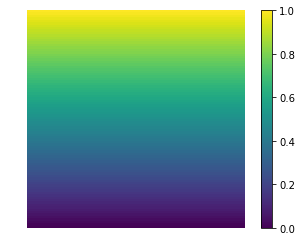

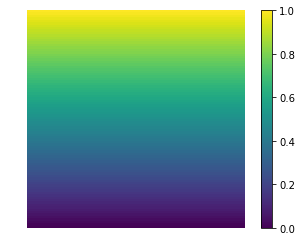

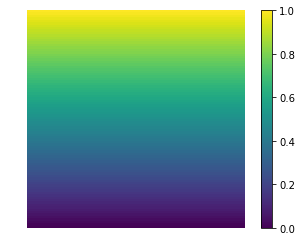

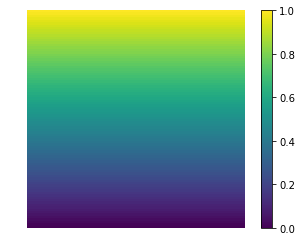

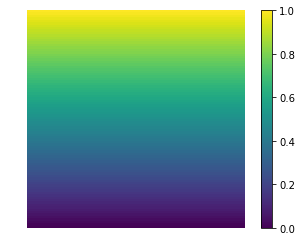

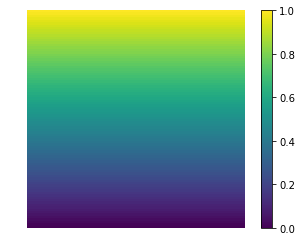

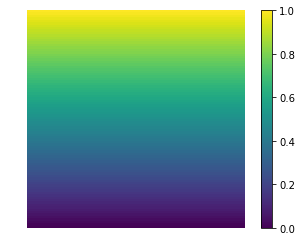

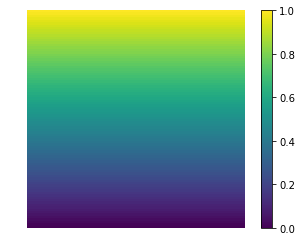

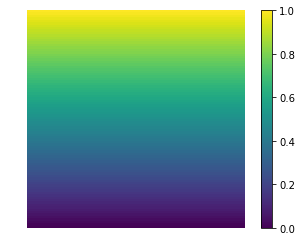

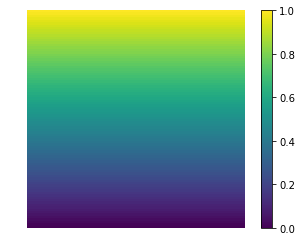

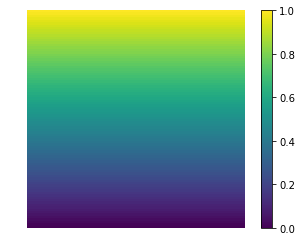

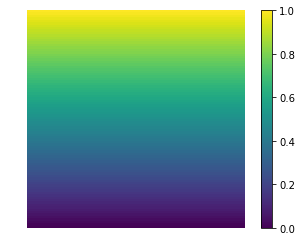

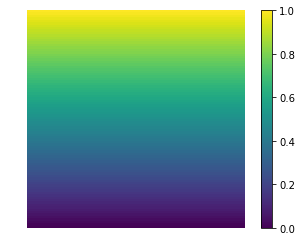

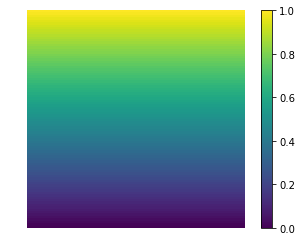

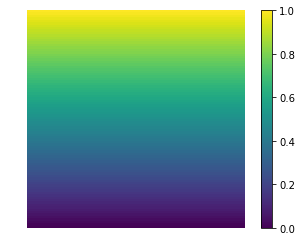

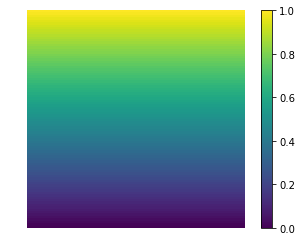

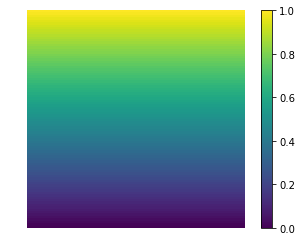

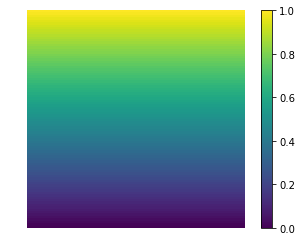

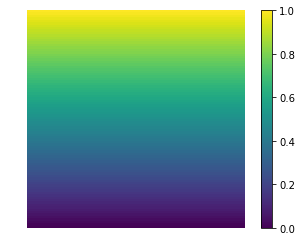

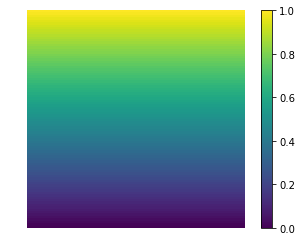

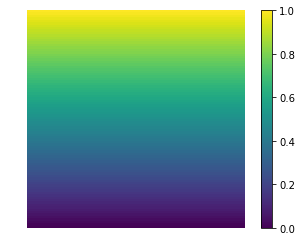

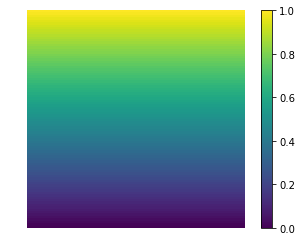

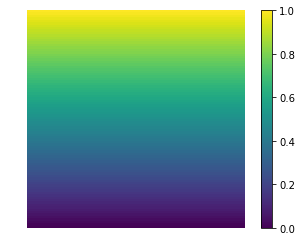

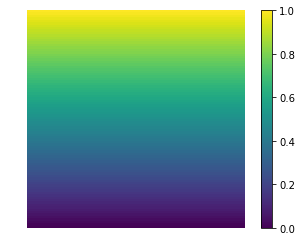

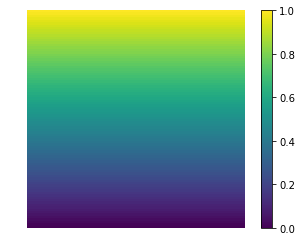

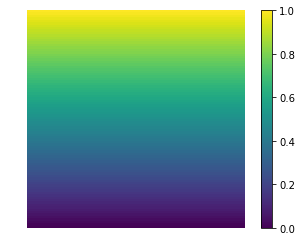

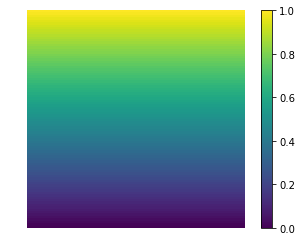

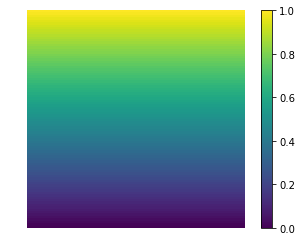

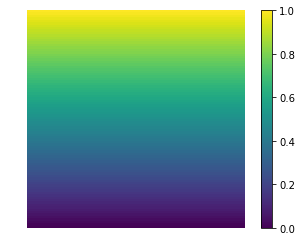

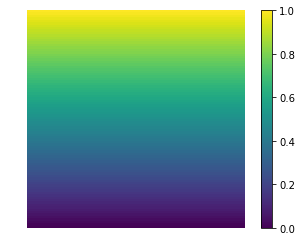

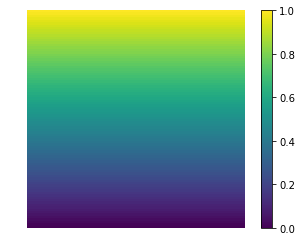

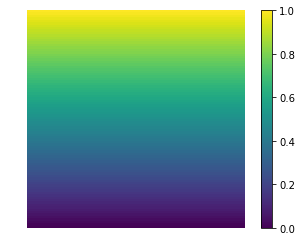

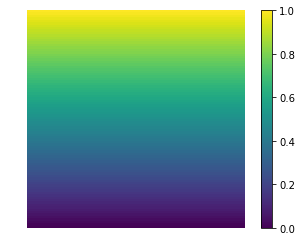

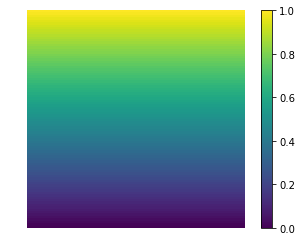

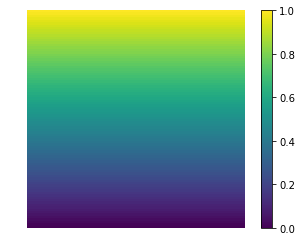

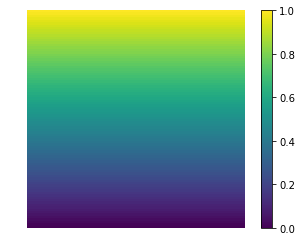

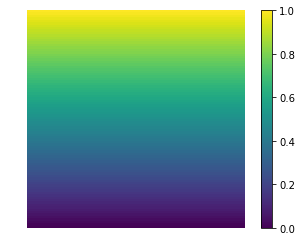

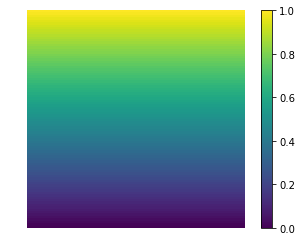

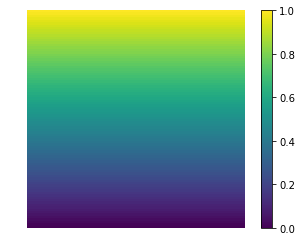

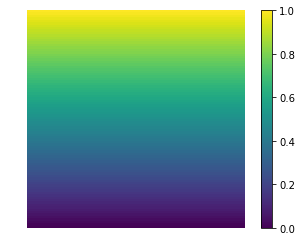

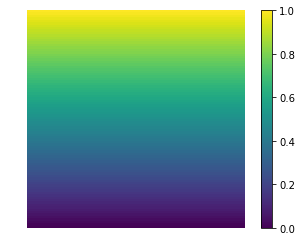

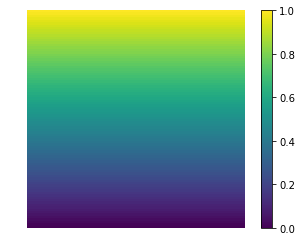

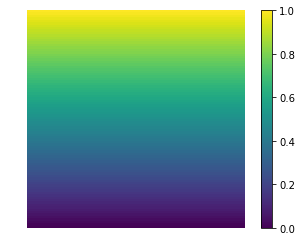

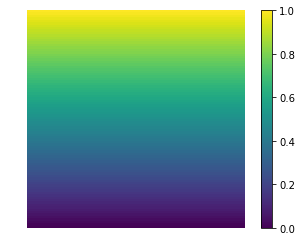

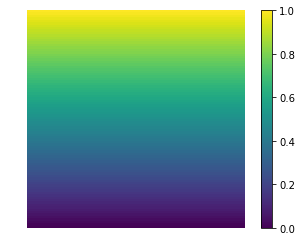

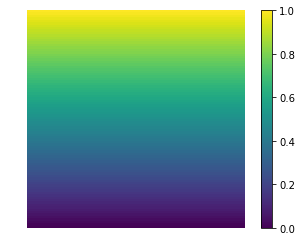

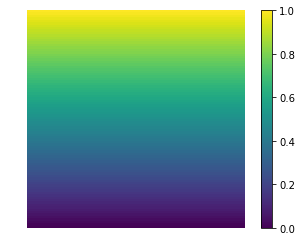

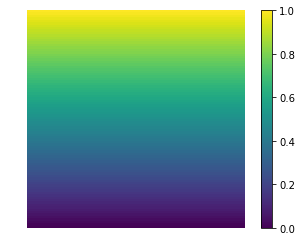

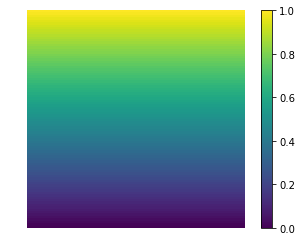

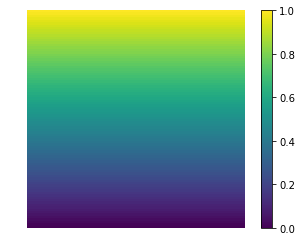

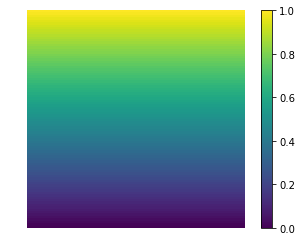

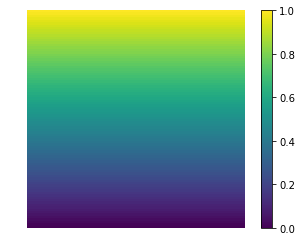

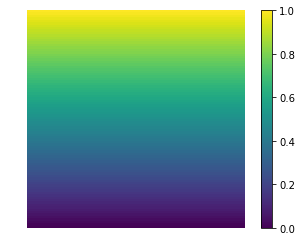

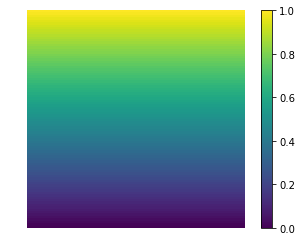

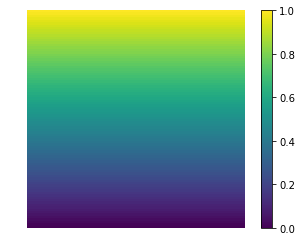

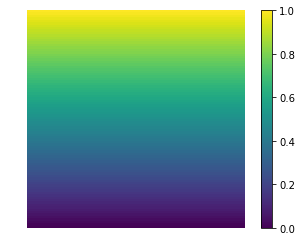

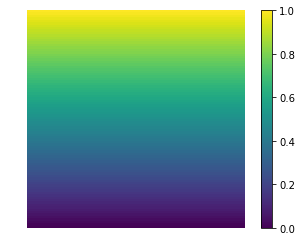

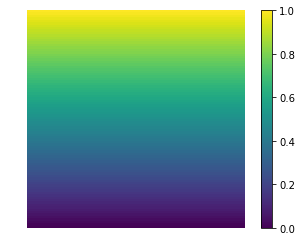

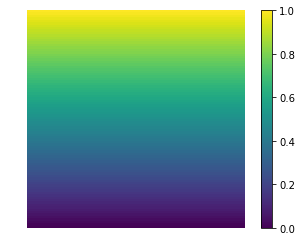

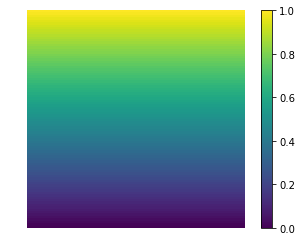

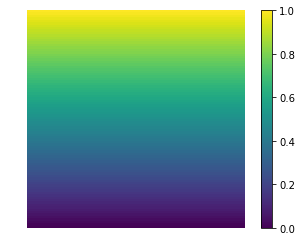

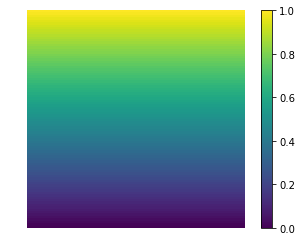

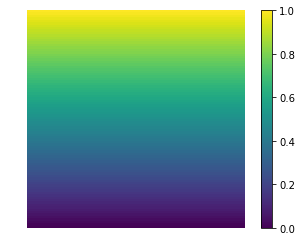

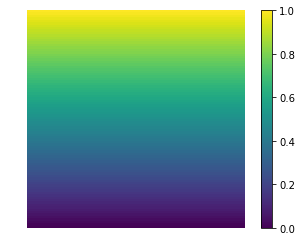

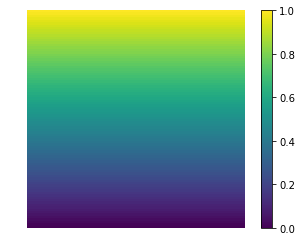

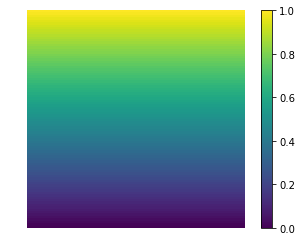

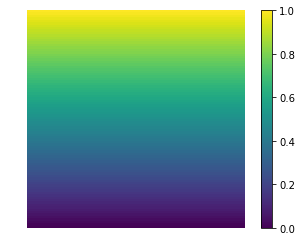

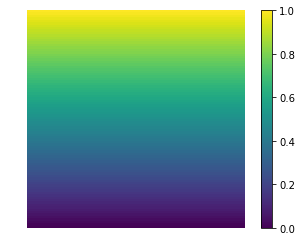

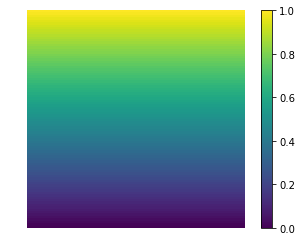

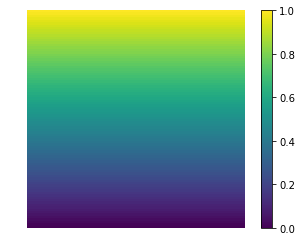

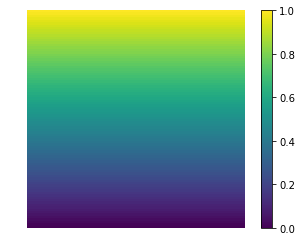

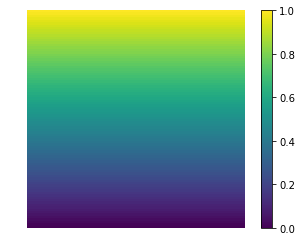

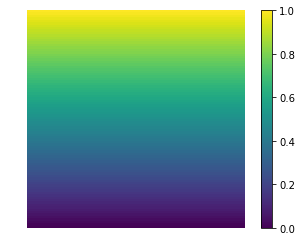

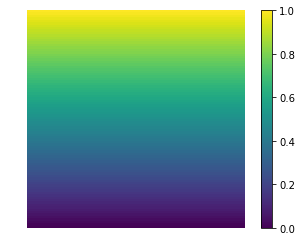

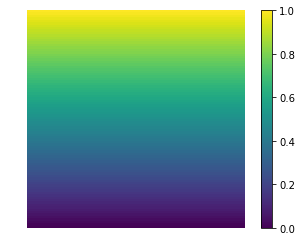

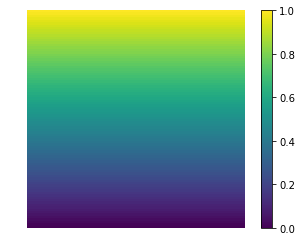

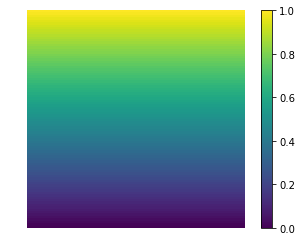

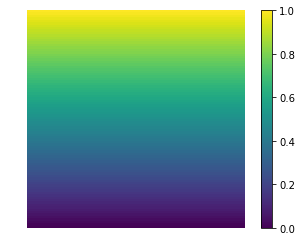

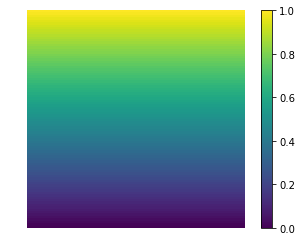

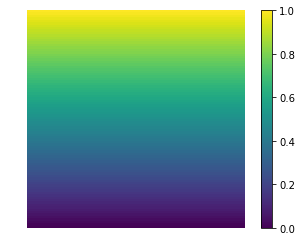

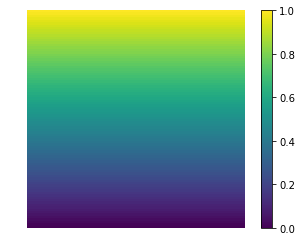

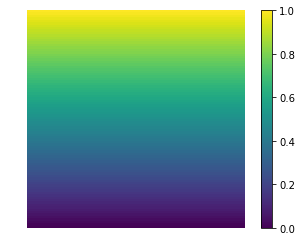

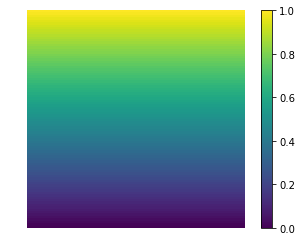

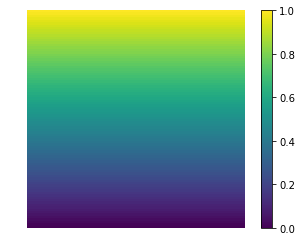

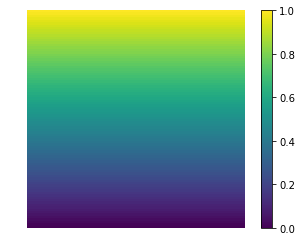

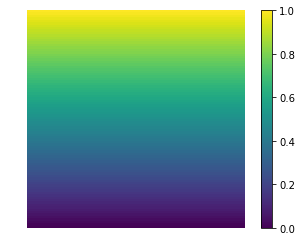

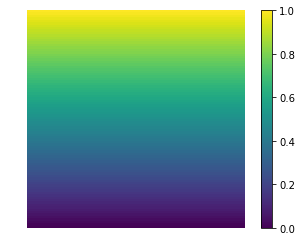

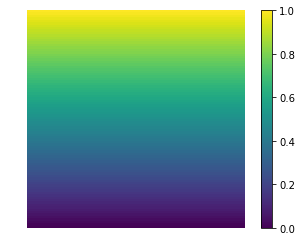

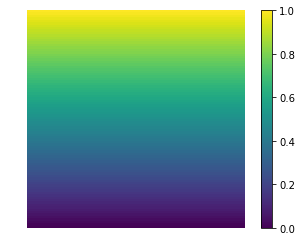

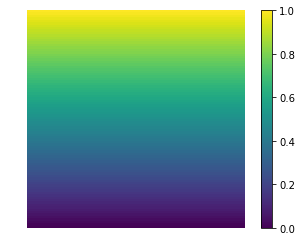

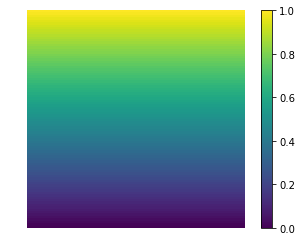

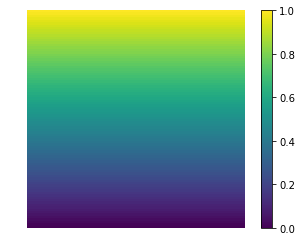

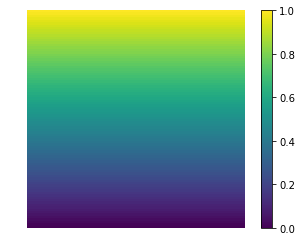

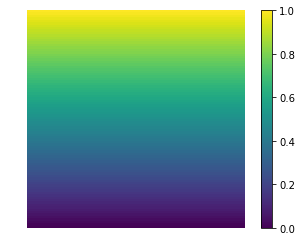

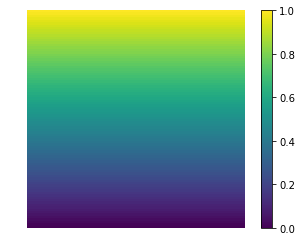

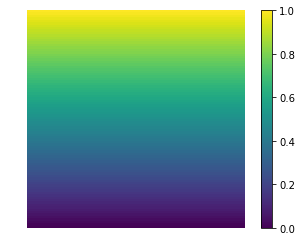

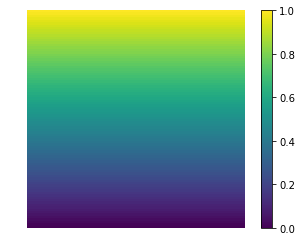

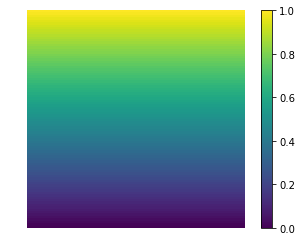

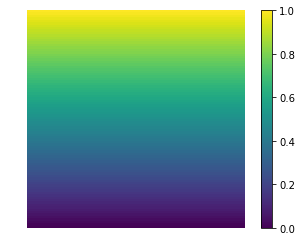

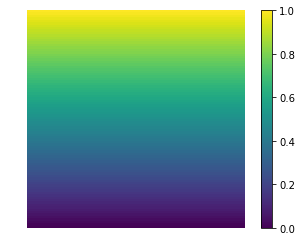

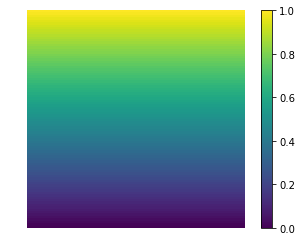

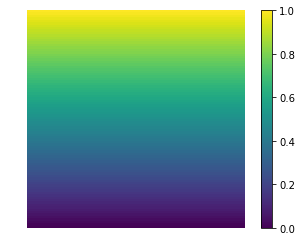

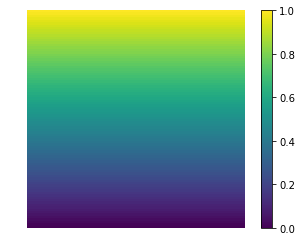

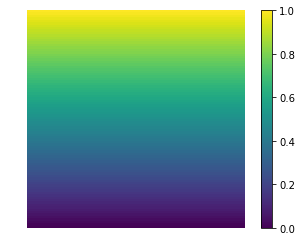

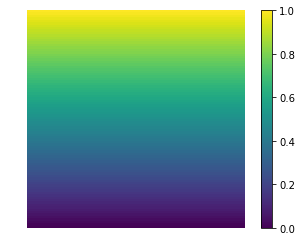

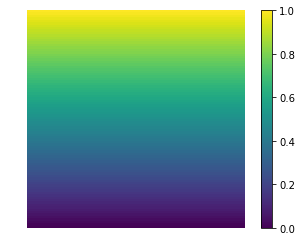

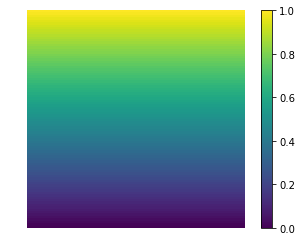

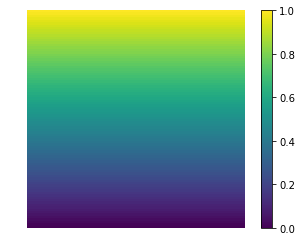

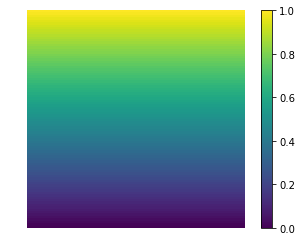

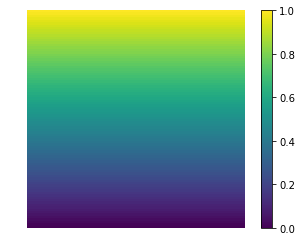

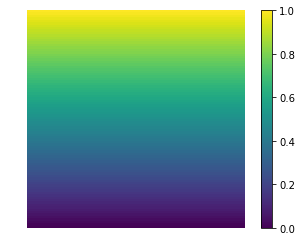

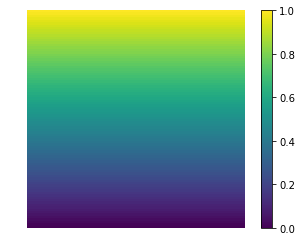

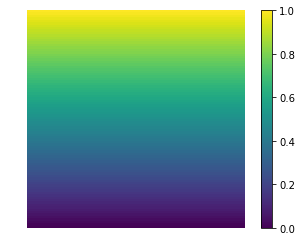

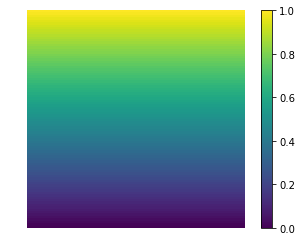

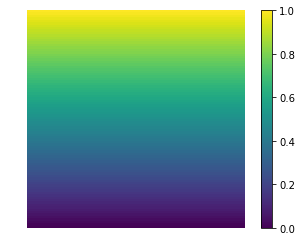

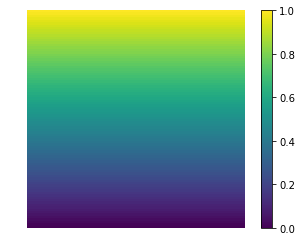

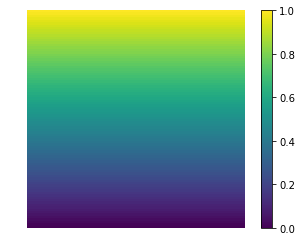

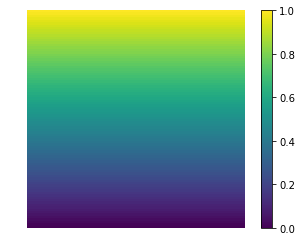

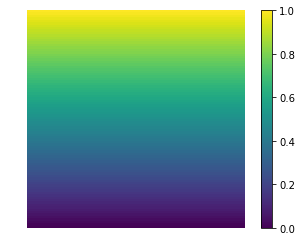

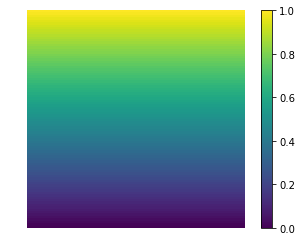

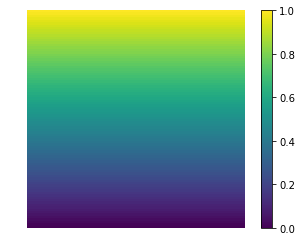

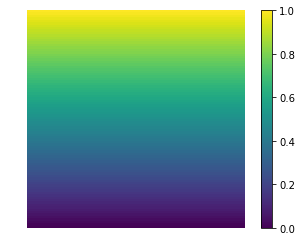

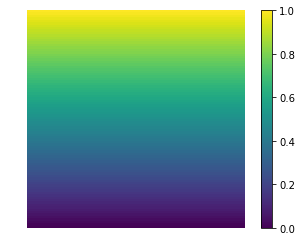

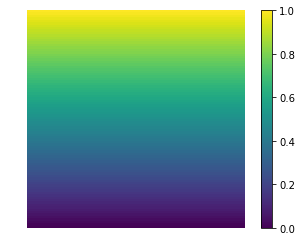

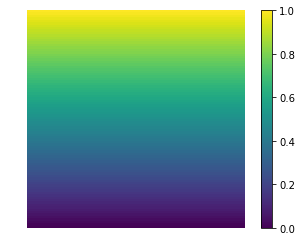

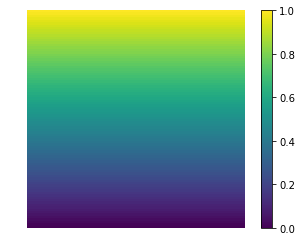

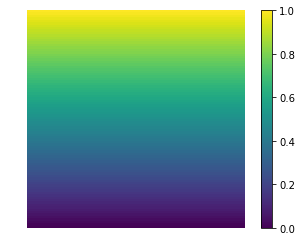

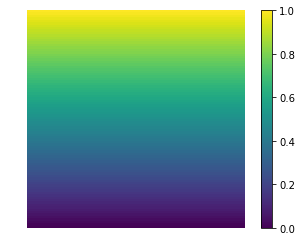

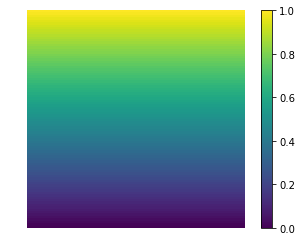

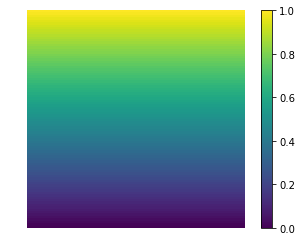

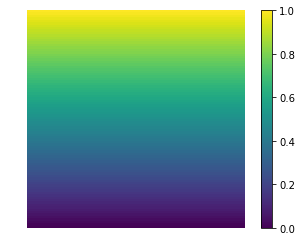

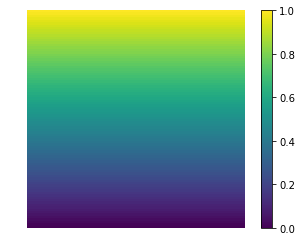

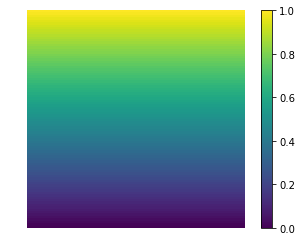

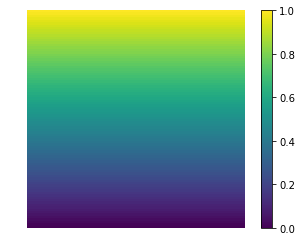

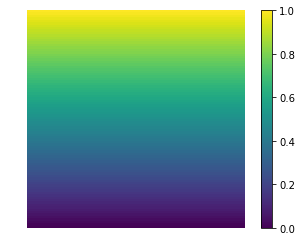

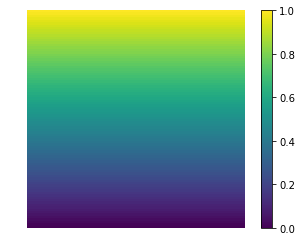

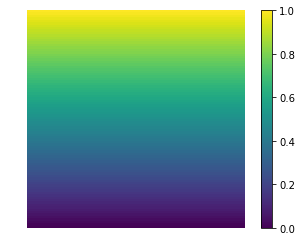

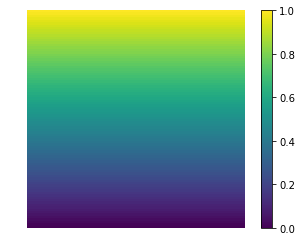

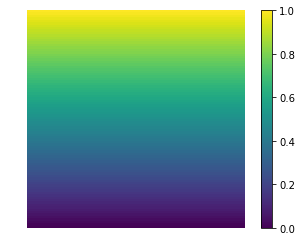

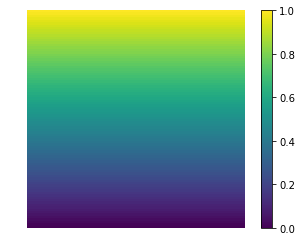

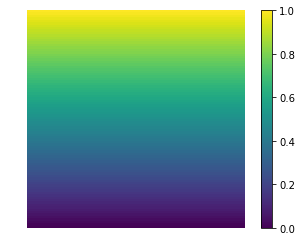

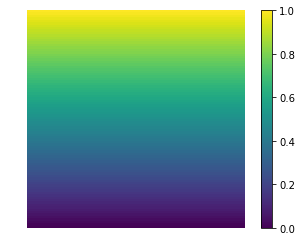

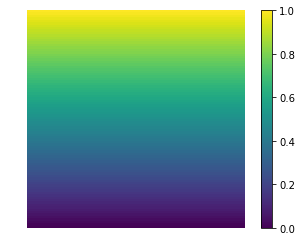

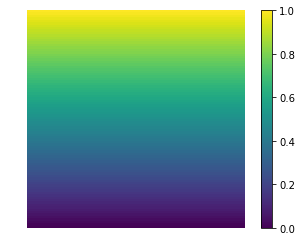

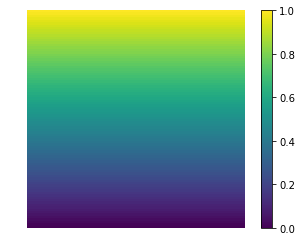

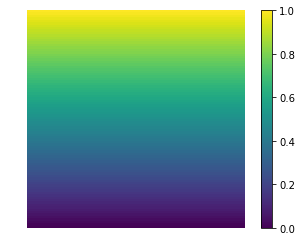

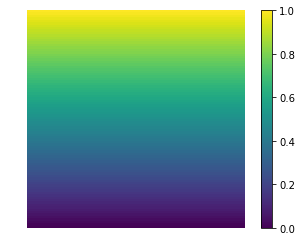

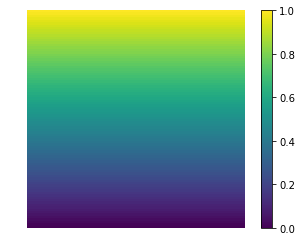

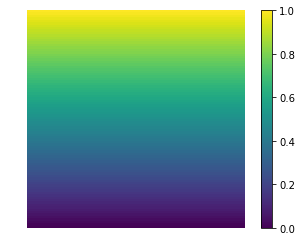

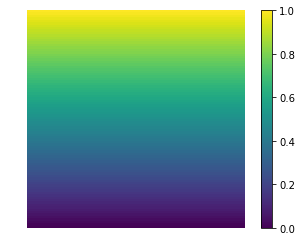

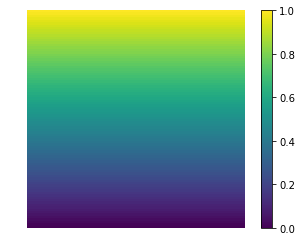

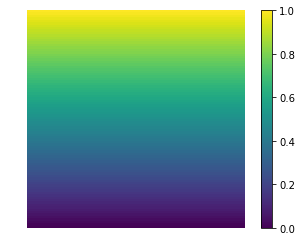

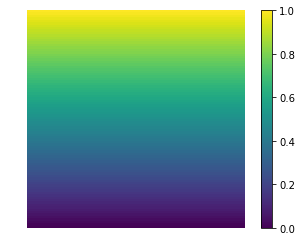

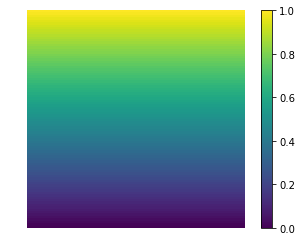

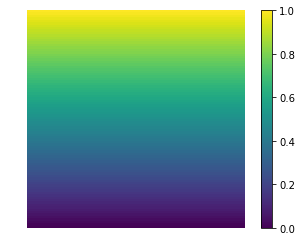

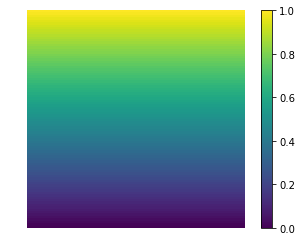

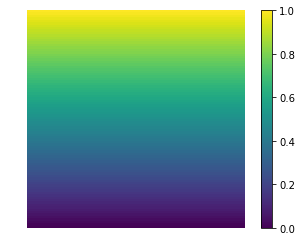

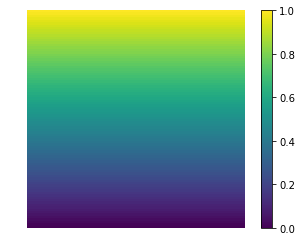

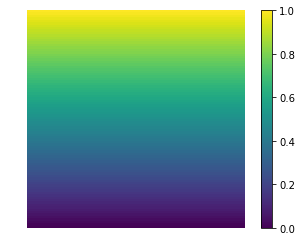

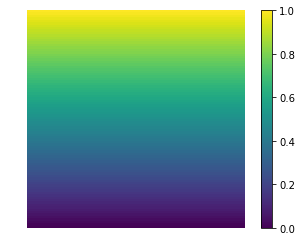

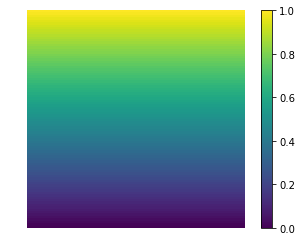

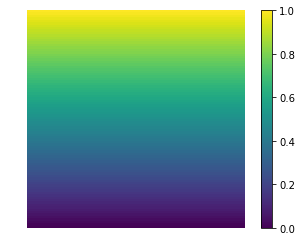

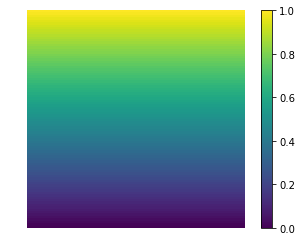

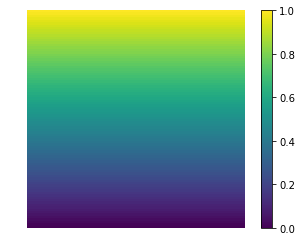

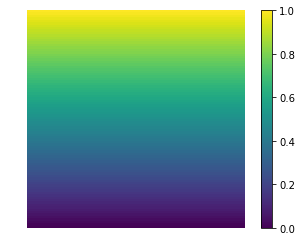

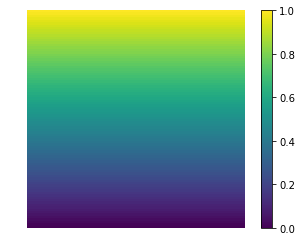

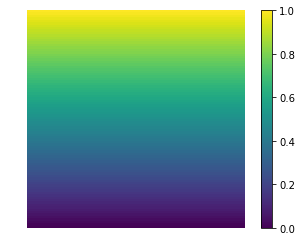

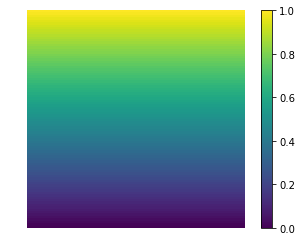

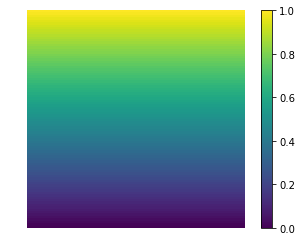

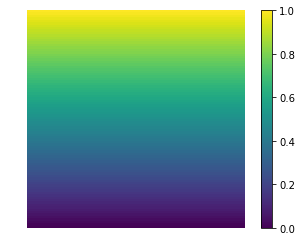

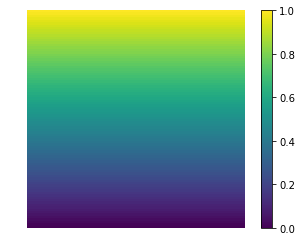

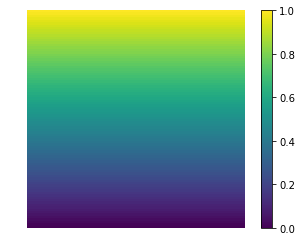

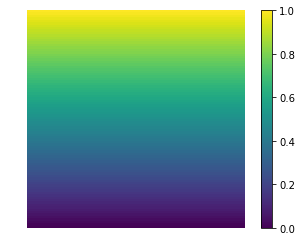

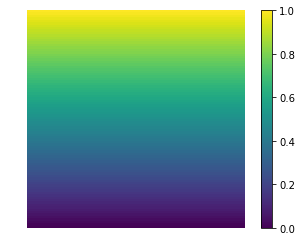

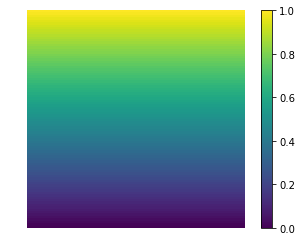

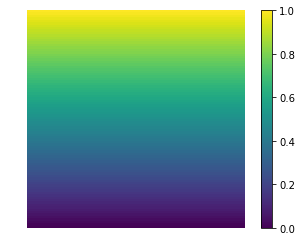

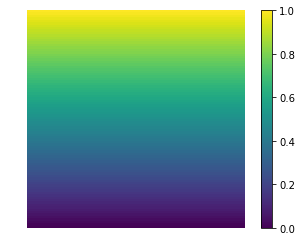

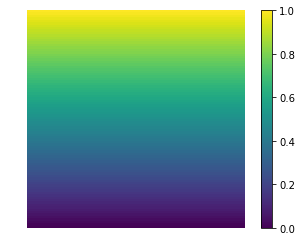

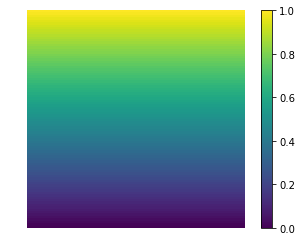

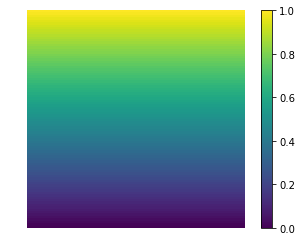

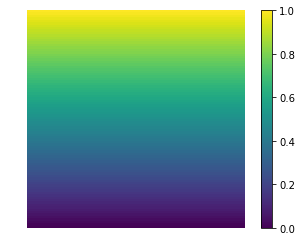

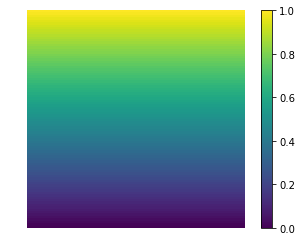

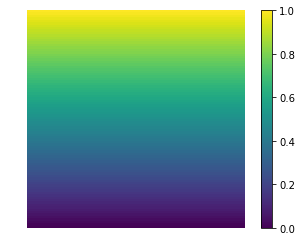

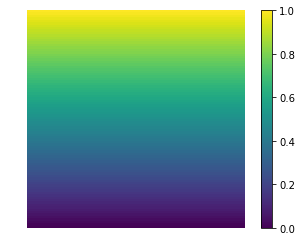

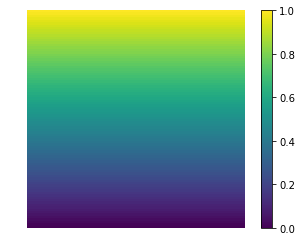

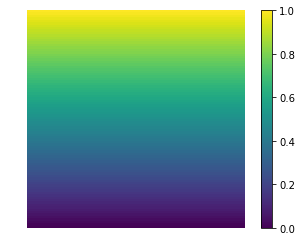

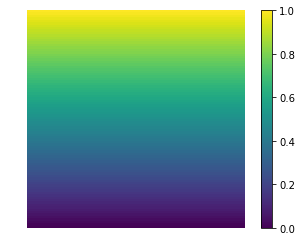

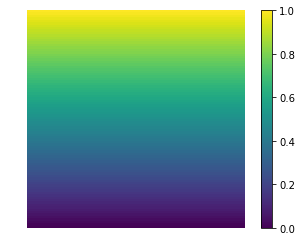

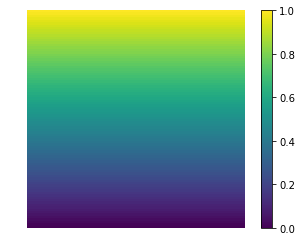

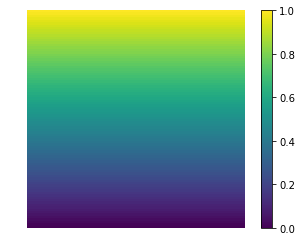

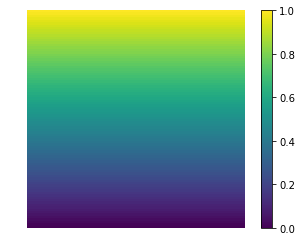

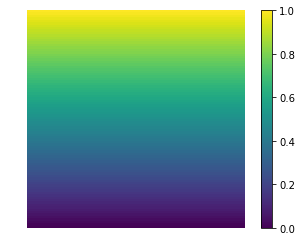

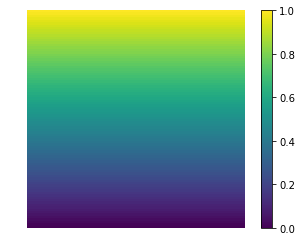

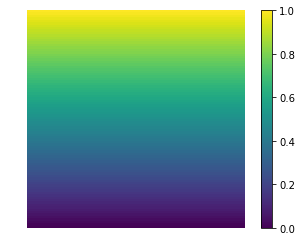

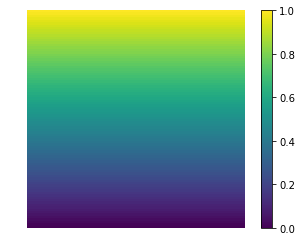

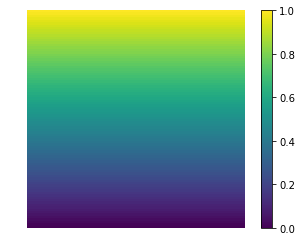

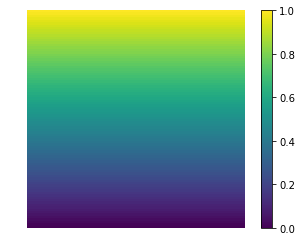

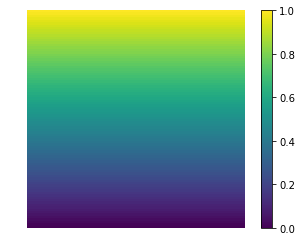

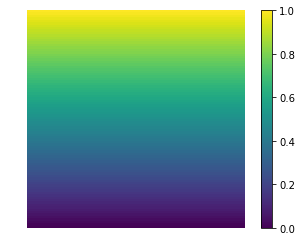

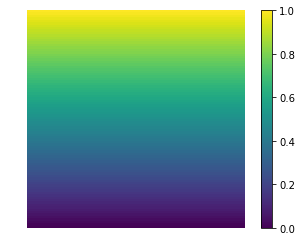

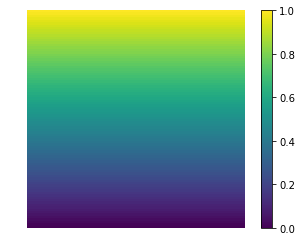

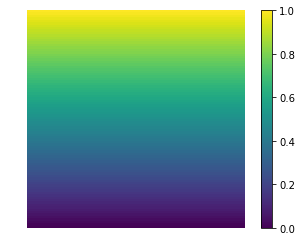

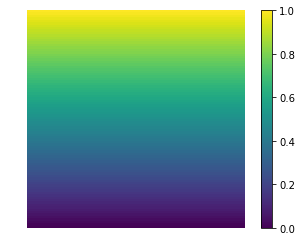

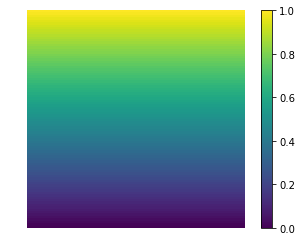

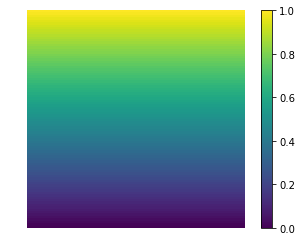

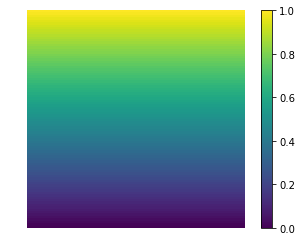

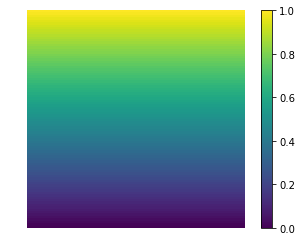

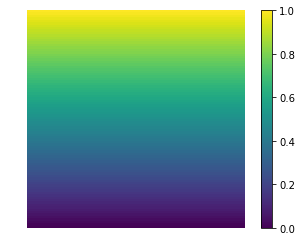

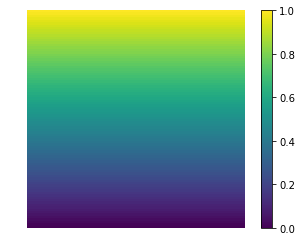

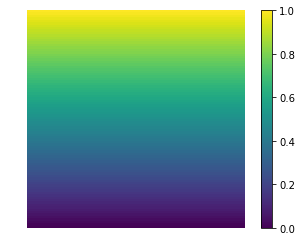

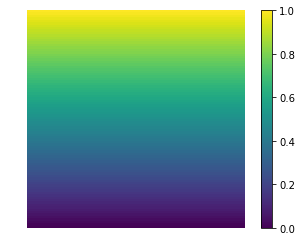

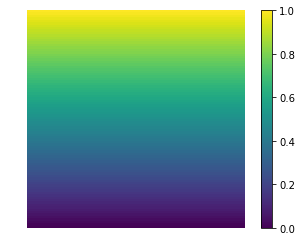

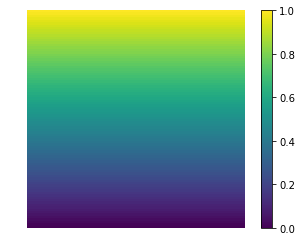

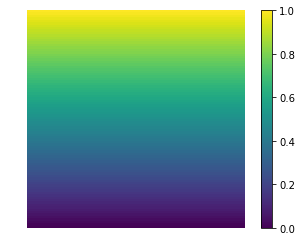

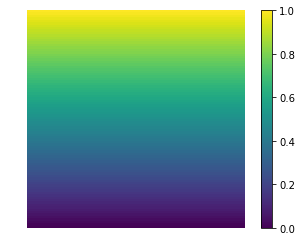

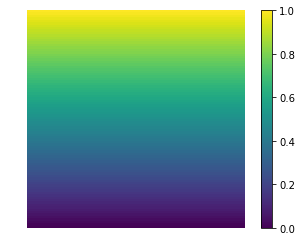

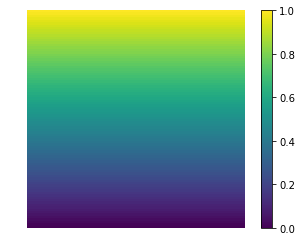

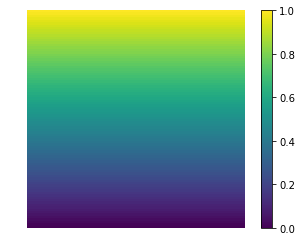

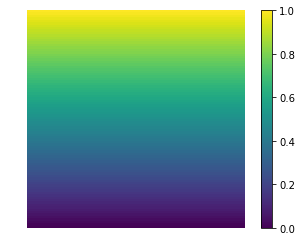

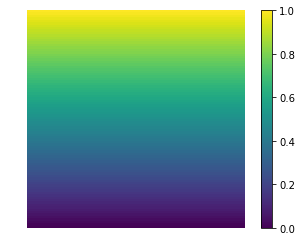

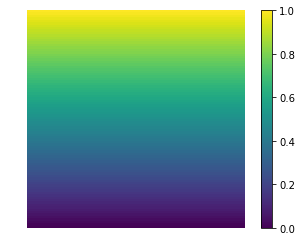

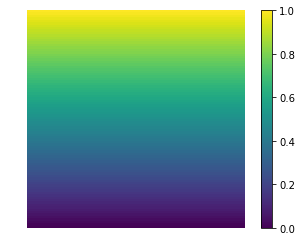

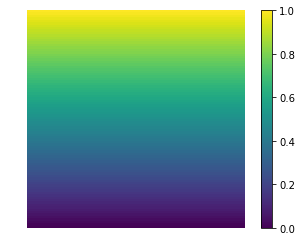

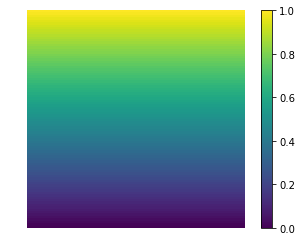

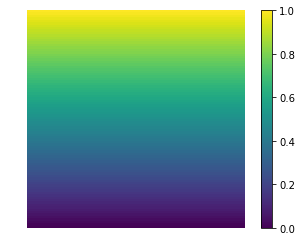

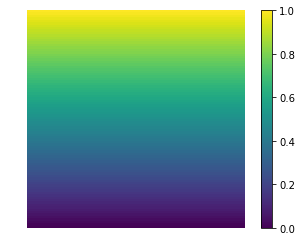

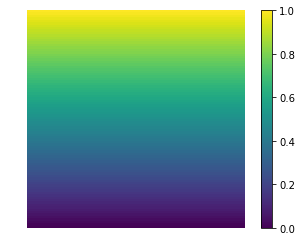

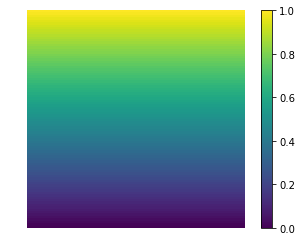

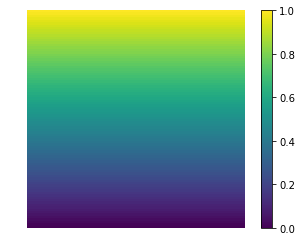

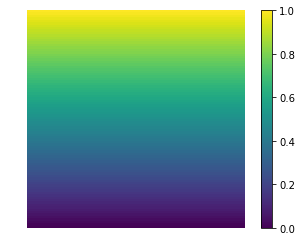

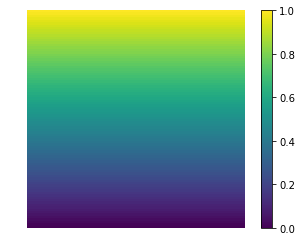

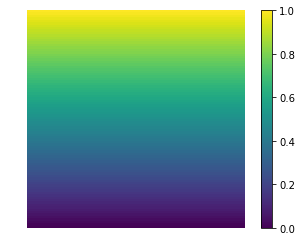

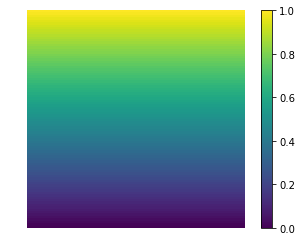

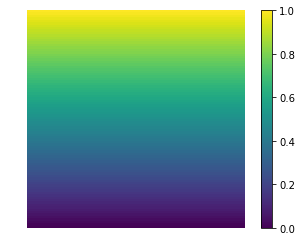

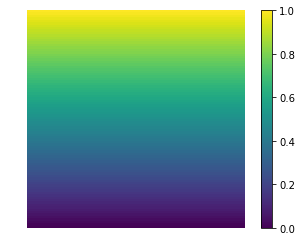

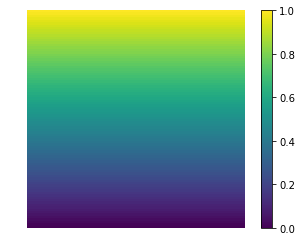

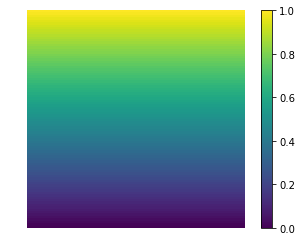

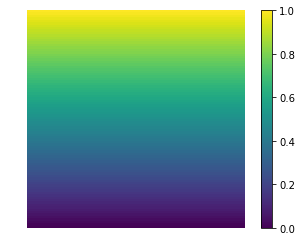

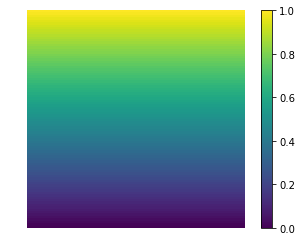

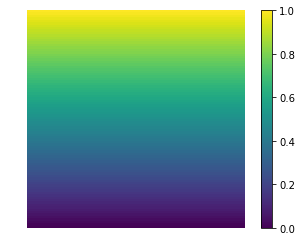

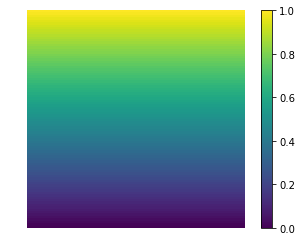

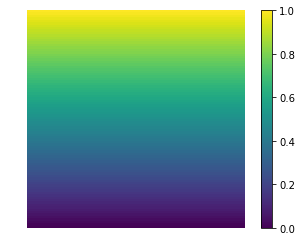

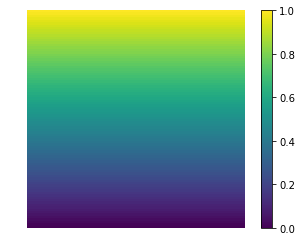

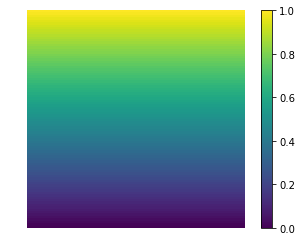

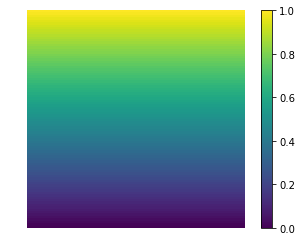

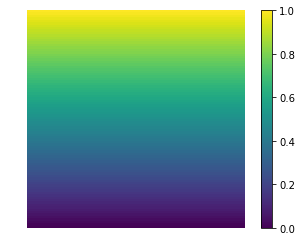

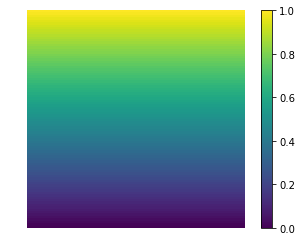

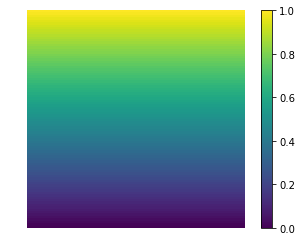

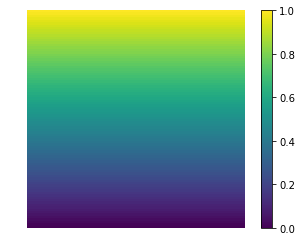

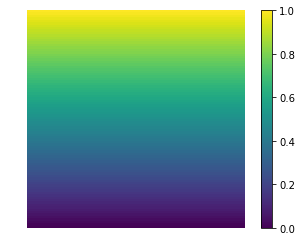

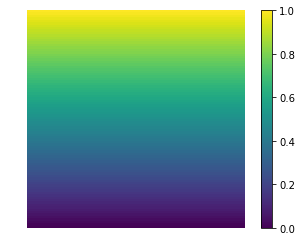

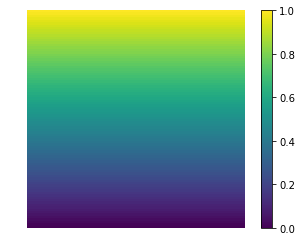

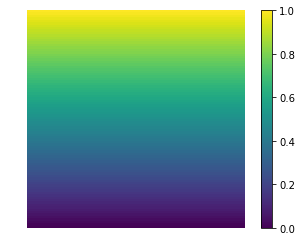

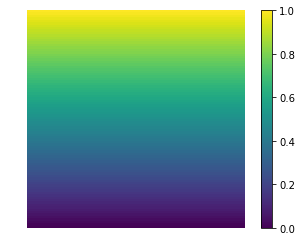

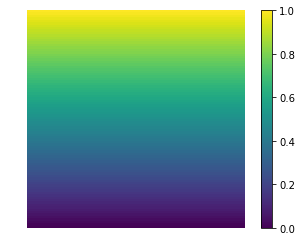

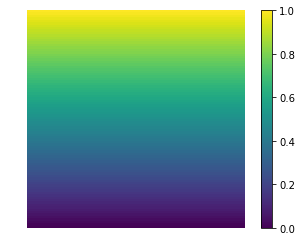

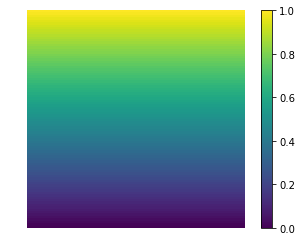

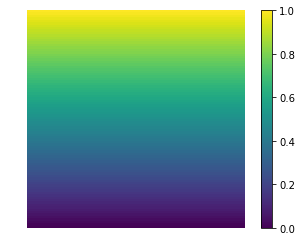

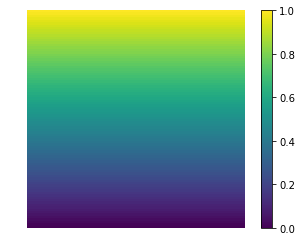

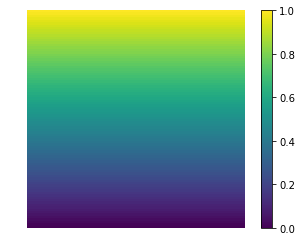

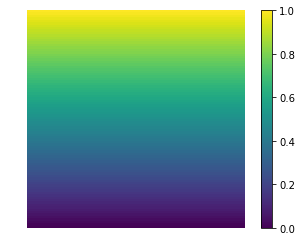

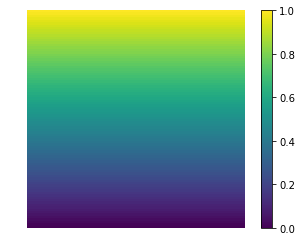

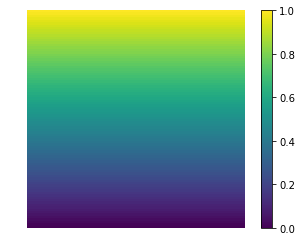

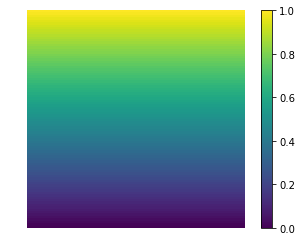

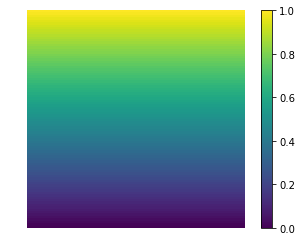

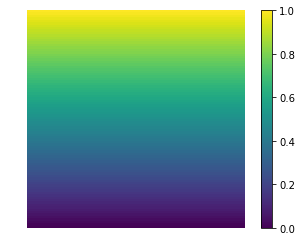

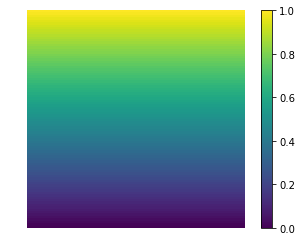

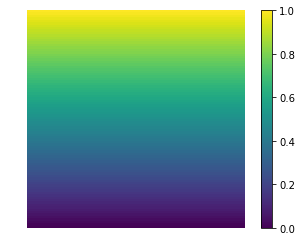

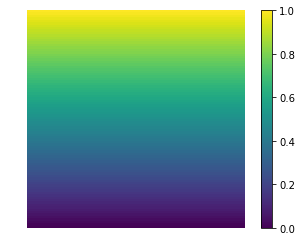

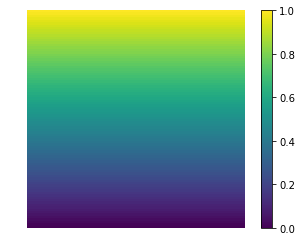

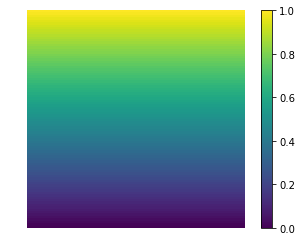

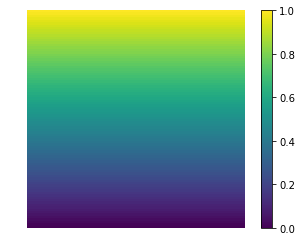

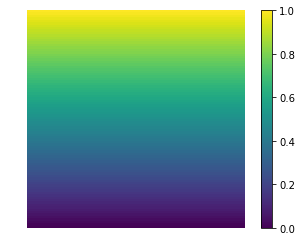

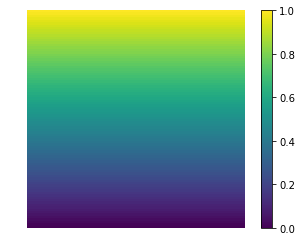

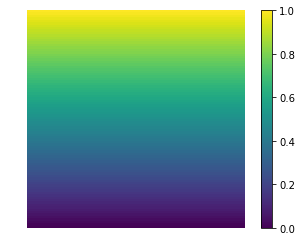

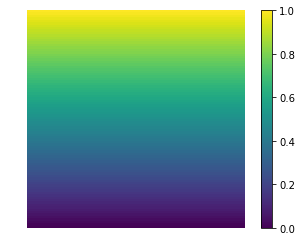

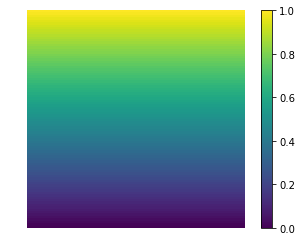

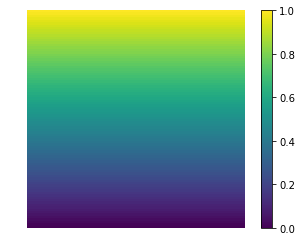

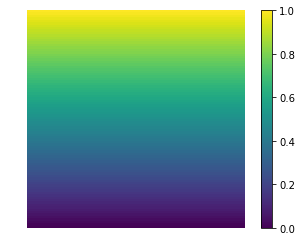

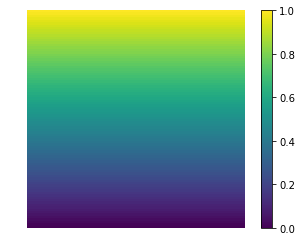

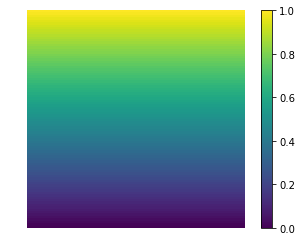

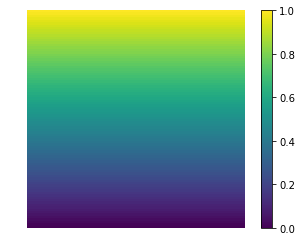

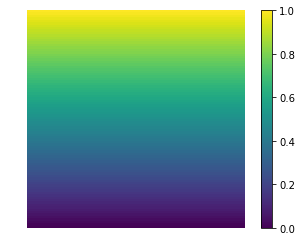

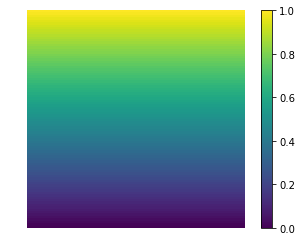

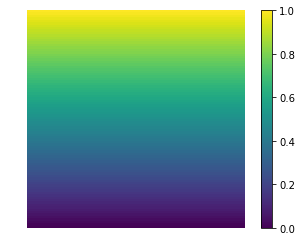

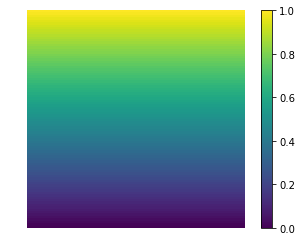

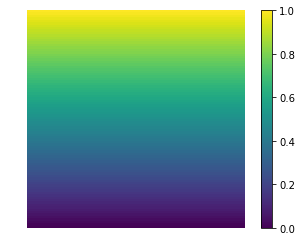

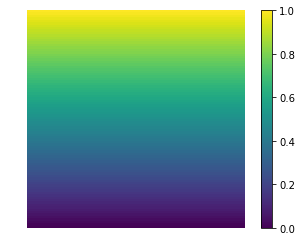

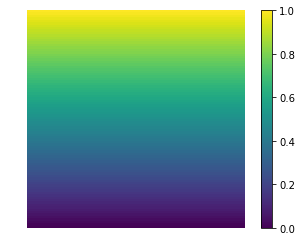

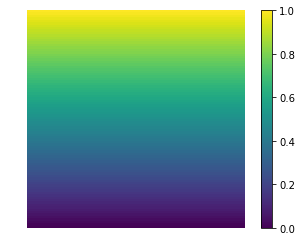

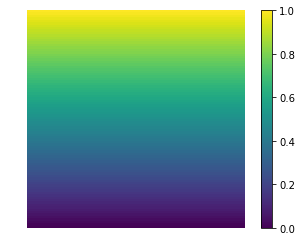

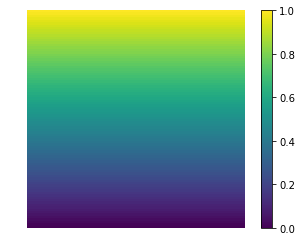

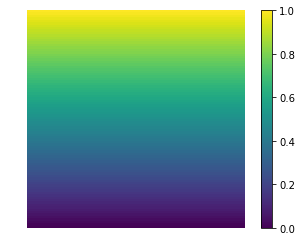

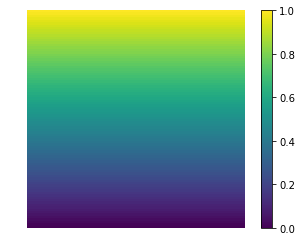

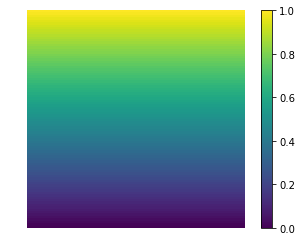

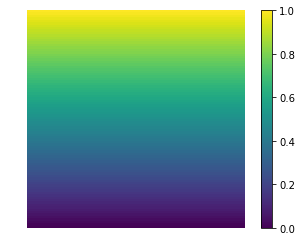

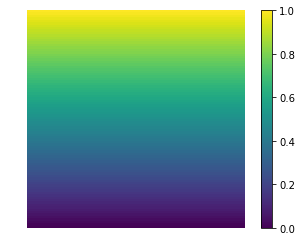

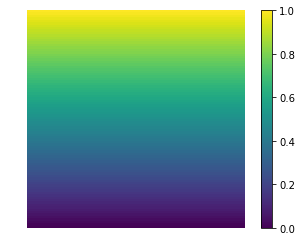

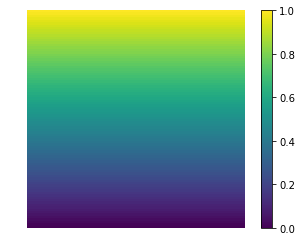

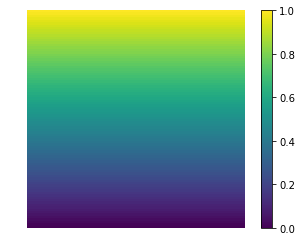

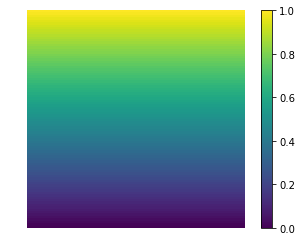

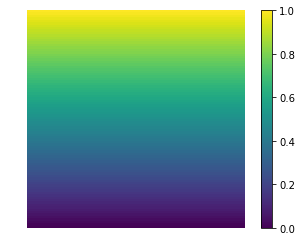

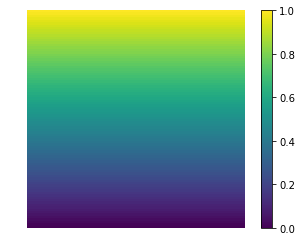

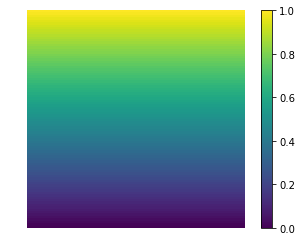

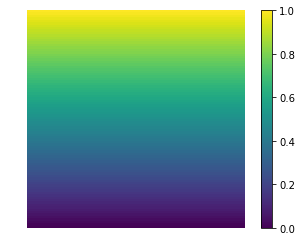

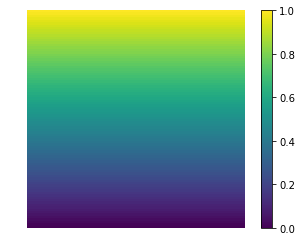

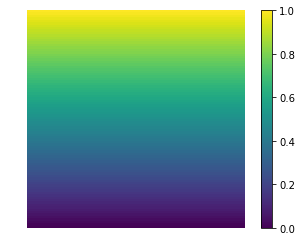

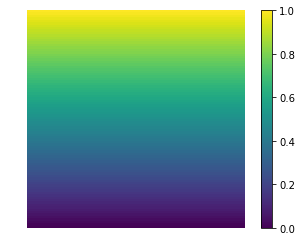

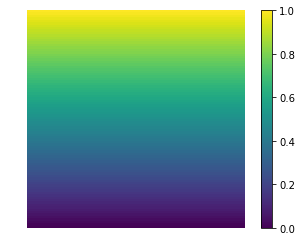

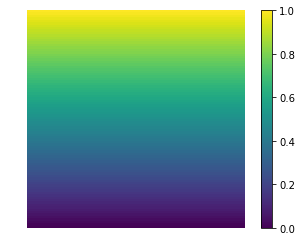

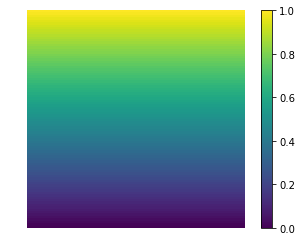

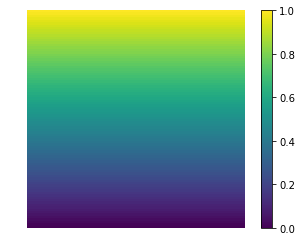

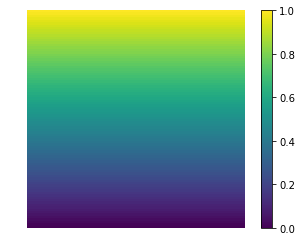

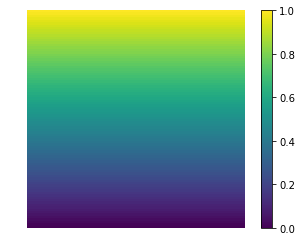

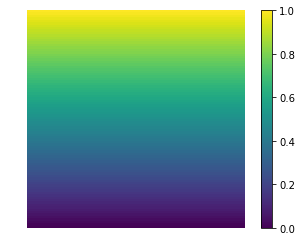

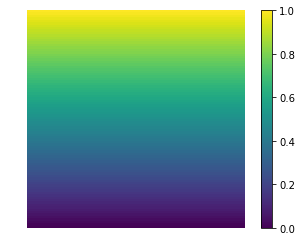

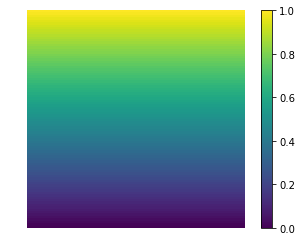

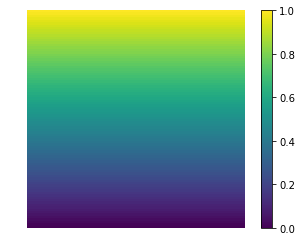

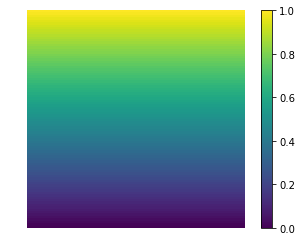

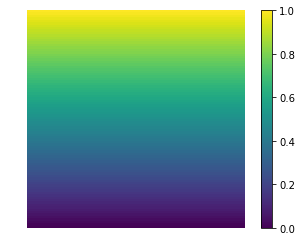

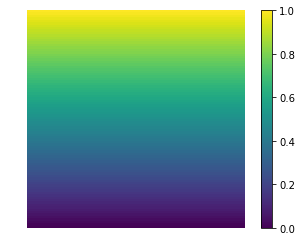

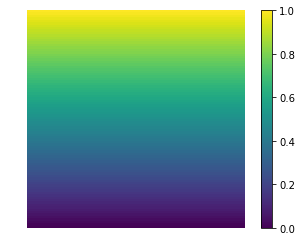

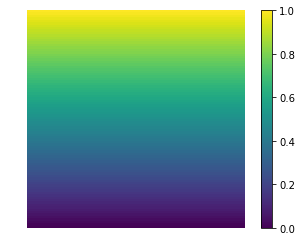

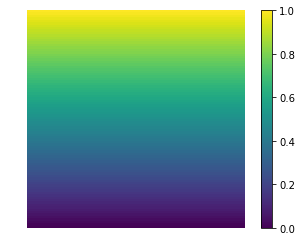

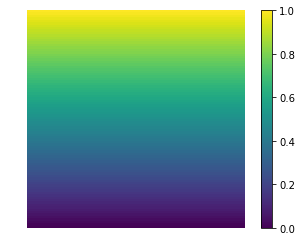

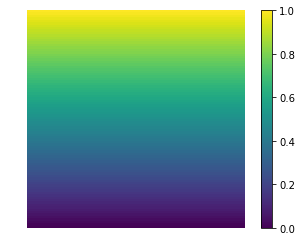

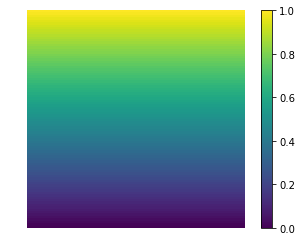

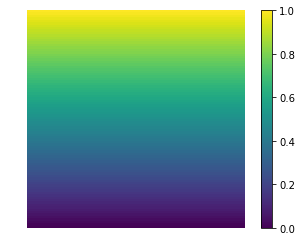

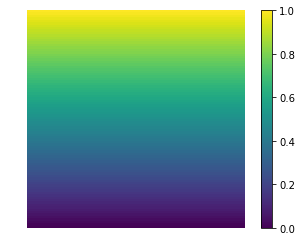

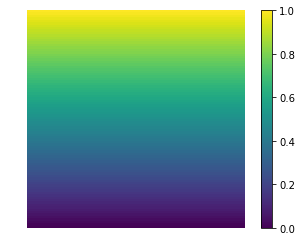

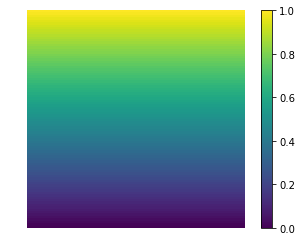

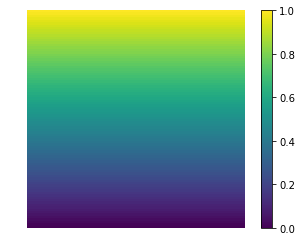

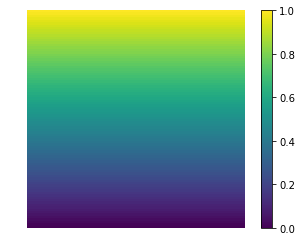

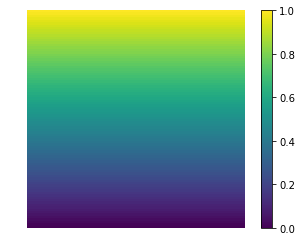

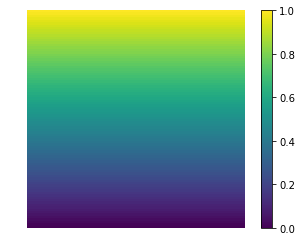

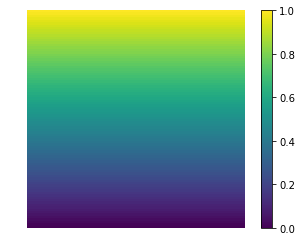

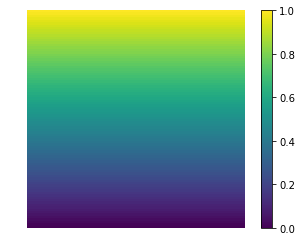

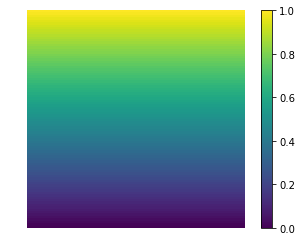

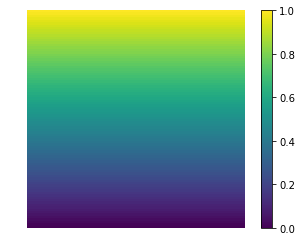

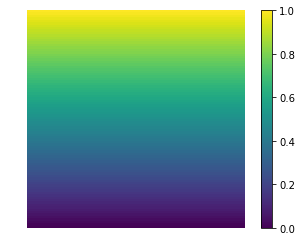

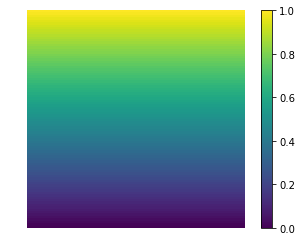

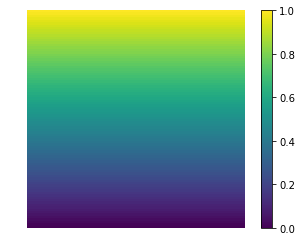

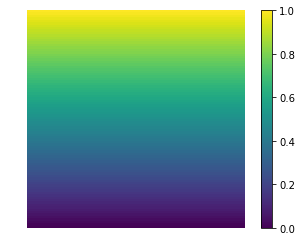

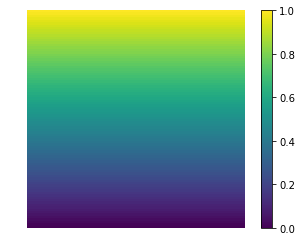

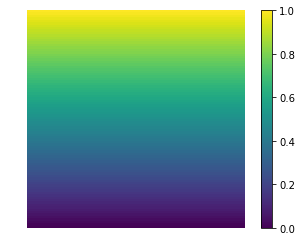

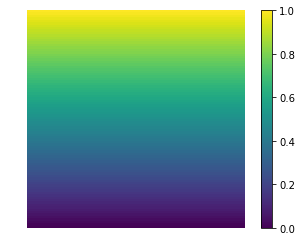

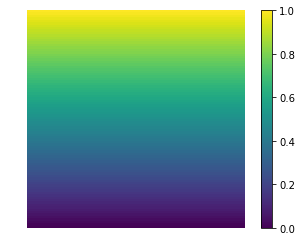

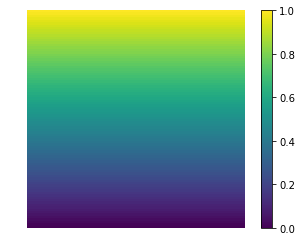

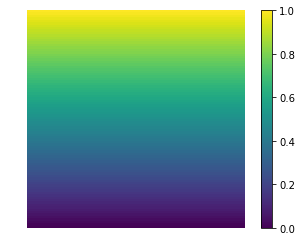

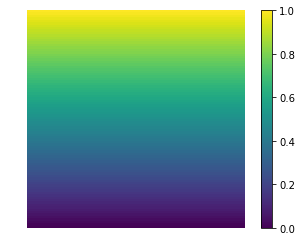

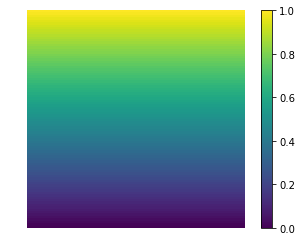

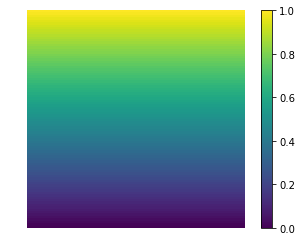

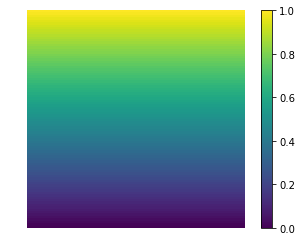

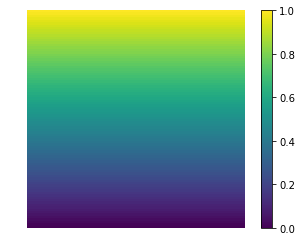

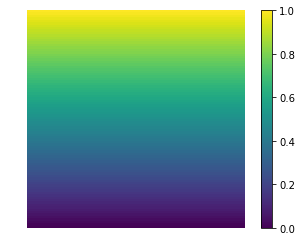

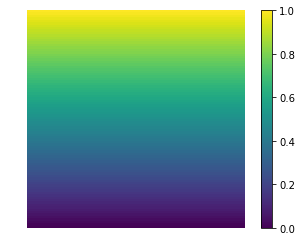

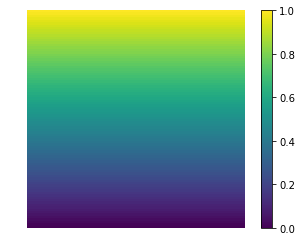

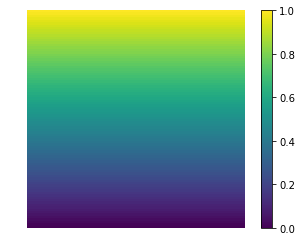

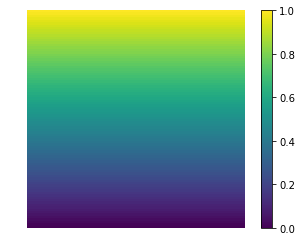

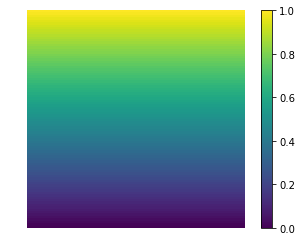

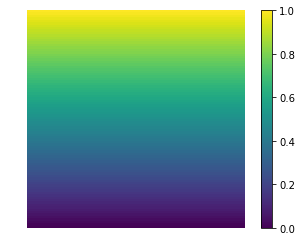

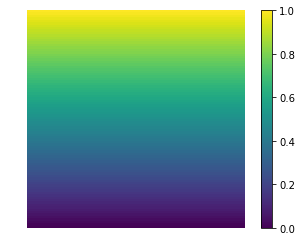

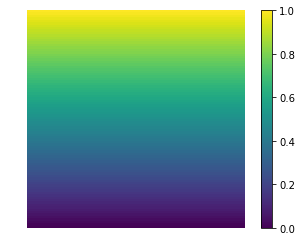

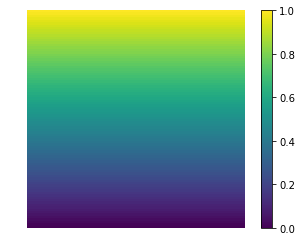

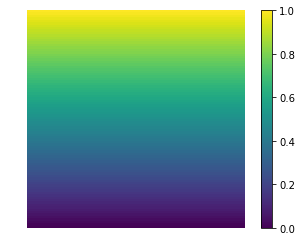

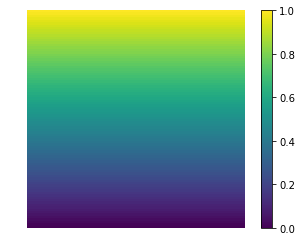

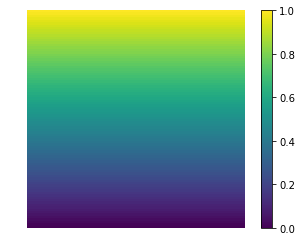

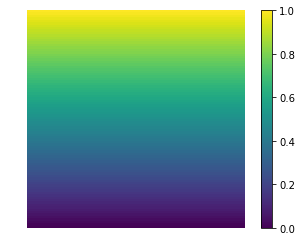

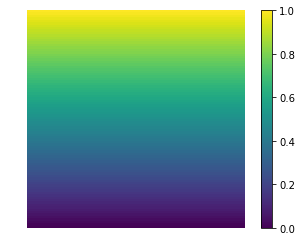

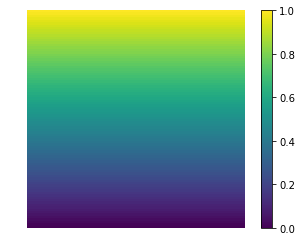

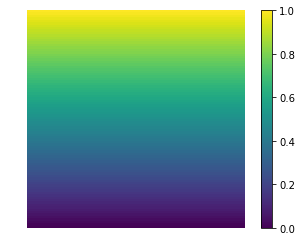

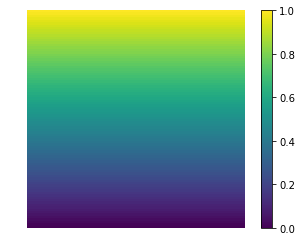

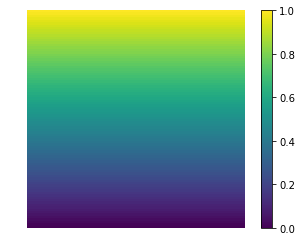

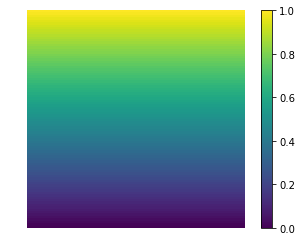

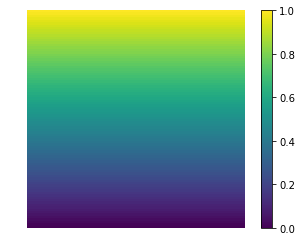

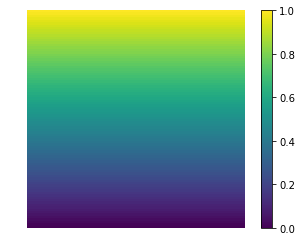

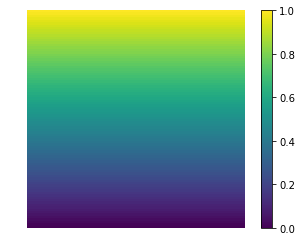

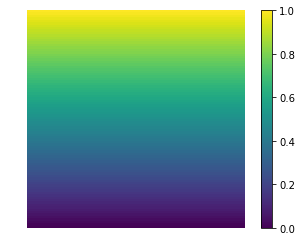

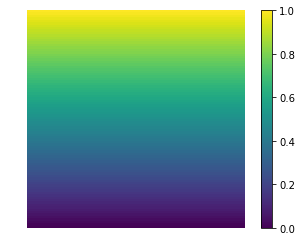

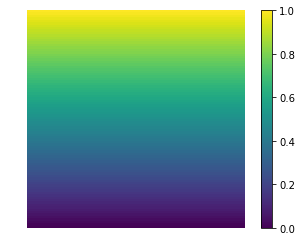

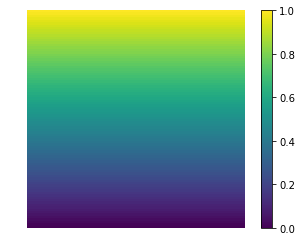

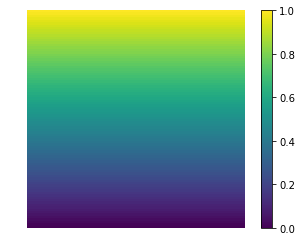

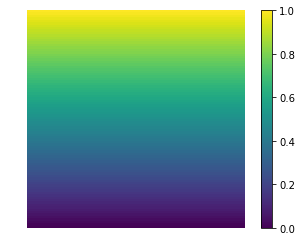

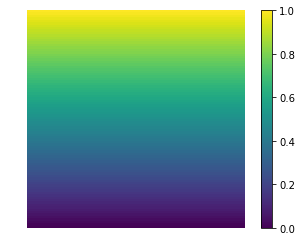

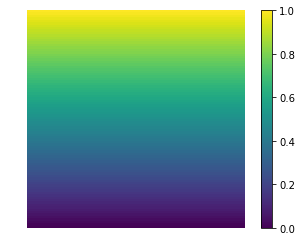

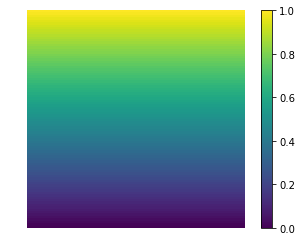

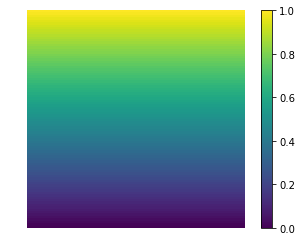

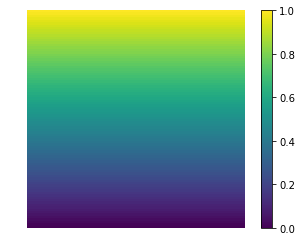

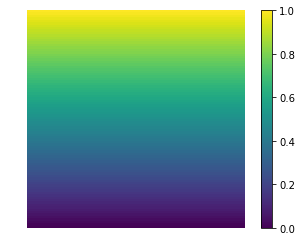

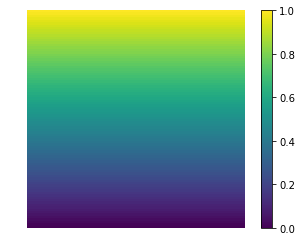

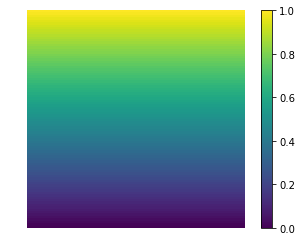

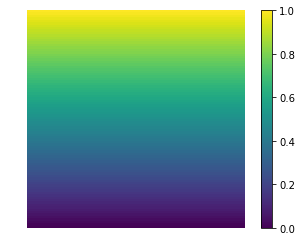

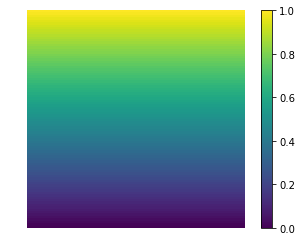

In [18]:
def time_diffusion_2d(video):
#video = 'y'
    L = 1.
    N = 90
    D = 1
    dx = L/N
    dt = 0.0001
    t_max = 1.0001
    C = (dt * D)/(dx**2)

    u = np.zeros((2,N))

        #Since the solution depends only on the y-coordinate
        #with these initial and boundary conditions
    for j in range(1, N-1):
        u[1,j] = C*(u[0,j] + u[0,j] + u[0,j+1] + u[0,j-1])

        #Enforce boundary conditions
    u[1,0] = 0
    u[1,N-1] = 1
    i = 0
    count = 0
    img = np.zeros((N,N))

    for t in np.arange(0, t_max, dt):
        for j in range(1, N-1):
            u[0,:] = u[1,:]

            u[1,j] = u[0,j] + C*(u[0,j] + u[0,j] + u[0,j+1] + u[0,j-1] - 4*u[0,j])

                #Enforce boundary conditions
            u[1,0] = 0
            u[1,N-1] = 1

        if t == 0 or t == 0.001 or t == 0.01 or t == 0.1 or t== 1:
            tmp = np.fliplr([u[1,:]])[0]
            for i in range(0,len(img)):
                img[:,i] = tmp

            plt.figure()
            plt.axis('off')
            plt.imshow(img, cmap = 'viridis')
            if t == 1:
                plt.colorbar()
                #plt.savefig("img_%f.png" %t, bbox_inches='tight')
            plt.show()
        if video == 'y':
            if t in np.arange(0, 0.2, 0.0001):
                count += 1
                tmp = np.fliplr([u[1,:]])[0]
                for i in range(0,len(img)):
                    img[:,i] = tmp

                plt.figure()
                plt.axis('off')
                plt.imshow(img, cmap = 'viridis')
                plt.colorbar()
                plt.savefig("video/%i.png" %count, bbox_inches='tight')
            #if t in np.arange(0.2, 1.0001, 0.1):
            #    count += 1
            #    tmp = np.fliplr([u[1,:]])[0]
            #    for i in range(0,len(img)):
            #        img[:,i] = tmp

 #               plt.figure()
 #               plt.axis('off')
 #               plt.imshow(img, cmap = 'viridis')
 #               plt.colorbar()
 #               plt.savefig("video/%i.png" %count, bbox_inches='tight')

time_diffusion_2d('y')

In [145]:
def jacobi_iteration():
    N = 50
    old = np.zeros((N,N))
    new = np.zeros((N,N))
    
    #enforcing boundary conditions
    old[0,:] = 1
    epsilon = 10**(-5)
    #for times in range(0,10):
    count = 0
    br = 'no'
    while True:
        for i in range(1,N-1):
            for j in range(1,N-1):
                #print(i,j)
                new[i][j] = 0.25*(old[i-1][j] + old[i+1][j] + old[i][j+1] + old[i][j-1])
                if epsilon > np.absolute(new[i][j] - old[i][j]) and count > 10:
                    br = 'yes'
            new[i][N-1] = 0.25*(old[i-1][N-1] + old[i+1][N-1] + old[i][0] + old[i][N-2])
            if epsilon > np.absolute(new[i][N-1] - old[i][N-1]) and count > 10:
                    br = 'yes'
            new[i][0] = 0.25*(old[i-1][0] + old[i+1][0] + old[i][1] + old[i][N-1])
            if epsilon > np.absolute(new[i][0] - old[i][0]) and count > 10:
                    br = 'yes'
        new[0,:] = 1
        new[N-1,:] = 0
        old = new
        count +=1
        if br == 'yes':
            print(count)
            break
        
    print(old)
    
jacobi_iteration()

12
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [7.70342592e-01 7.61515876e-01 7.62666448e-01 ... 7.67174879e-01
  7.68101582e-01 7.69192020e-01]
 [5.67424861e-01 5.52781208e-01 5.54654936e-01 ... 5.62274887e-01
  5.63781023e-01 5.65551134e-01]
 ...
 [1.13654480e-15 4.06111723e-16 4.10474962e-16 ... 1.12897836e-15
  1.12998542e-15 1.13218154e-15]
 [4.28903375e-16 1.51647725e-16 1.53130112e-16 ... 4.26345962e-16
  4.26681782e-16 4.27420975e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [153]:
def gauss_seidel(omega):
    N = 50
    mat = np.zeros((N,N))
    count = 0
    br = 'no'
    epsilon = 10**(-5)
    
    #enforce boundary conditions
    mat[0][:] = 1
    
    while True:
        for i in range(1,N-1):
            for j in range(1,N-1):
                tmp = mat[i][j]
                mat[i][j] = omega*0.25*(mat[i-1][j] + mat[i+1][j] + mat[i][j-1] + mat[i][j+1]) + (1 - omega)*mat[i][j]
                if epsilon > np.absolute(mat[i][j] - tmp) and count > 10:
                    br = 'yes'
            tmp = mat[i][N-1]
            mat[i][N-1] = omega*0.25*(mat[i-1][j] + mat[i+1][j] + mat[i][j-1] + mat[i][j+1]) + (1 - omega)*mat[i][N-1]
            if epsilon > np.absolute(mat[i][N-1] - tmp) and count > 10:
                    br = 'yes'
            tmp = mat[i][0]
            mat[i][0] = omega*0.25*(mat[i-1][0] + mat[i+1][0] + mat[i][N-1] + mat[i][1]) + (1 - omega)*mat[i][0]
            if epsilon > np.absolute(mat[i][0] - tmp) and count > 10:
                    br = 'yes'
        mat[0,:] = 1
        mat[N-1,:] = 0
        
        count +=1
        if br == 'yes':
            print(count)
            break

    
    print(mat)

#gauss seidel iteration: give 1
#sor: give 1<x<2
gauss_seidel(1.9)

100
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.9789893  0.97896524 0.97896707 ... 0.9789885  0.97898851 0.97898851]
 [0.95800823 0.9579595  0.95796217 ... 0.95800531 0.95800532 0.95800532]
 ...
 [0.04037314 0.04035462 0.04035564 ... 0.04037204 0.04037205 0.04037205]
 [0.02019088 0.02018179 0.02018228 ... 0.02019034 0.02019034 0.02019034]
 [0.         0.         0.         ... 0.         0.         0.        ]]
